In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
US_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
US_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

US_confirmed=US_confirmed.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Combined_Key'],axis=1)
US_confirmed['Country/Region'] = US_confirmed.Country_Region
US_confirmed['Province/State'] = US_confirmed.Province_State
US_confirmed = pd.concat([US_confirmed.iloc[:,[-1,-2]],US_confirmed.iloc[:,2:-2]],axis=1)
confirmed = confirmed[confirmed['Country/Region'] != 'US']
confirmed = pd.concat([confirmed,US_confirmed],axis=0)

US_deaths=US_deaths.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Combined_Key'],axis=1)
US_deaths['Country/Region'] = US_deaths.Country_Region
US_deaths['Province/State'] = US_deaths.Province_State
US_deaths = pd.concat([US_deaths.iloc[:,[-1,-2]],US_deaths.iloc[:,2:-2]],axis=1)
deaths = deaths[deaths['Country/Region'] != 'US']
deaths = pd.concat([deaths,US_deaths],axis=0)

In [17]:
for j in range(2):
    a=confirmed['Country/Region'].tolist()
    b=deaths['Country/Region'].tolist()
    c=recovered['Country/Region'].tolist()
    for k in range(50):
        n = len(a)
        m = len(c)
        if n>m:
            length = m
        elif n<m:
            length = n
        for i in range(length):
            if a[i]!=c[i]:
                if a[i] == c[i+1]:
                    recovered = recovered[recovered['Country/Region']!=c[i]]
                    del c[i]
                    break
                else:
                    confirmed = confirmed[confirmed['Country/Region']!=a[i]]
                    deaths = deaths[deaths['Country/Region']!=b[i]]
                    del a[i]
                    del b[i]
                    break

In [18]:
dates = confirmed.columns.tolist()[4:]

In [19]:
cc = confirmed.groupby('Country/Region').sum()
tree = [(cc[cc[dates[0]]>0].index.values.tolist())]
for i in range(1,len(dates)):
    l = list(set(cc[cc[dates[i]]>0].index.values.tolist()).difference(set(cc[cc[dates[i-1]]>0].index.values.tolist())))       
    if len(l) != 0:
        tree.append(l)

In [20]:
main_countries = cc[cc[dates[-1]]>=75000].index.values.tolist()

In [21]:
main_countries

['Brazil',
 'Chile',
 'China',
 'France',
 'Germany',
 'India',
 'Iran',
 'Italy',
 'Mexico',
 'Pakistan',
 'Peru',
 'Russia',
 'Saudi Arabia',
 'Spain',
 'Turkey',
 'US',
 'United Kingdom']

In [22]:
main_confirmed = confirmed[confirmed['Country/Region']=='Brazil']
for i in main_countries[1:]:
    b = confirmed[confirmed['Country/Region']== i ]
    main_confirmed = pd.concat([main_confirmed,b],axis=0)
main_confirmed.reset_index(inplace=True) 
main_confirmed = main_confirmed.drop(['index'],axis=1)

In [23]:
main_recovered = recovered[recovered['Country/Region']=='Brazil']
for i in main_countries[1:]:
    b = recovered[recovered['Country/Region']== i ]
    main_recovered = pd.concat([main_recovered,b],axis=0)
main_recovered.reset_index(inplace=True)
main_recovered = main_recovered.drop(['index'],axis=1)

In [24]:
main_deaths = deaths[deaths['Country/Region']=='Brazil']
for i in main_countries[1:]:
    b = deaths[deaths['Country/Region']== i ]
    main_deaths = pd.concat([main_deaths,b],axis=0)
main_deaths.reset_index(inplace=True)  
main_deaths = main_deaths.drop(['index'],axis=1)

In [26]:
zc = main_confirmed.groupby(['Country/Region']).sum()
zr = main_recovered.groupby(['Country/Region']).sum()
zd = main_deaths.groupby(['Country/Region']).sum()
main_confirmedt = zc.transpose()
main_recoveredt = zr.transpose()
main_deathst = zd.transpose()

In [37]:
i=0

In [40]:
country = pd.concat([main_confirmedt[main_countries[i]][2:],main_recoveredt[main_countries[i]][2:],main_deathst[main_countries[i]][2:]],axis=1)
country['confirmed'] = country.iloc[:,0]
country['recovered'] = country.iloc[:,1]
country['deaths'] = country.iloc[:,2]
country = country.iloc[:,2:]
i+=1

In [41]:
country

Chile  confirmed  recovered  deaths
1/22/20     0.0        0.0        0.0     0.0
1/23/20     0.0        0.0        0.0     0.0
1/24/20     0.0        0.0        0.0     0.0
1/25/20     0.0        0.0        0.0     0.0
1/26/20     0.0        0.0        0.0     0.0
...         ...        ...        ...     ...
5/30/20   997.0    94858.0    40431.0   997.0
5/31/20  1054.0    99688.0    42727.0  1054.0
6/1/20   1113.0   105158.0    44946.0  1113.0
6/2/20   1188.0   108686.0    21325.0  1188.0
6/3/20   1275.0   113628.0    21605.0  1275.0

[134 rows x 4 columns]

In [13]:
cc = main_confirmed.groupby('Country/Region').sum()
tree = [(cc[cc[dates[0]]>0].index.values.tolist())]
for i in range(1,len(dates)):
    l = list(set(cc[cc[dates[i]]>0].index.values.tolist()).difference(set(cc[cc[dates[i-1]]>0].index.values.tolist())))       
    if len(l) != 0:
        tree.append(l)

In [100]:
tree

[['China', 'US'],
 ['France'],
 ['Germany'],
 ['India'],
 ['Russia', 'United Kingdom', 'Italy'],
 ['Spain'],
 ['Iran'],
 ['Brazil'],
 ['Mexico'],
 ['Saudi Arabia'],
 ['Chile'],
 ['Peru'],
 ['Turkey']]

In [101]:
for i in range(len(confirmed.columns.tolist())-1,4,-1):
    main_confirmed.iloc[:,i] = main_confirmed.iloc[:,i] - main_confirmed.iloc[:,i-1]
    main_recovered.iloc[:,i] = main_recovered.iloc[:,i] - main_recovered.iloc[:,i-1]
    main_deaths.iloc[:,i] = main_deaths.iloc[:,i] - main_deaths.iloc[:,i-1]

In [102]:
for i in range(len(dates)):
    main_confirmed[dates[i]] = [x if x>=0 else -x for x in main_confirmed[dates[i]]]
    main_recovered[dates[i]] = [x if x>=0 else -x for x in main_recovered[dates[i]]]
    main_deaths[dates[i]] = [x if x>=0 else -x for x in main_deaths[dates[i]]]

In [103]:
zc = main_confirmed.groupby(['Country/Region','Province/State']).sum()
zr = main_recovered.groupby(['Country/Region','Province/State']).sum()
zd = main_deaths.groupby(['Country/Region','Province/State']).sum()
main_confirmedt = zc.transpose()
main_recoveredt = zr.transpose()
main_deathst = zd.transpose()
idx = main_confirmedt.columns.tolist()

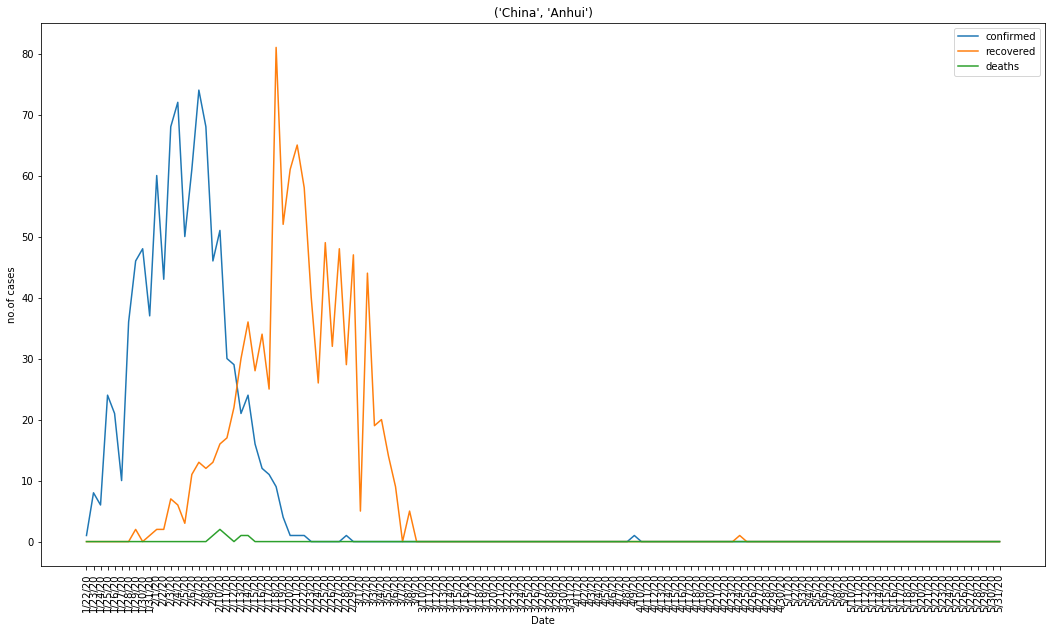

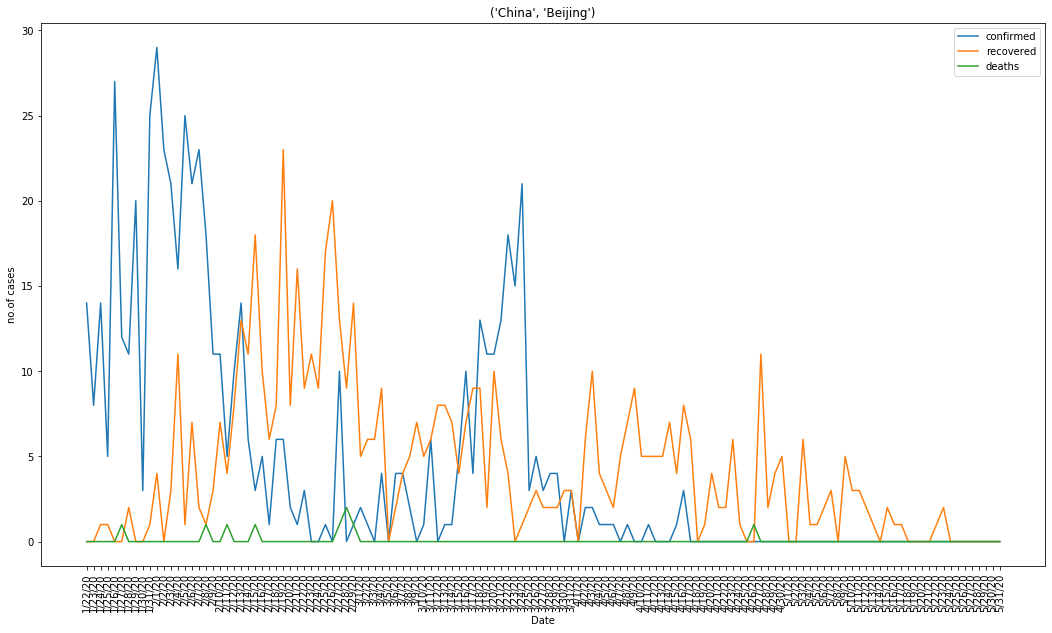

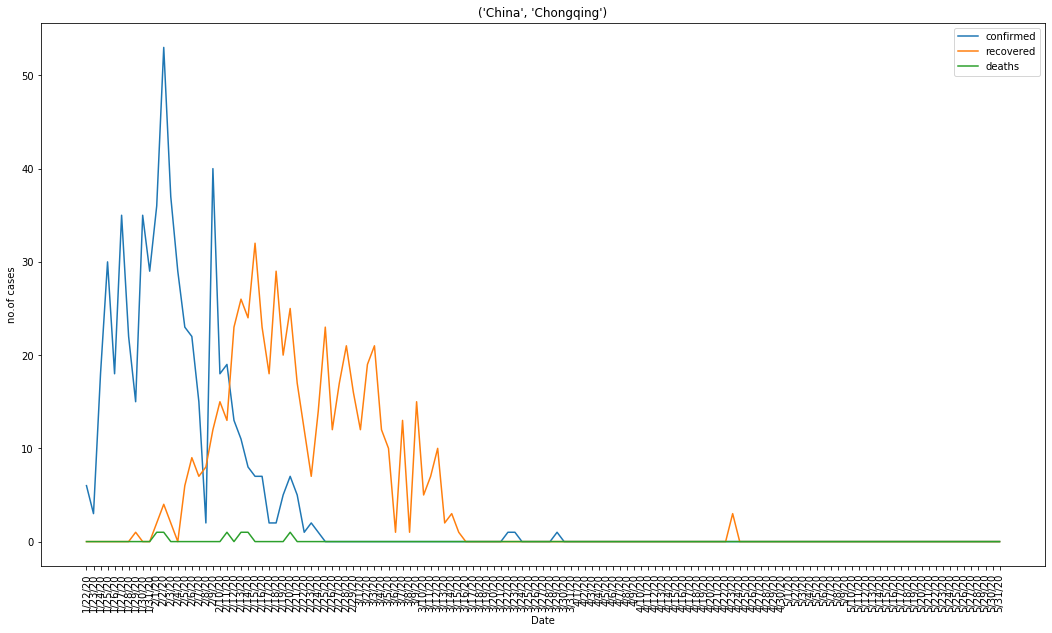

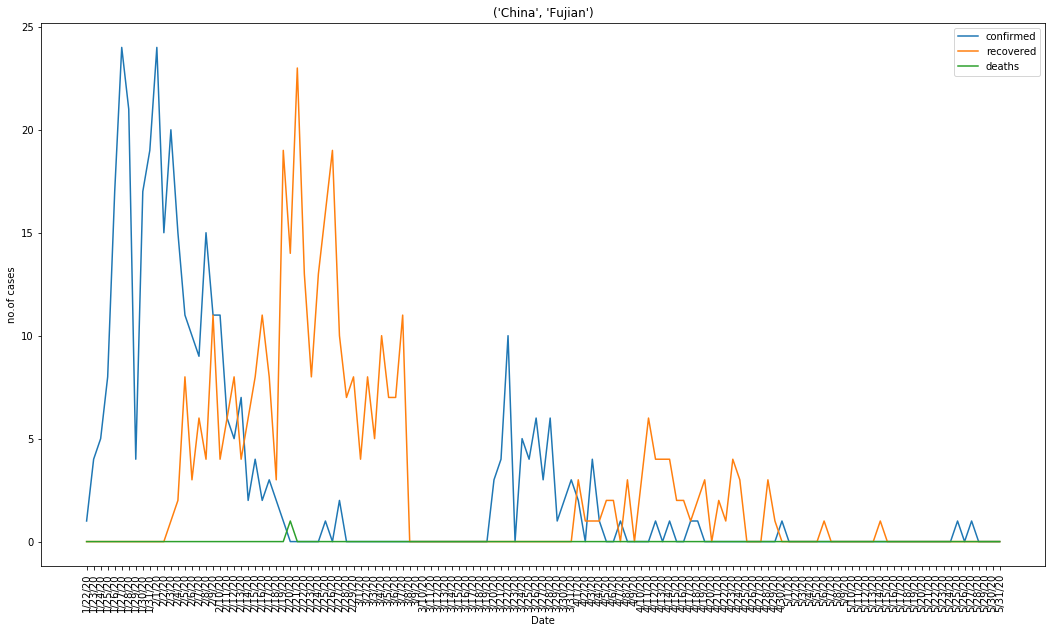

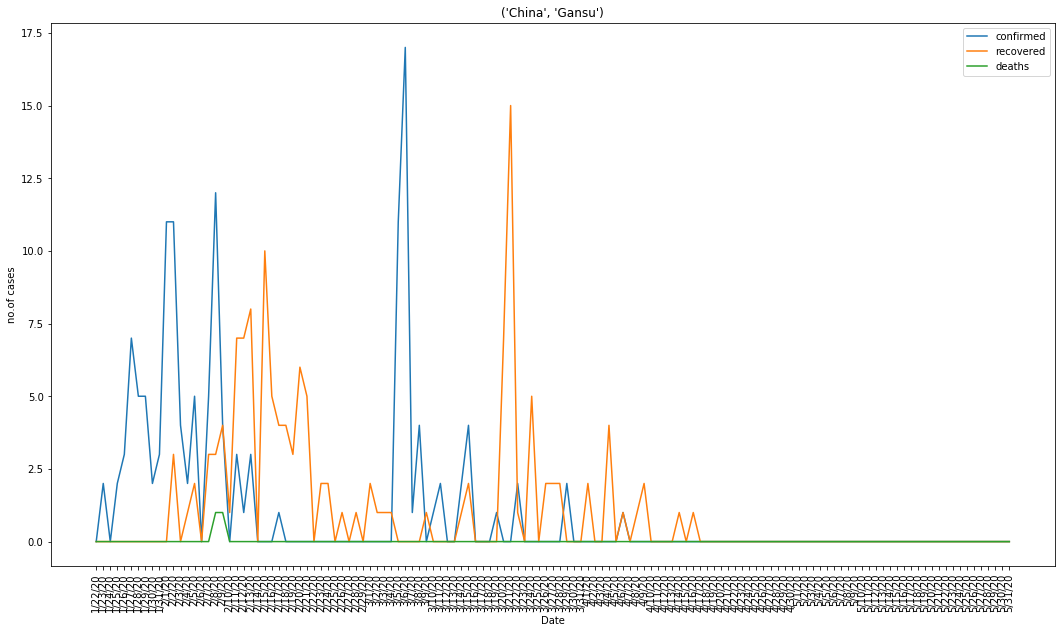

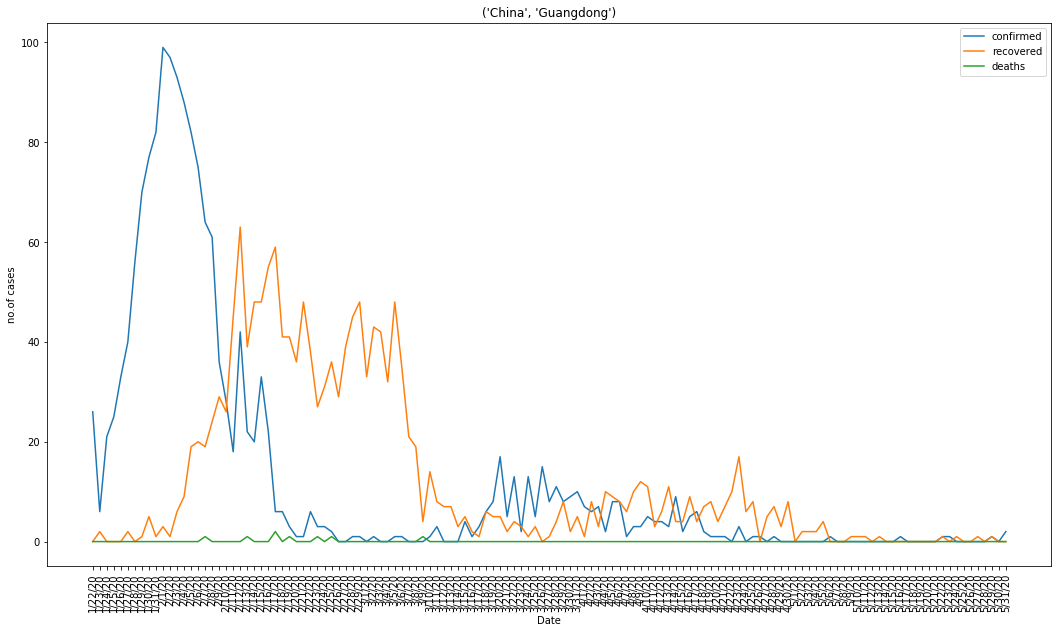

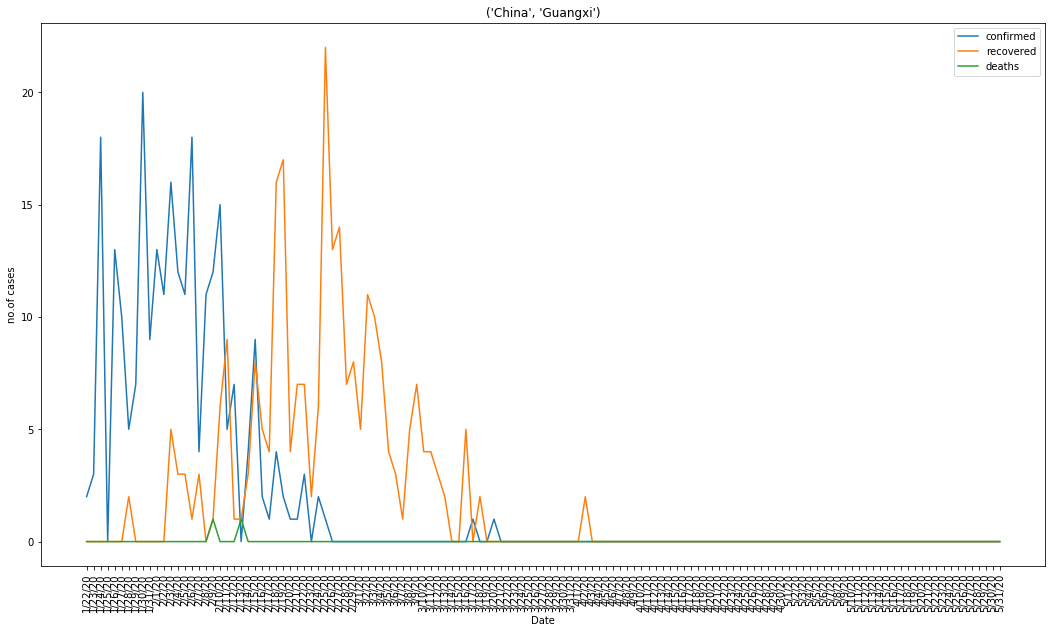

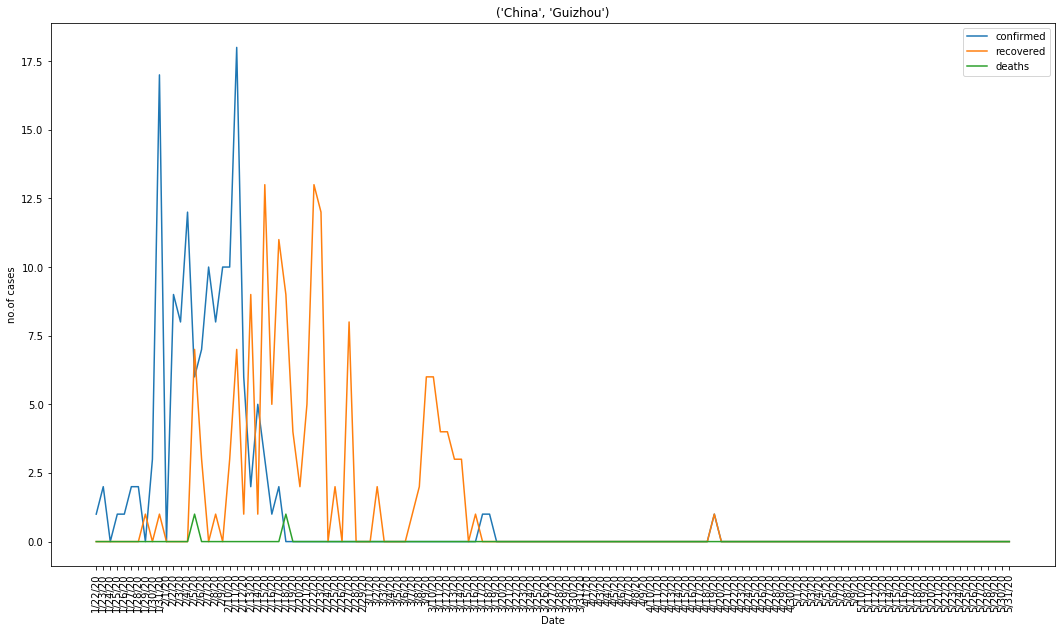

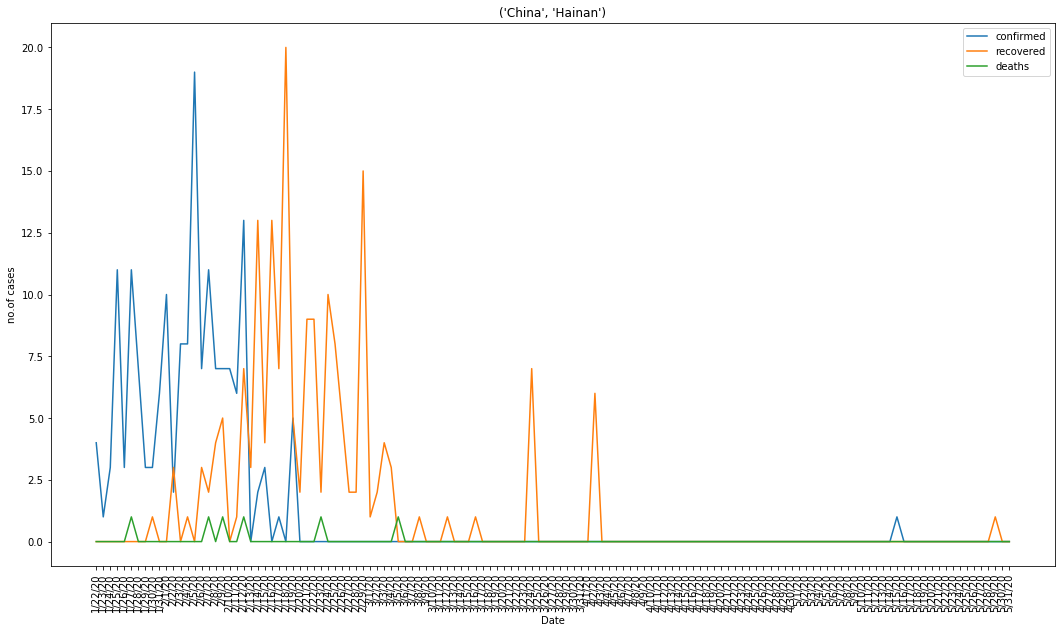

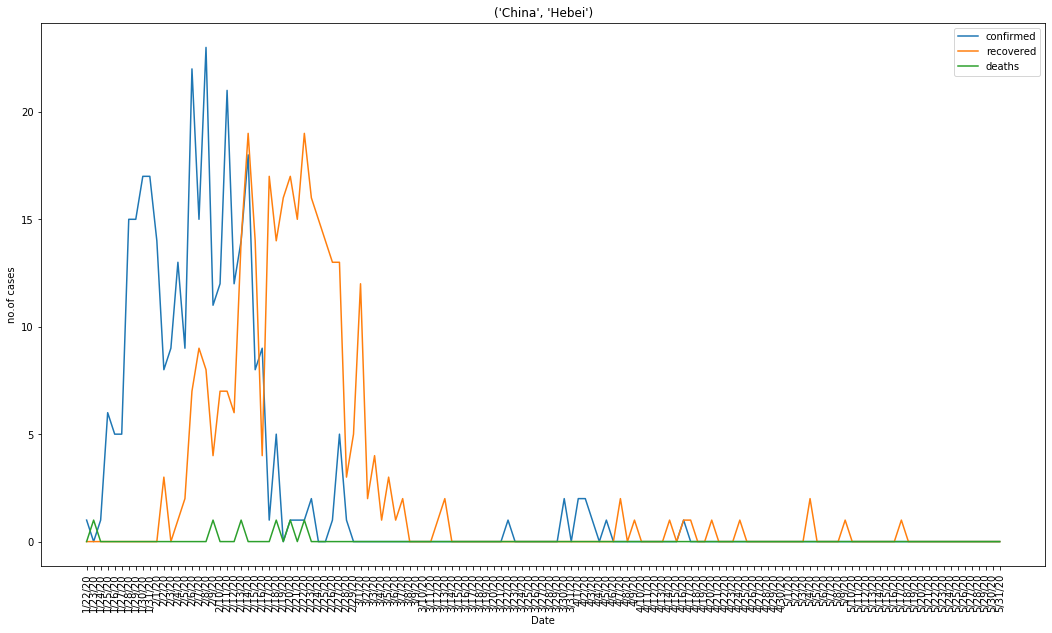

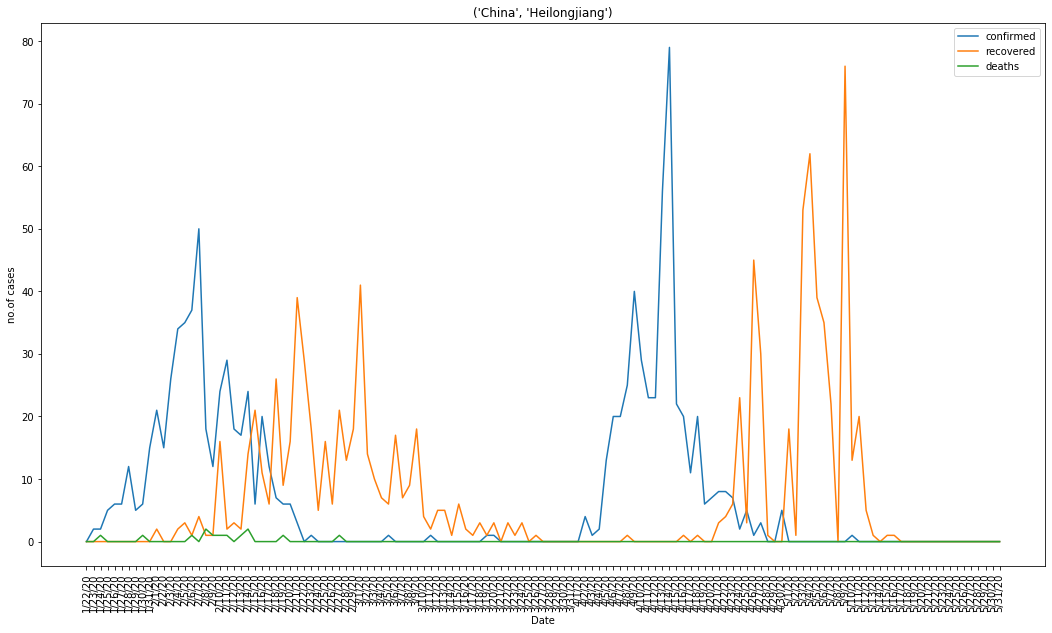

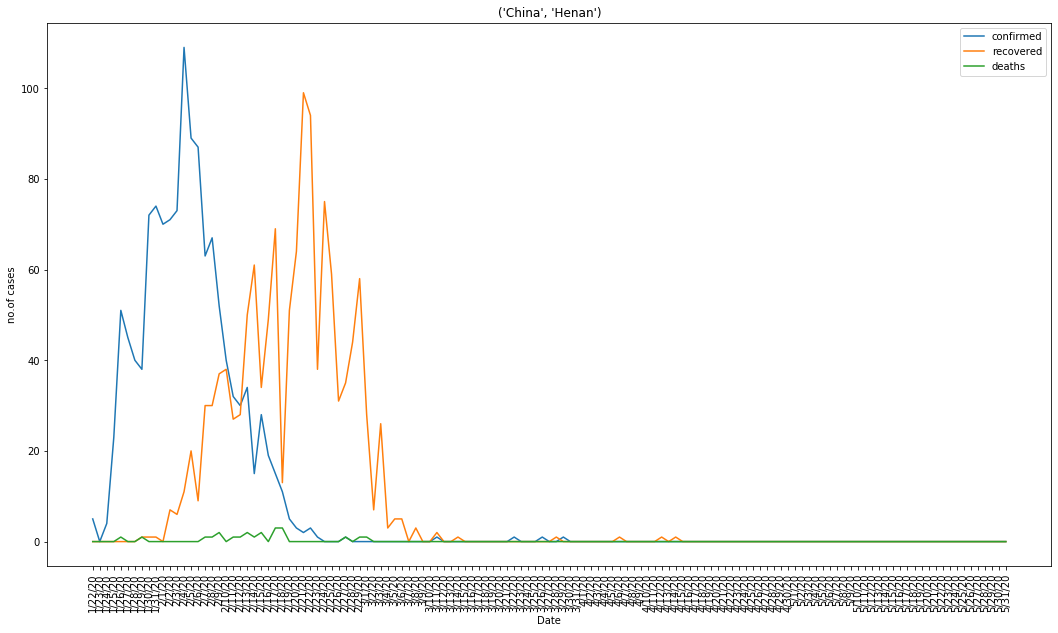

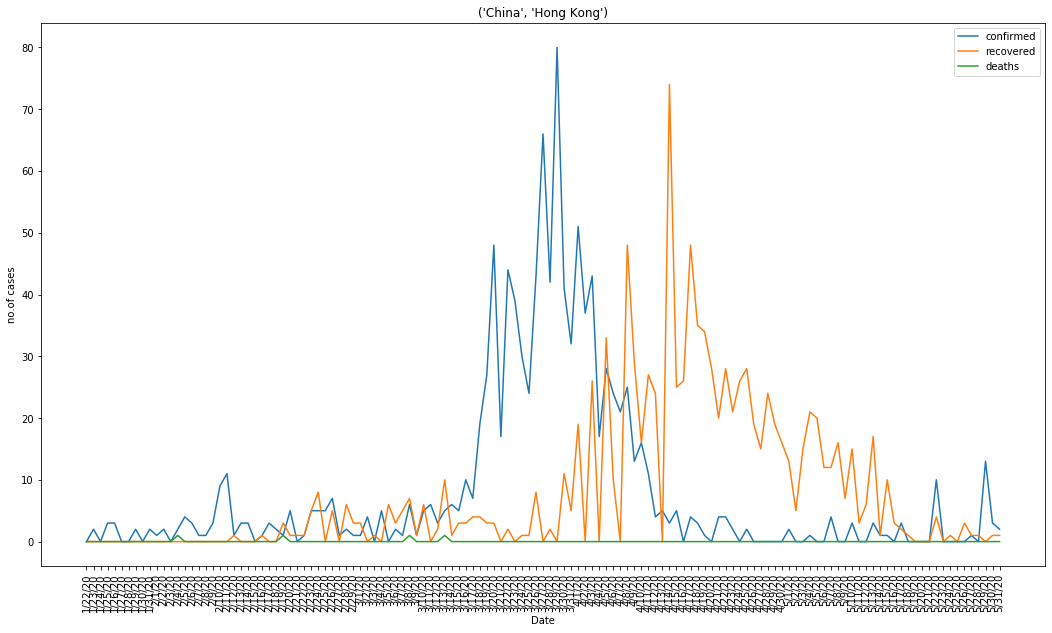

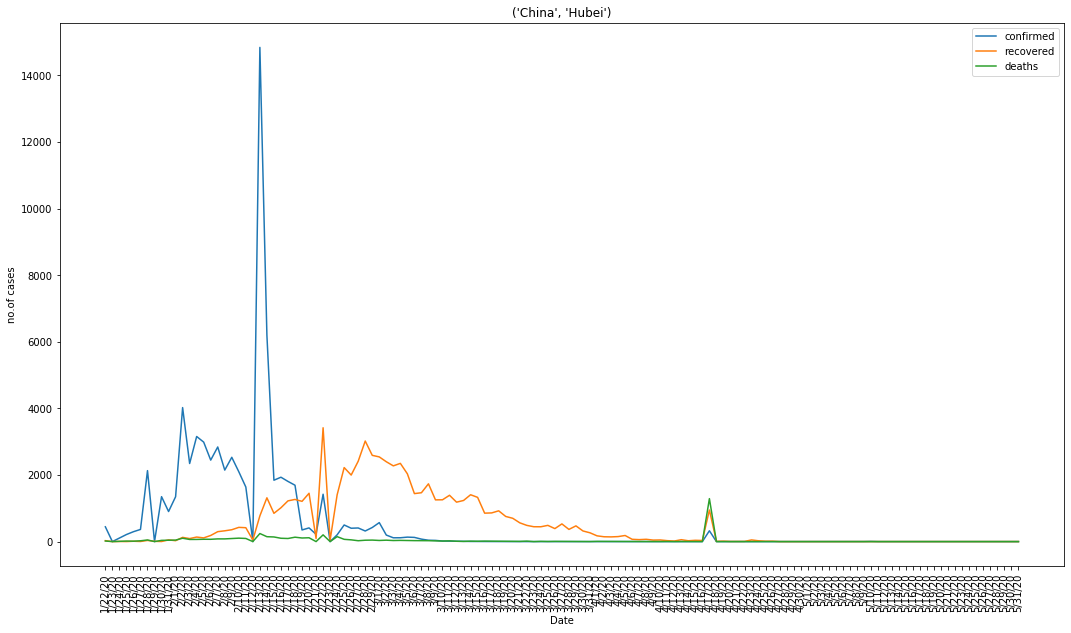

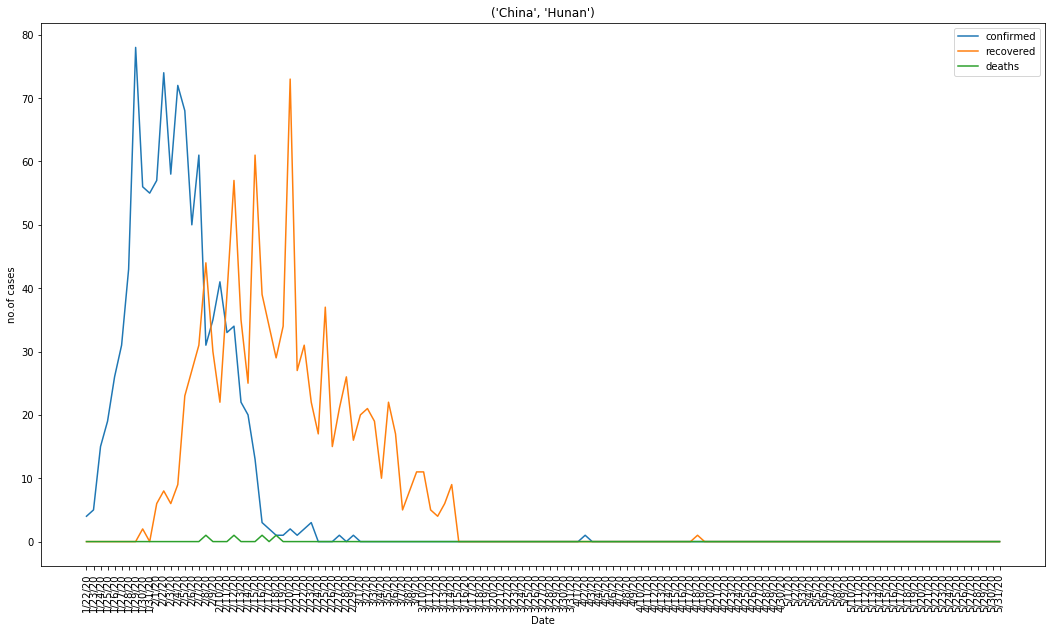

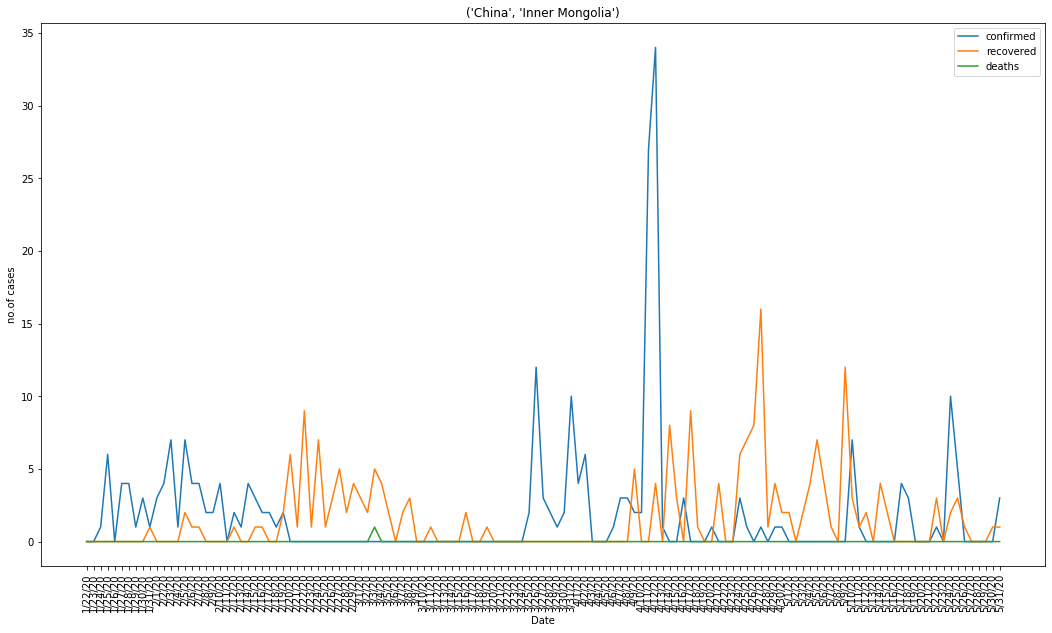

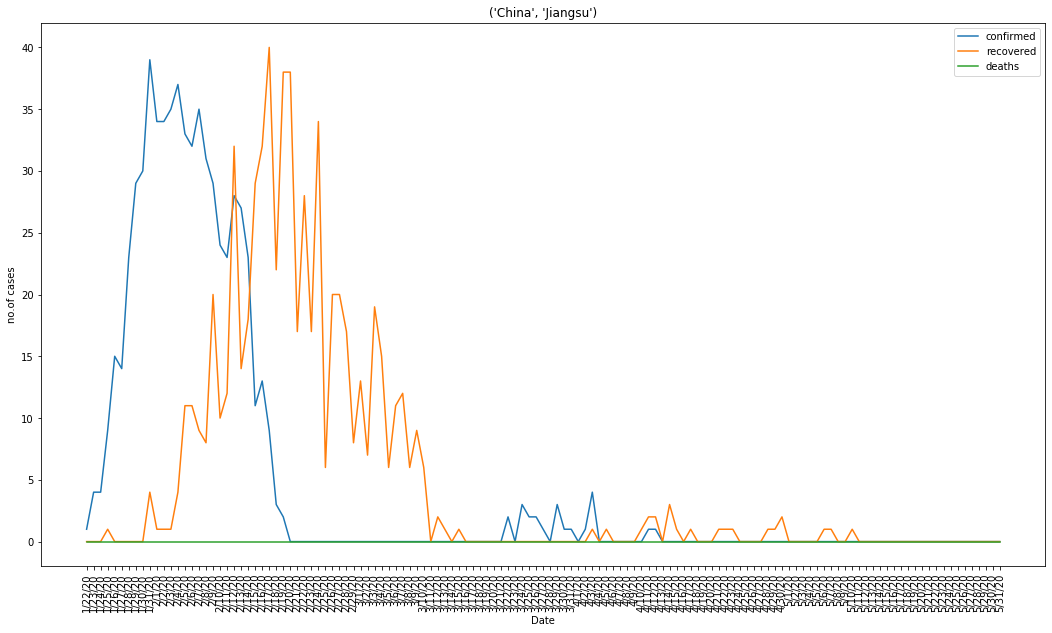

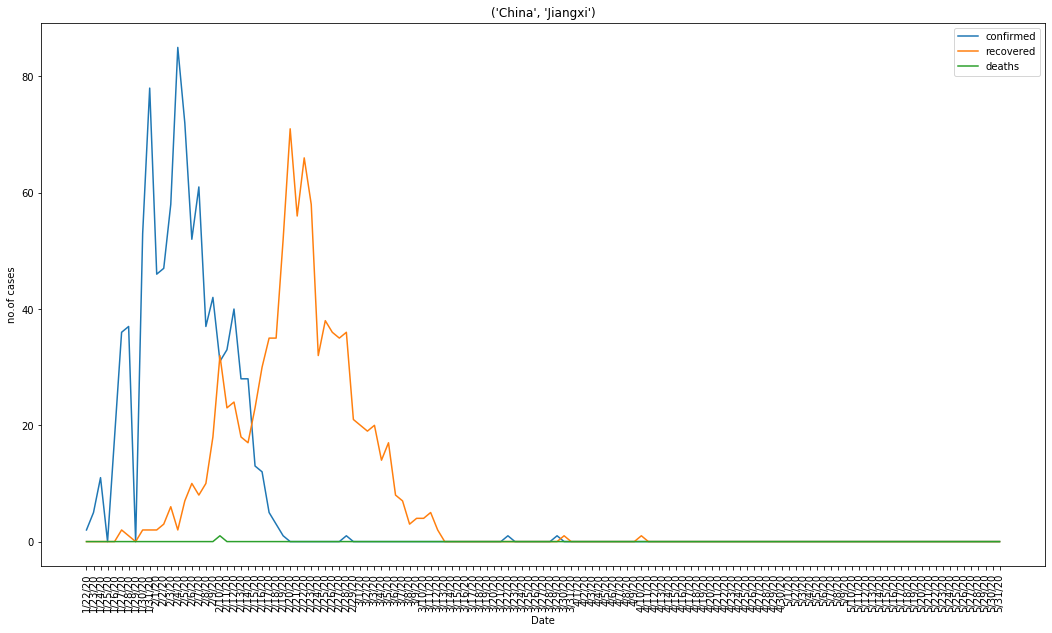

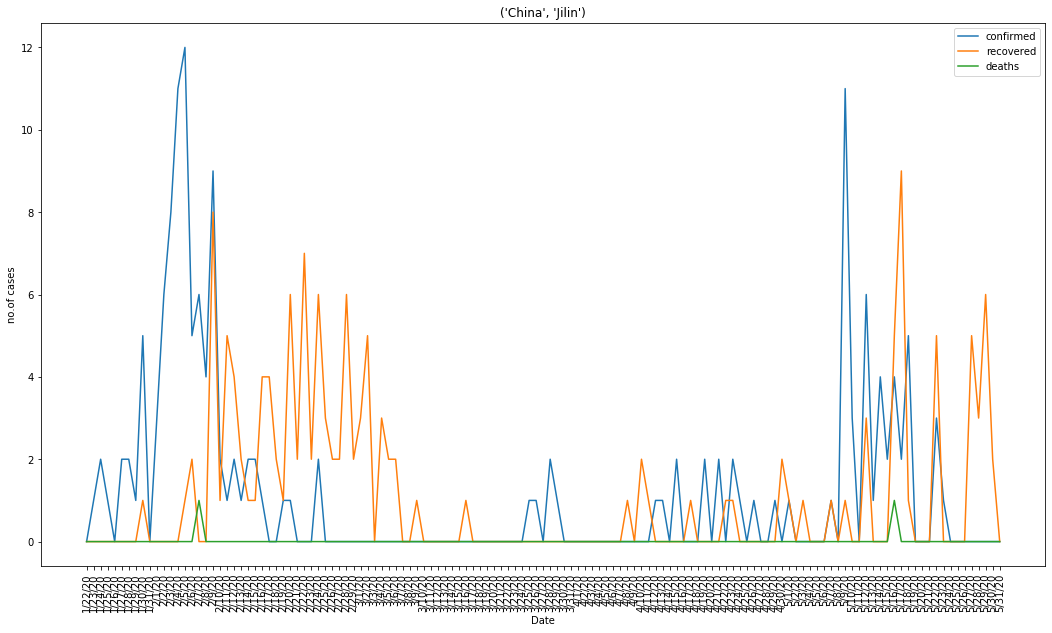

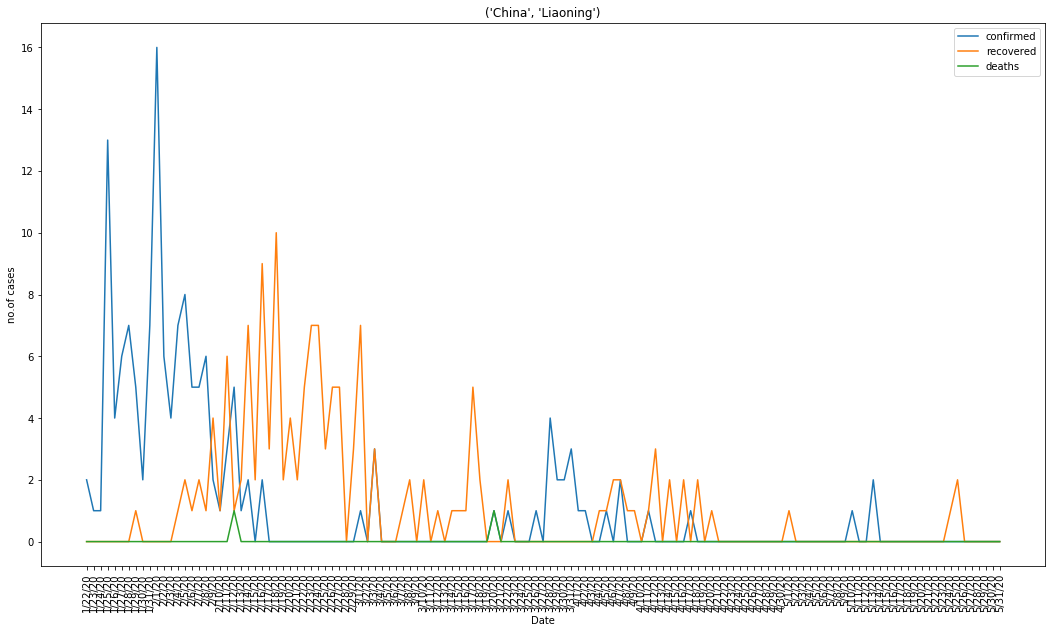

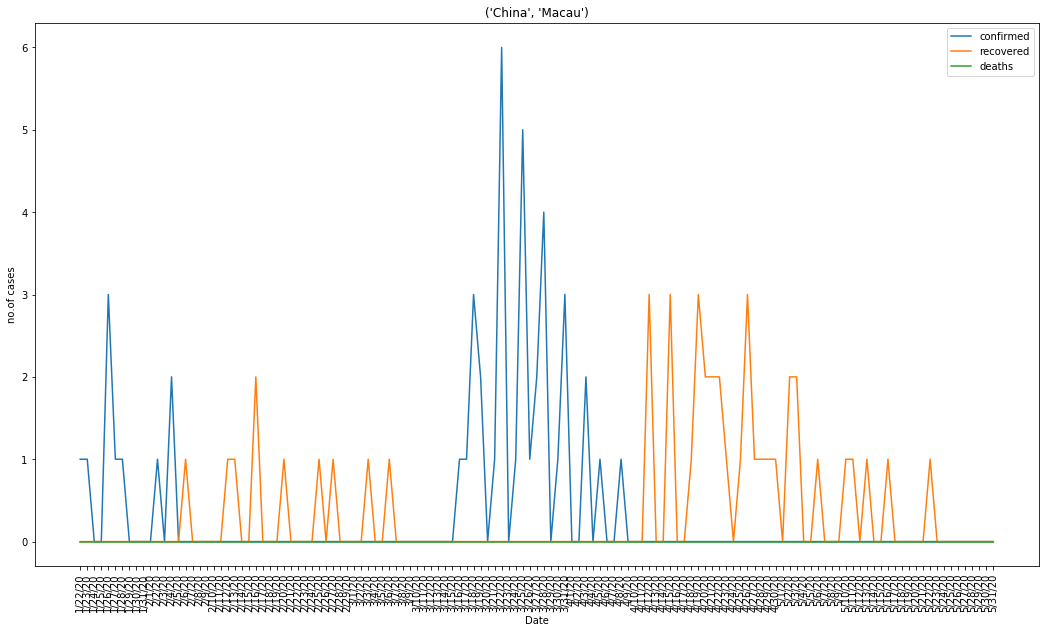

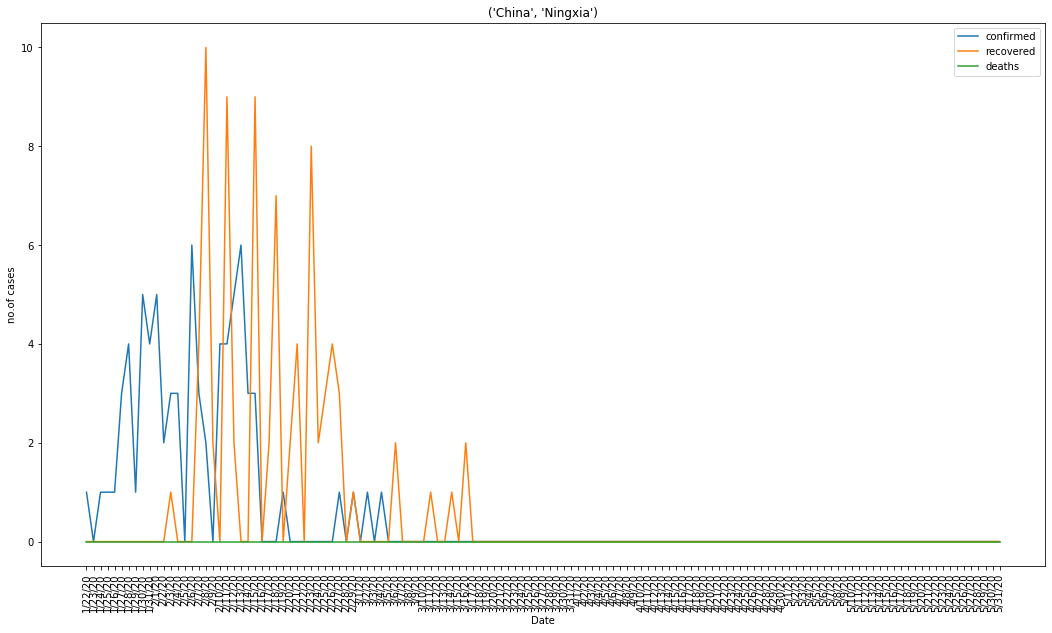

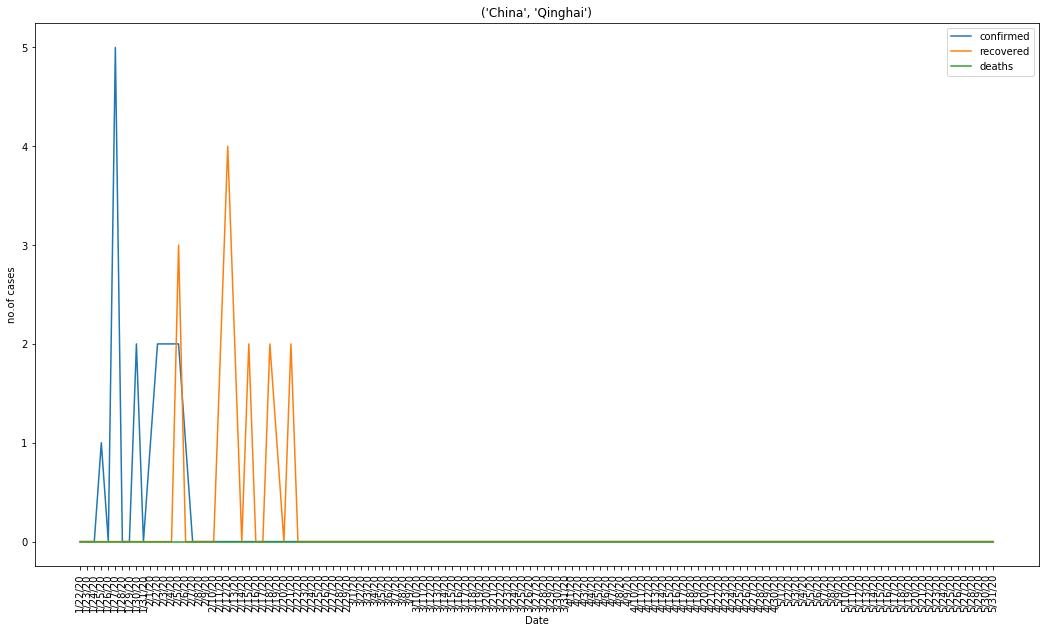

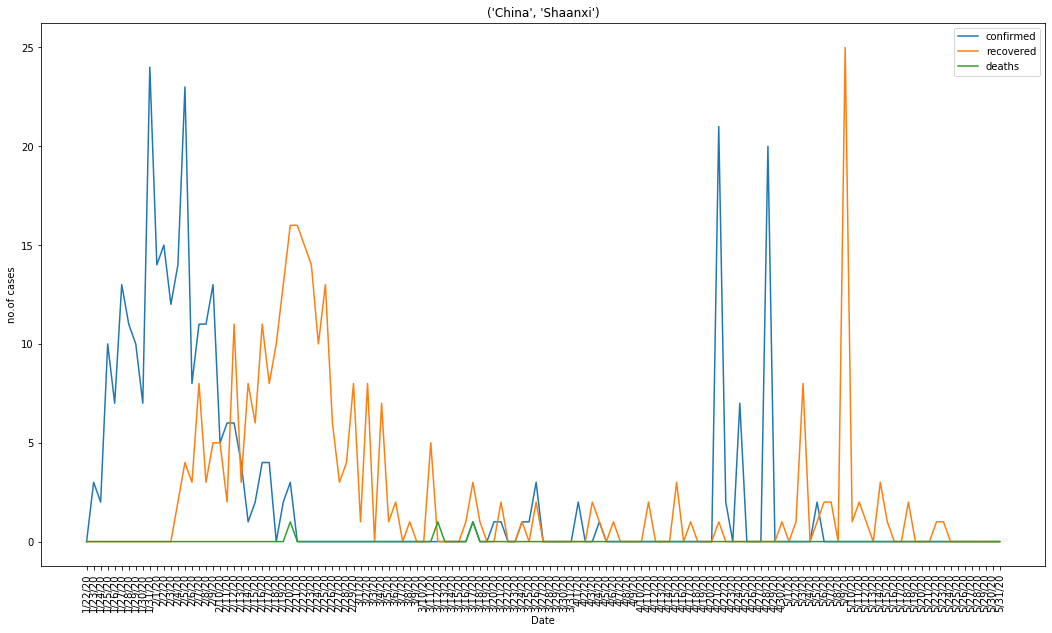

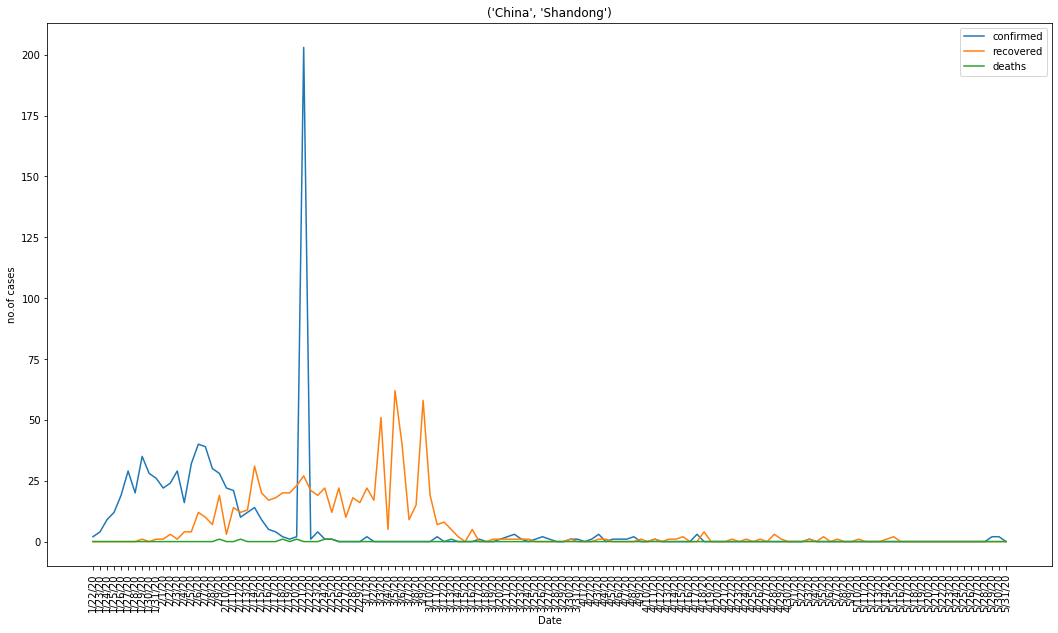

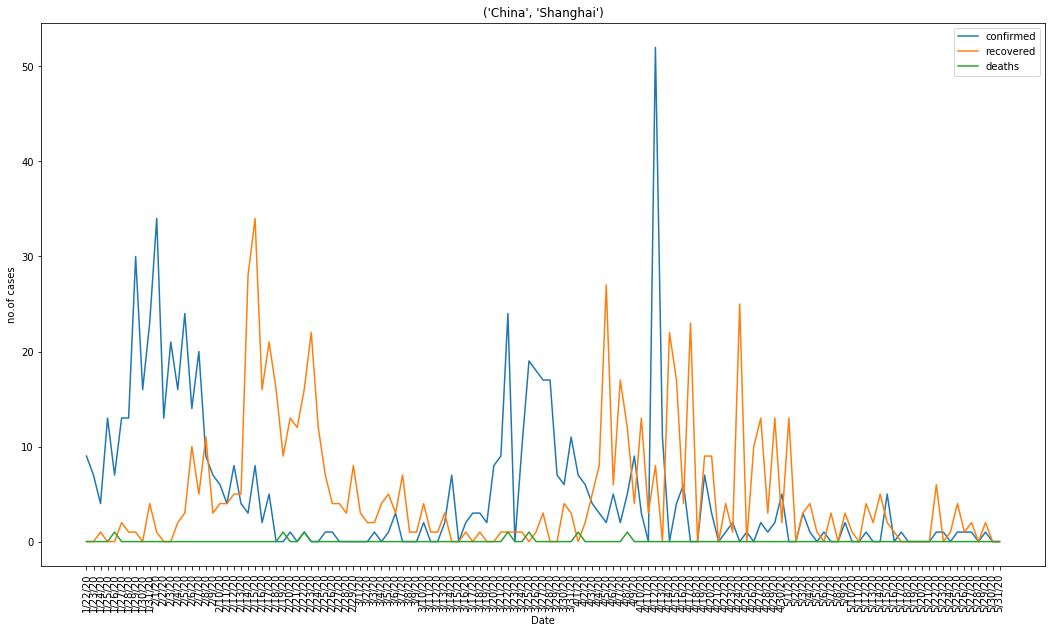

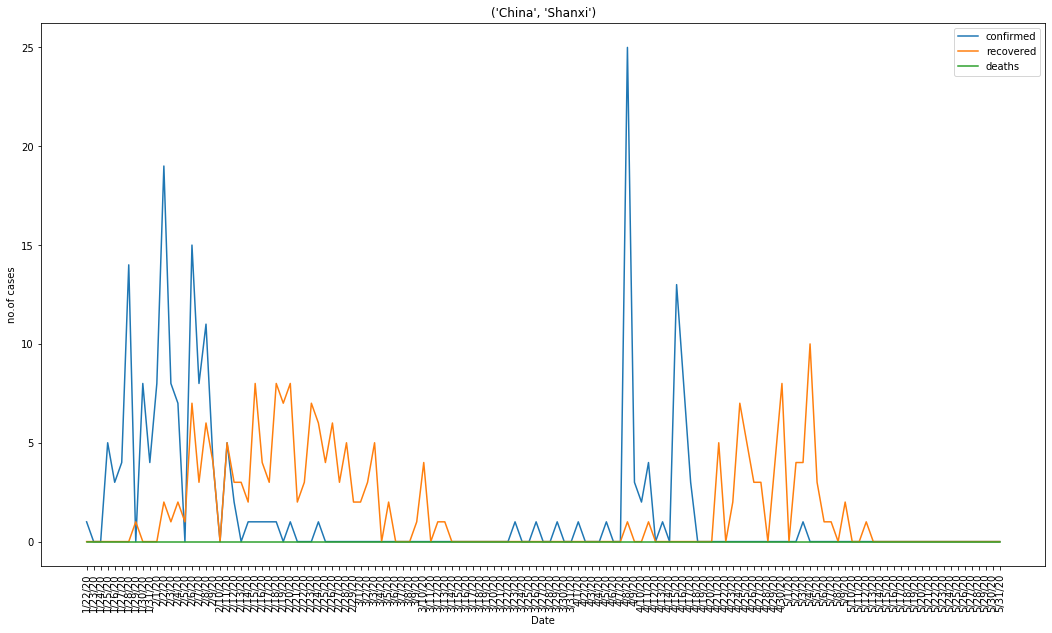

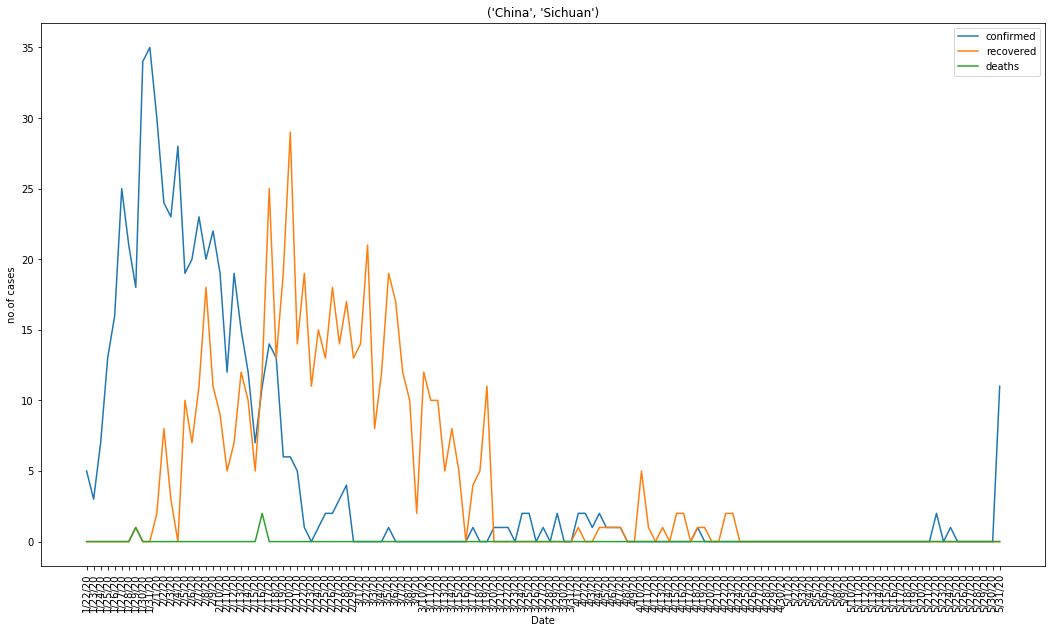

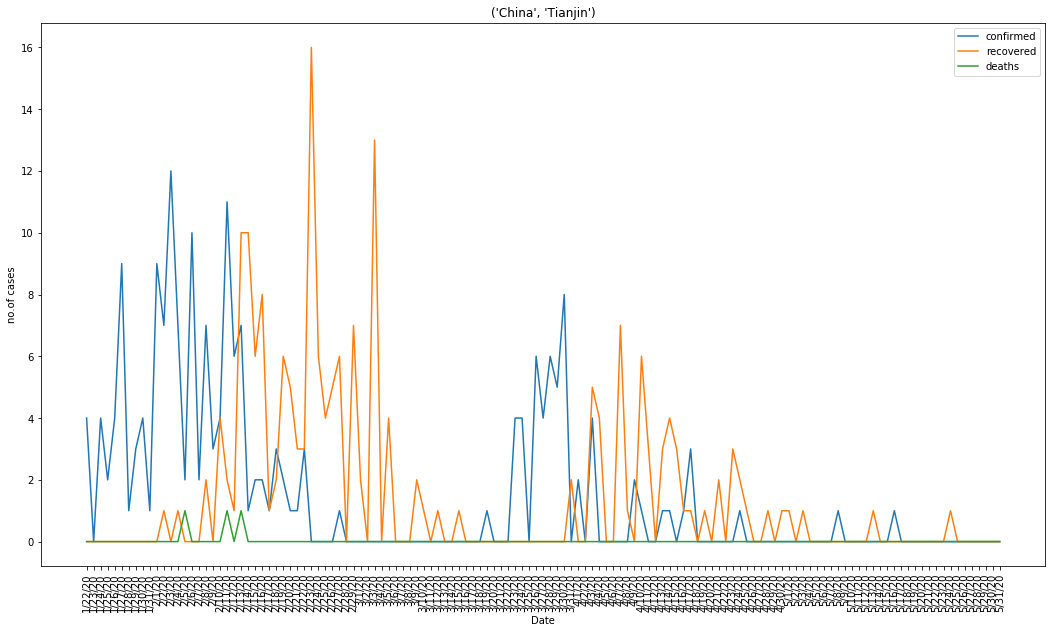

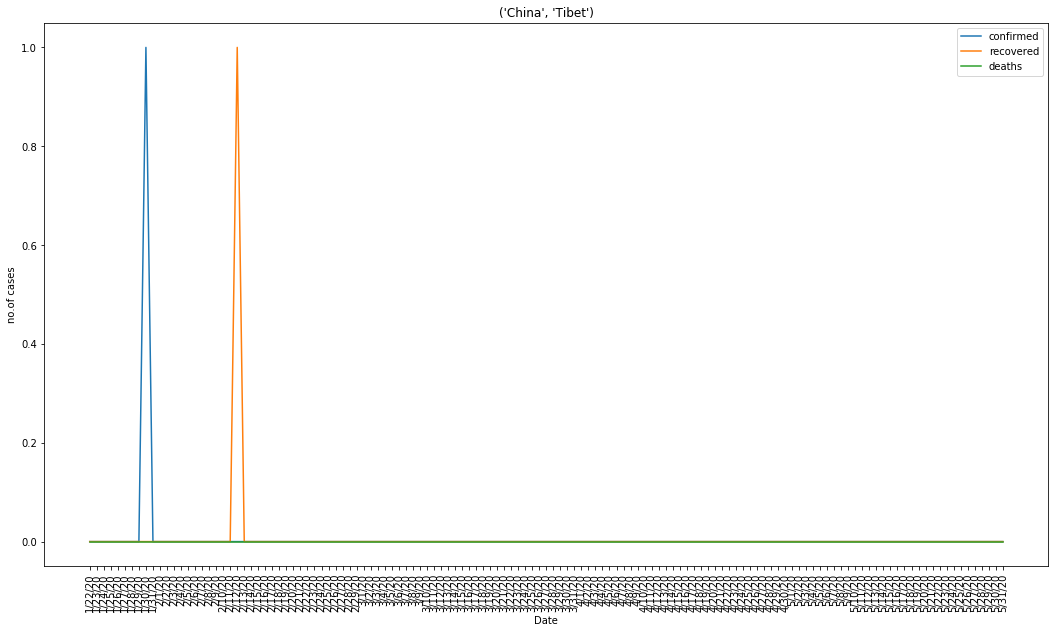

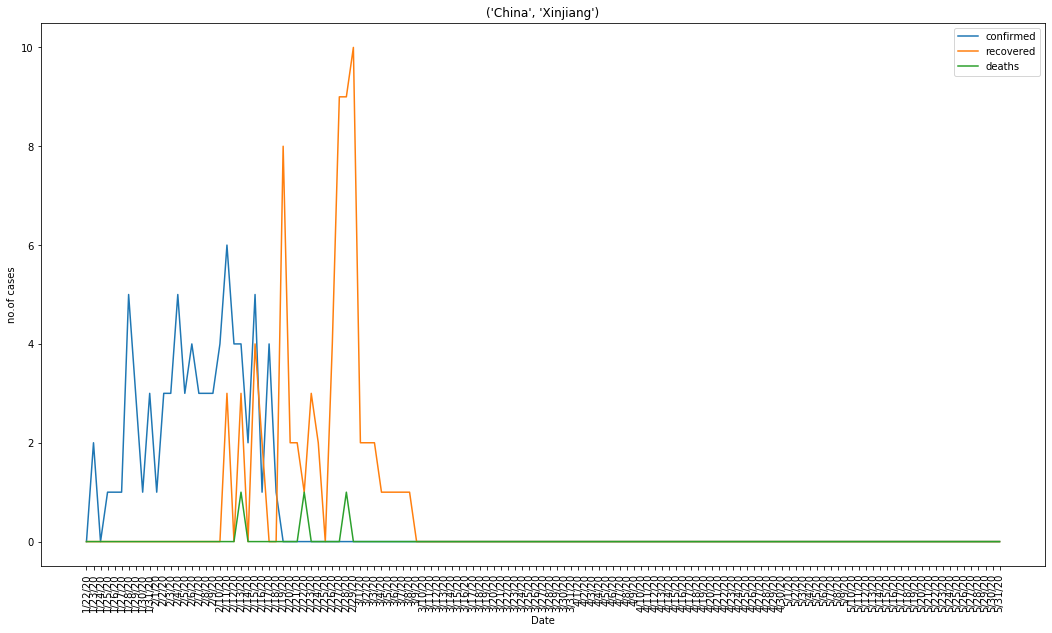

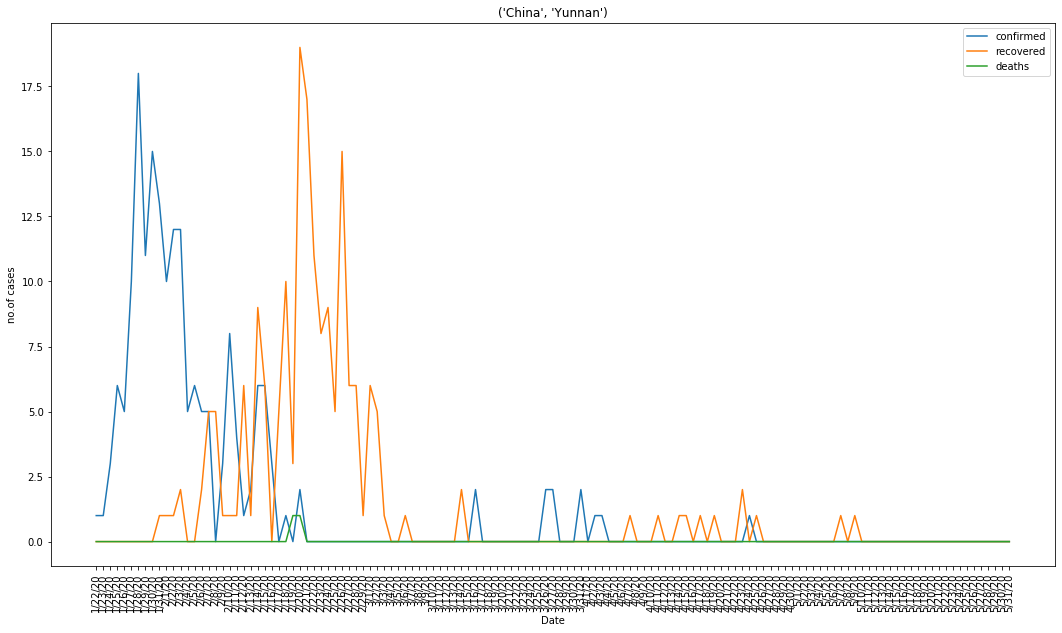

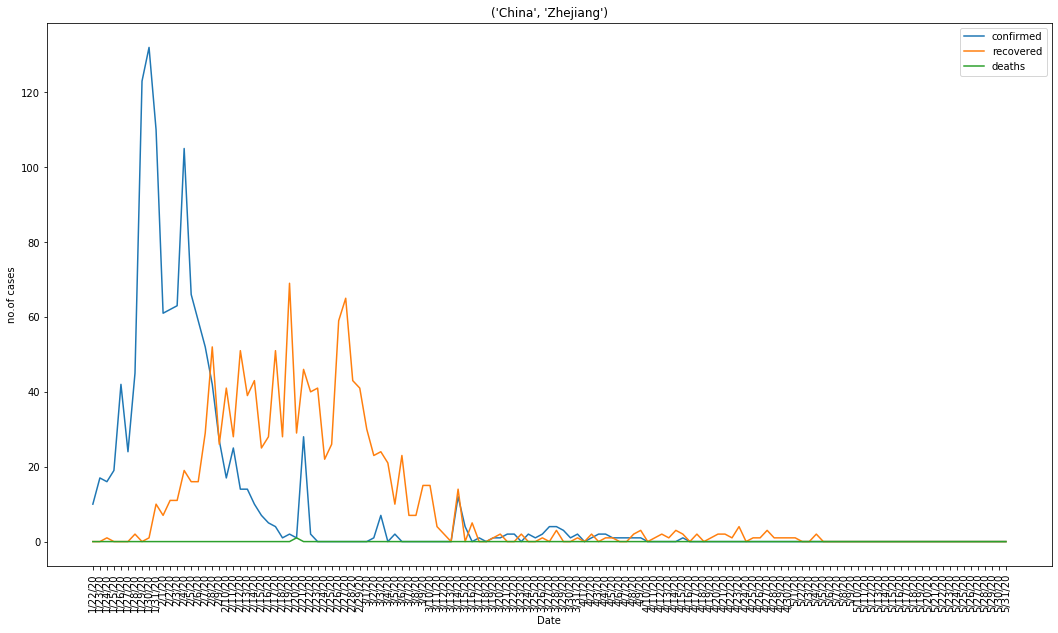

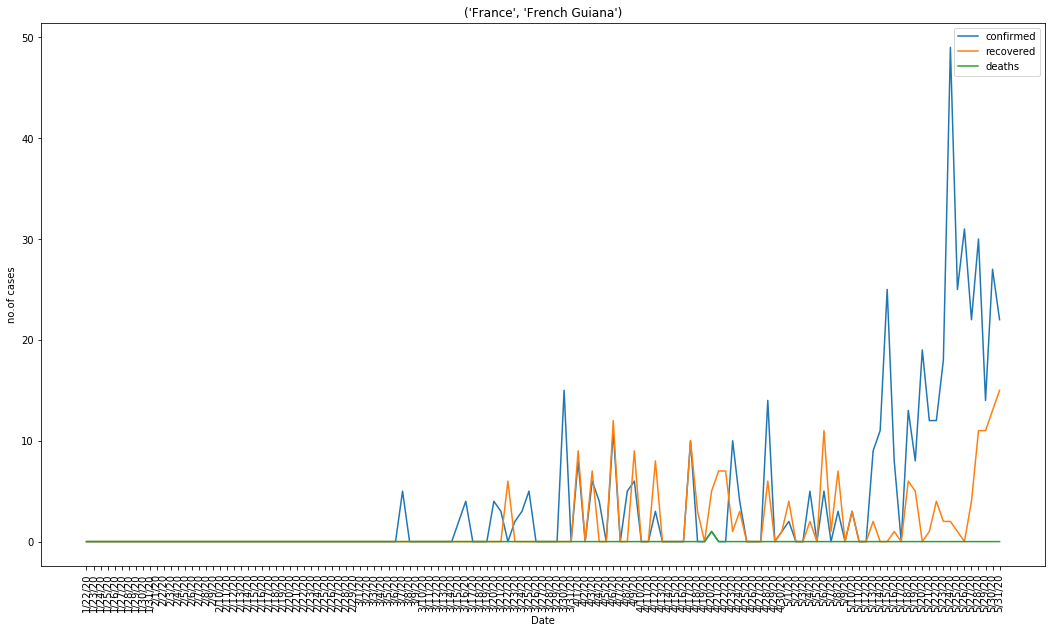

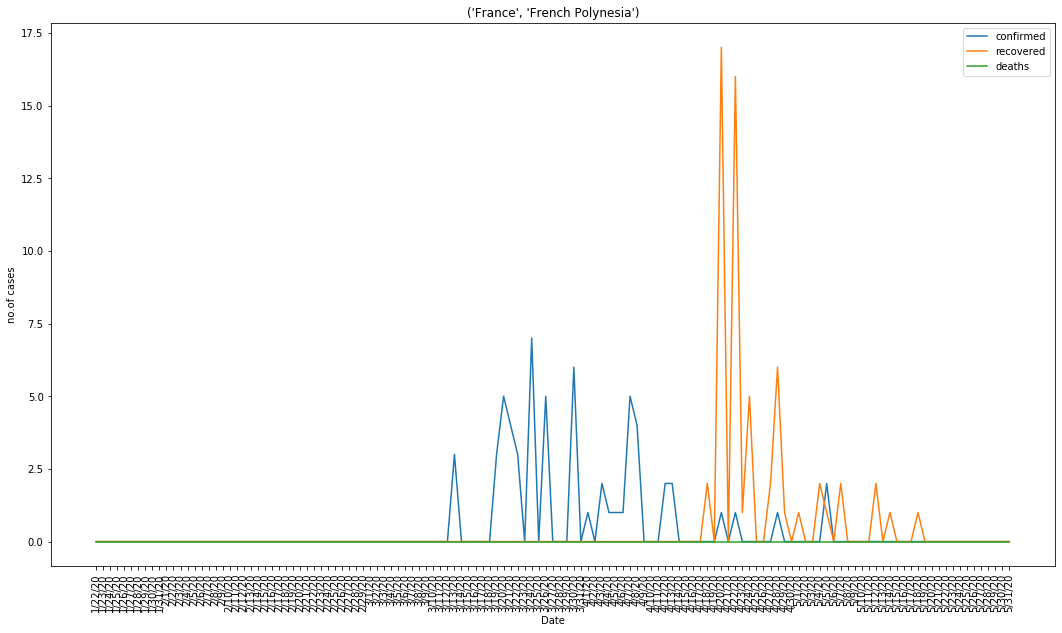

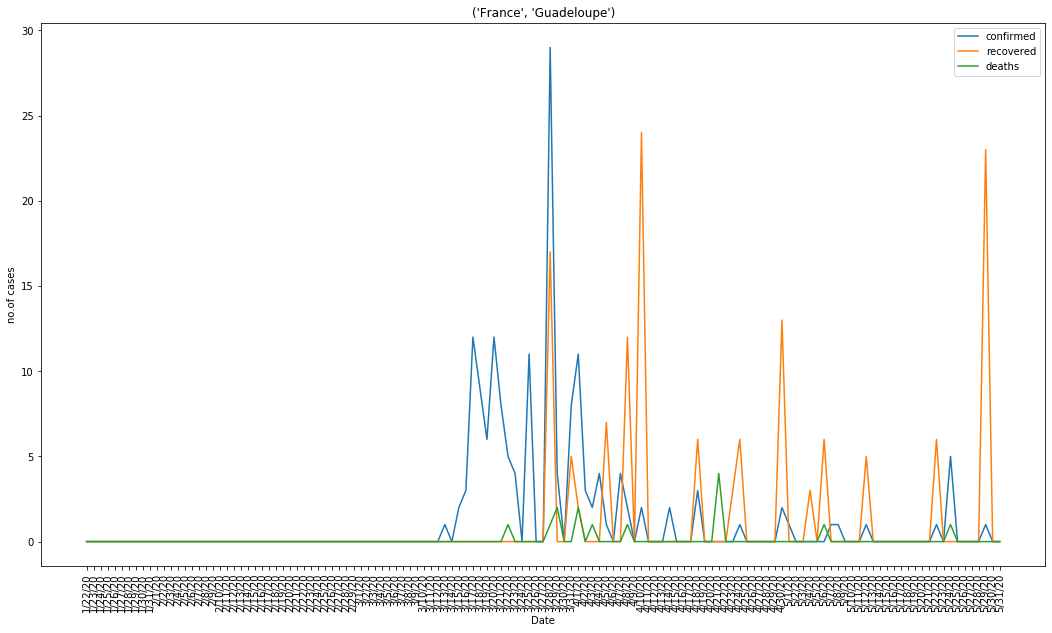

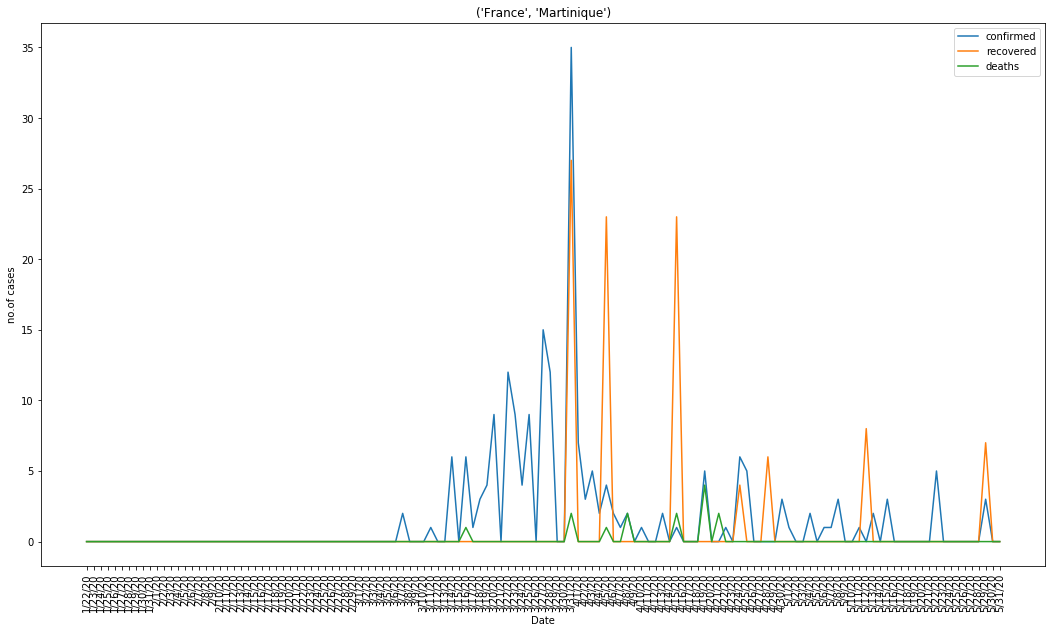

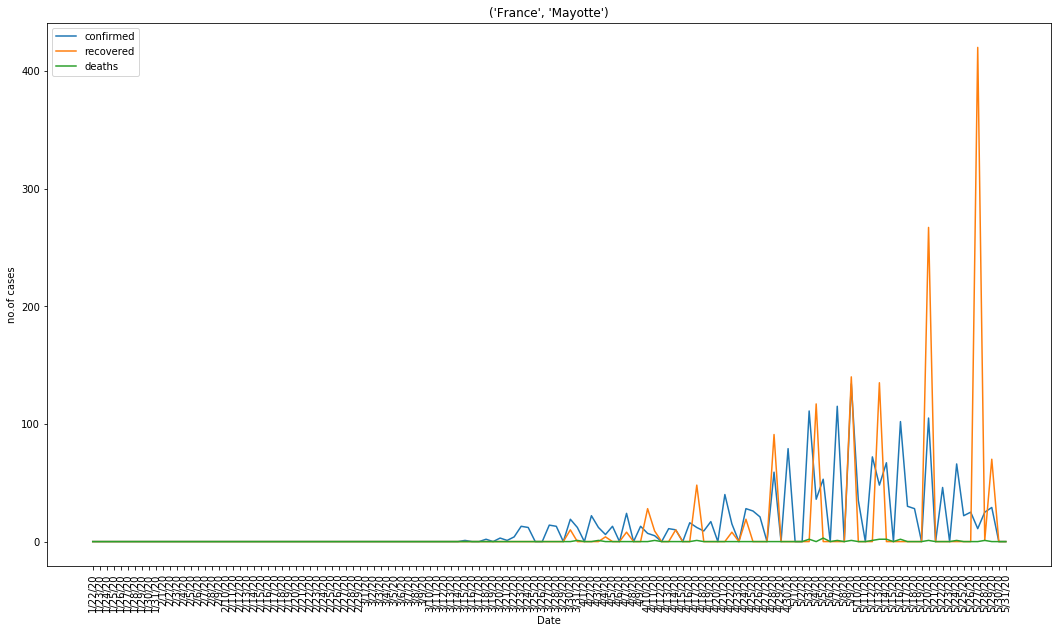

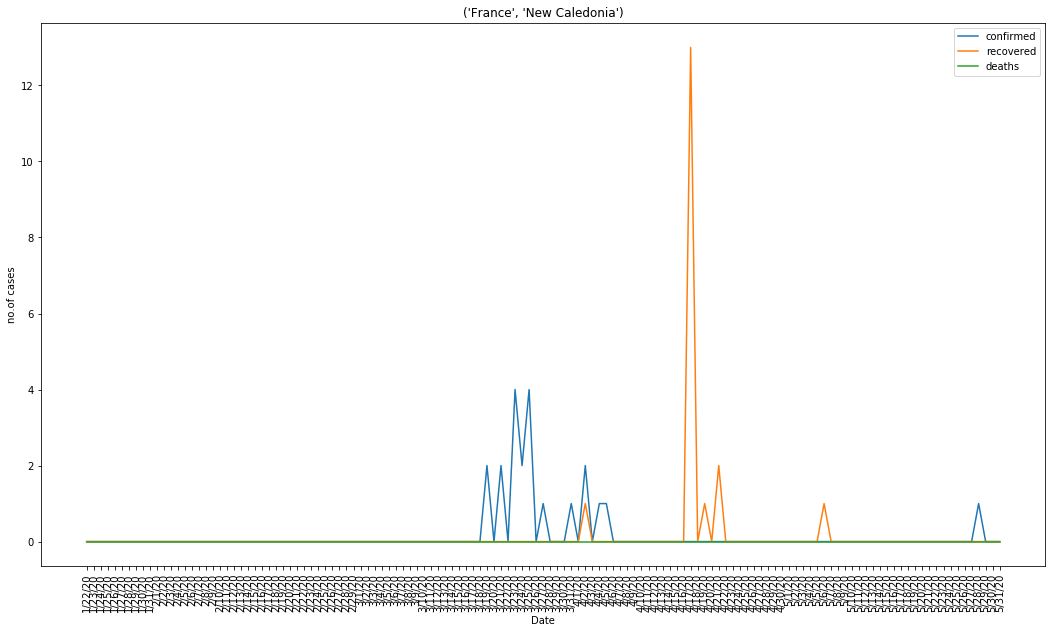

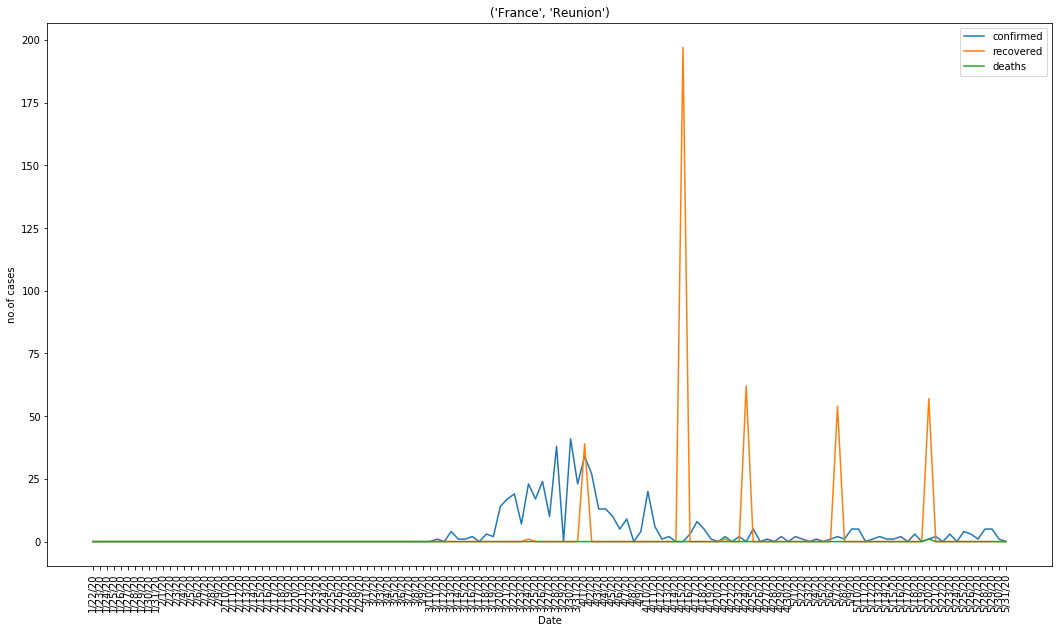

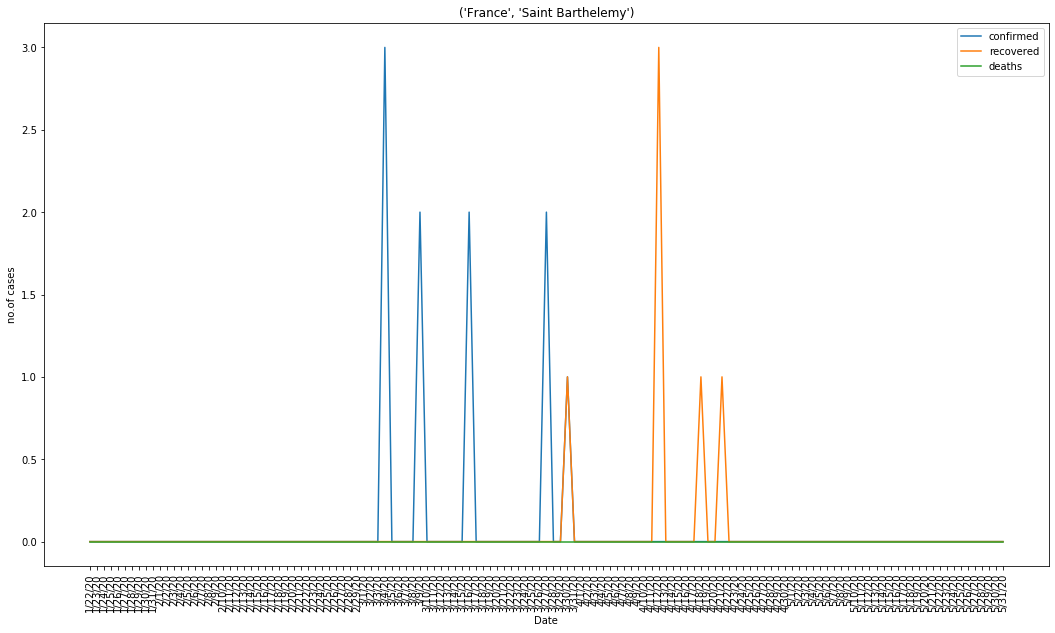

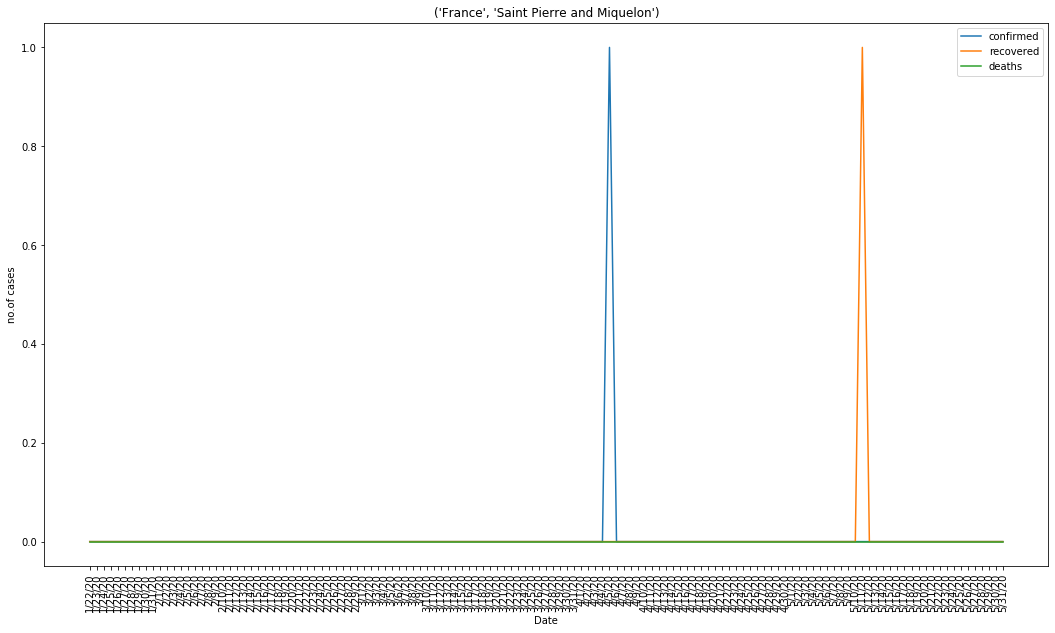

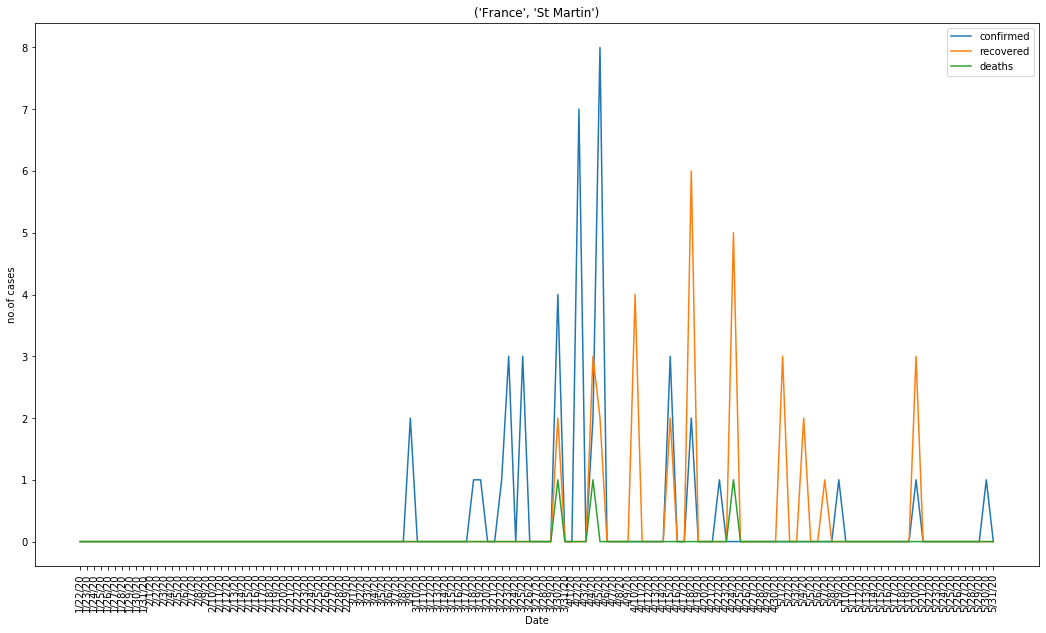

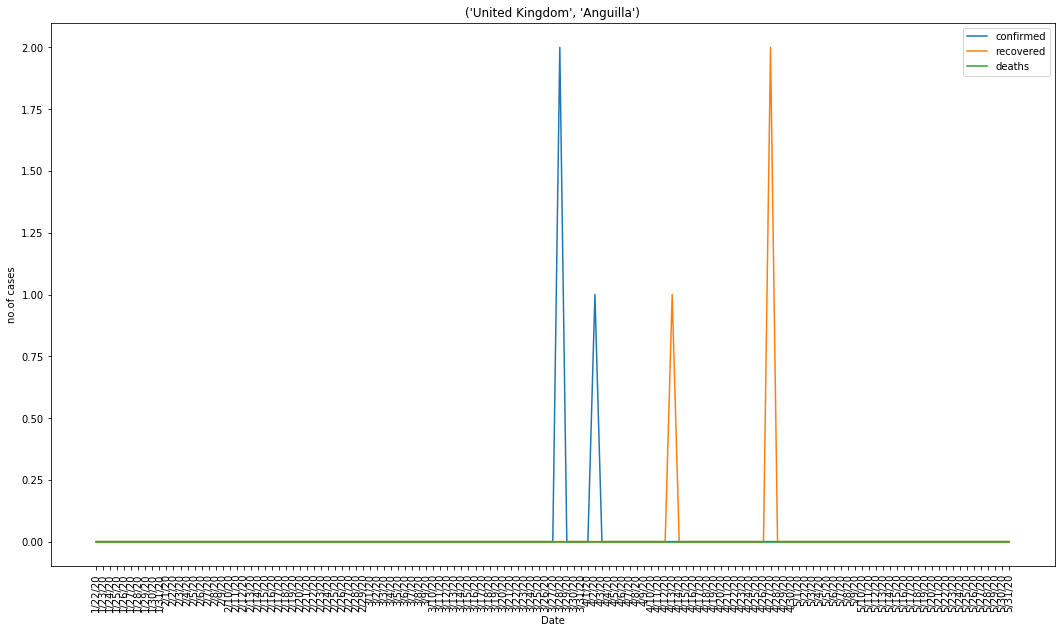

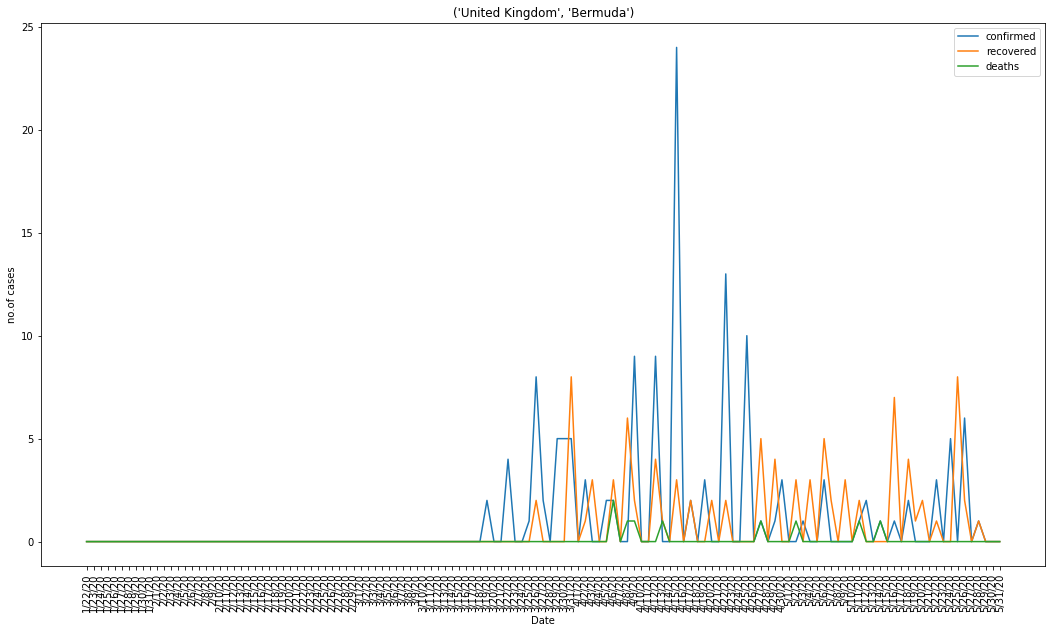

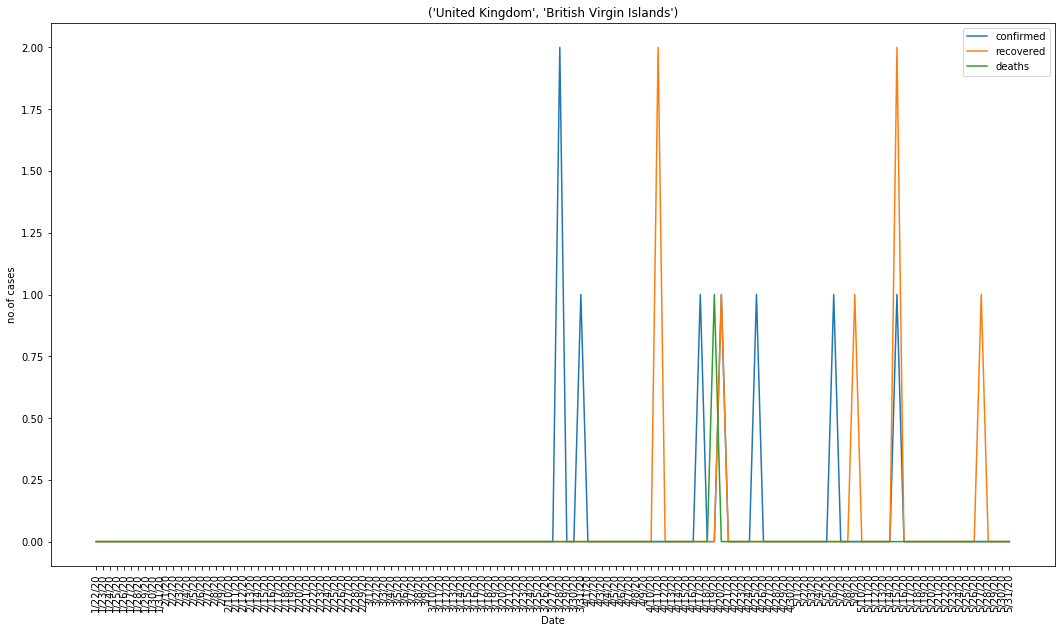

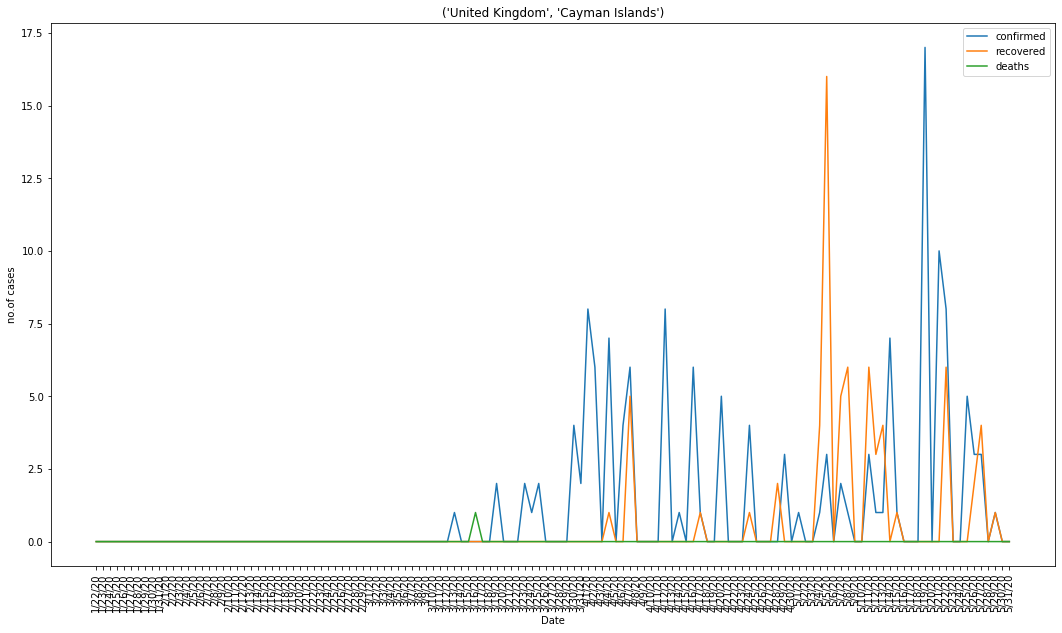

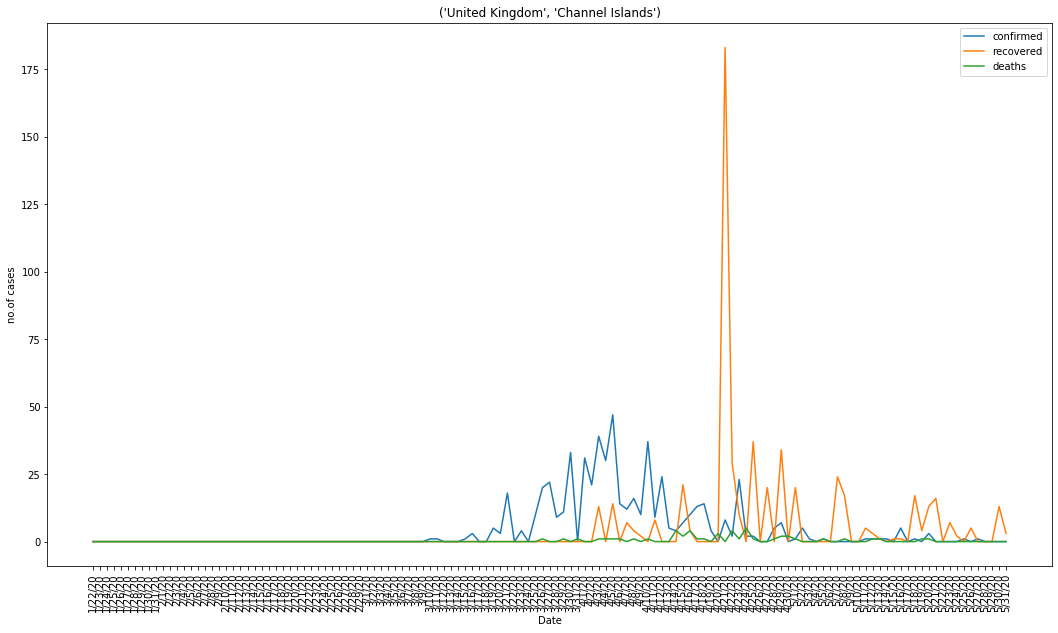

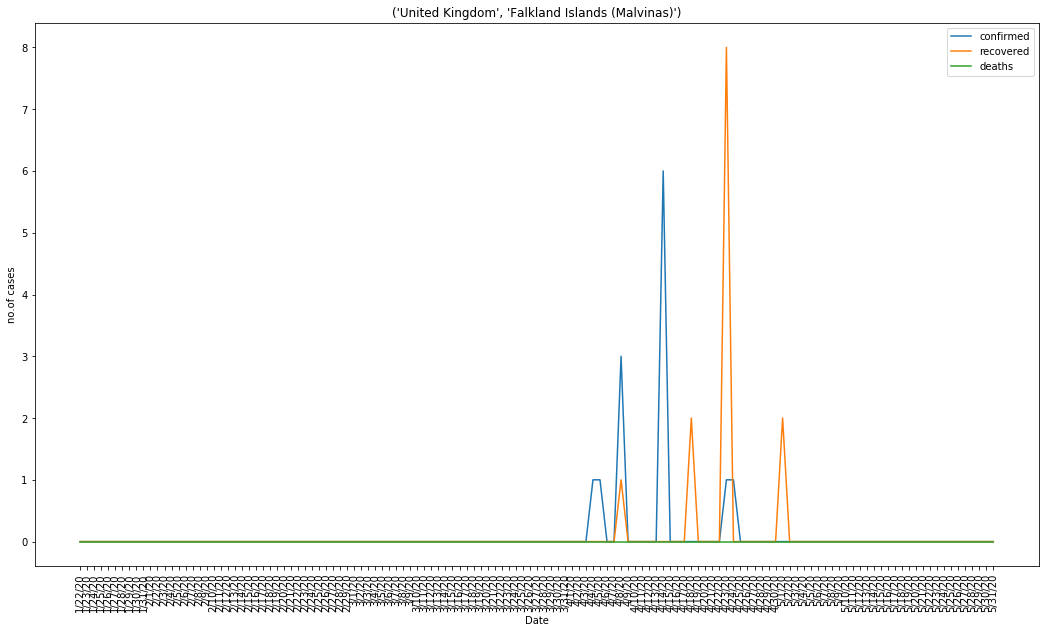

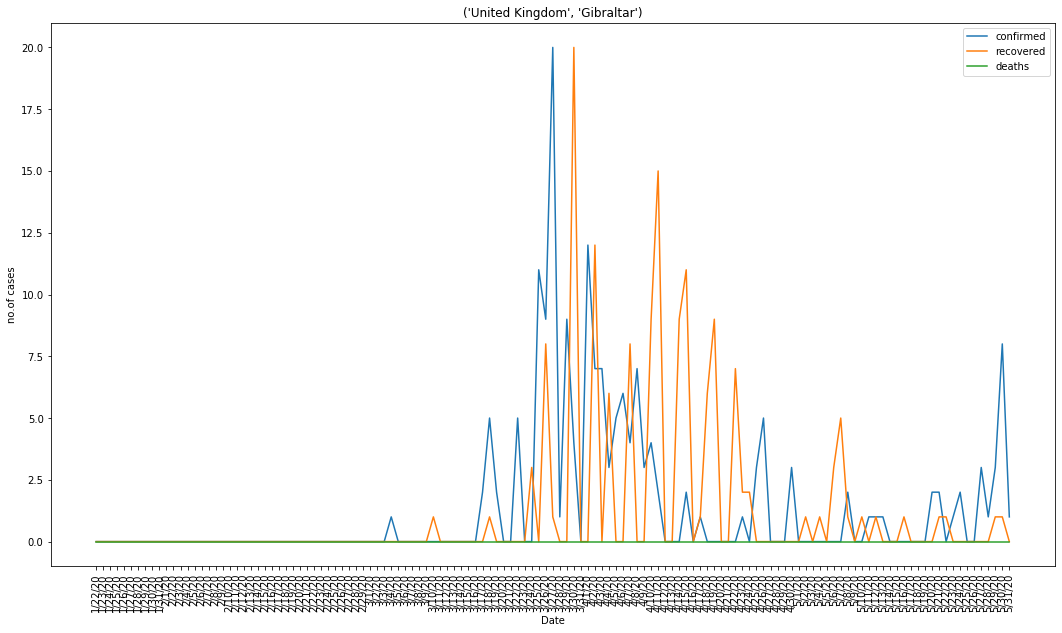

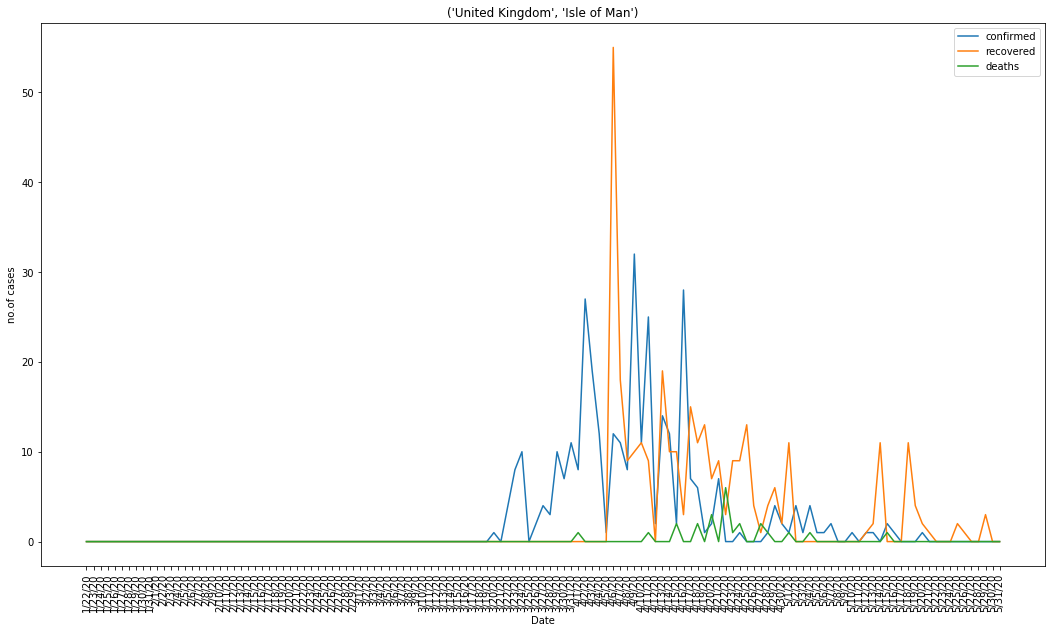

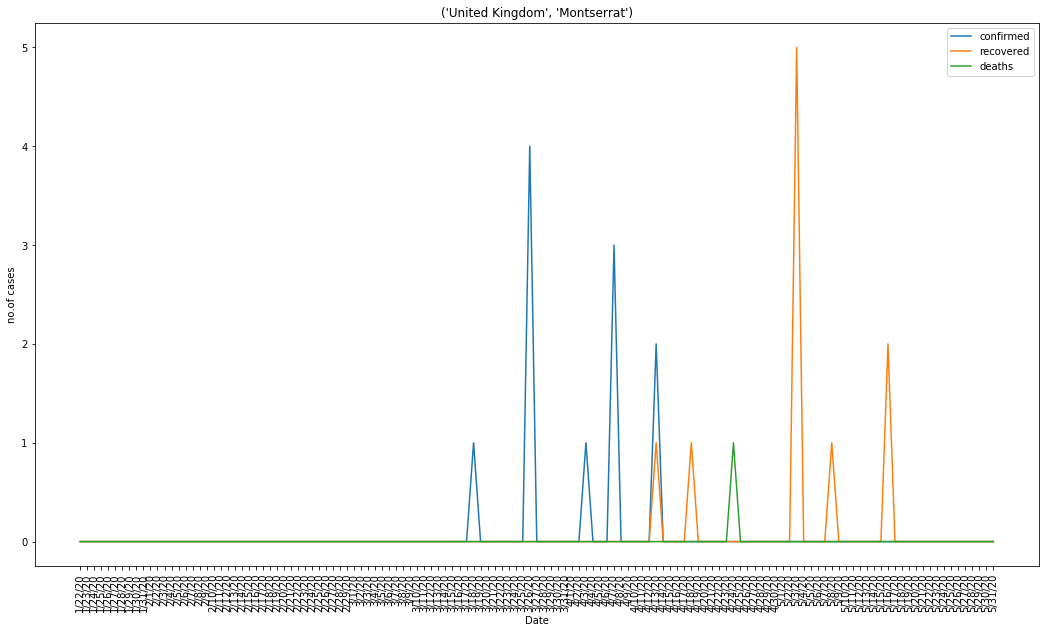

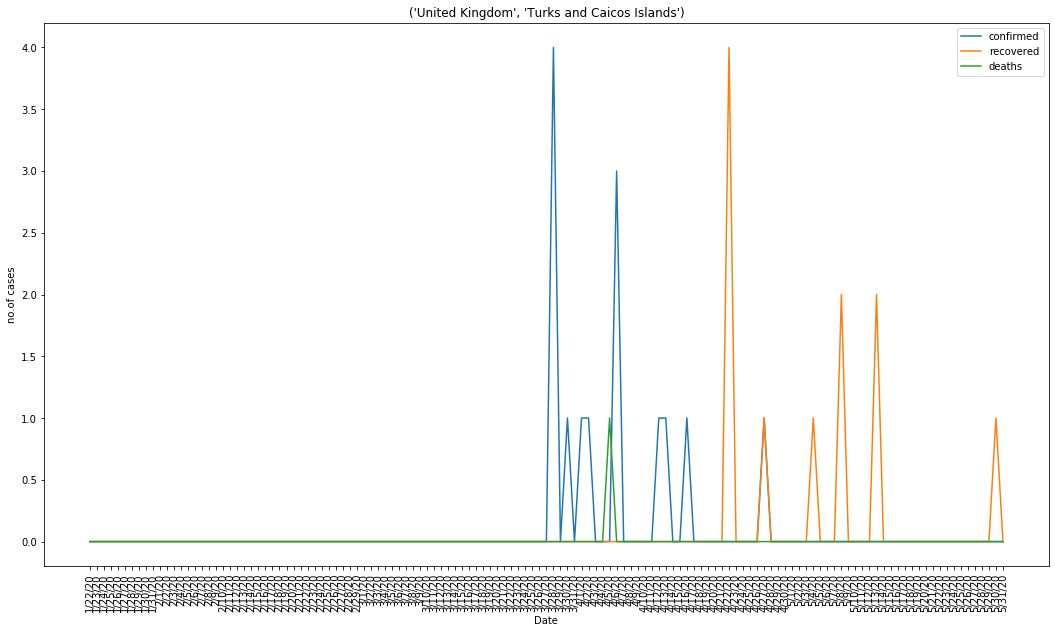

In [104]:
for i in idx:
    plt.figure(figsize=(18,10))
    plt.plot(dates,main_confirmedt.loc[:,i][2:])
    plt.plot(dates,main_recoveredt.loc[:,i][2:])
    plt.plot(dates,main_deathst.loc[:,i][2:])
    plt.xticks(rotation=90);
    plt.legend(['confirmed','recovered','deaths'])
    plt.xlabel('Date')
    plt.ylabel('no.of cases')
    plt.title(i);

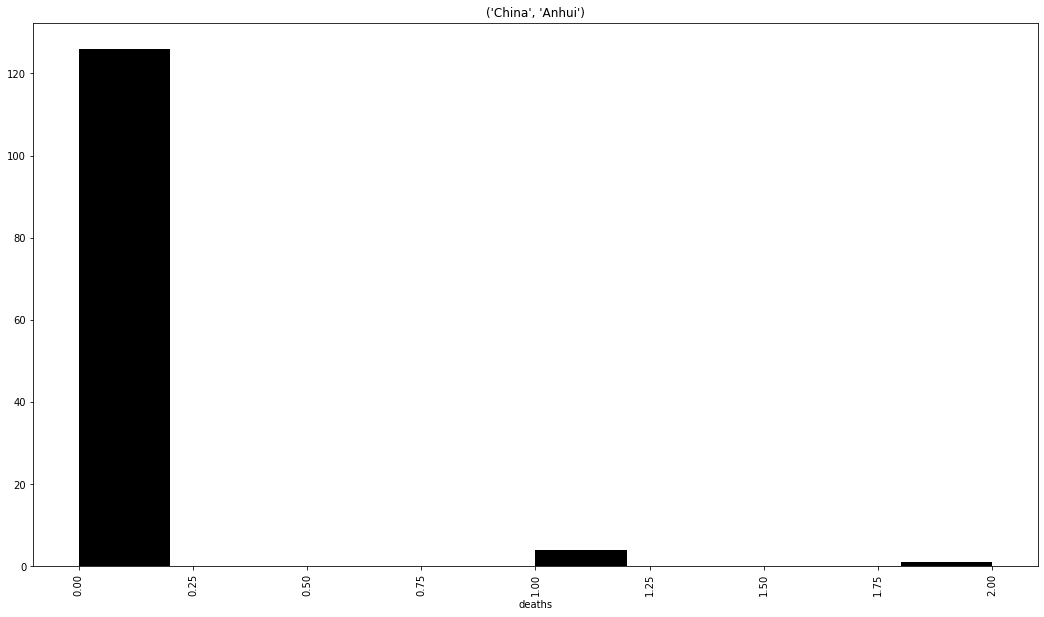

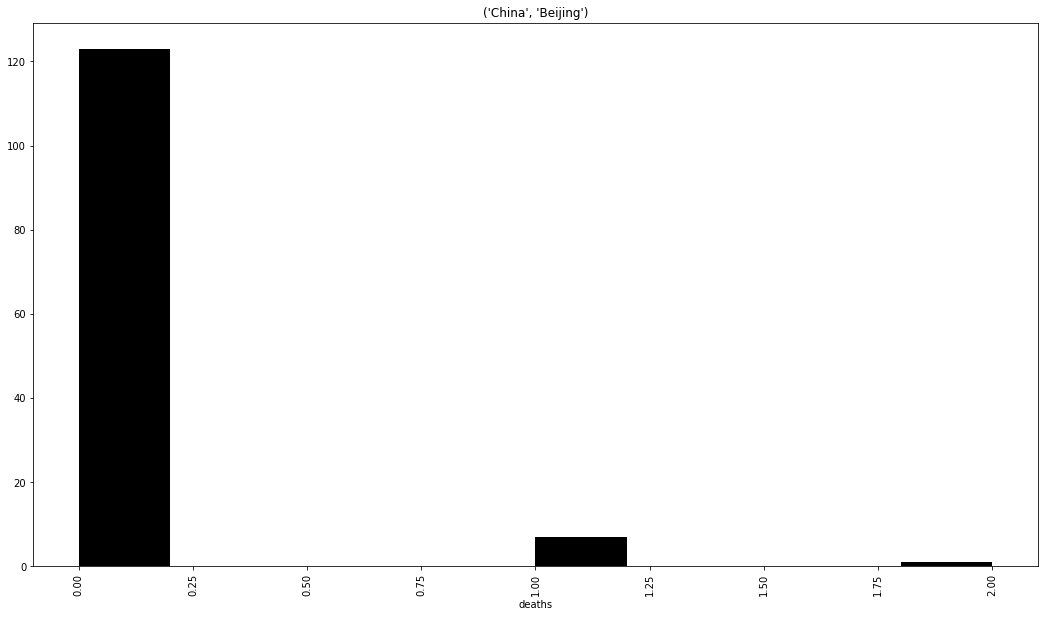

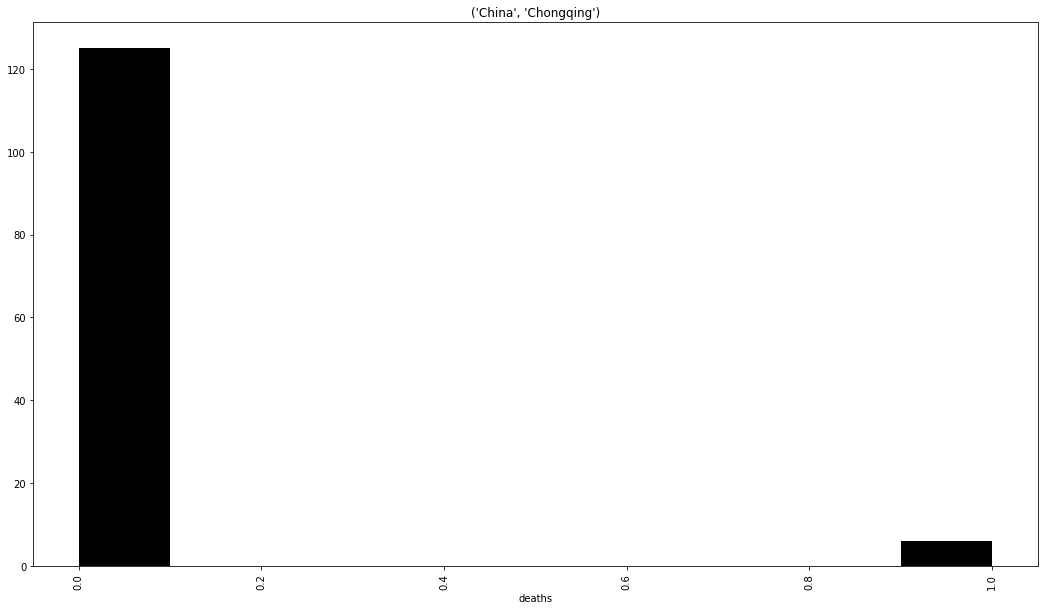

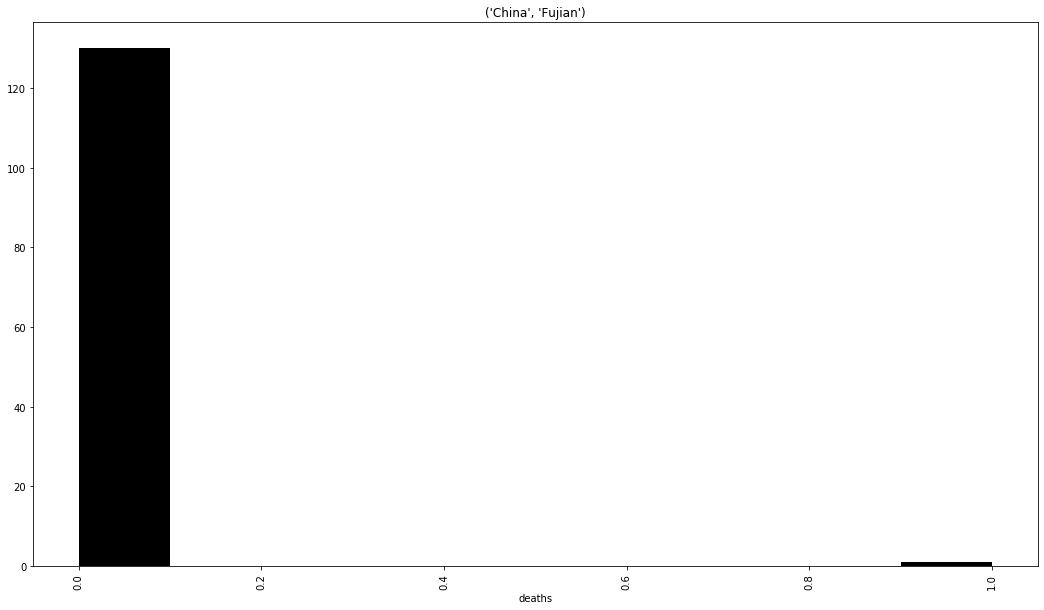

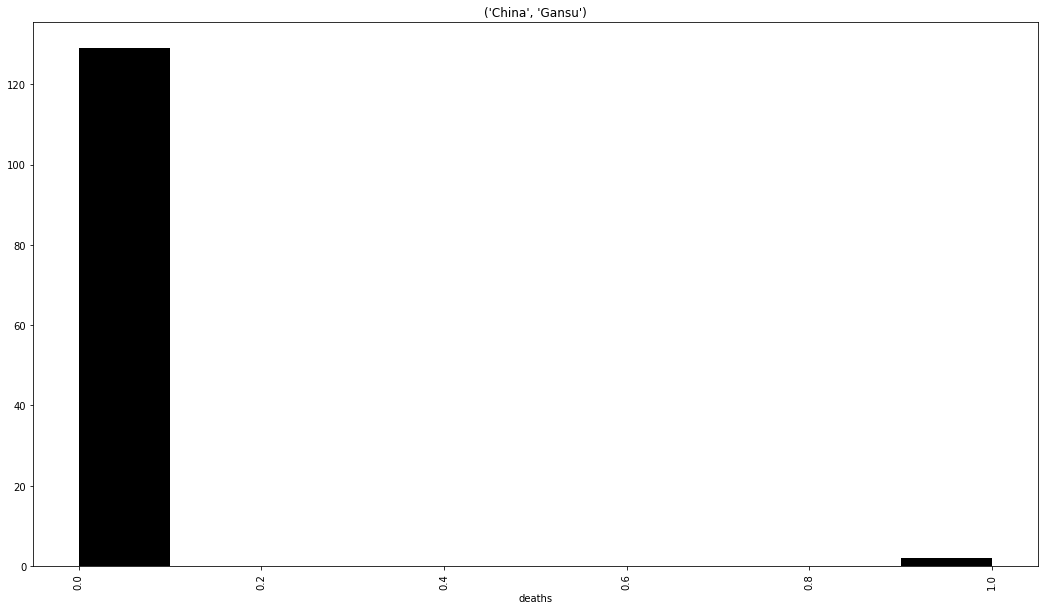

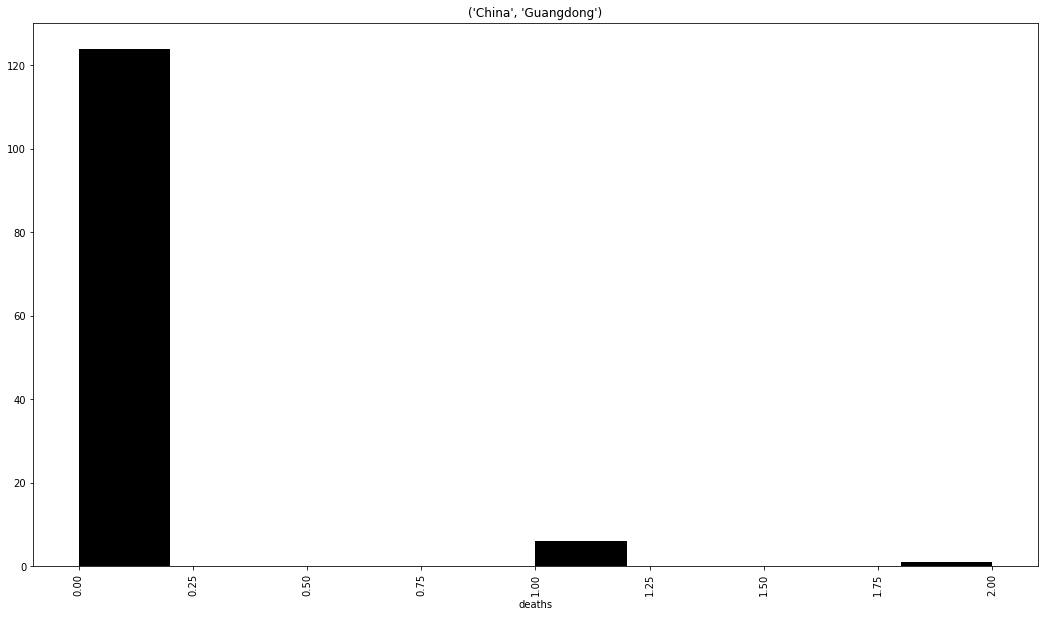

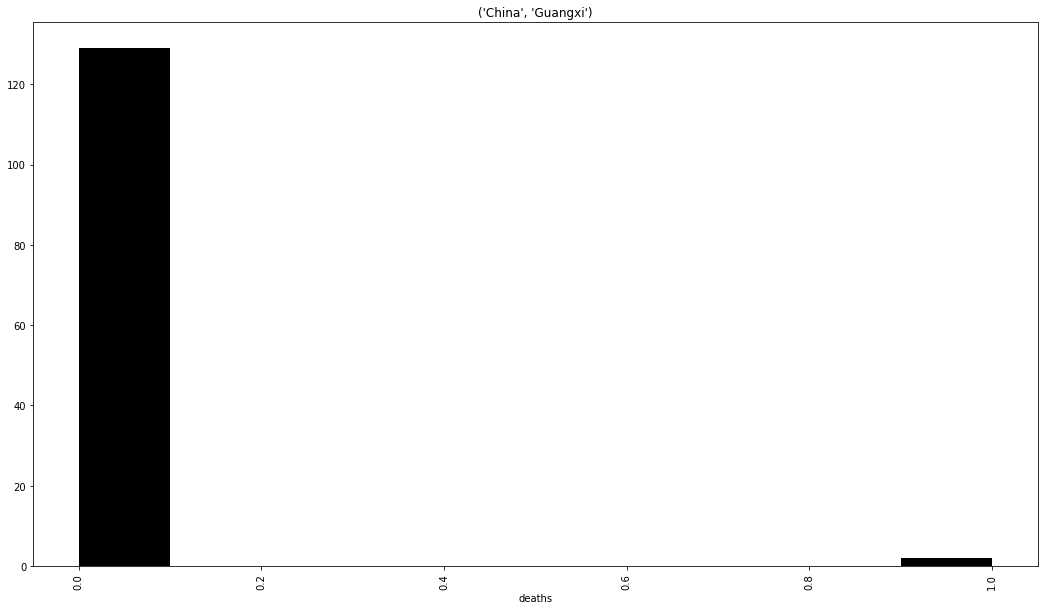

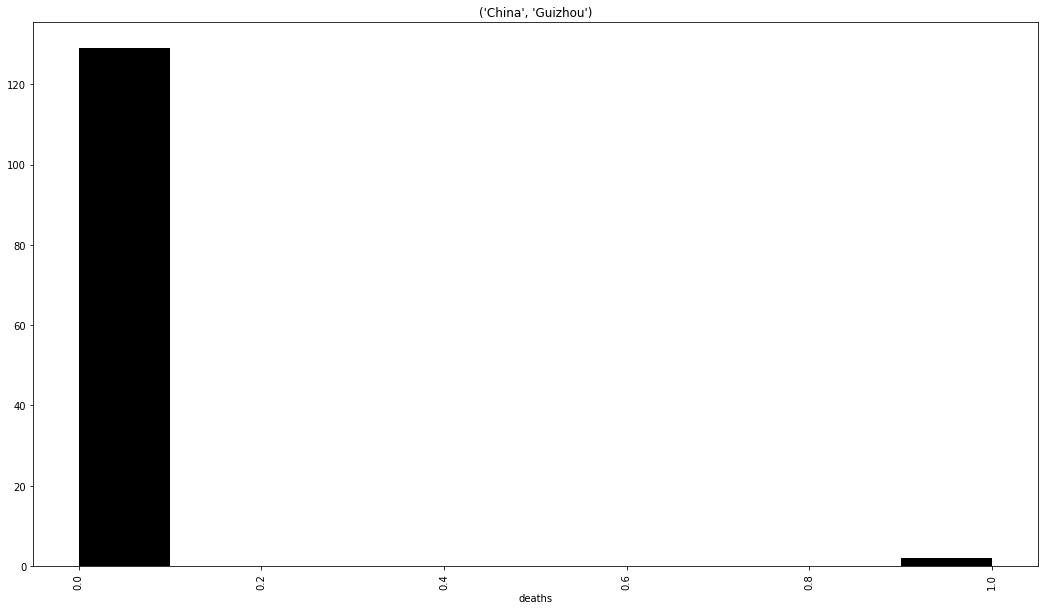

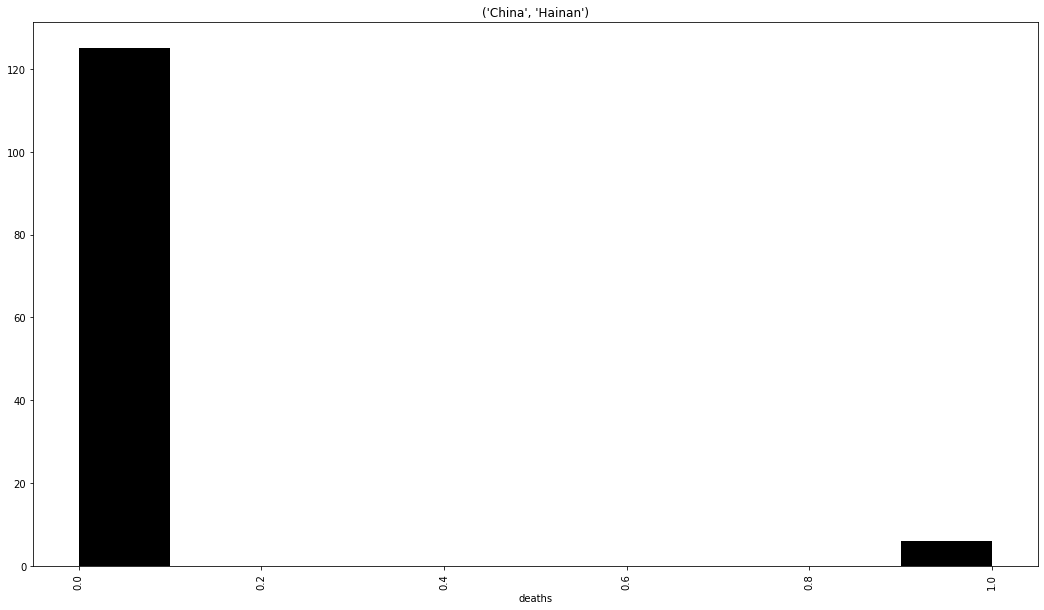

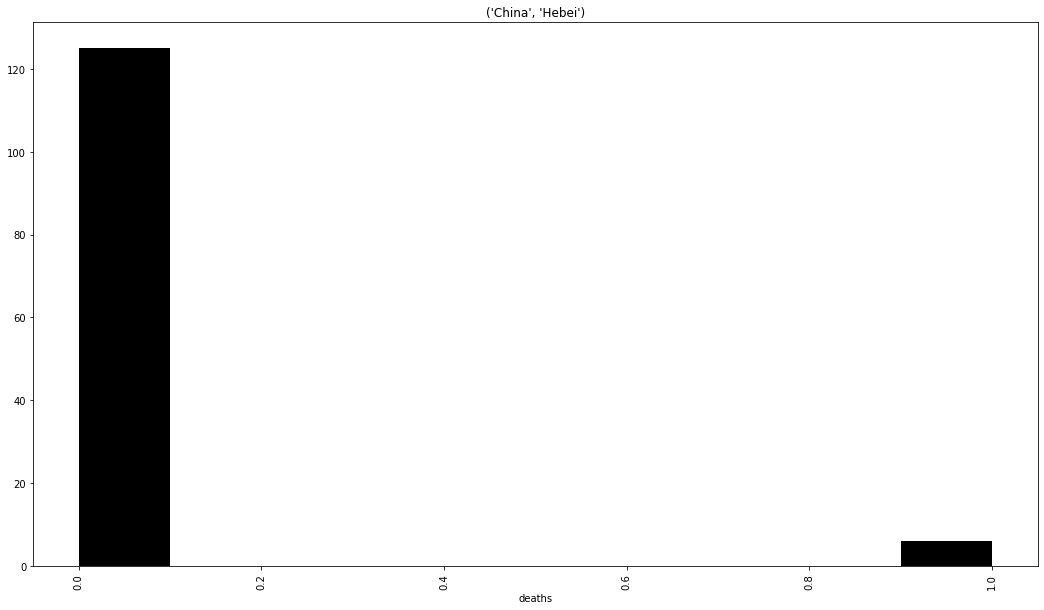

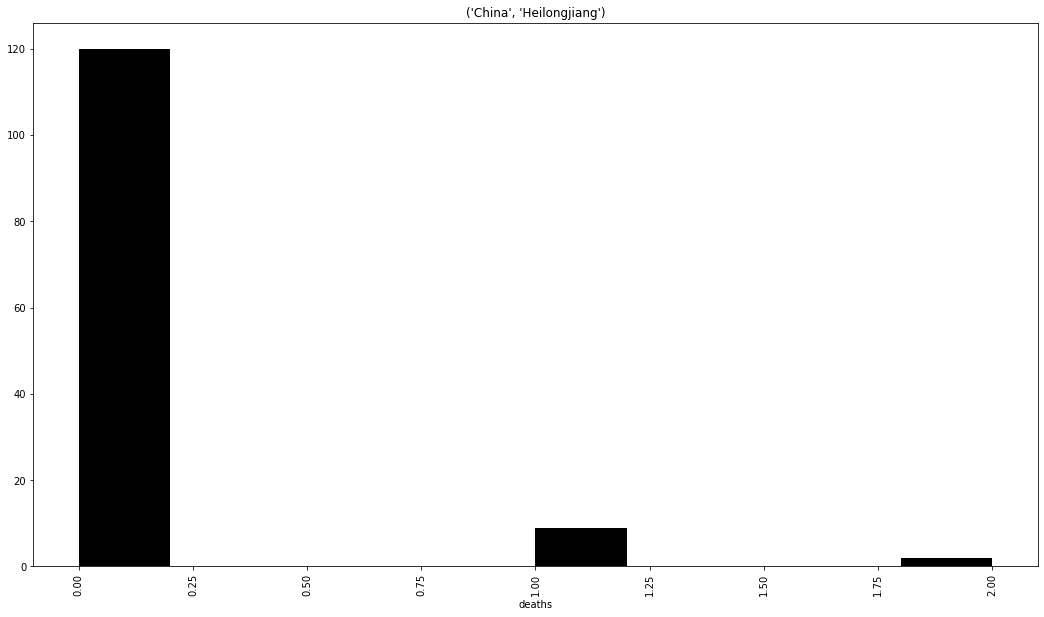

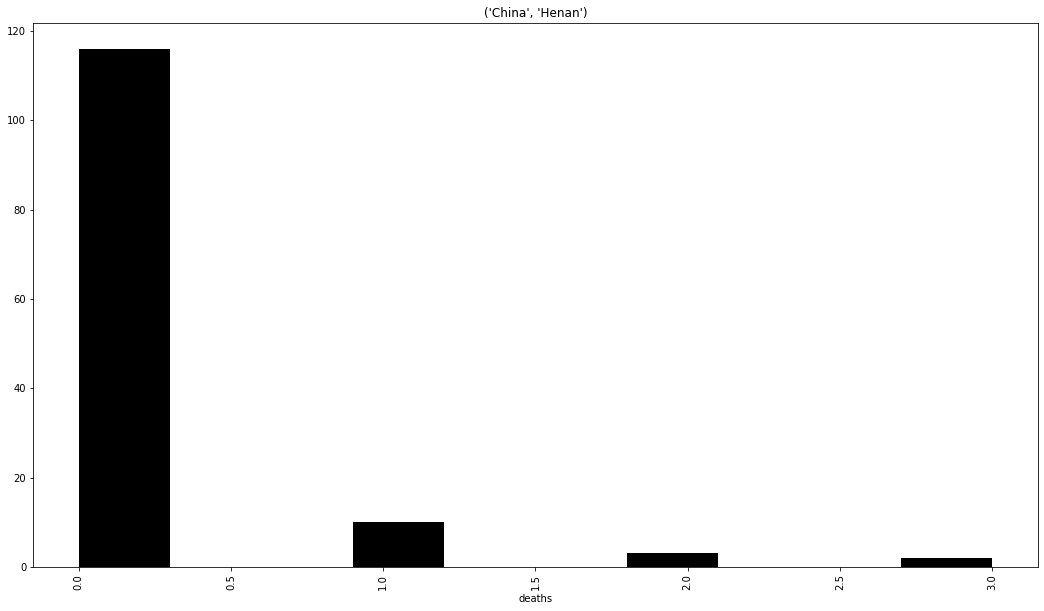

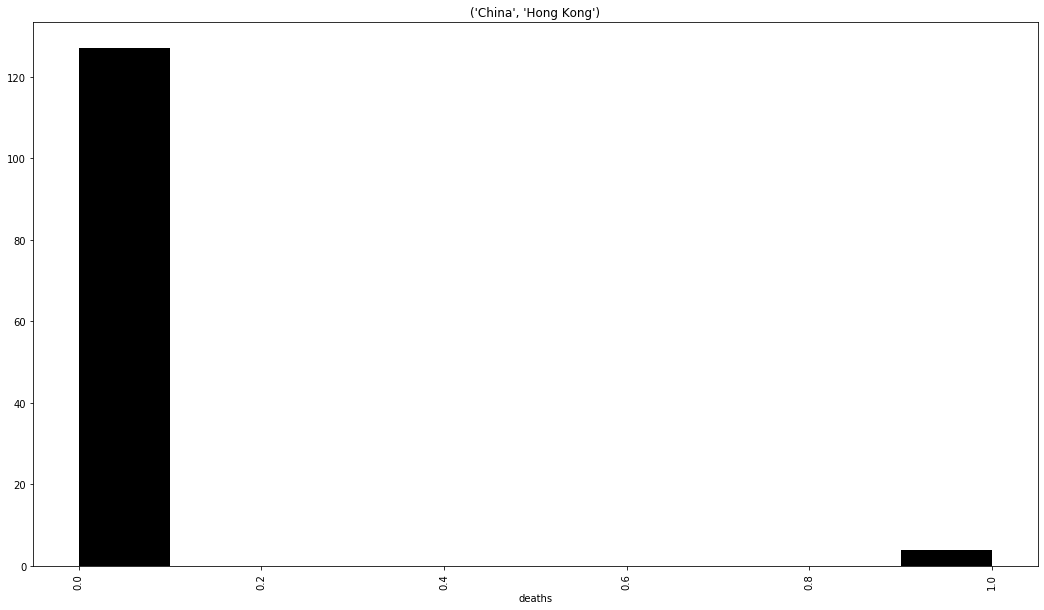

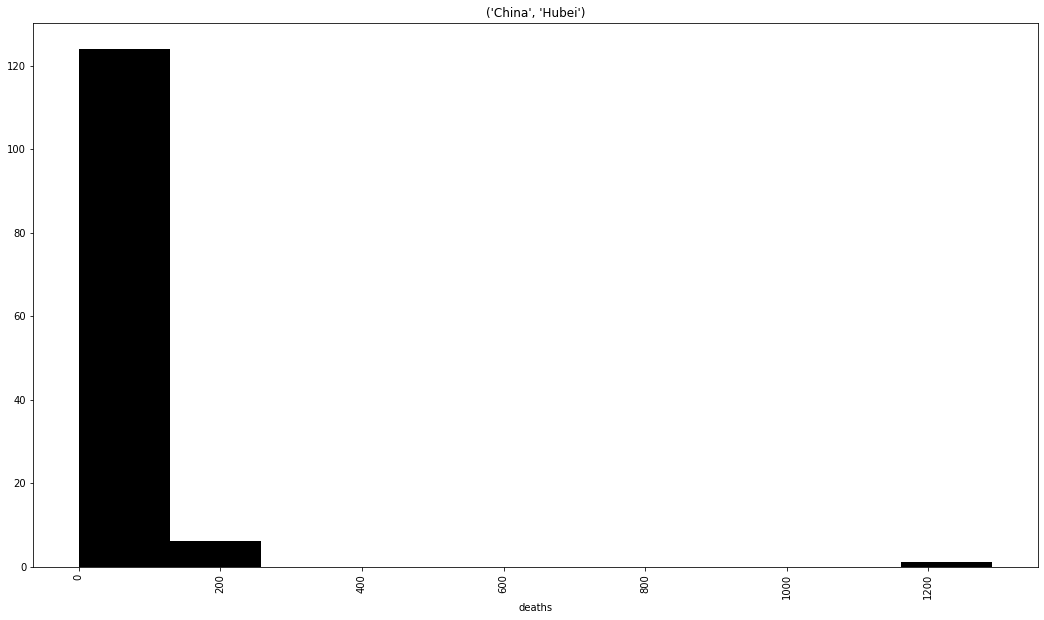

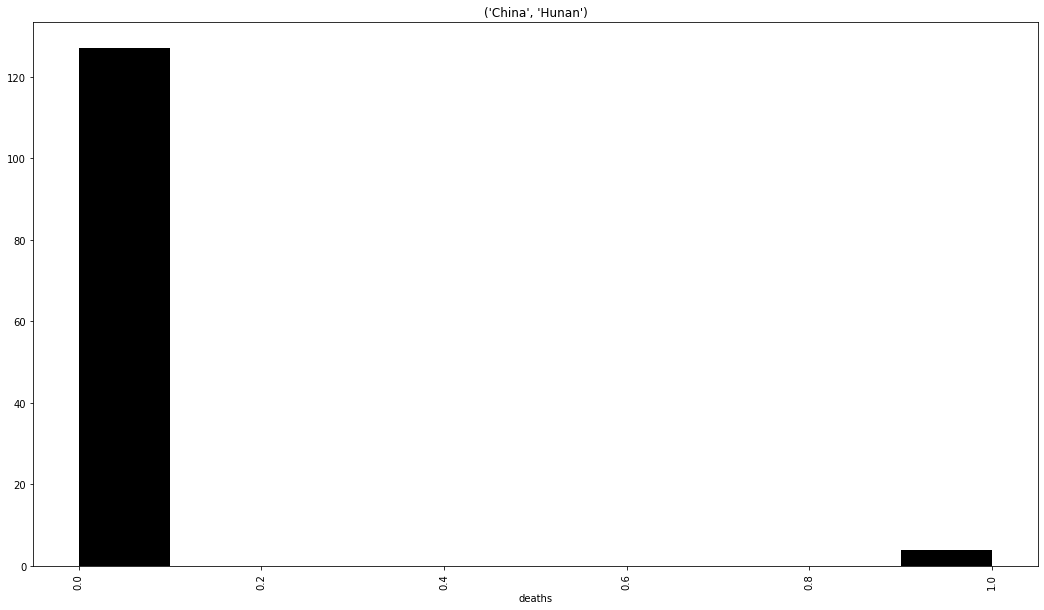

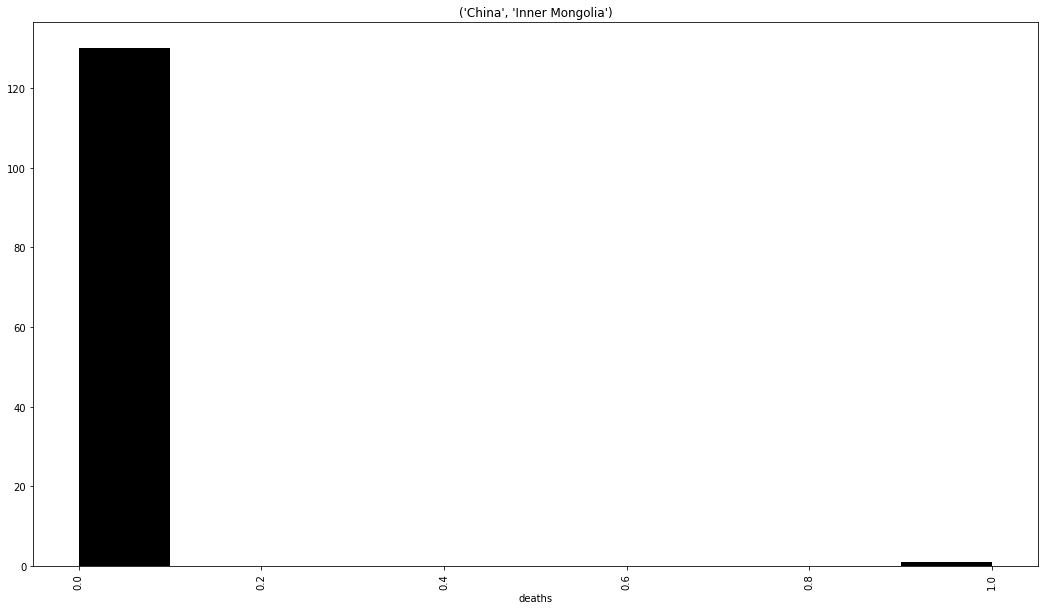

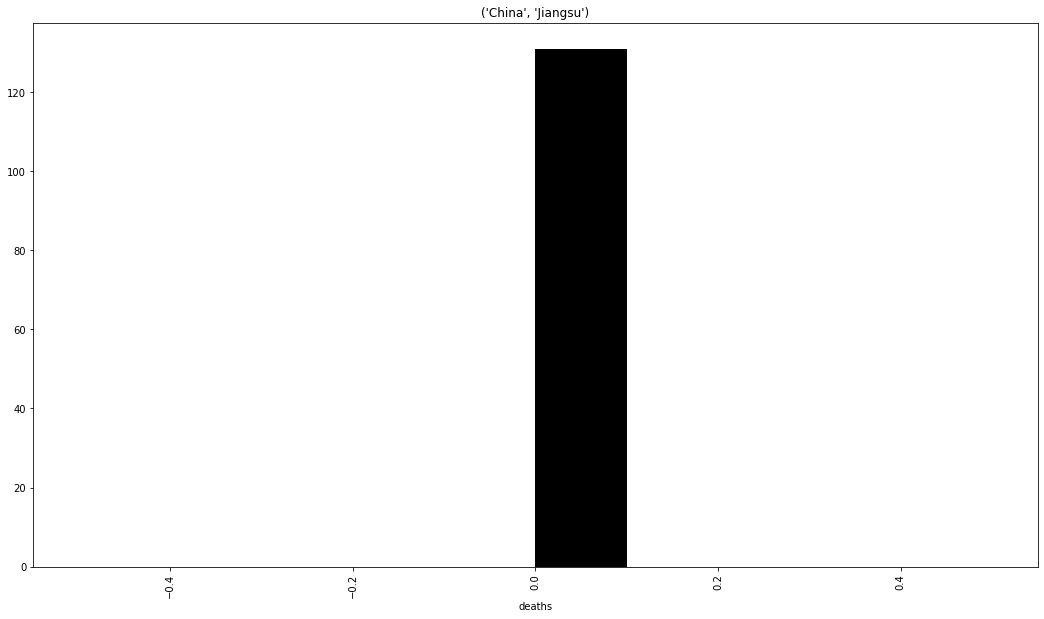

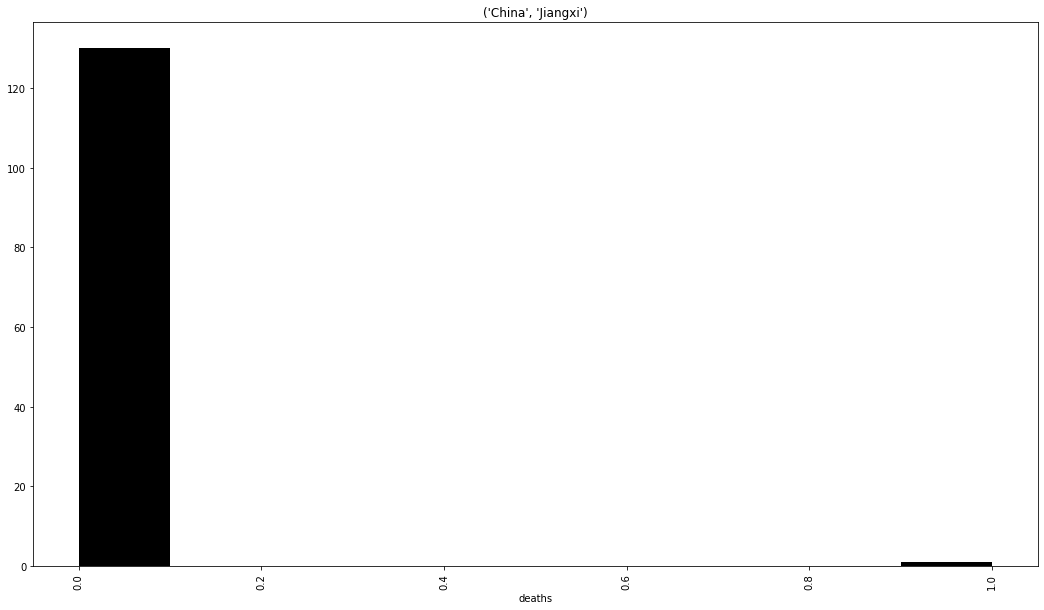

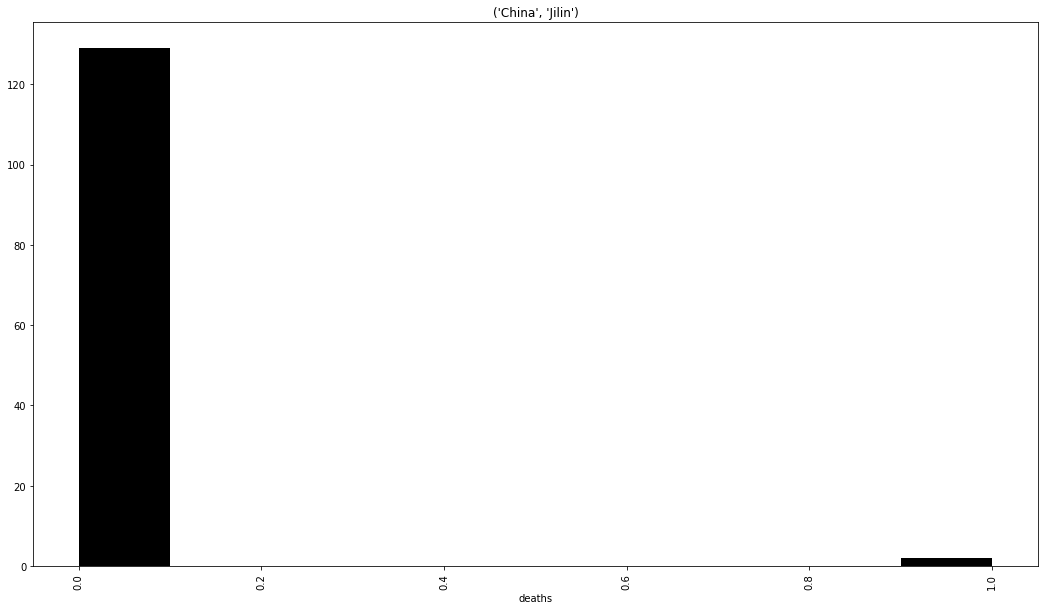

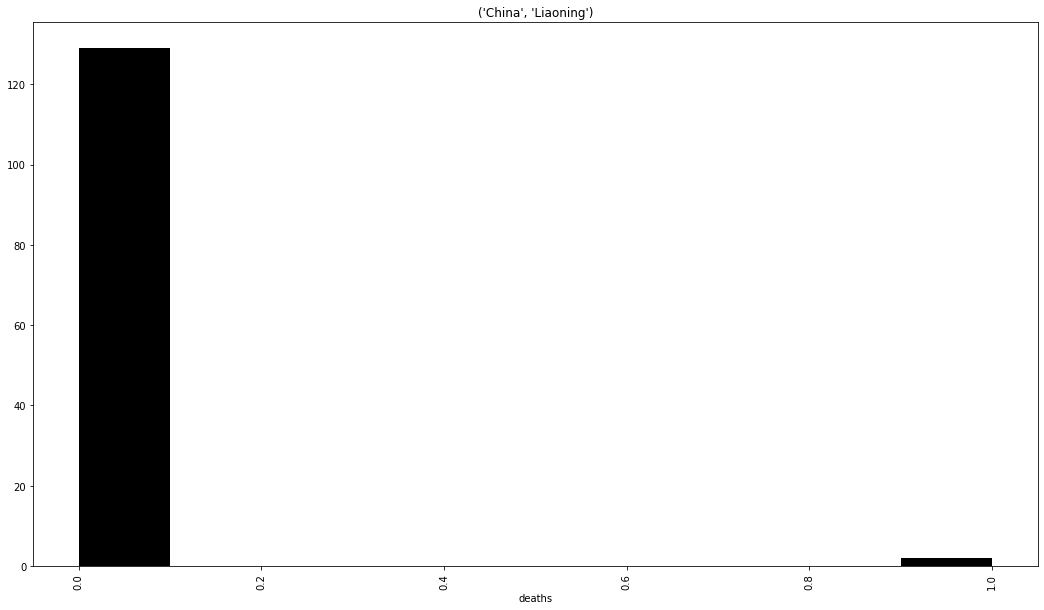

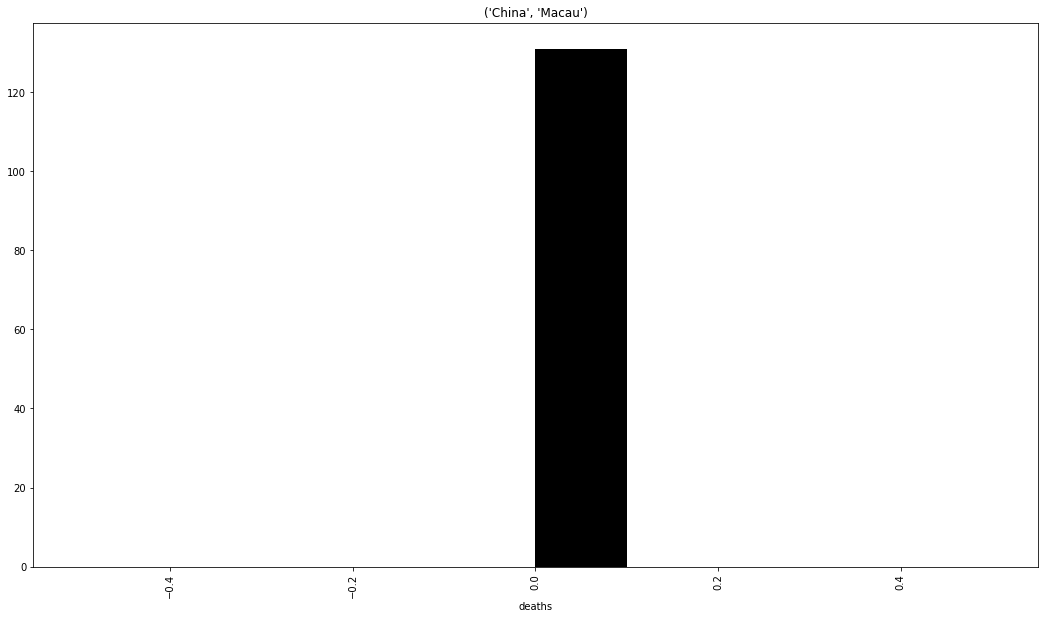

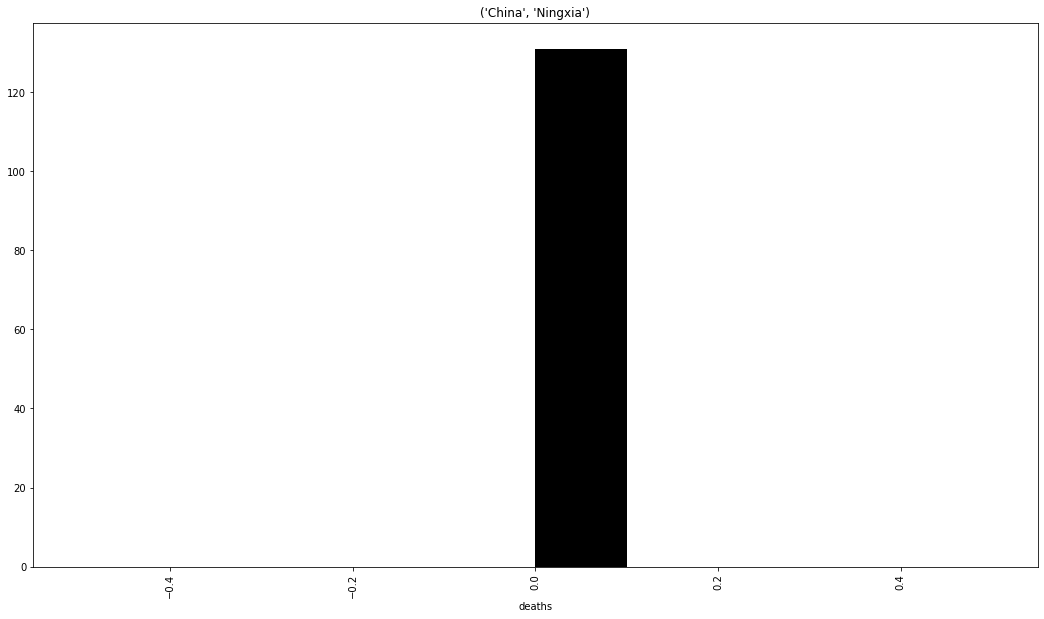

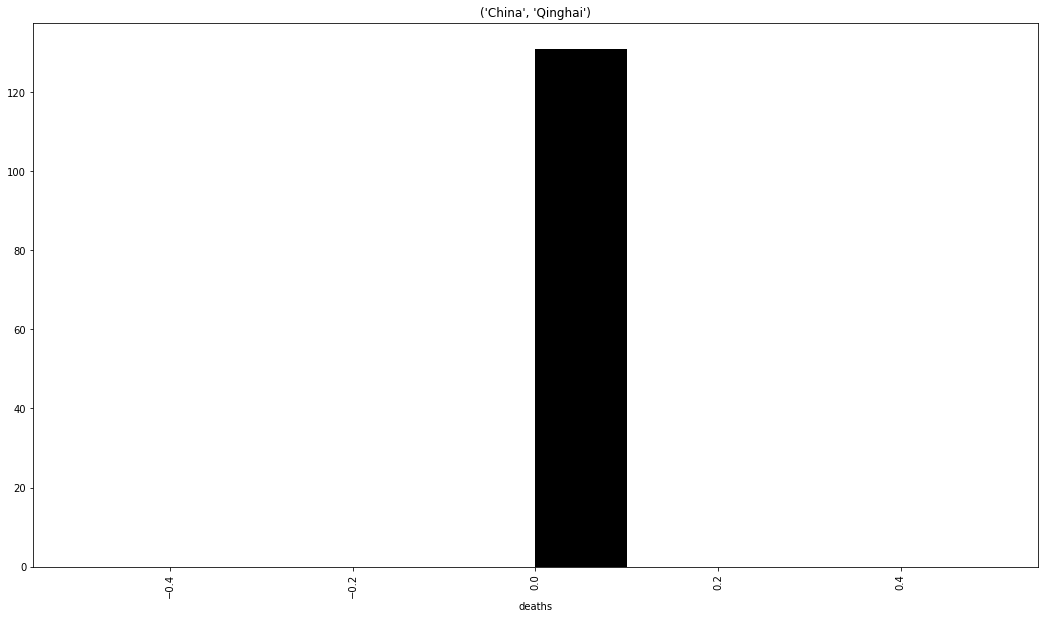

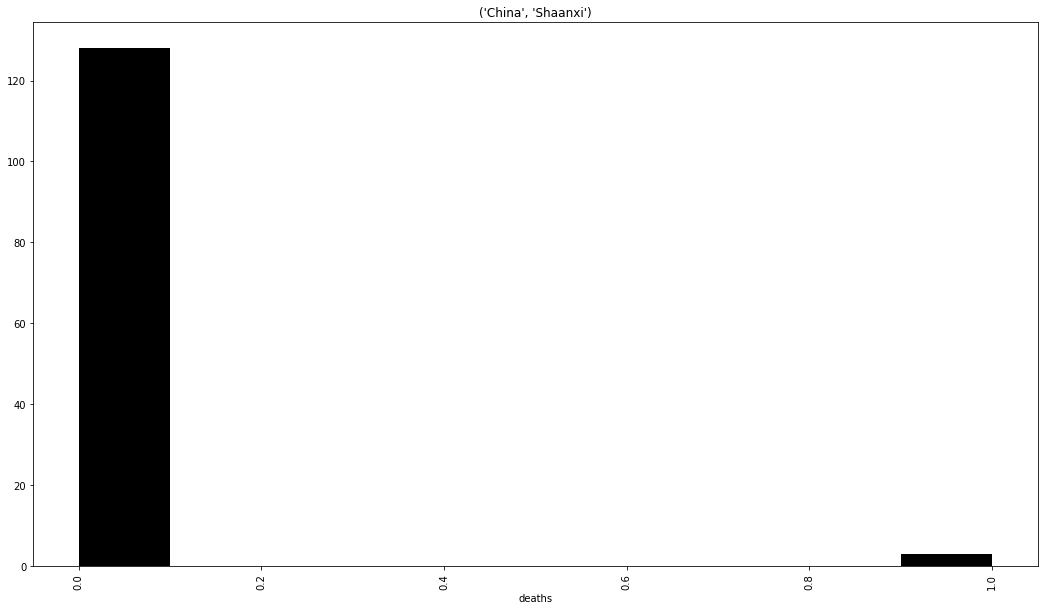

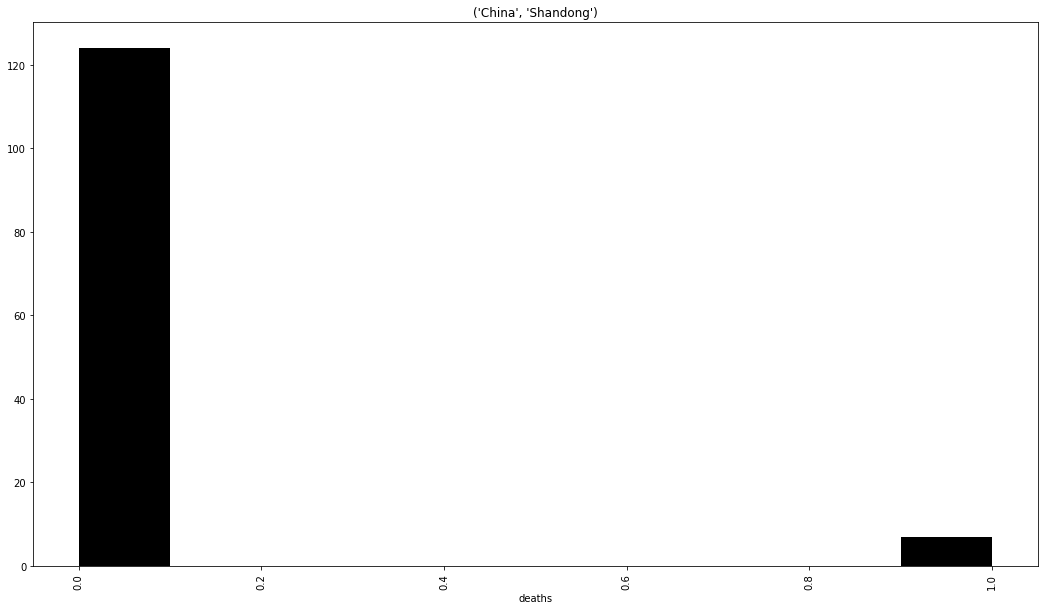

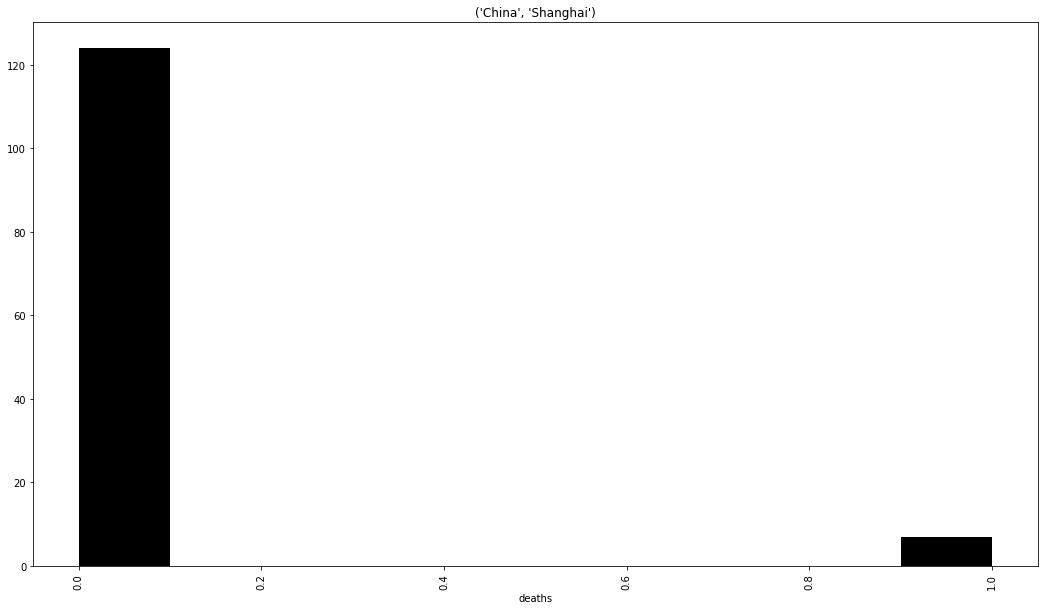

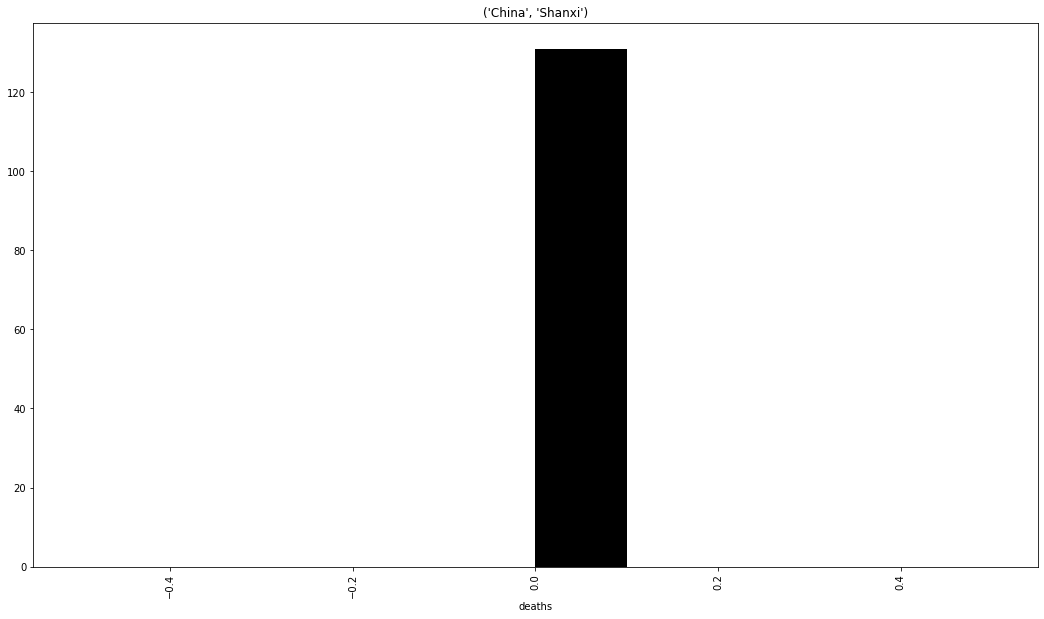

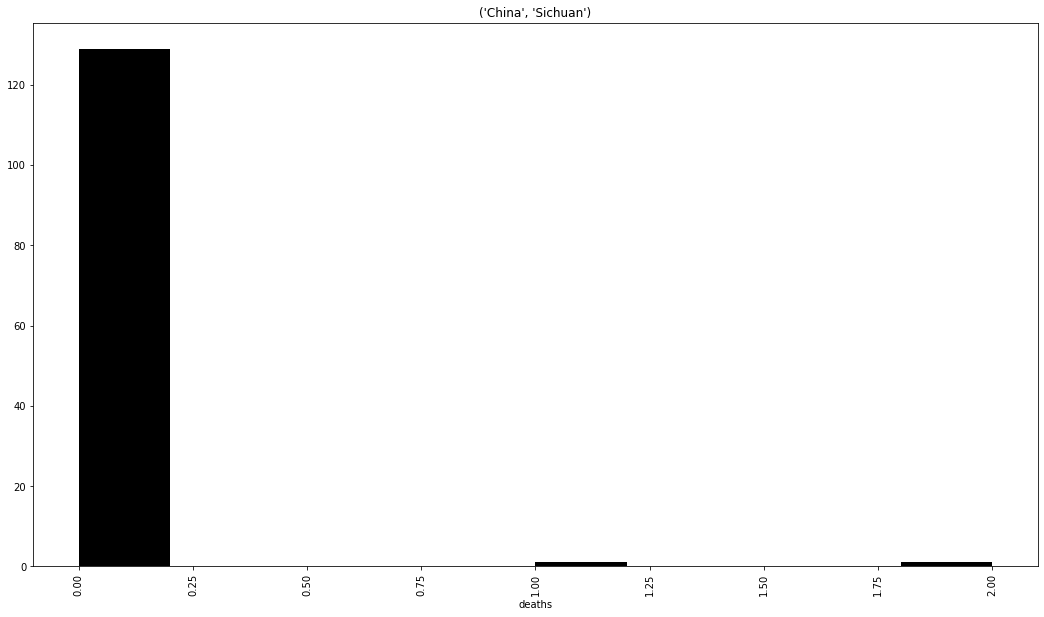

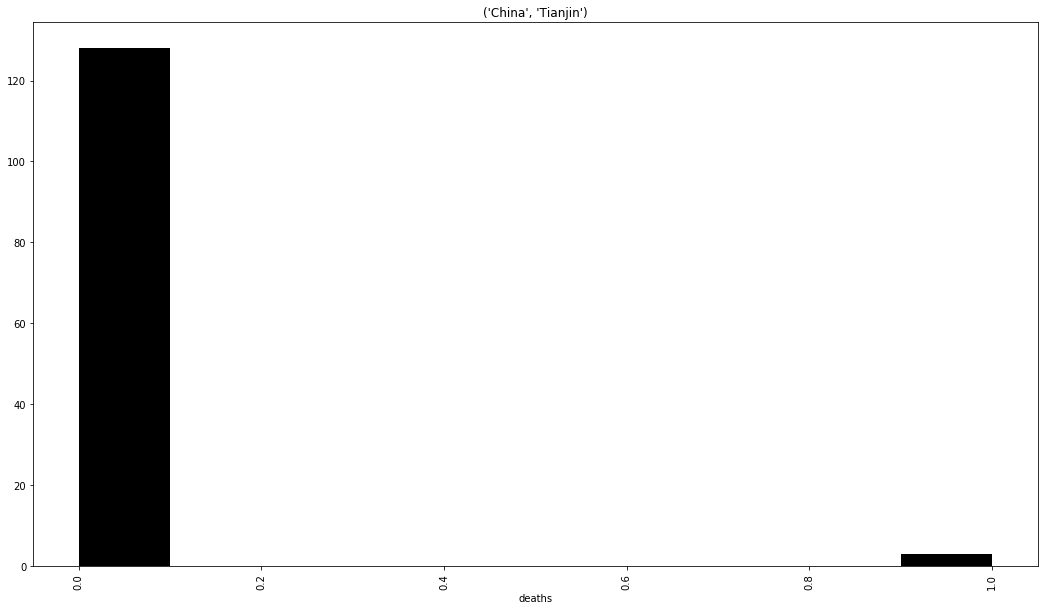

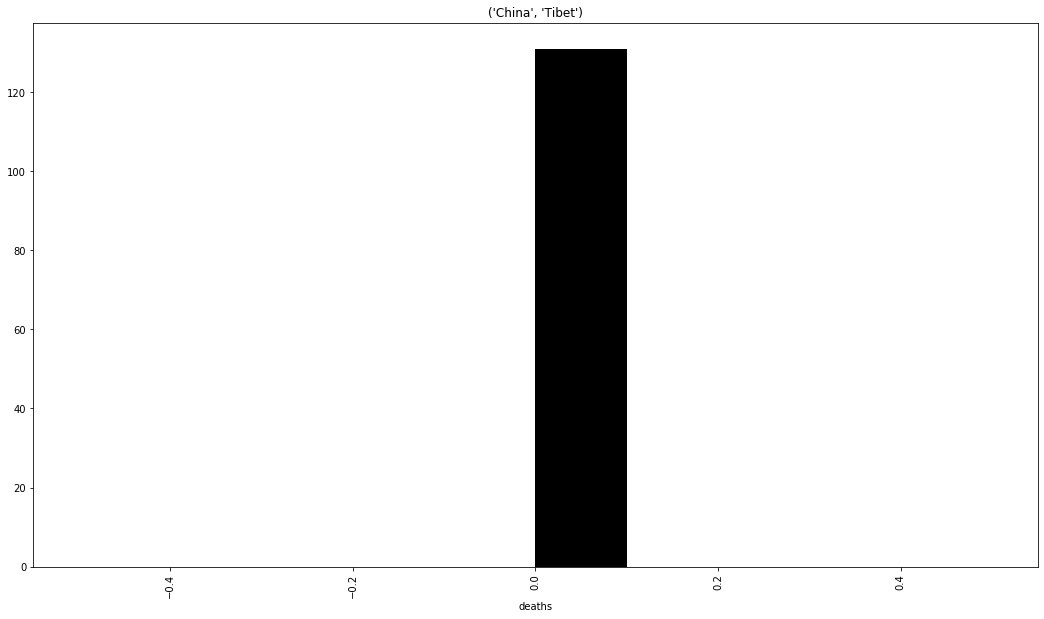

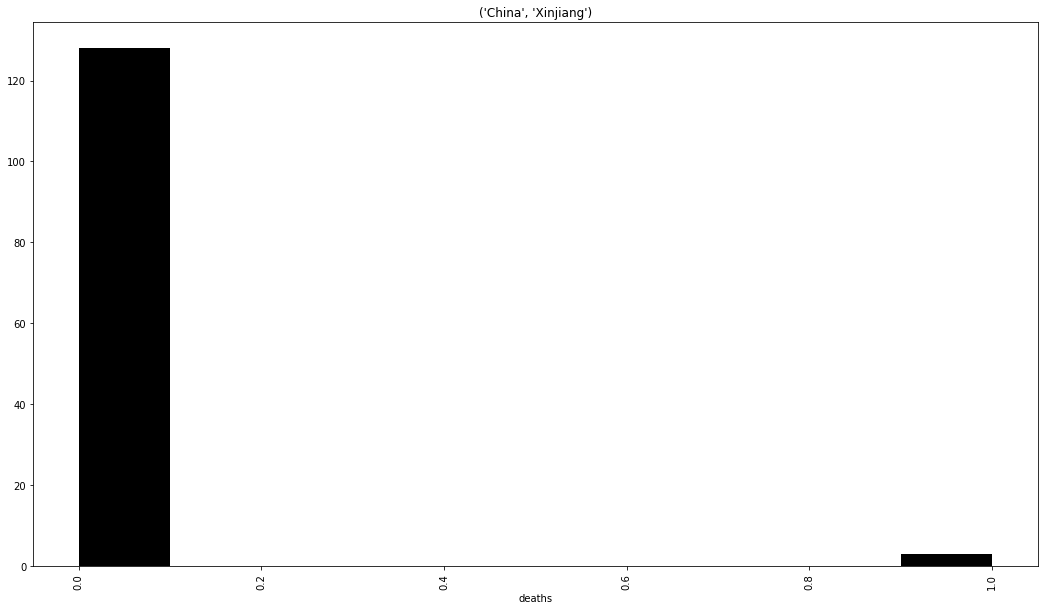

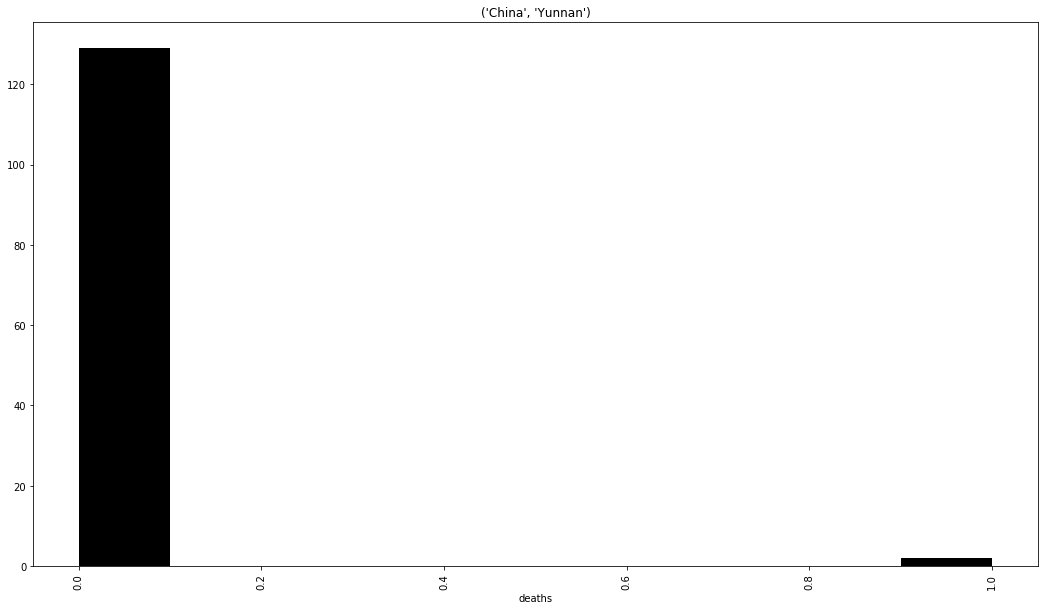

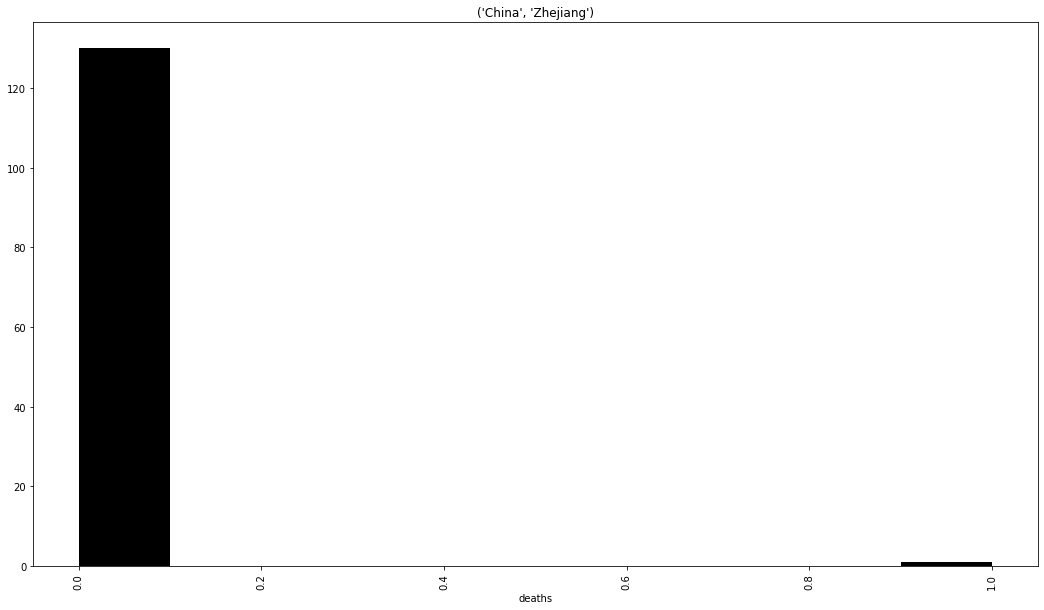

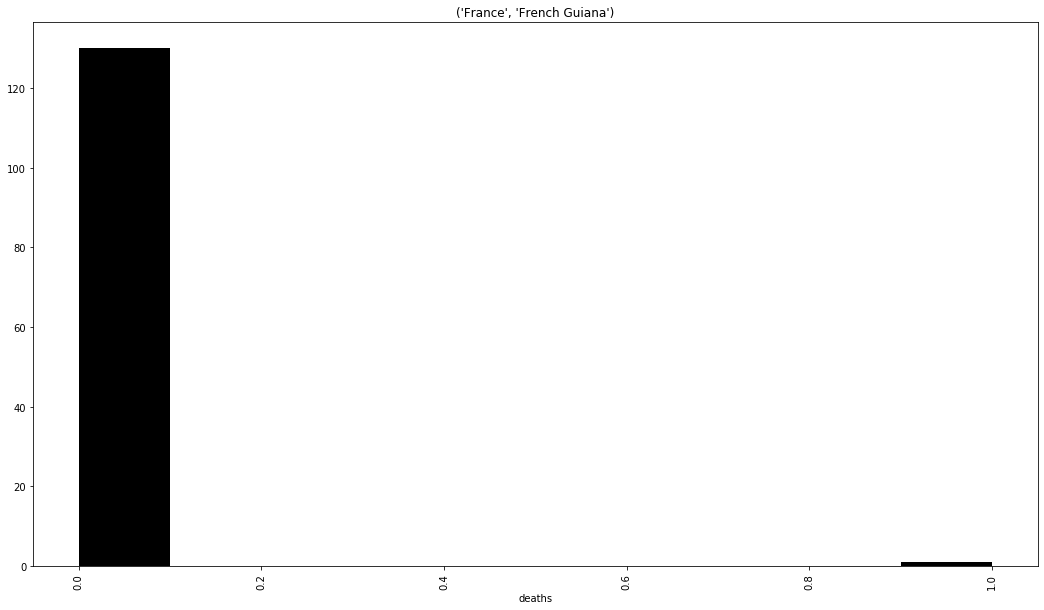

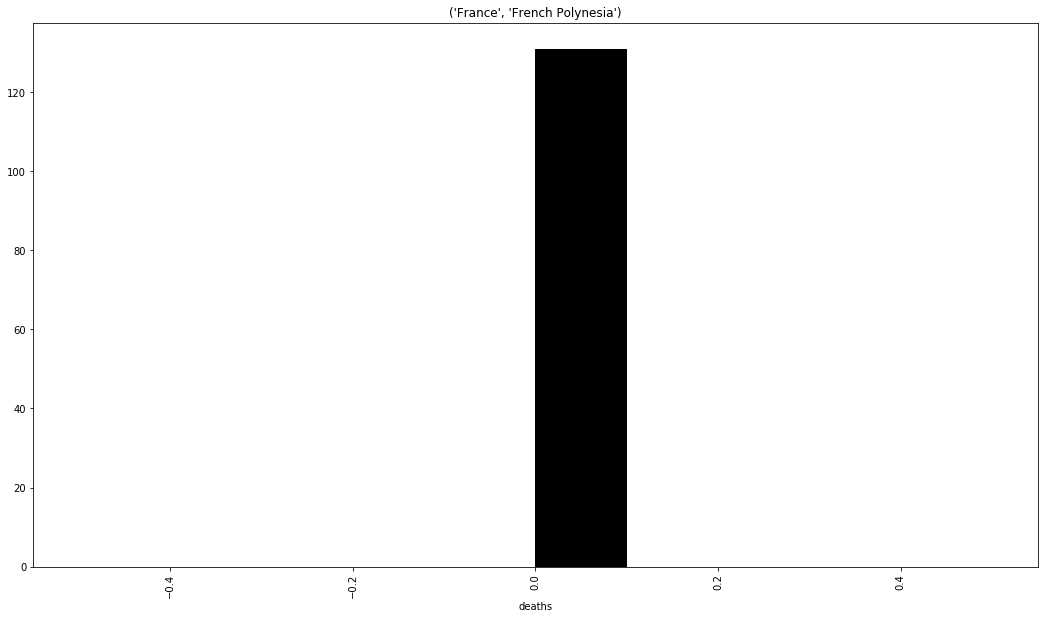

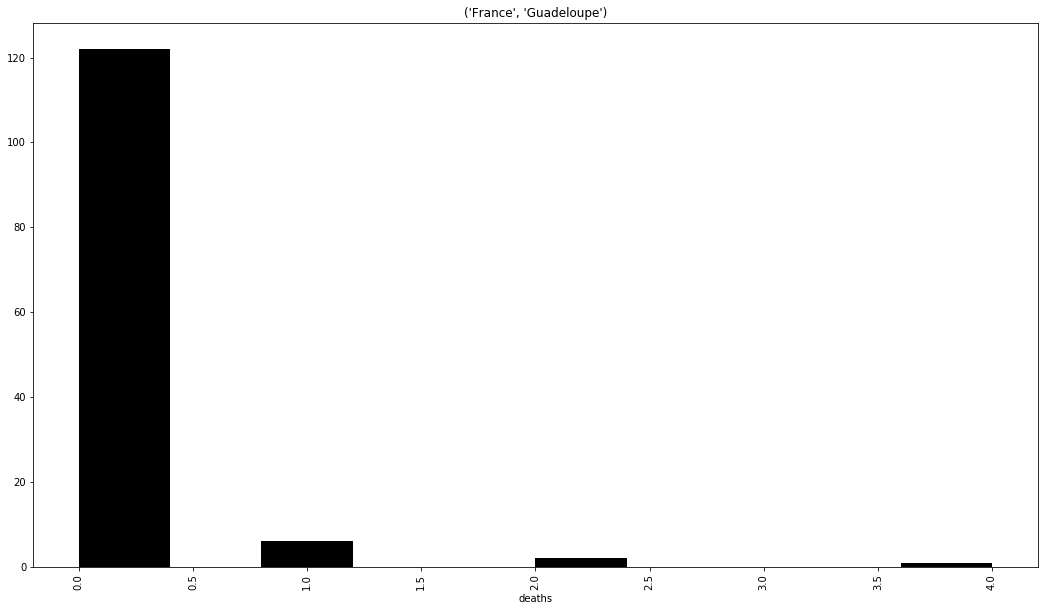

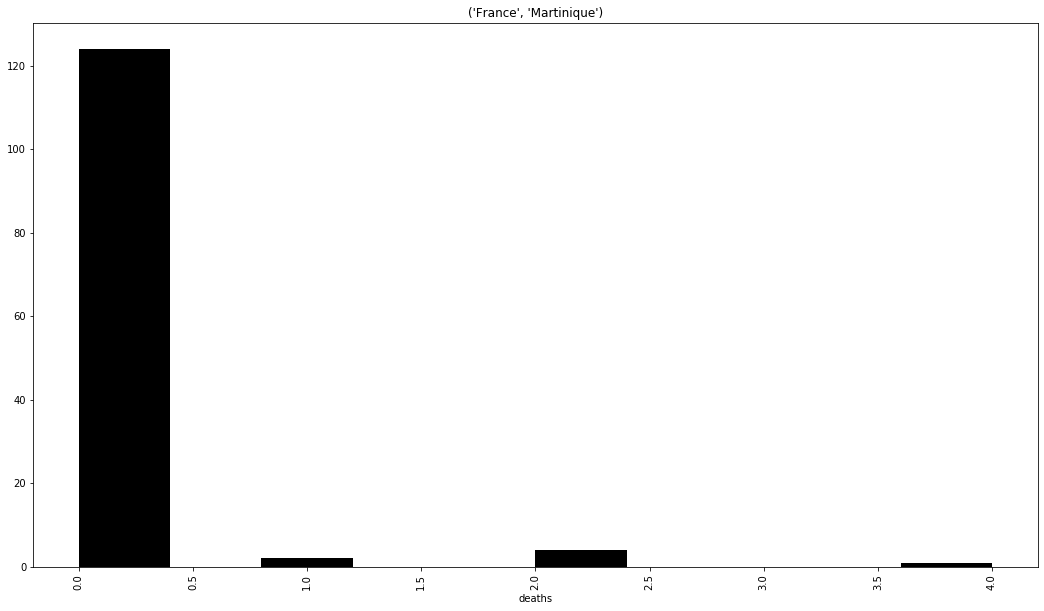

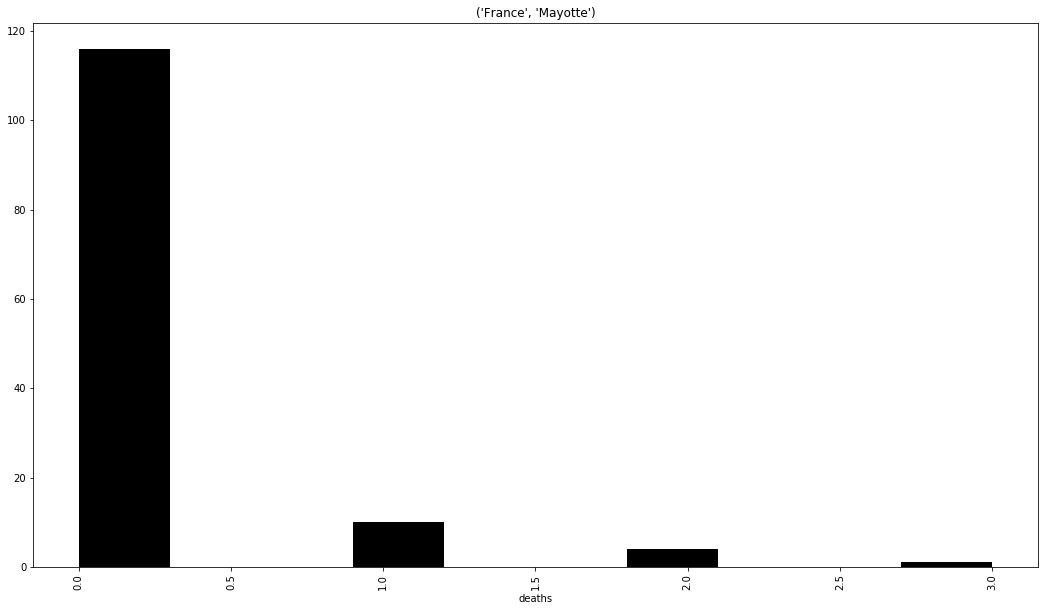

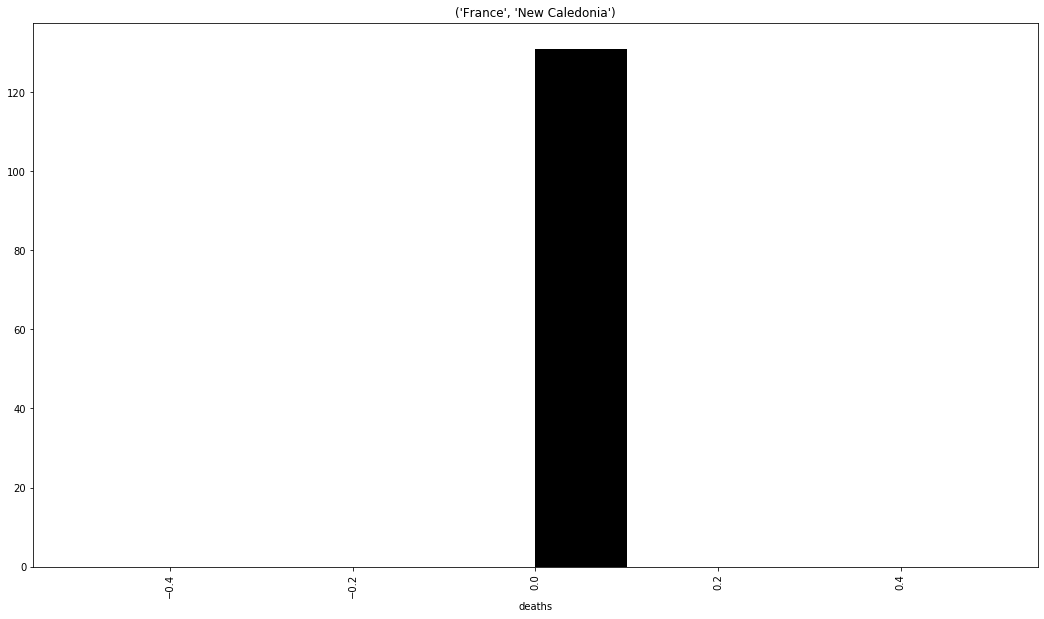

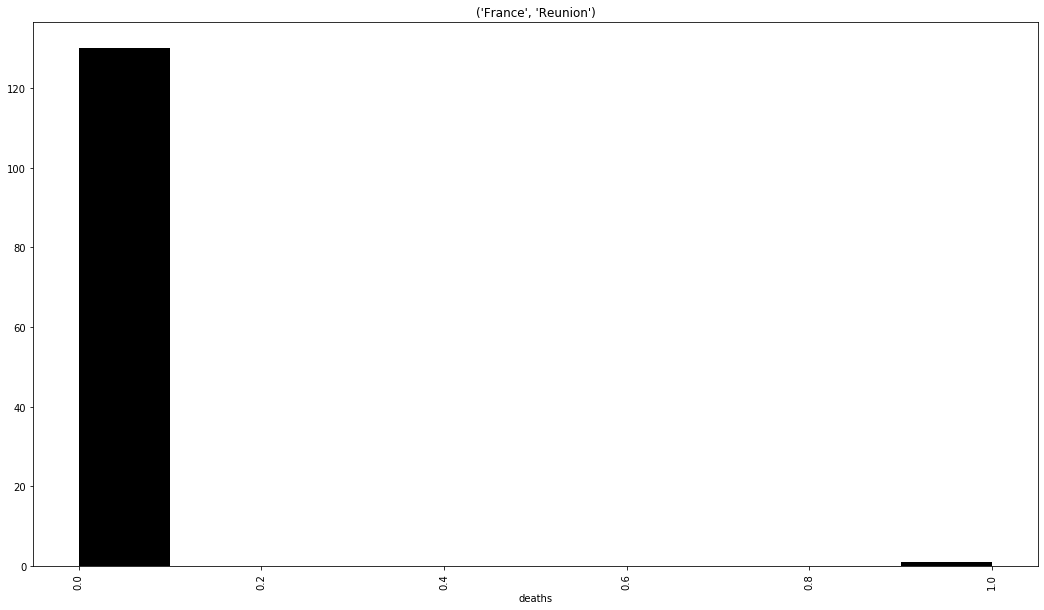

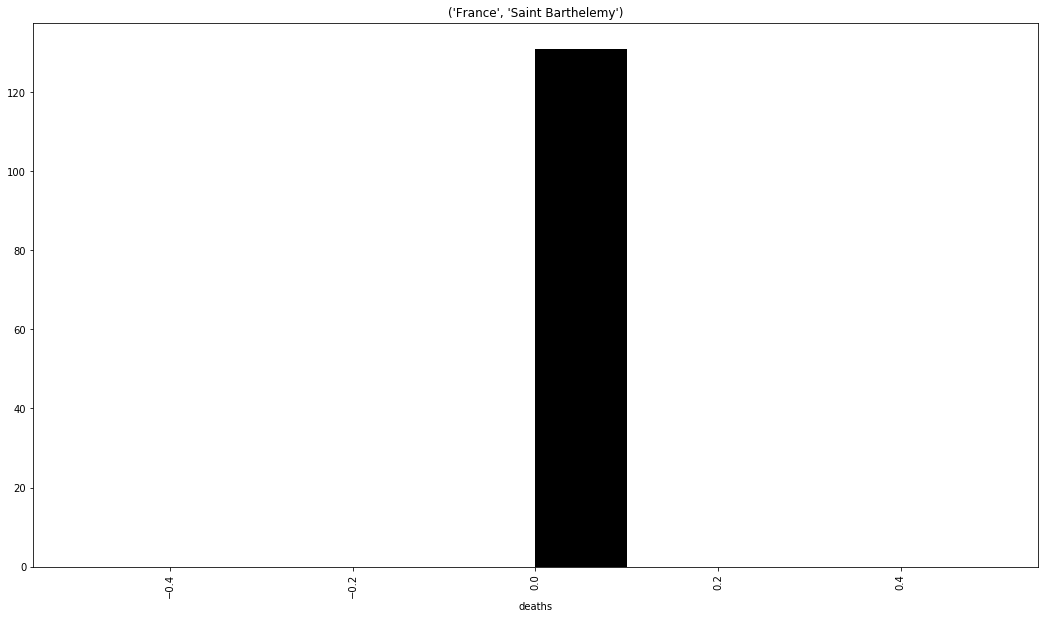

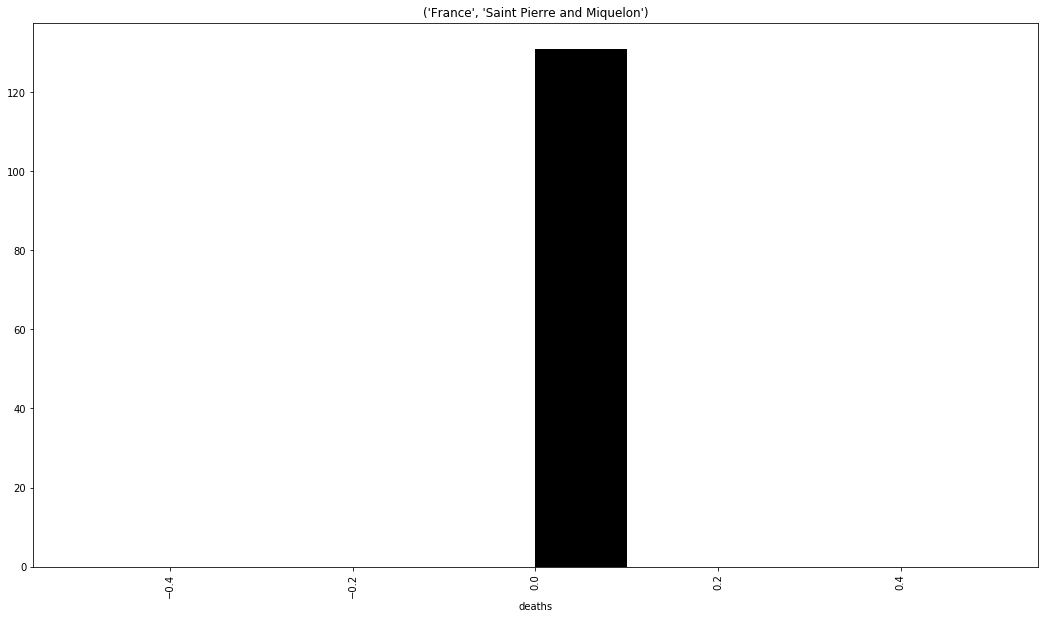

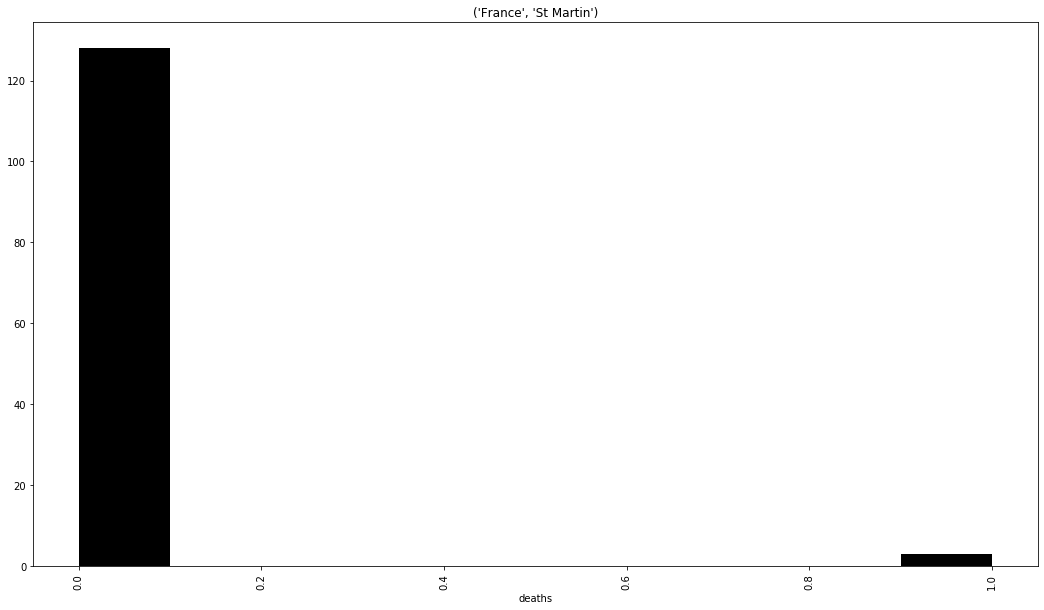

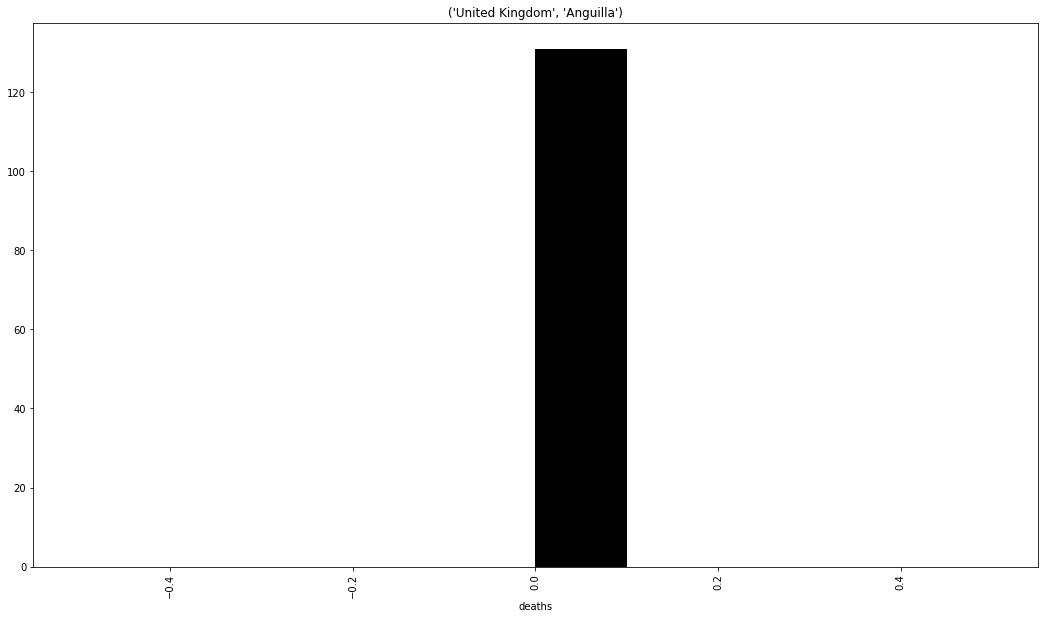

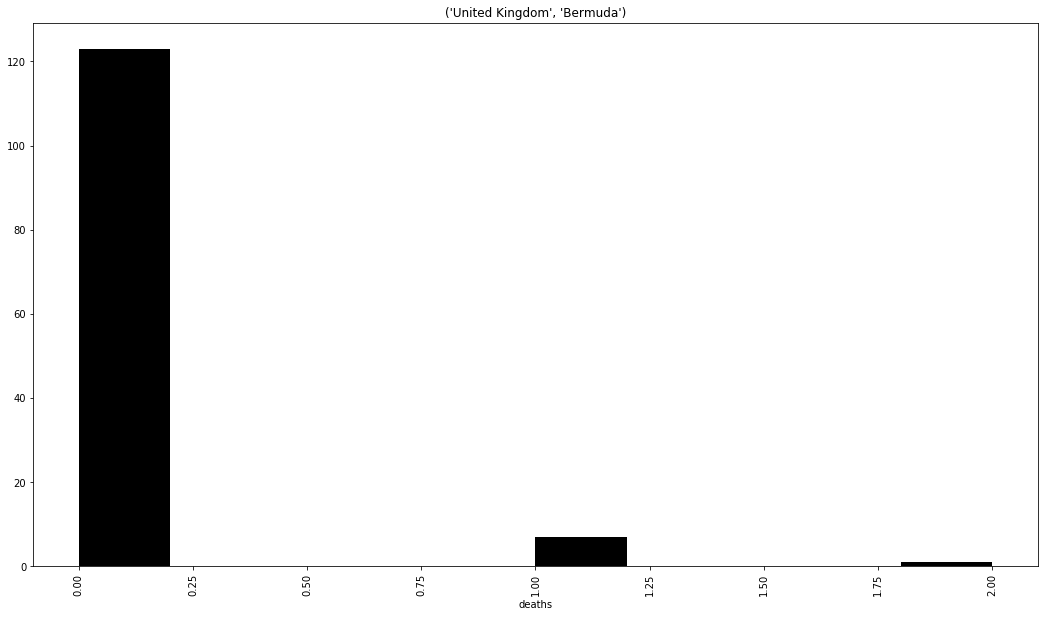

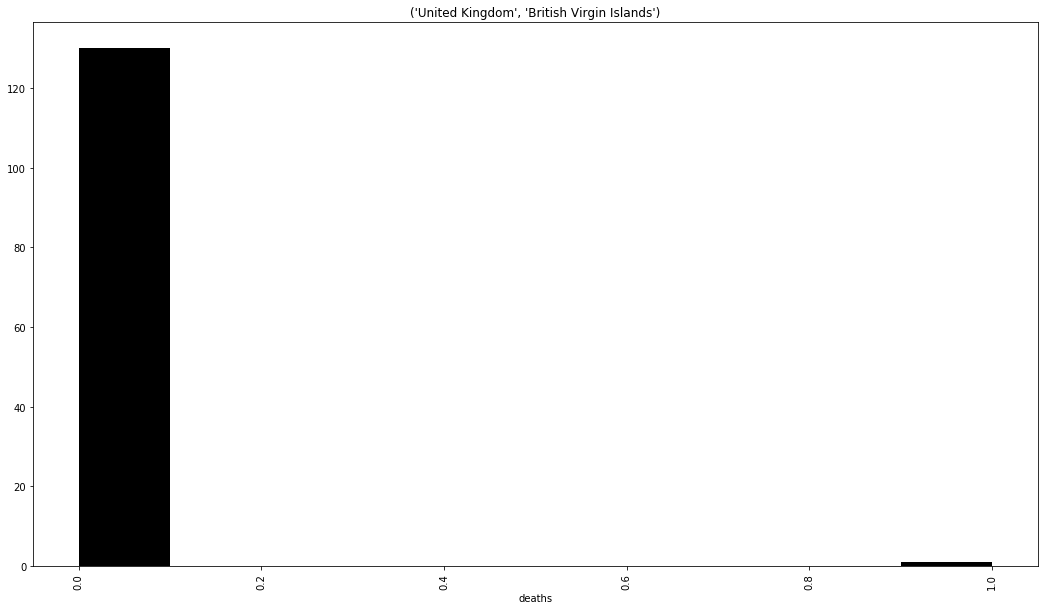

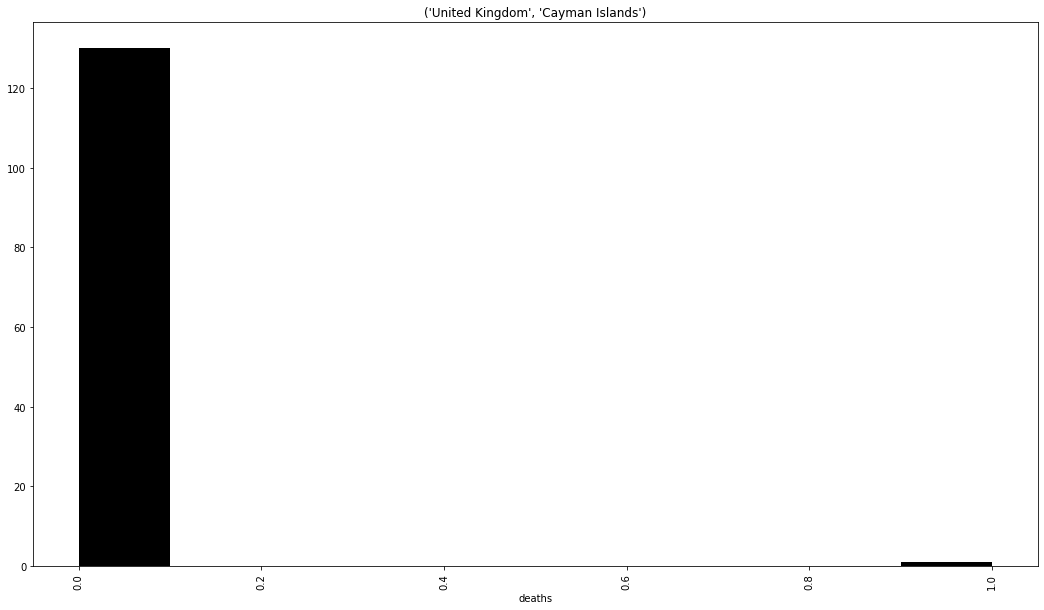

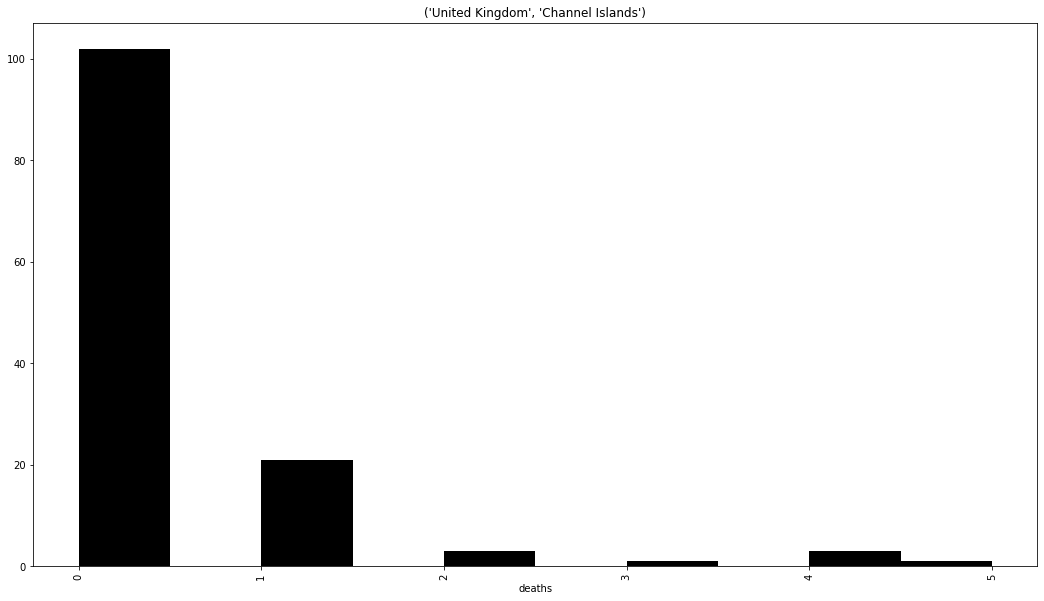

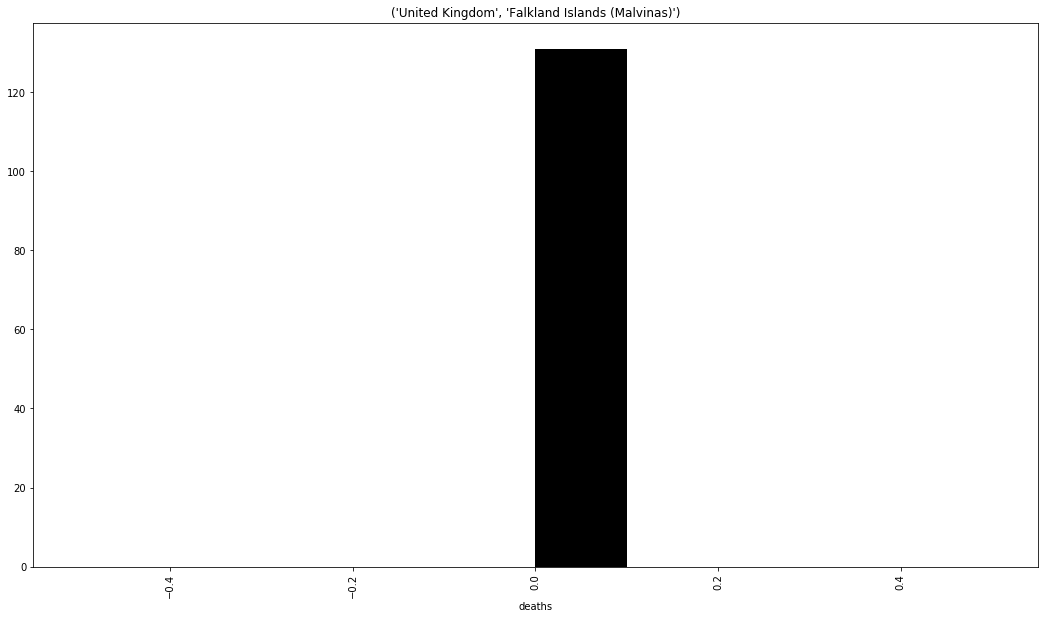

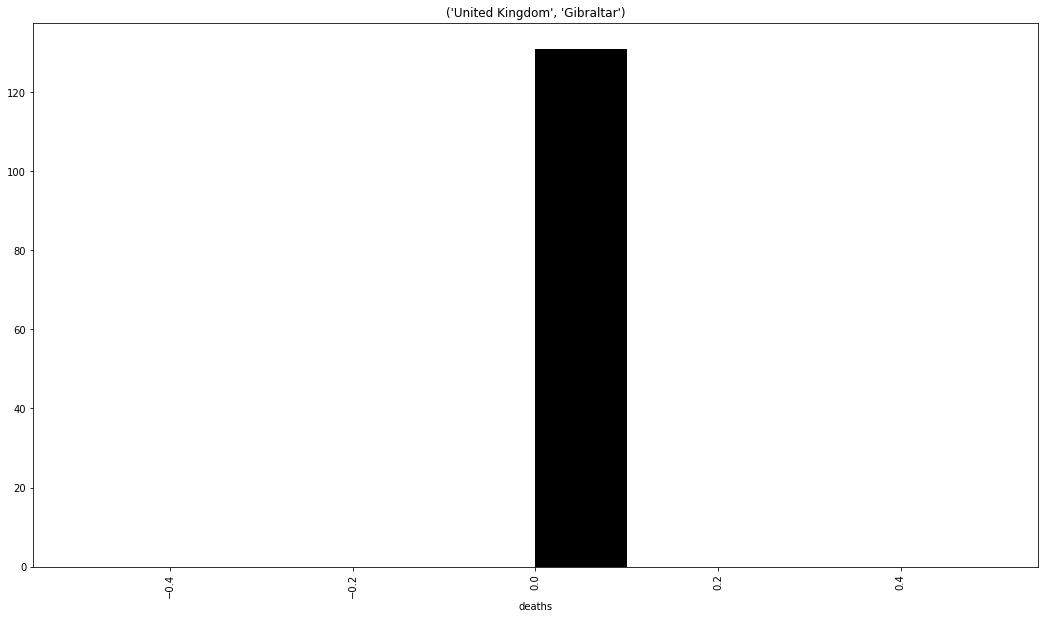

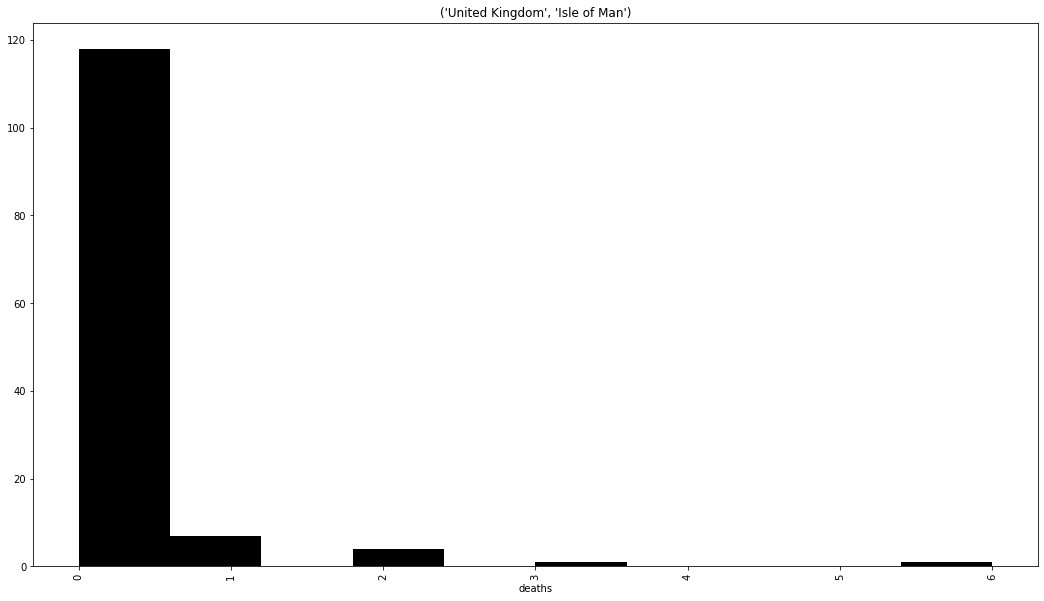

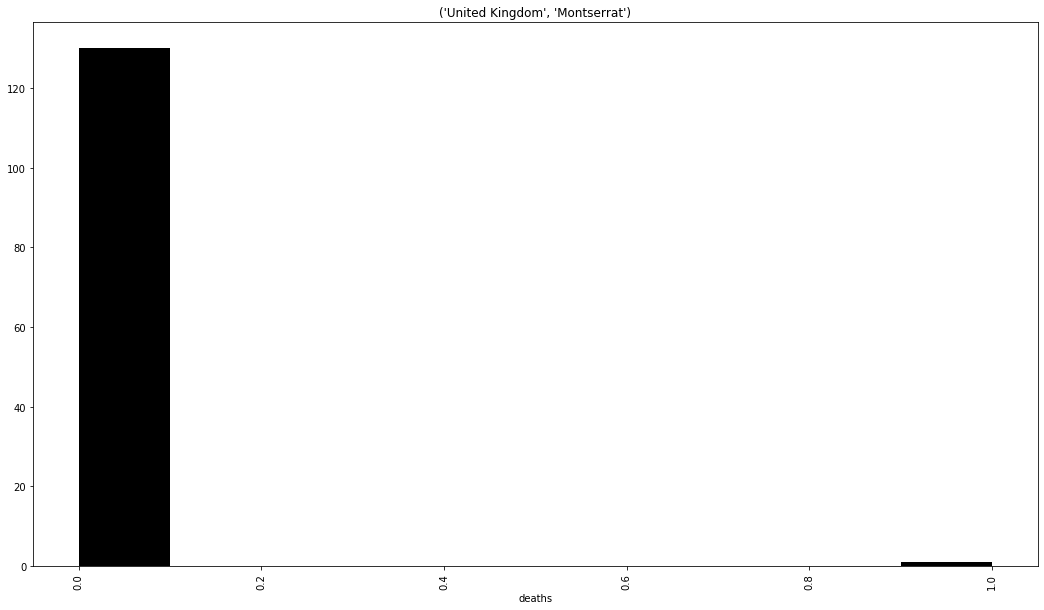

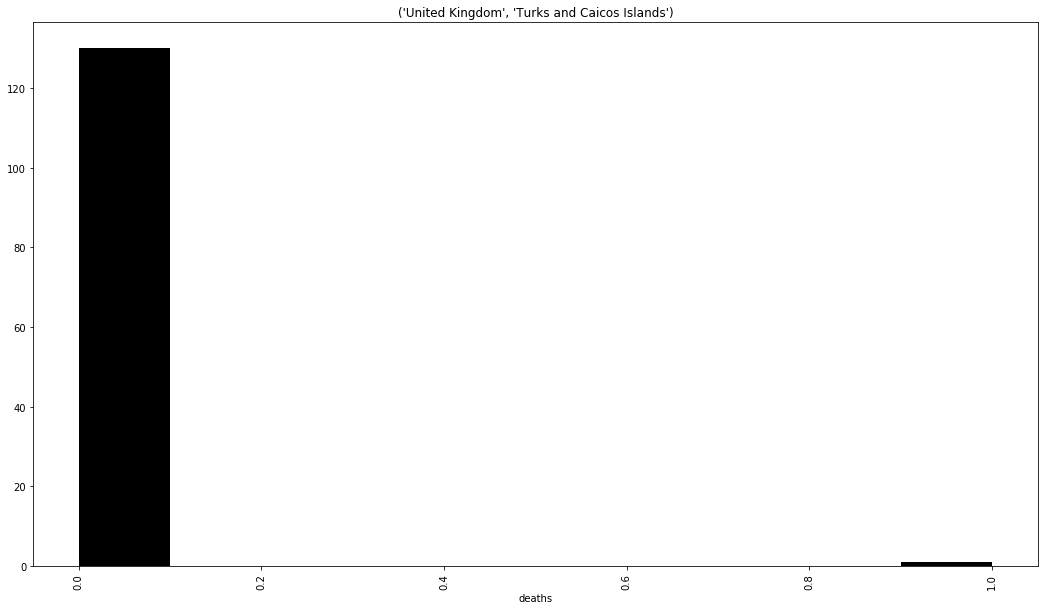

In [21]:
for i in idx:
    plt.figure(figsize=(18,10))
    plt.hist(main_deathst.loc[:,i][2:],color = 'black')
    plt.xticks(rotation=90);
    plt.xlabel('deaths')
    plt.title(i);

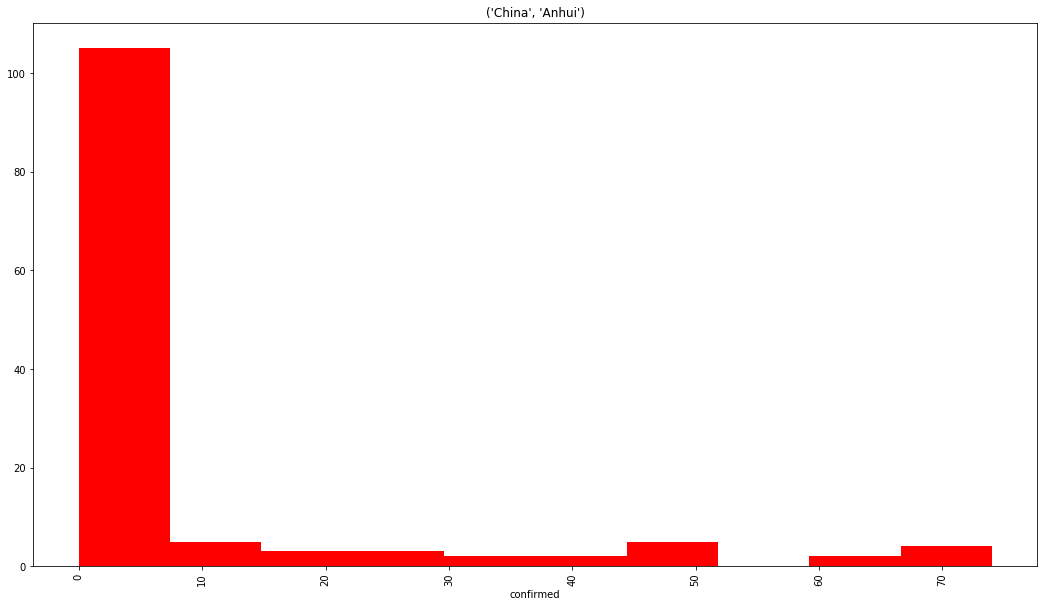

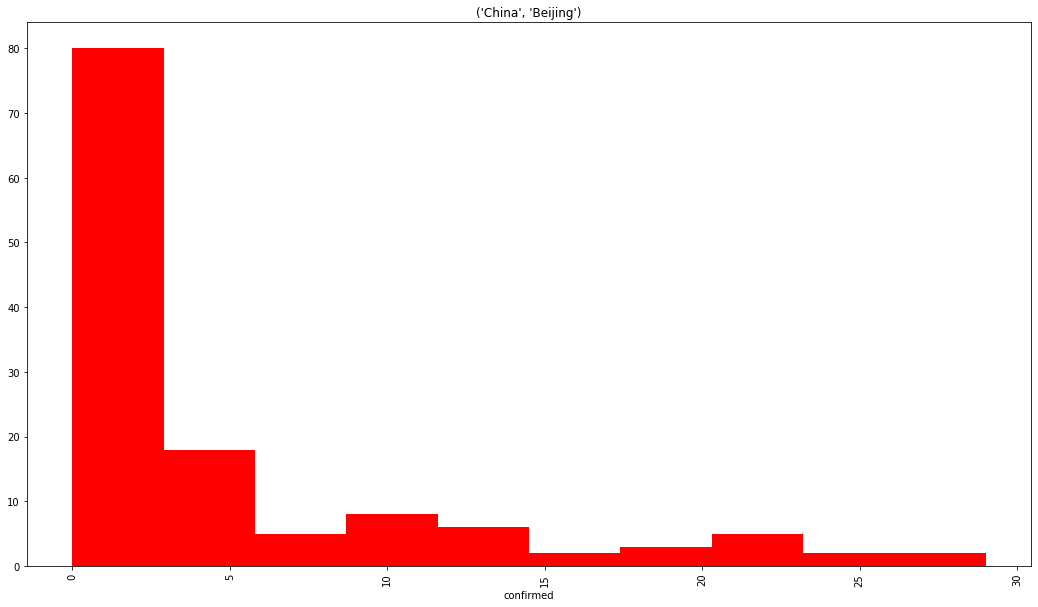

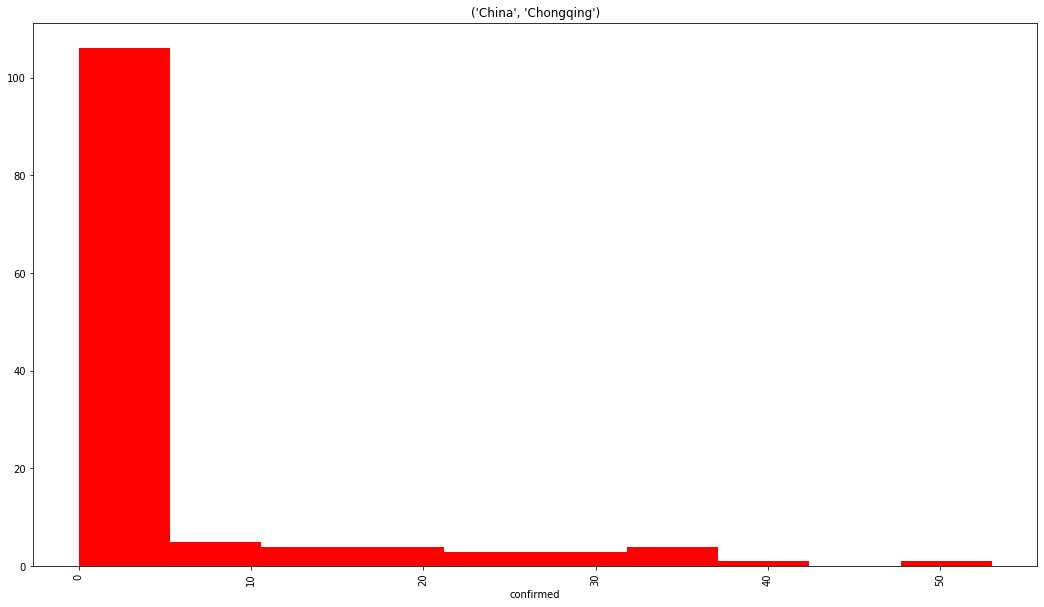

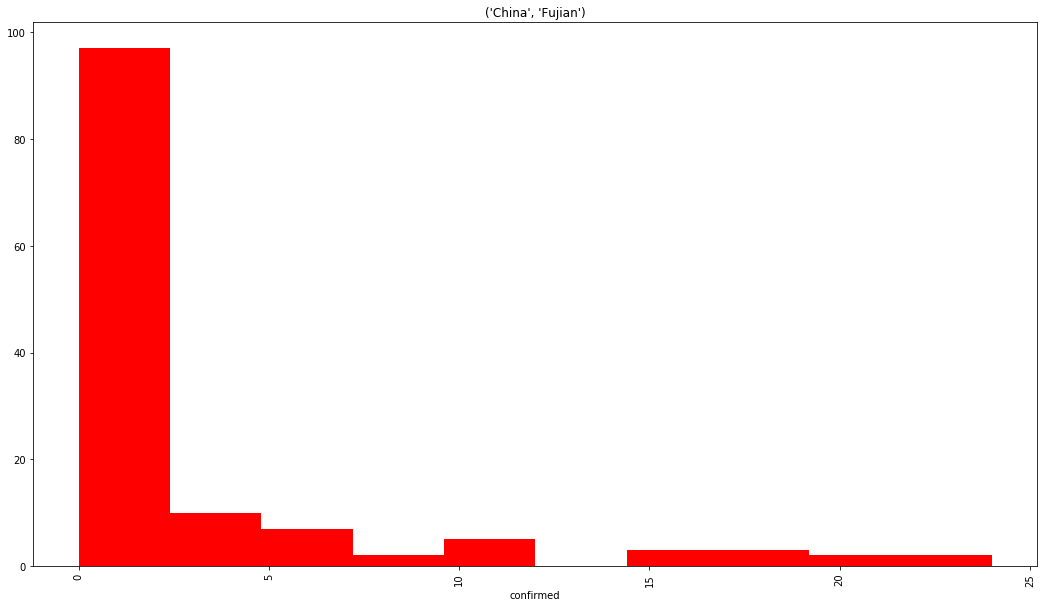

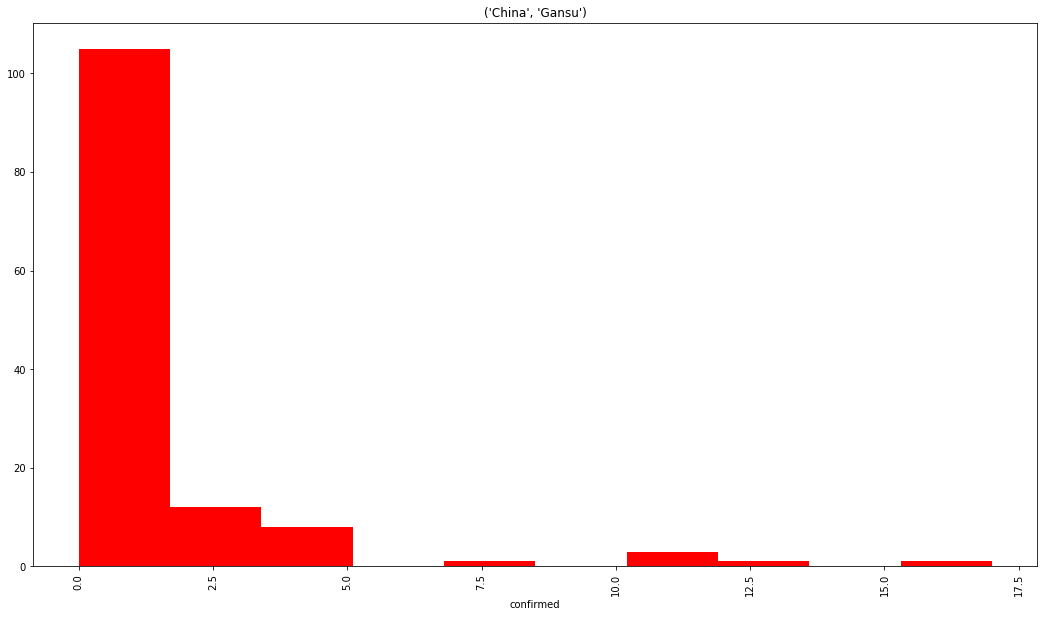

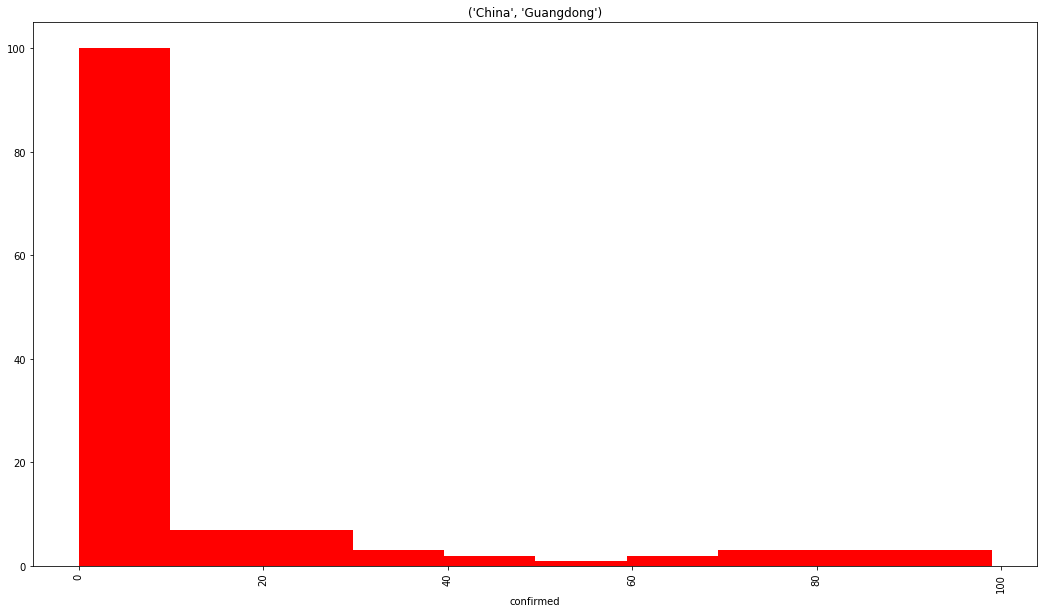

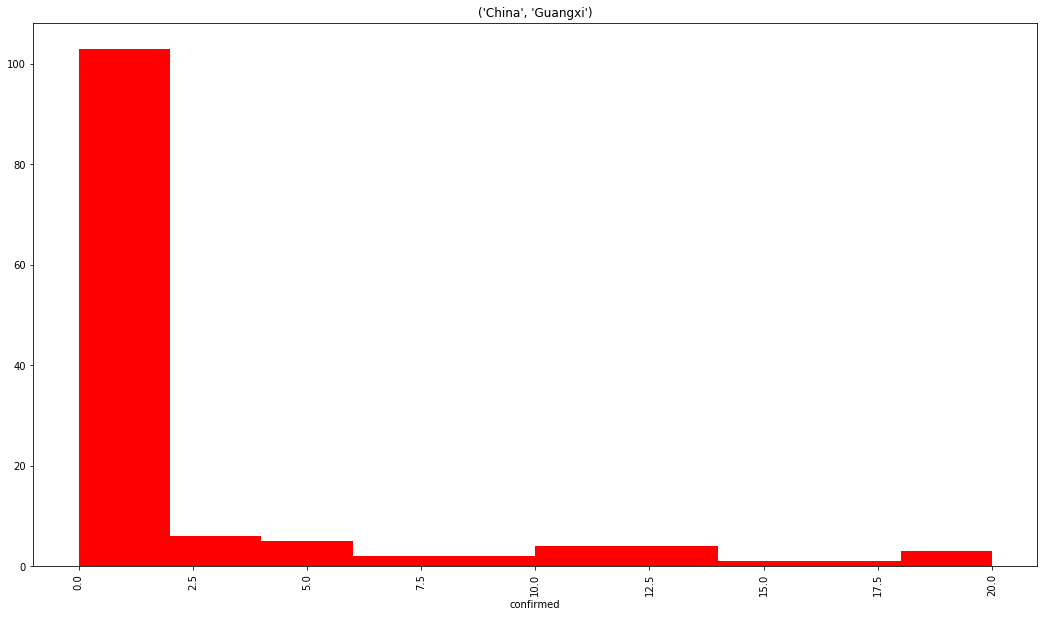

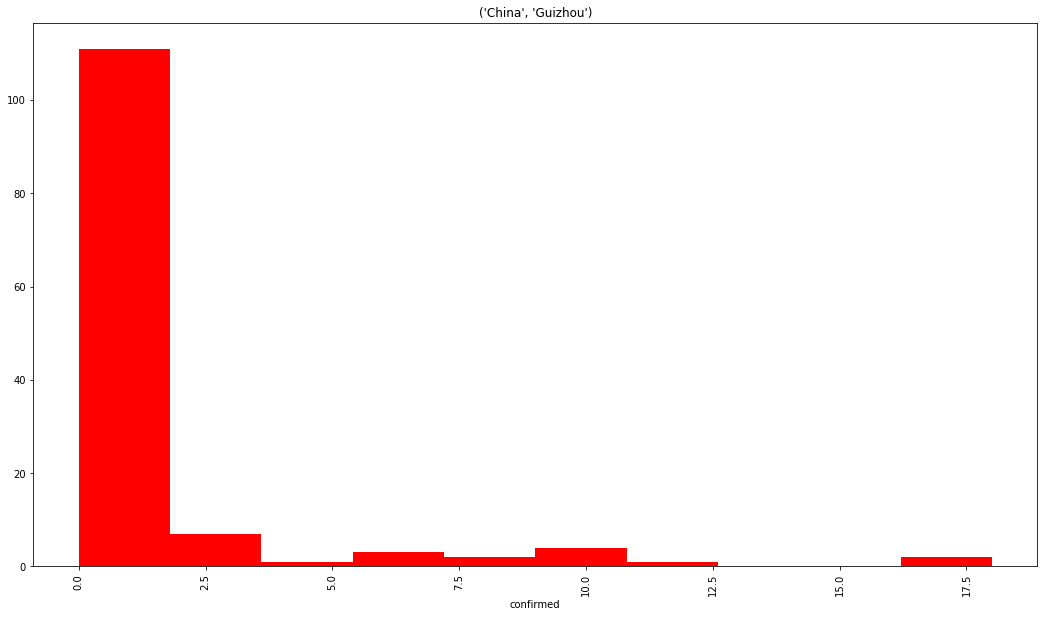

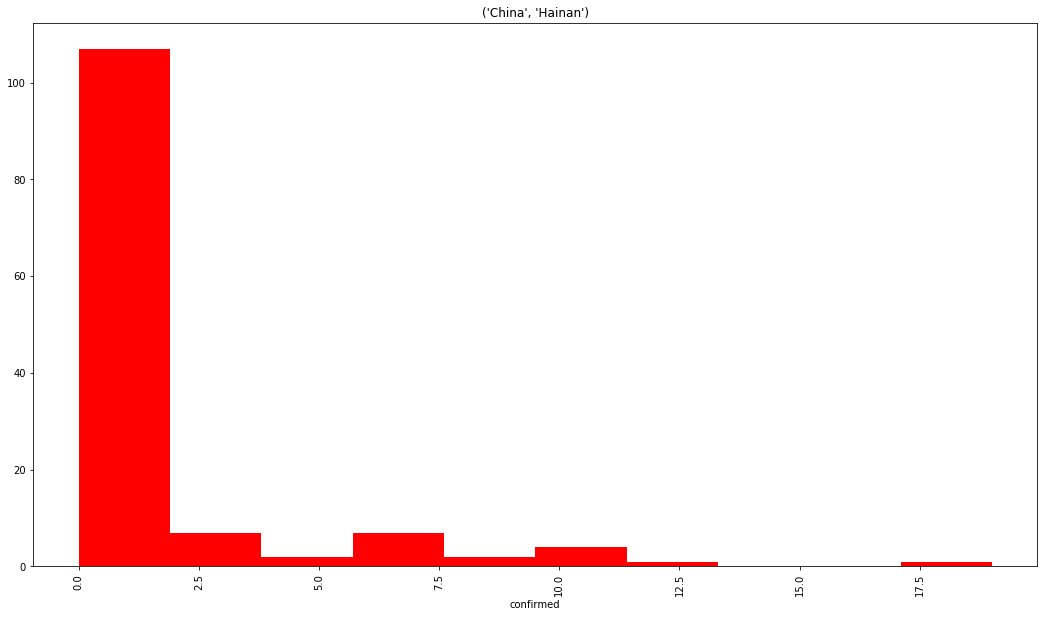

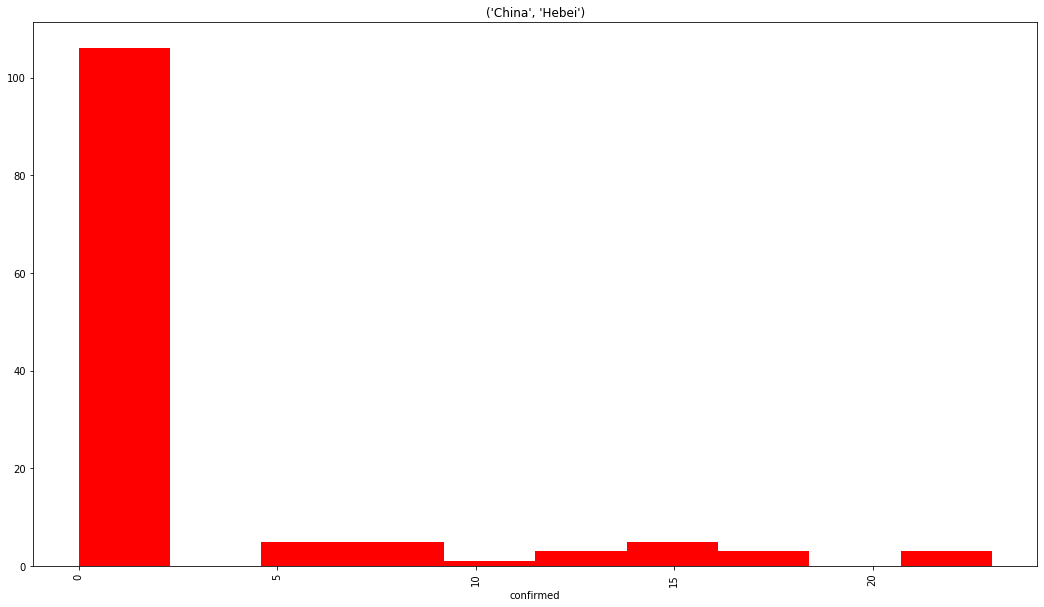

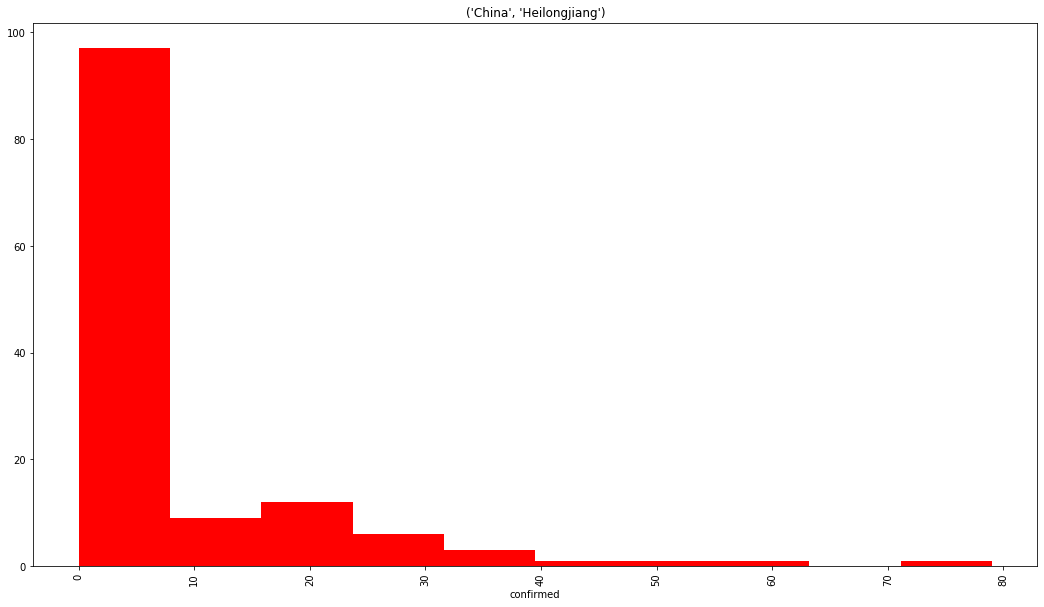

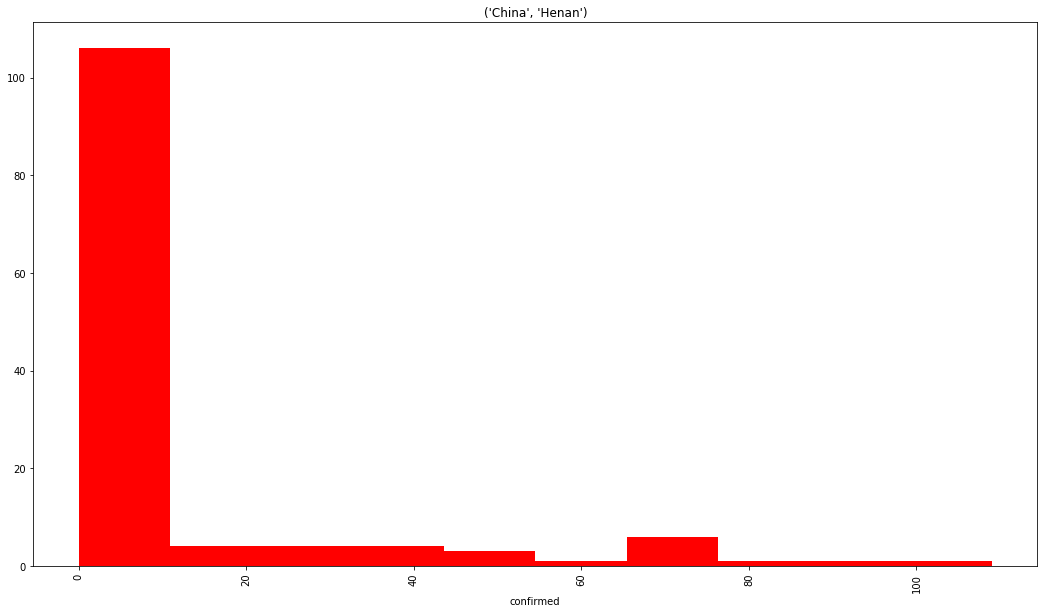

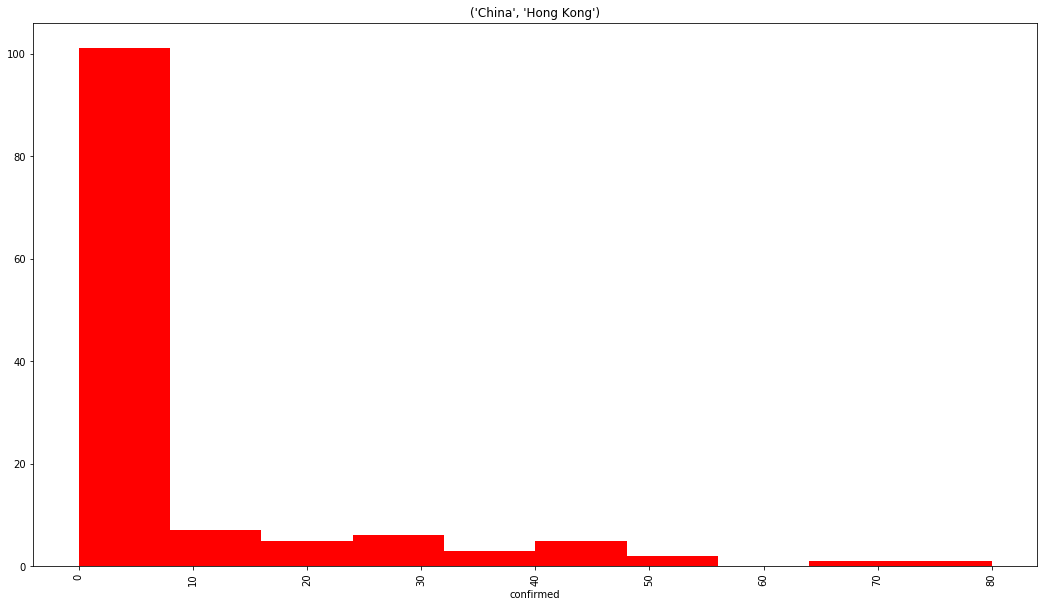

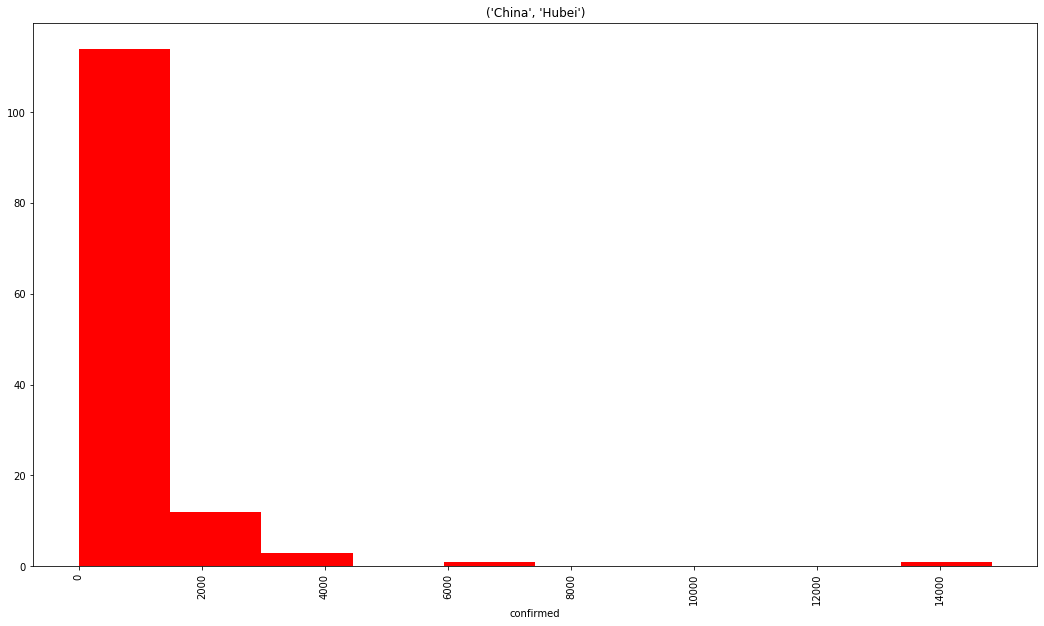

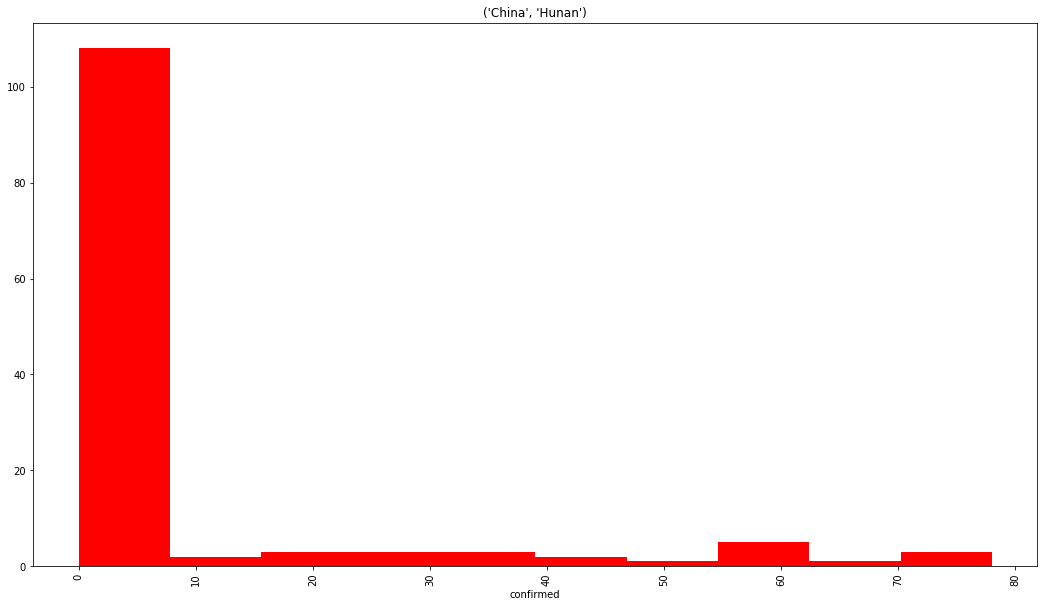

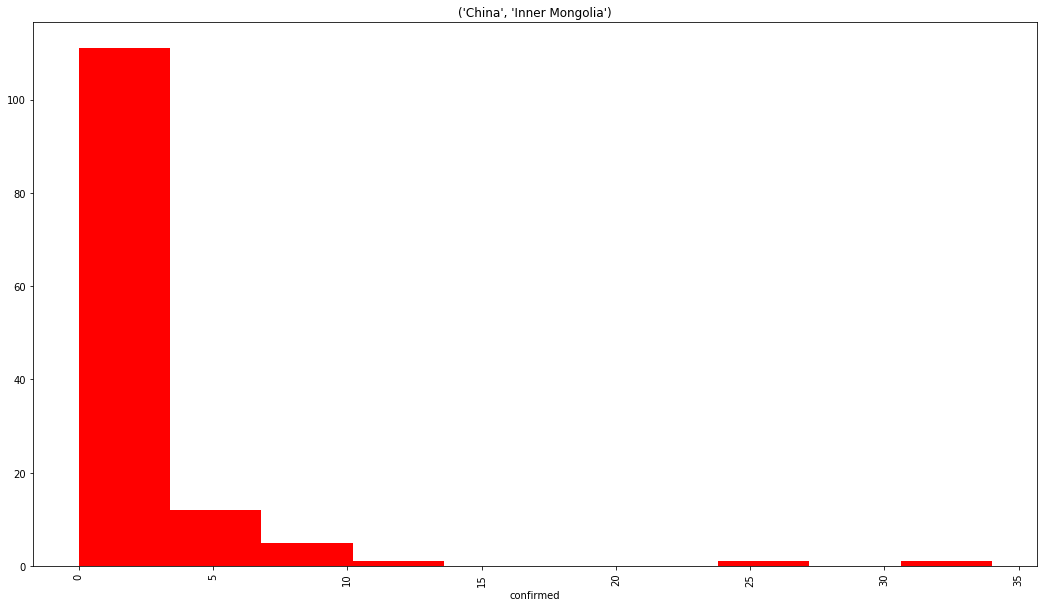

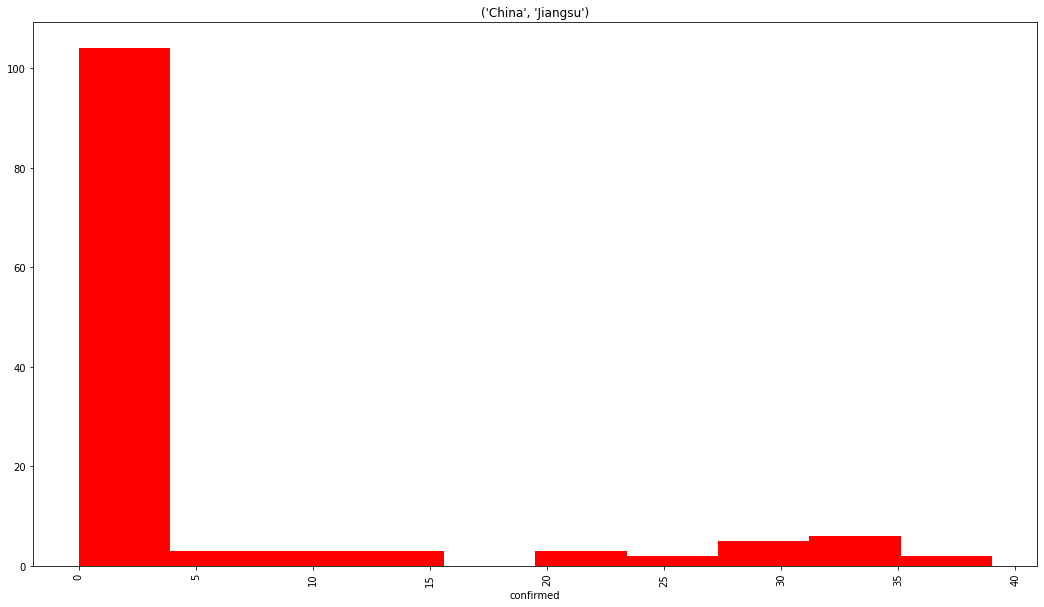

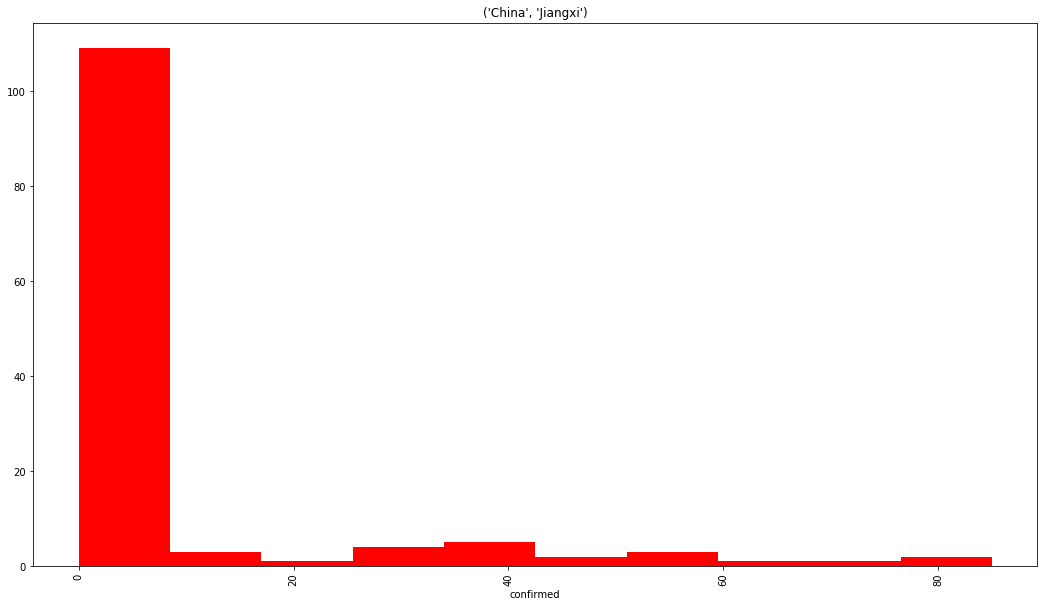

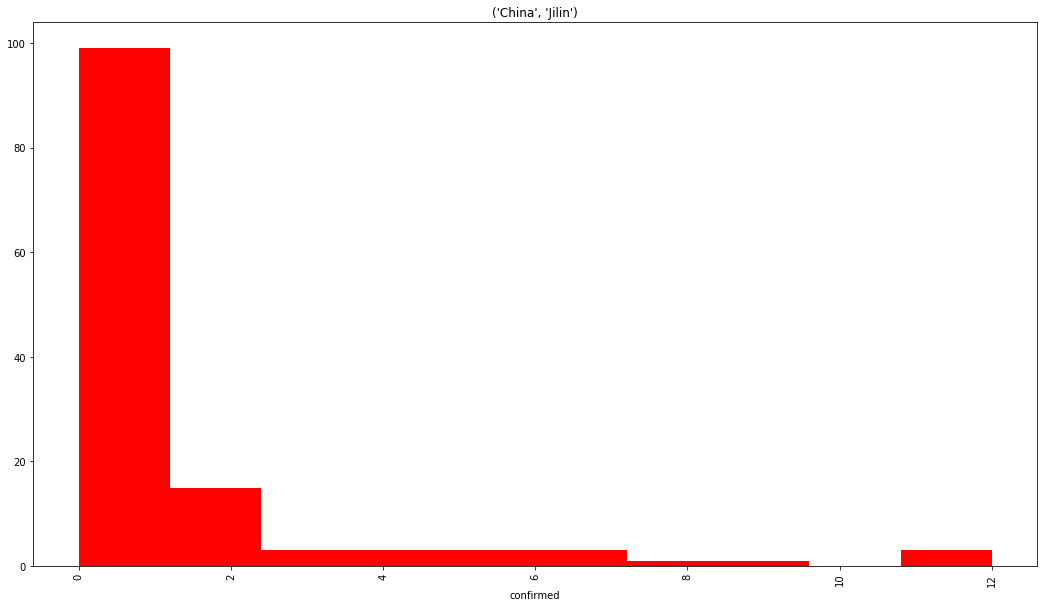

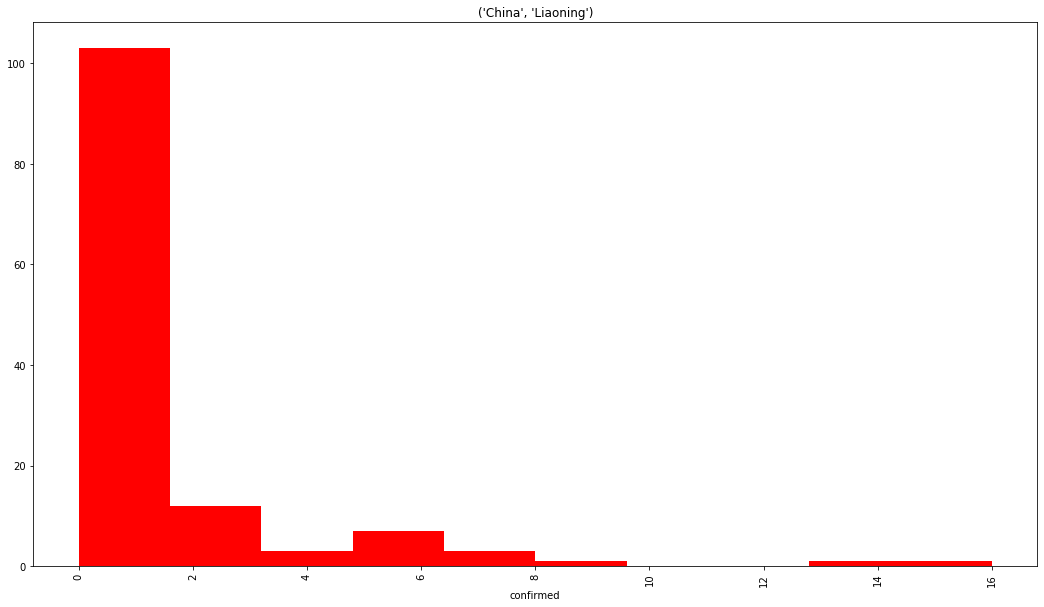

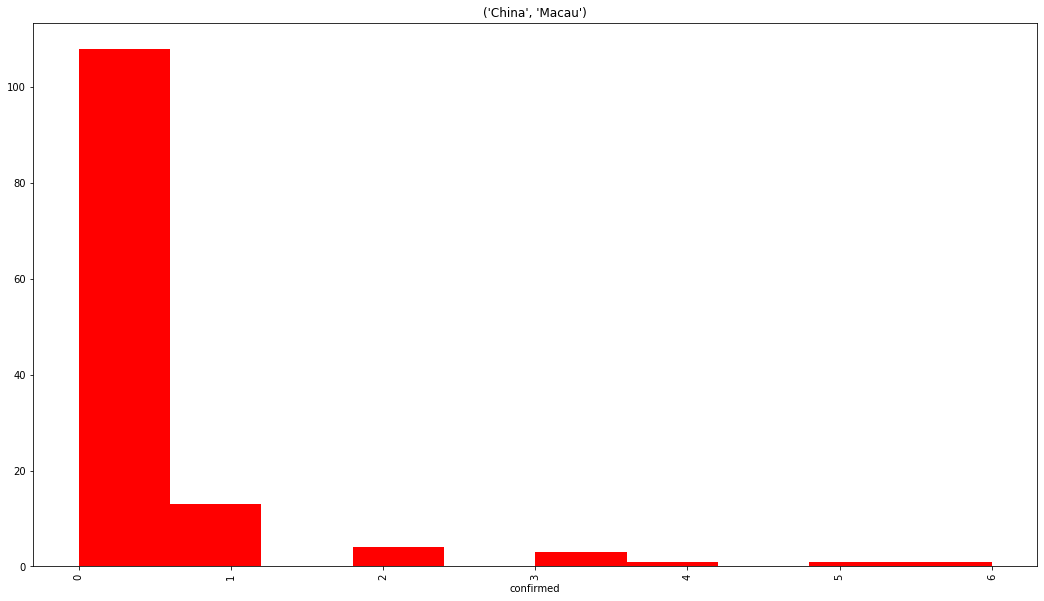

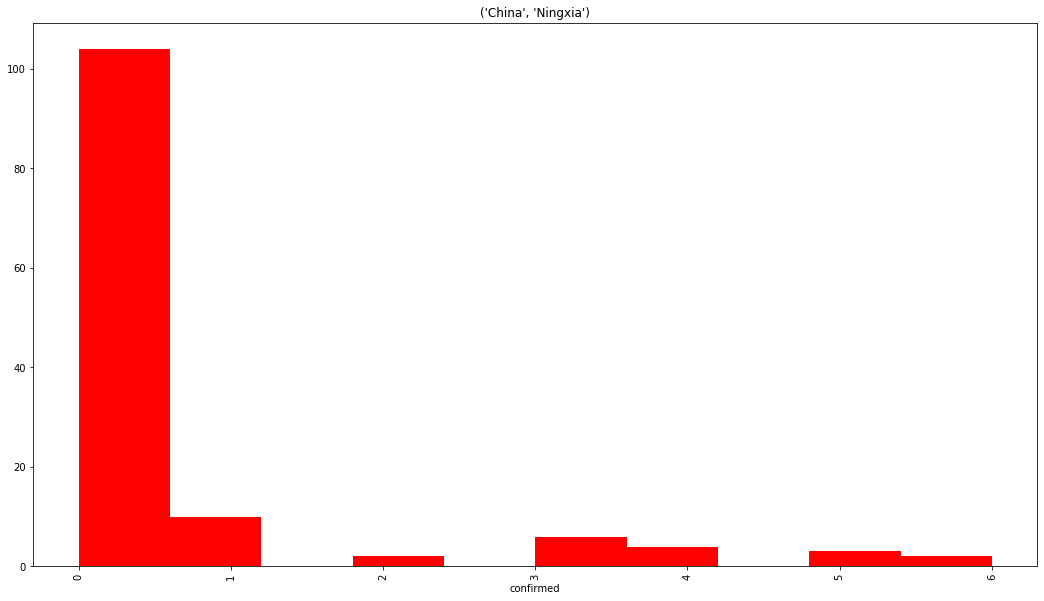

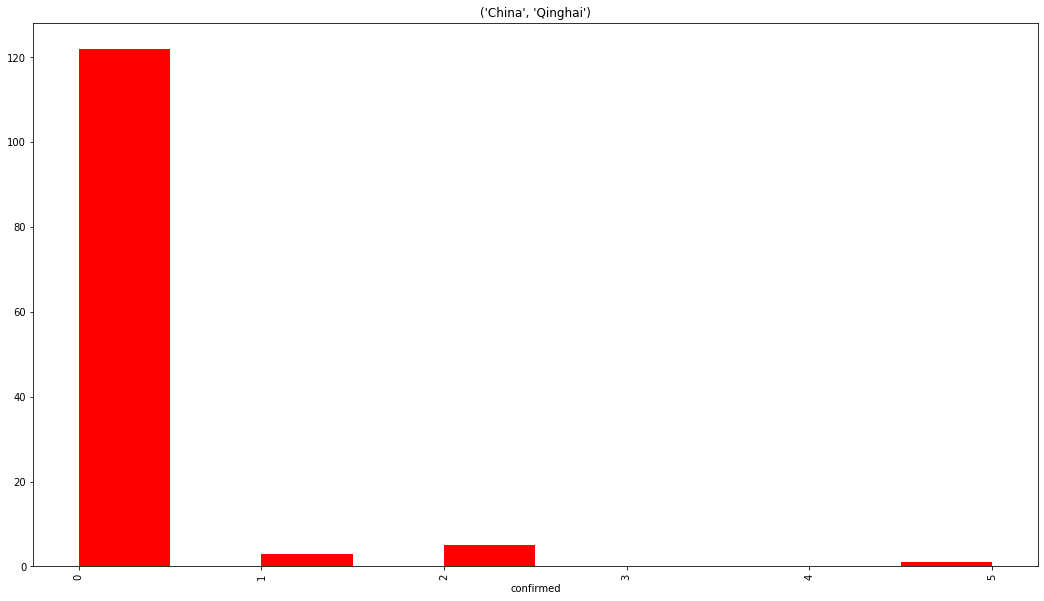

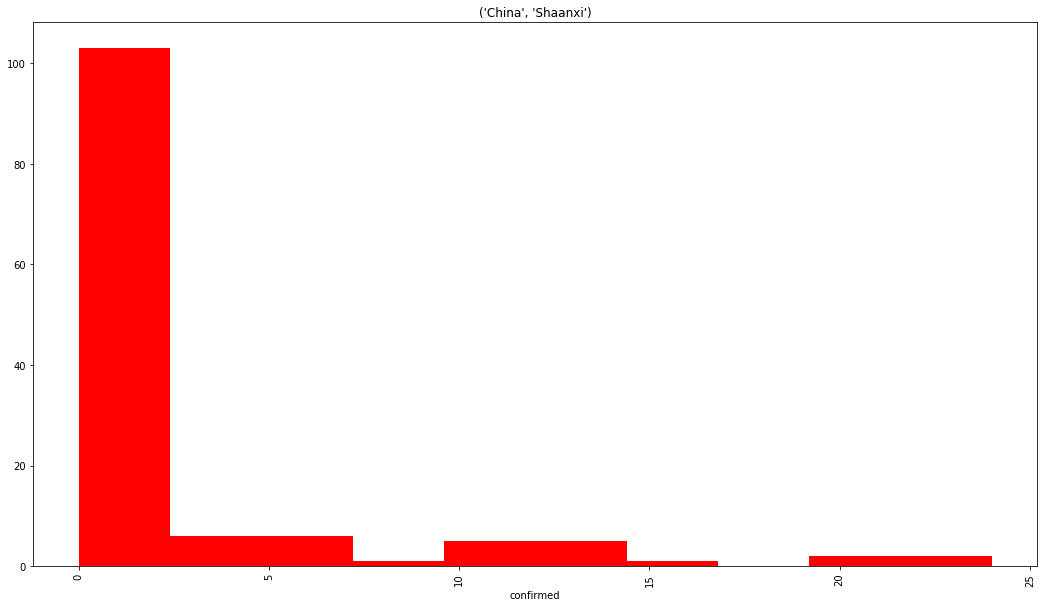

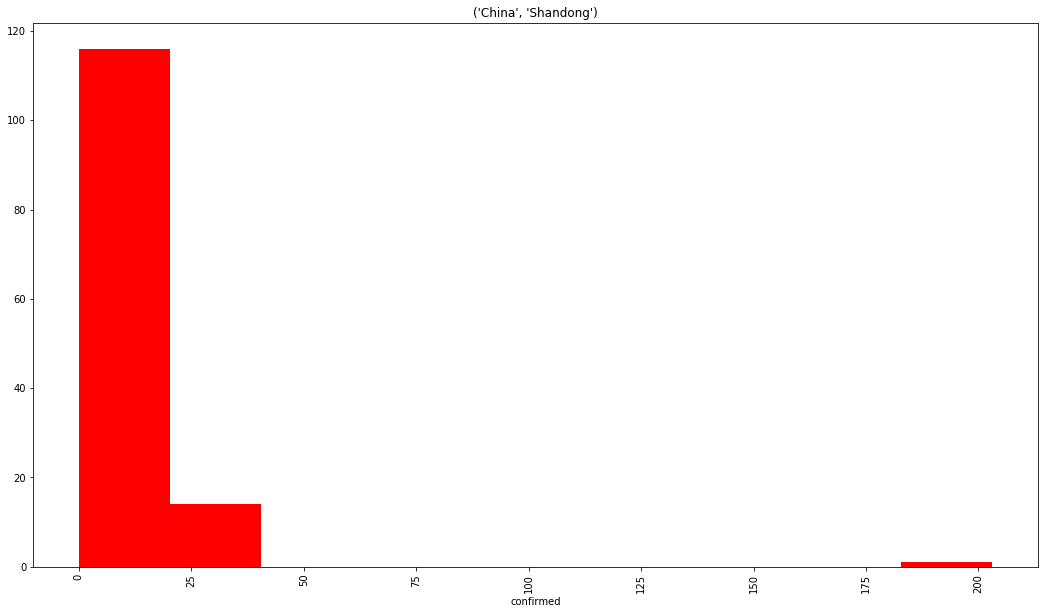

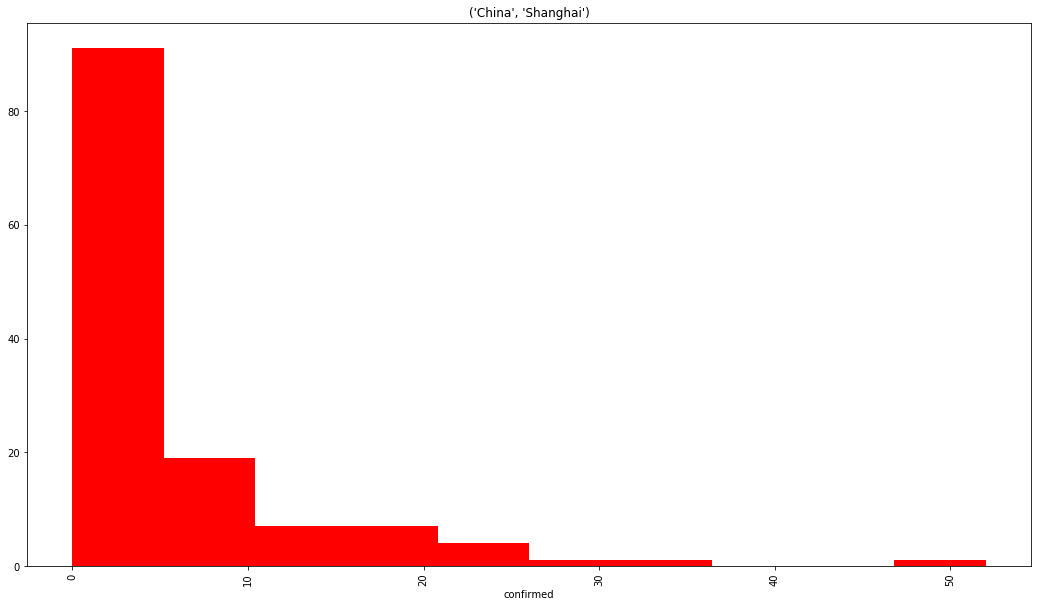

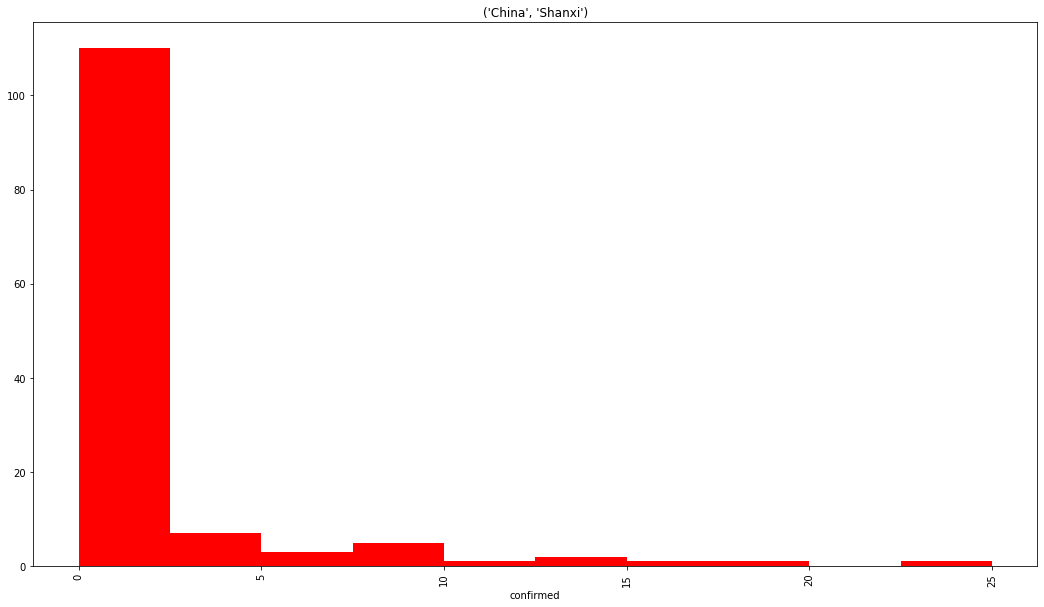

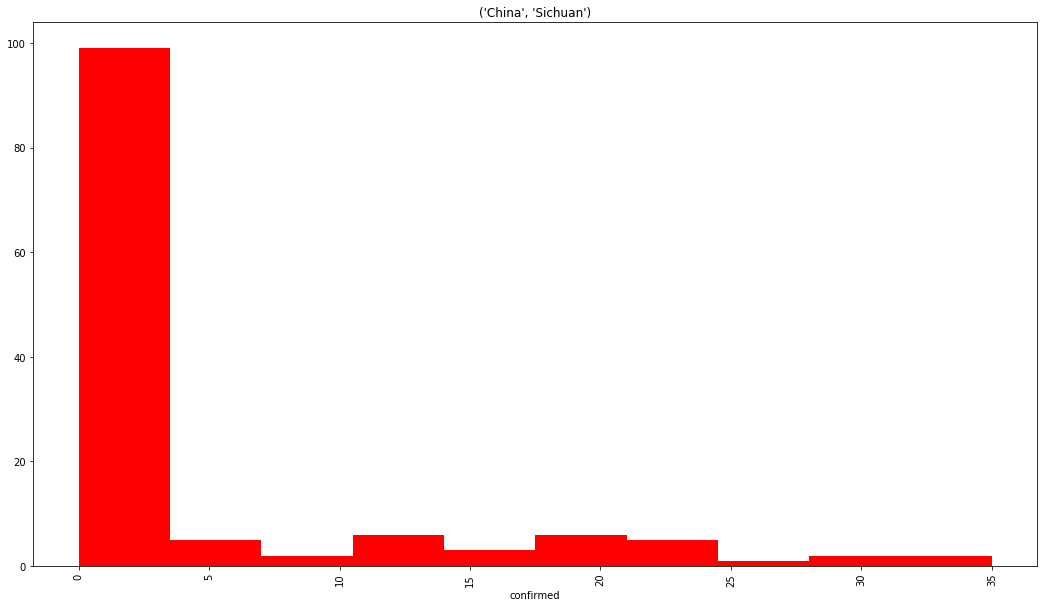

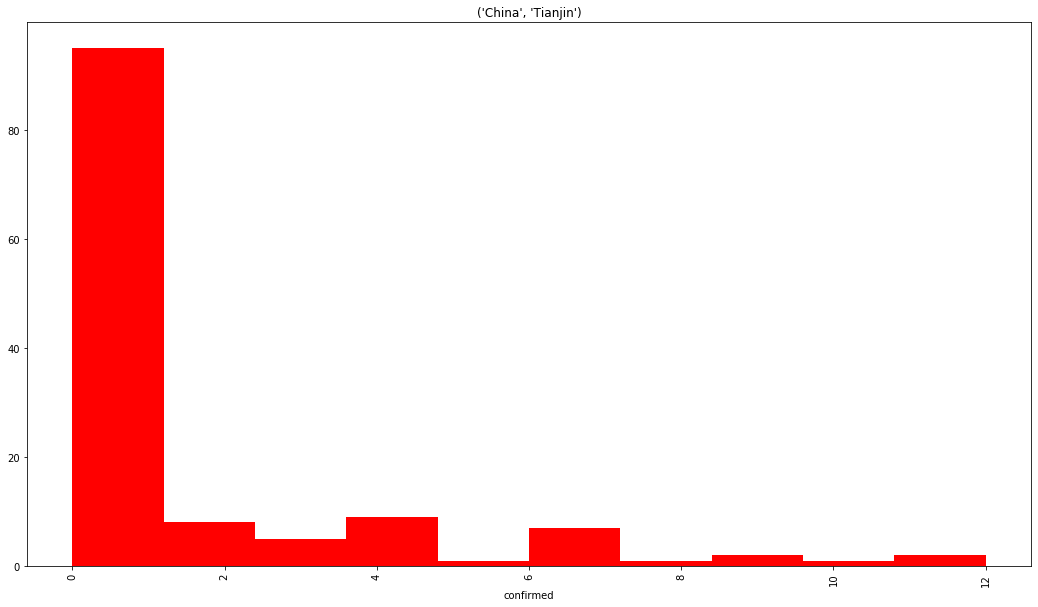

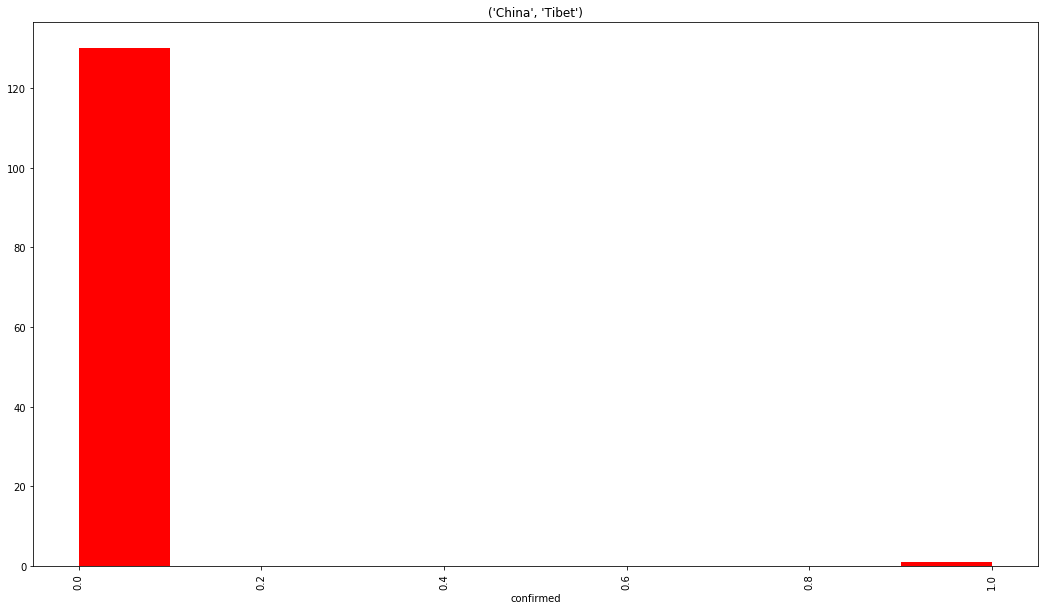

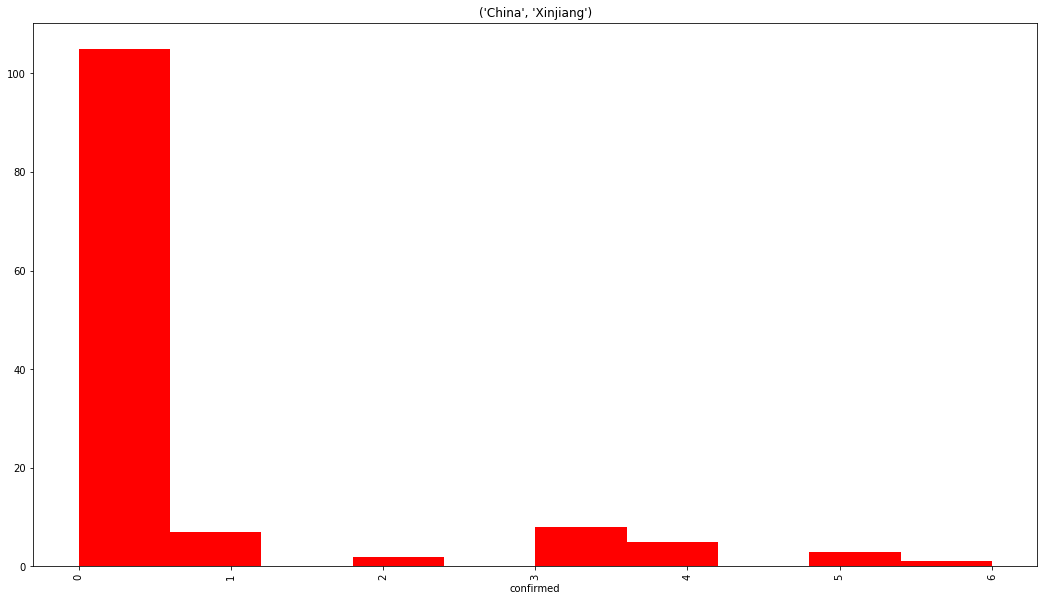

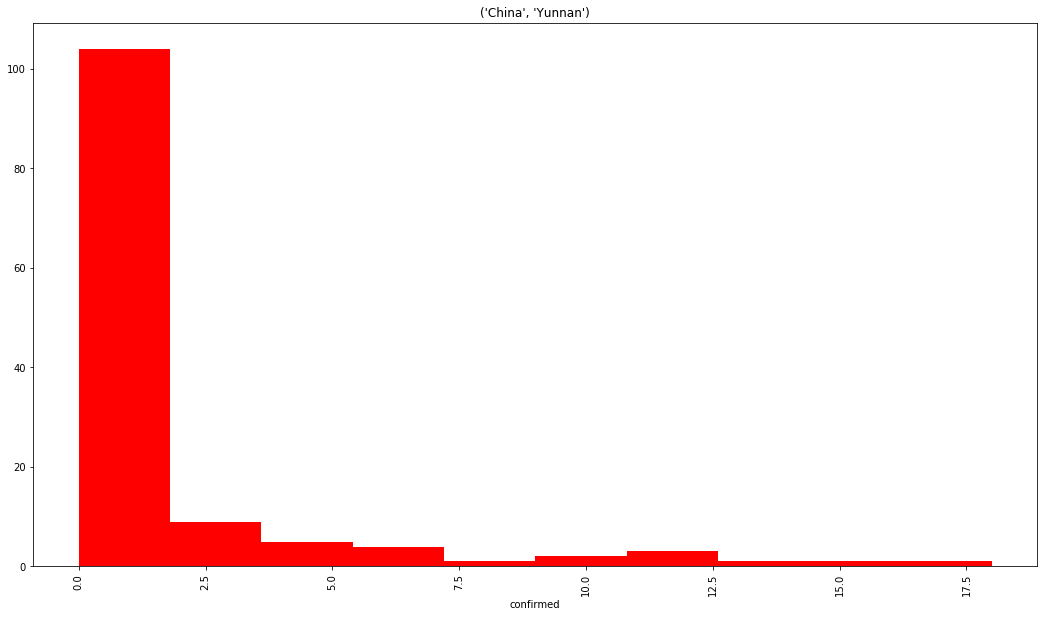

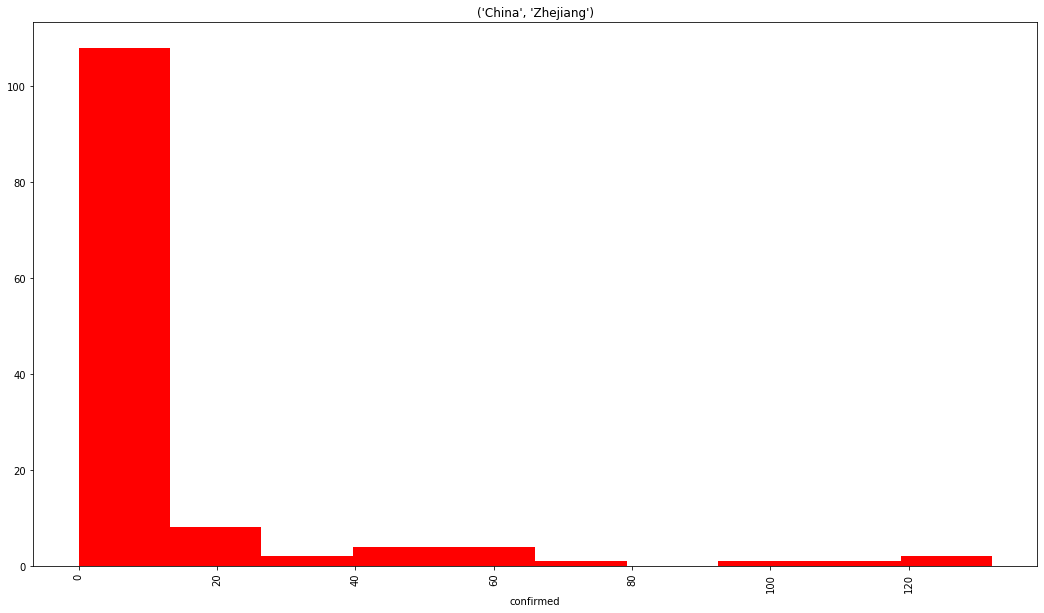

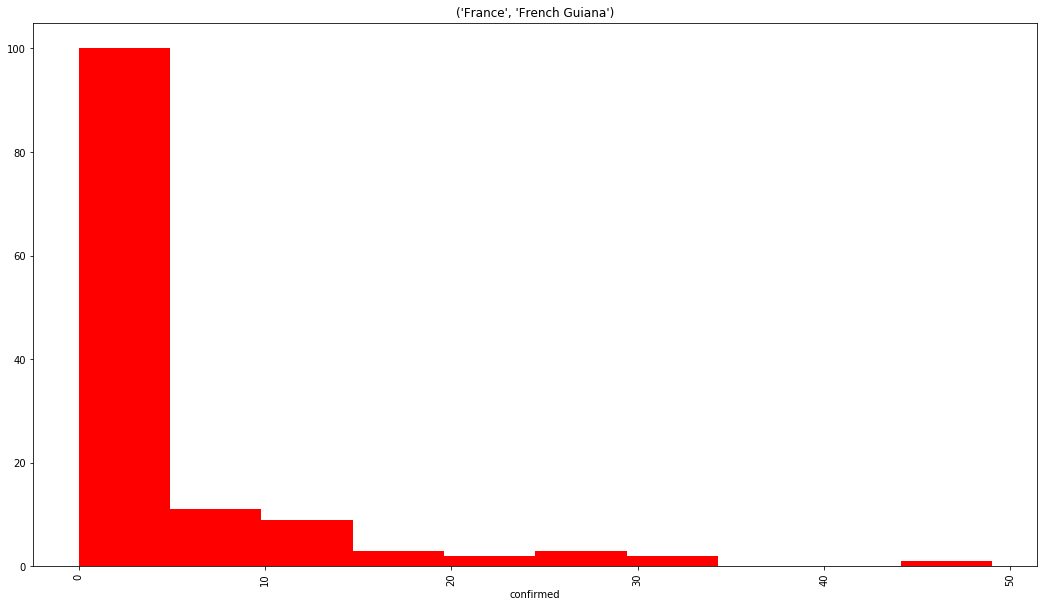

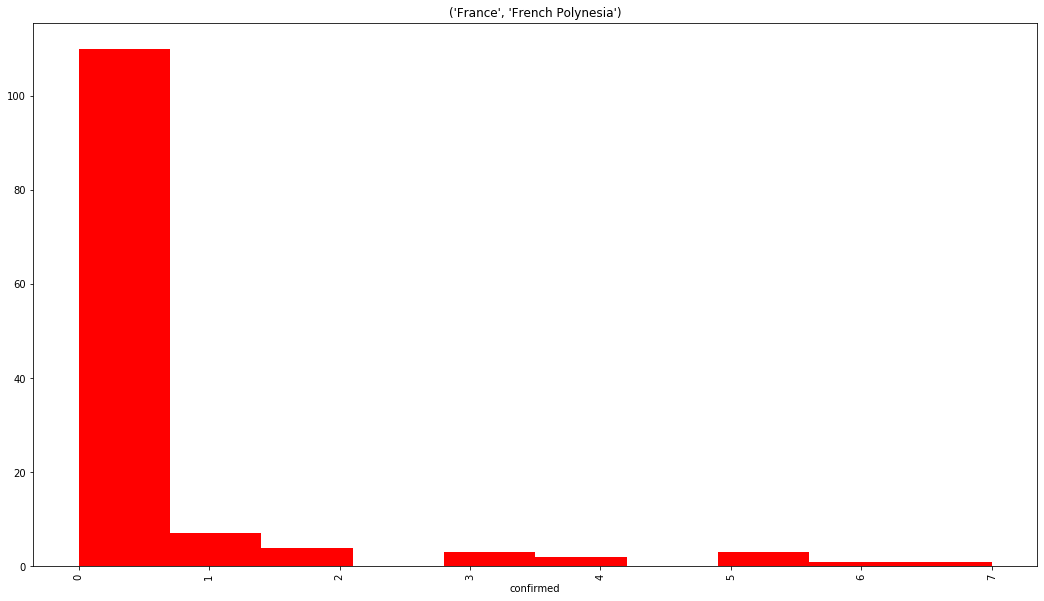

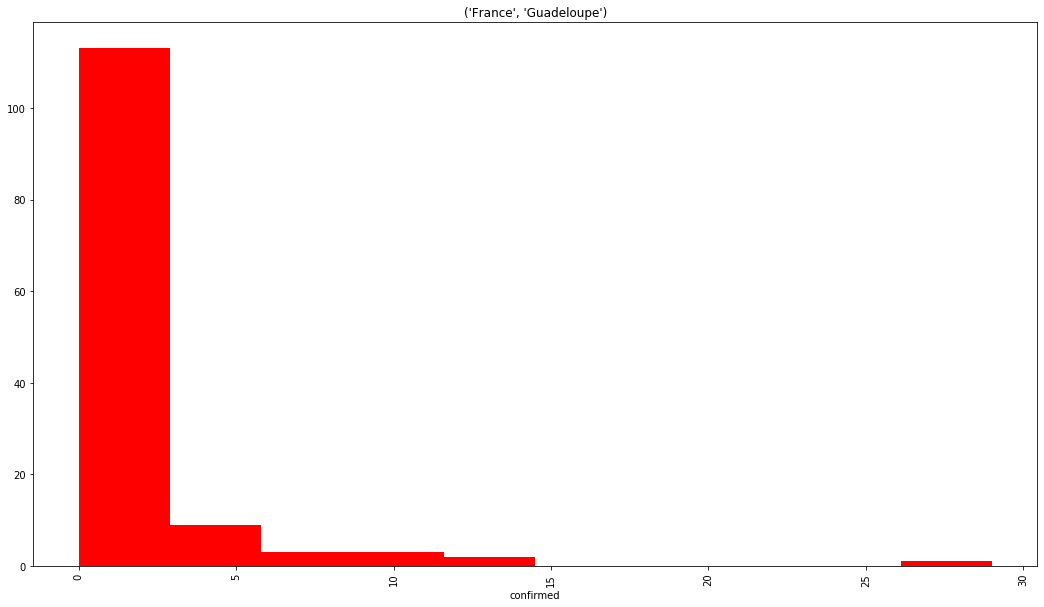

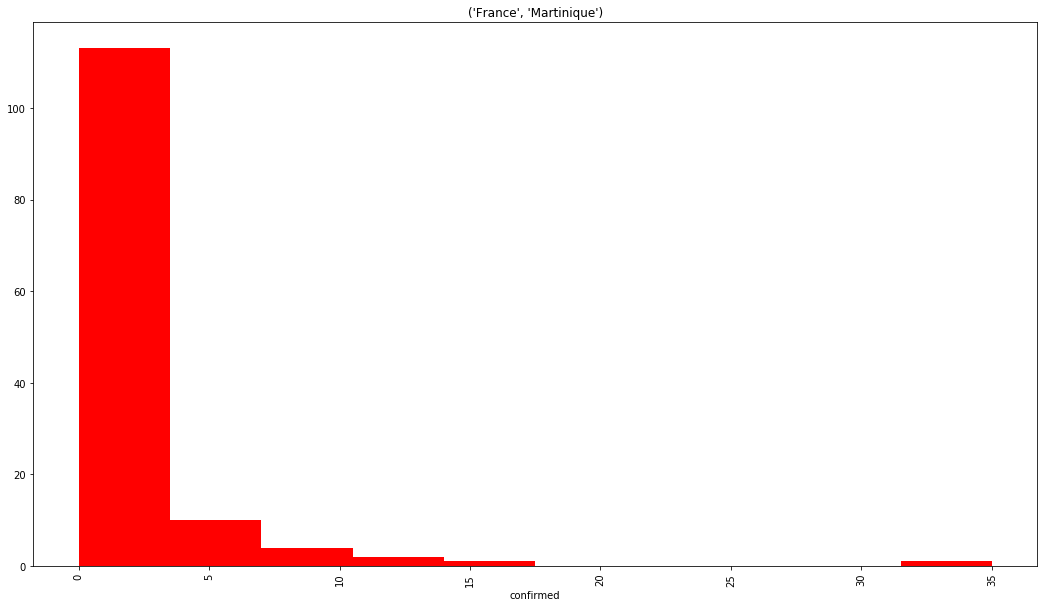

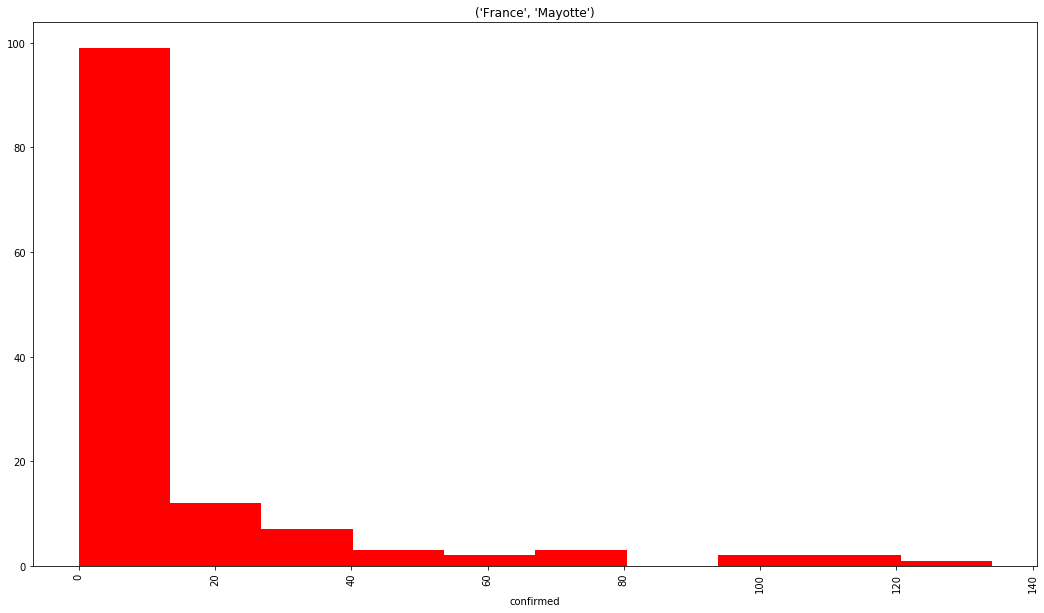

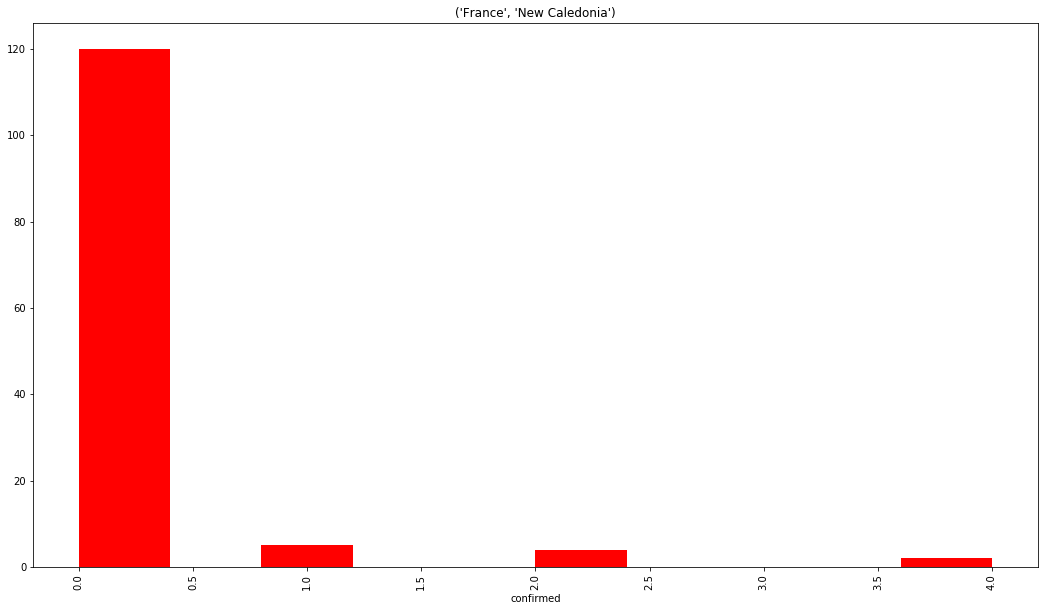

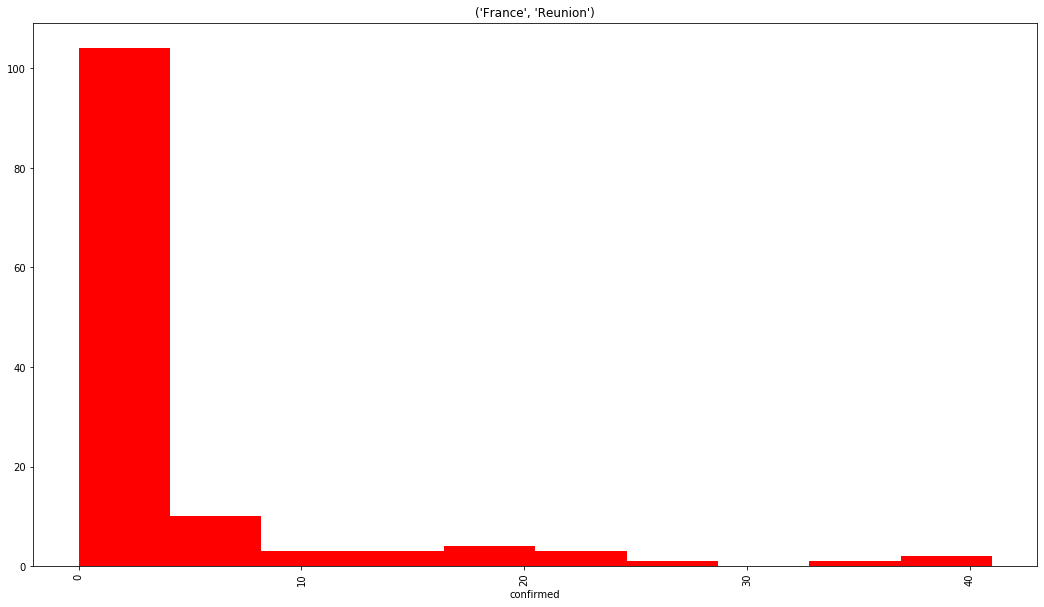

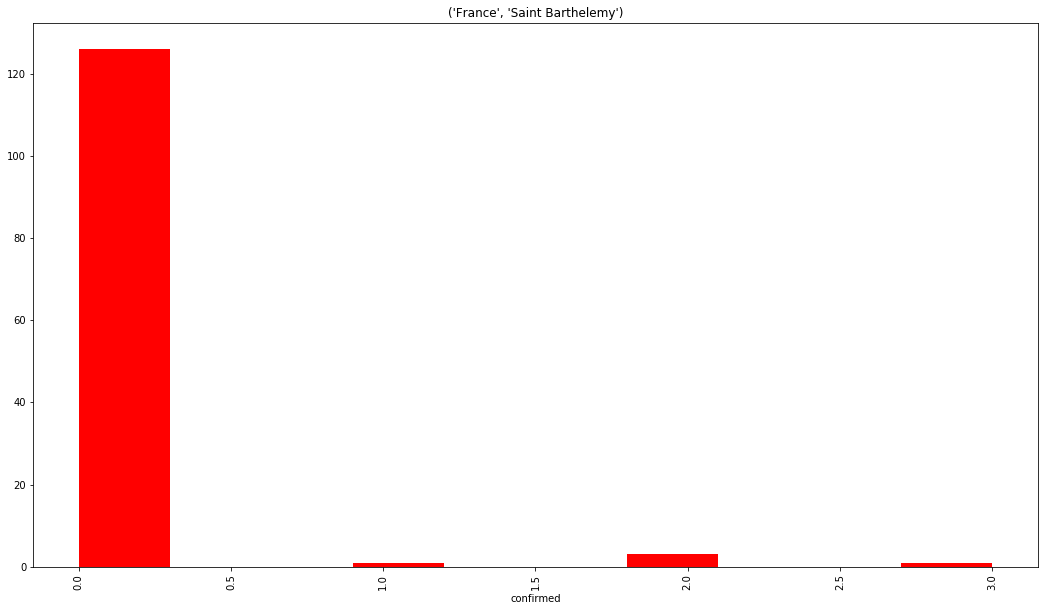

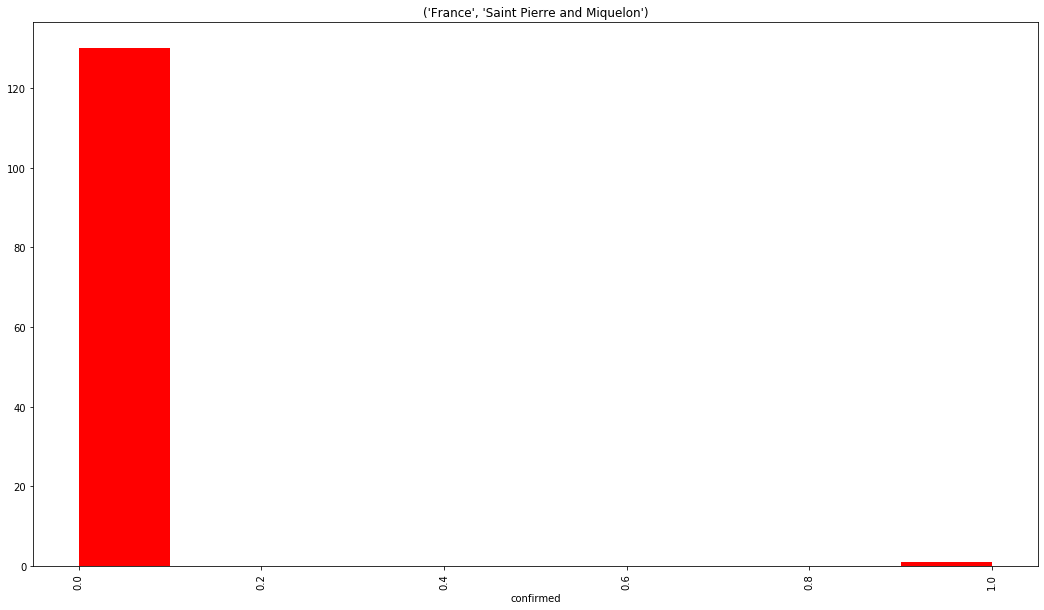

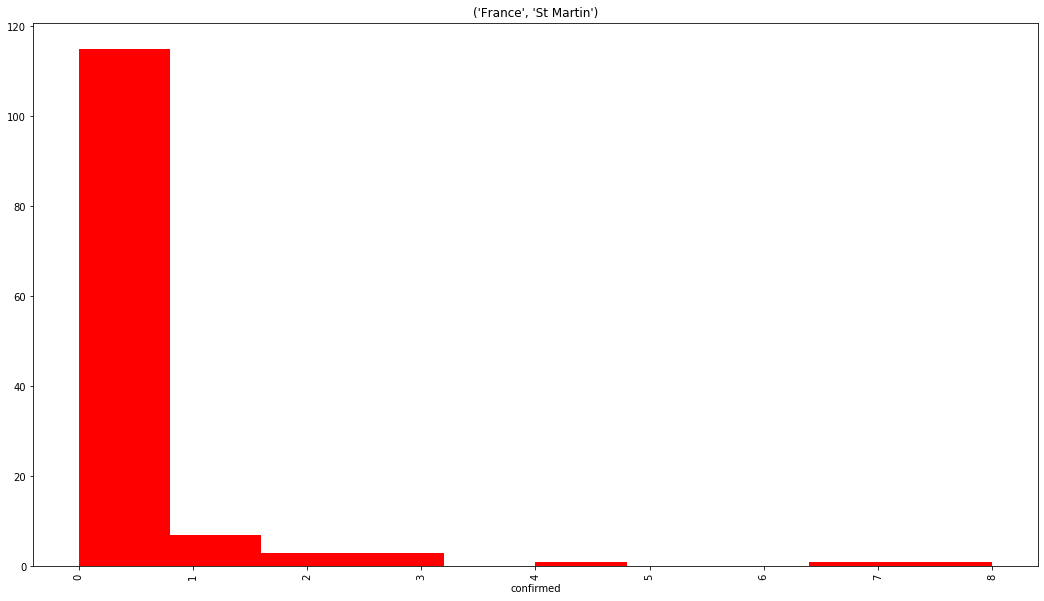

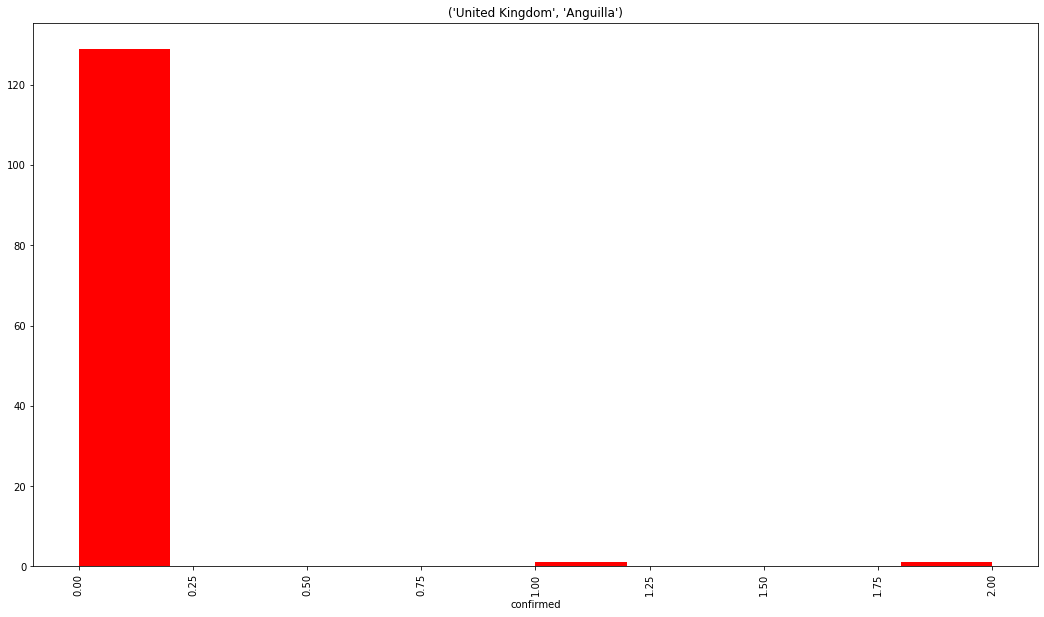

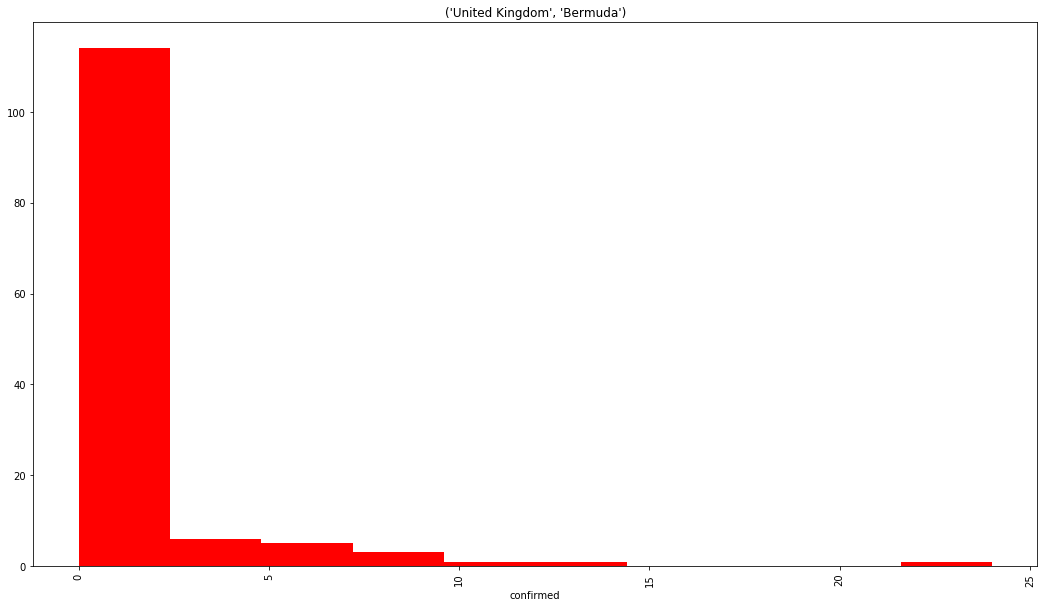

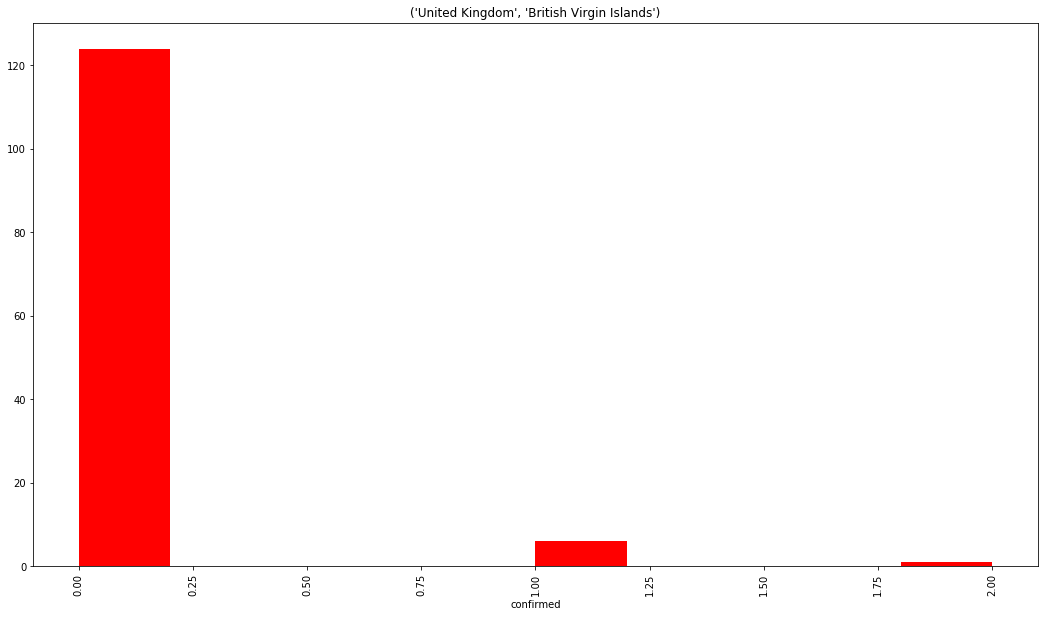

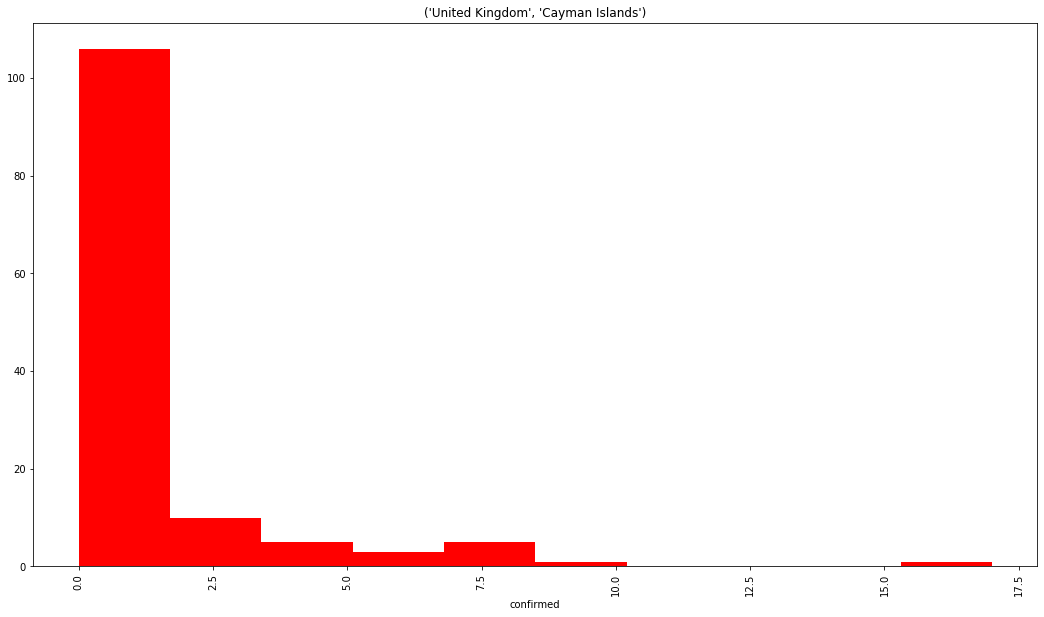

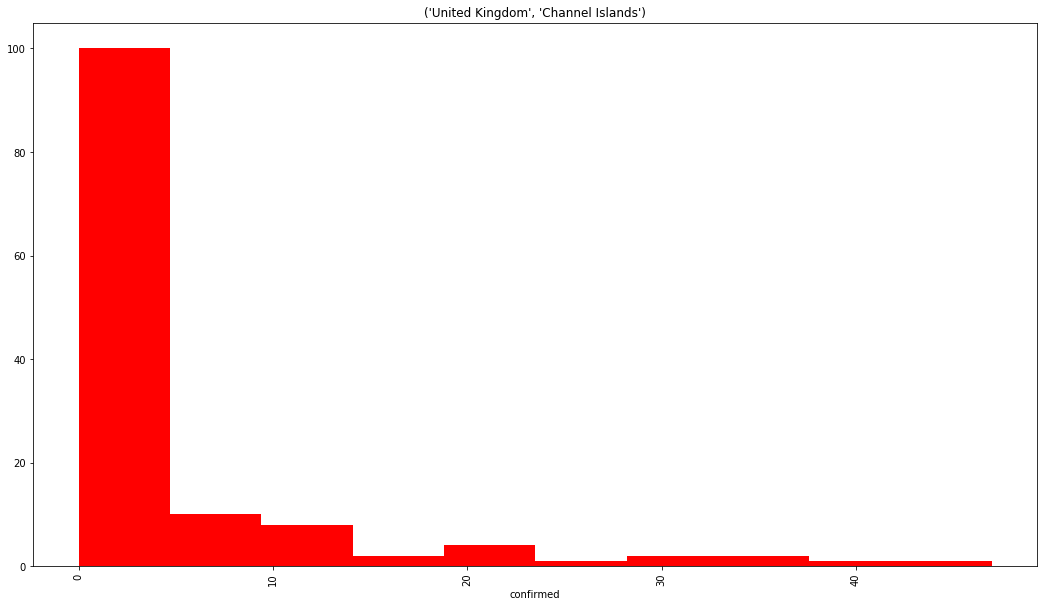

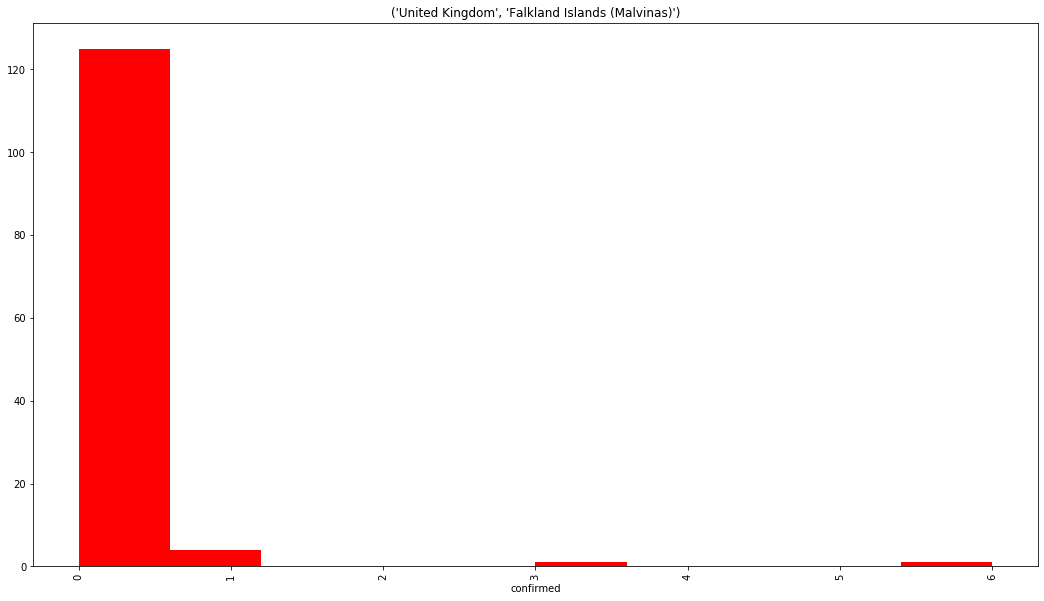

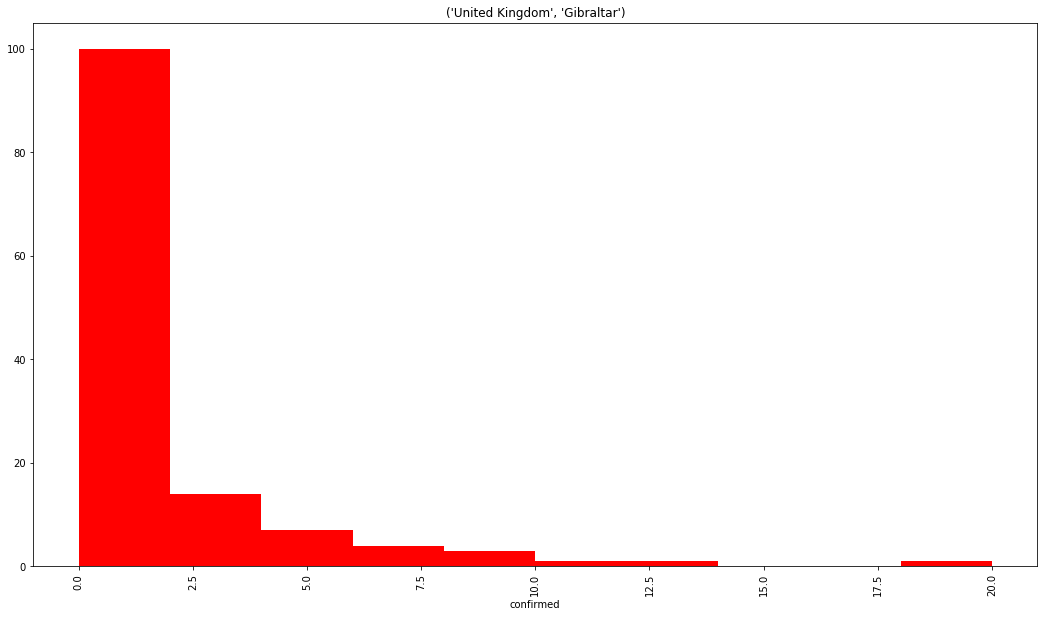

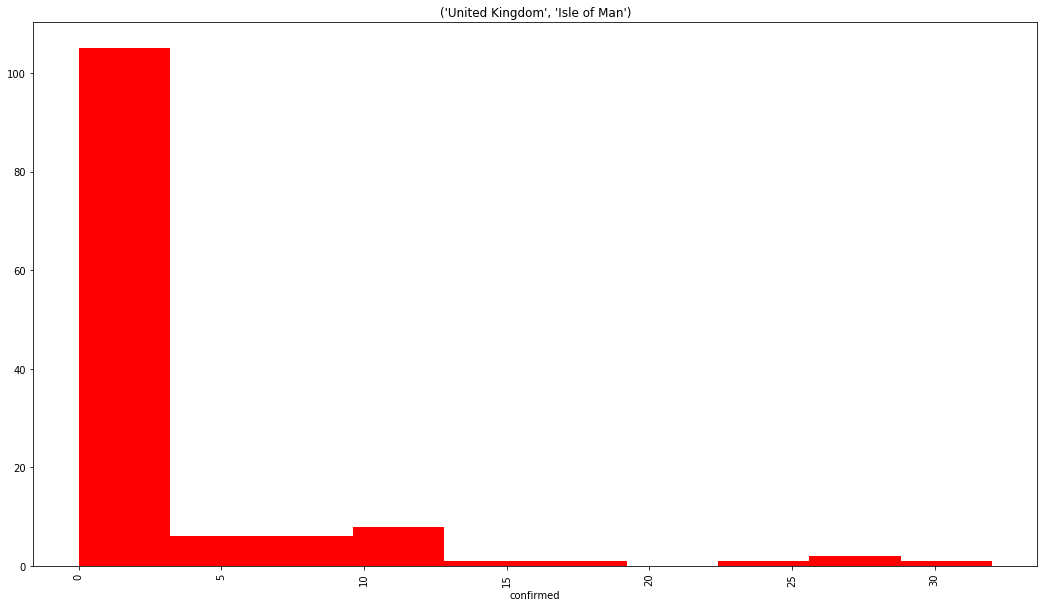

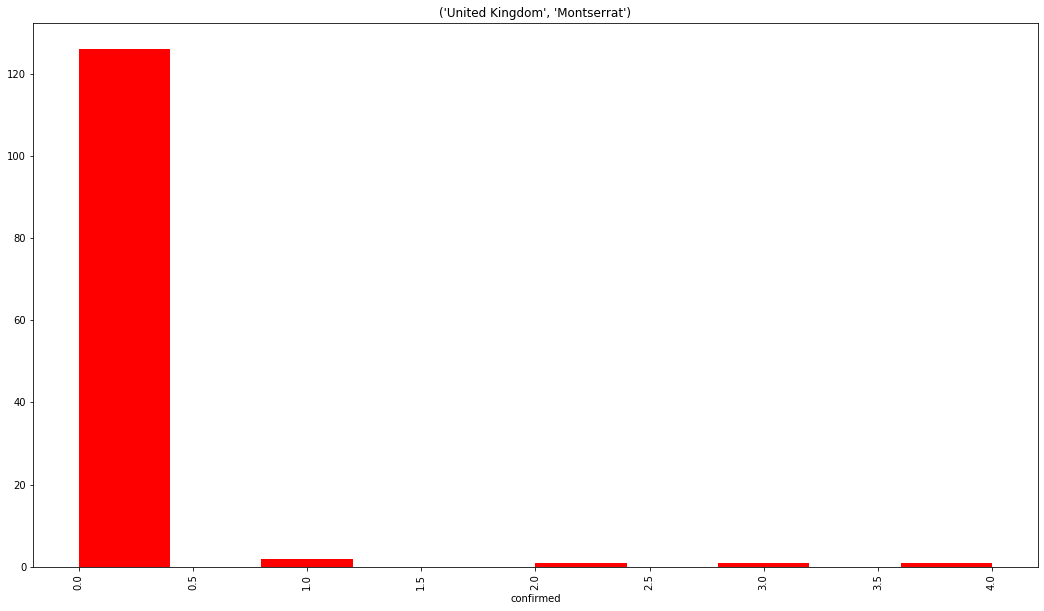

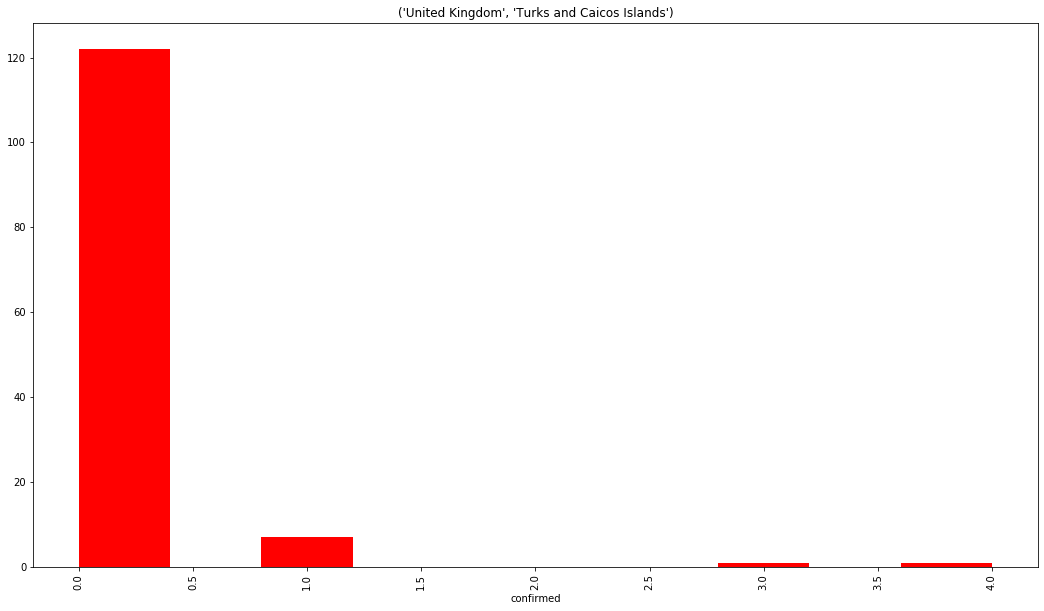

In [22]:
for i in idx:
    plt.figure(figsize=(18,10))
    plt.hist(main_confirmedt.loc[:,i][2:],color = 'red')
    plt.xticks(rotation=90);
    plt.xlabel('confirmed')
    plt.title(i);

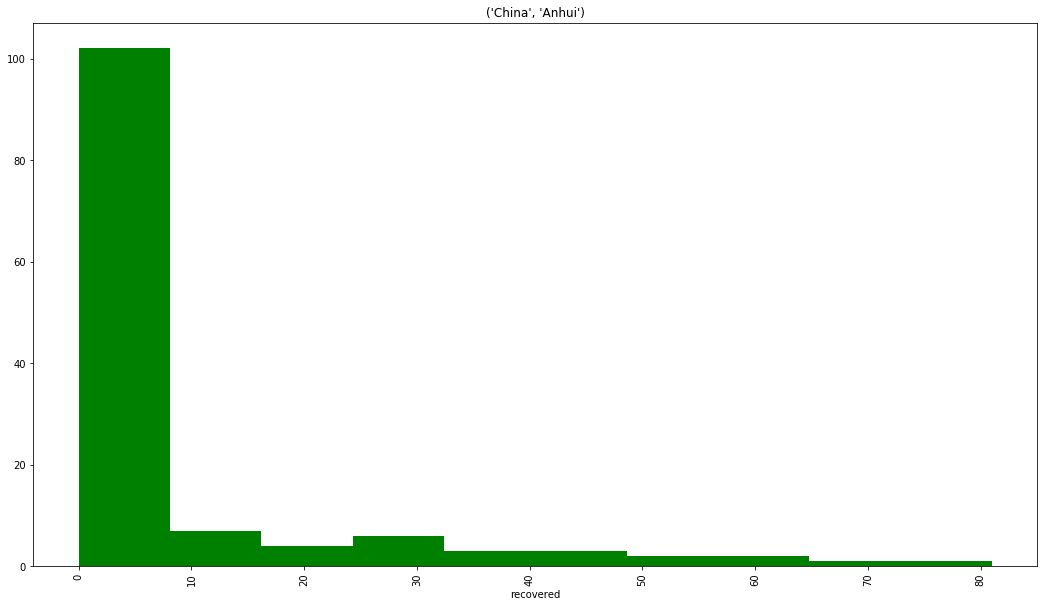

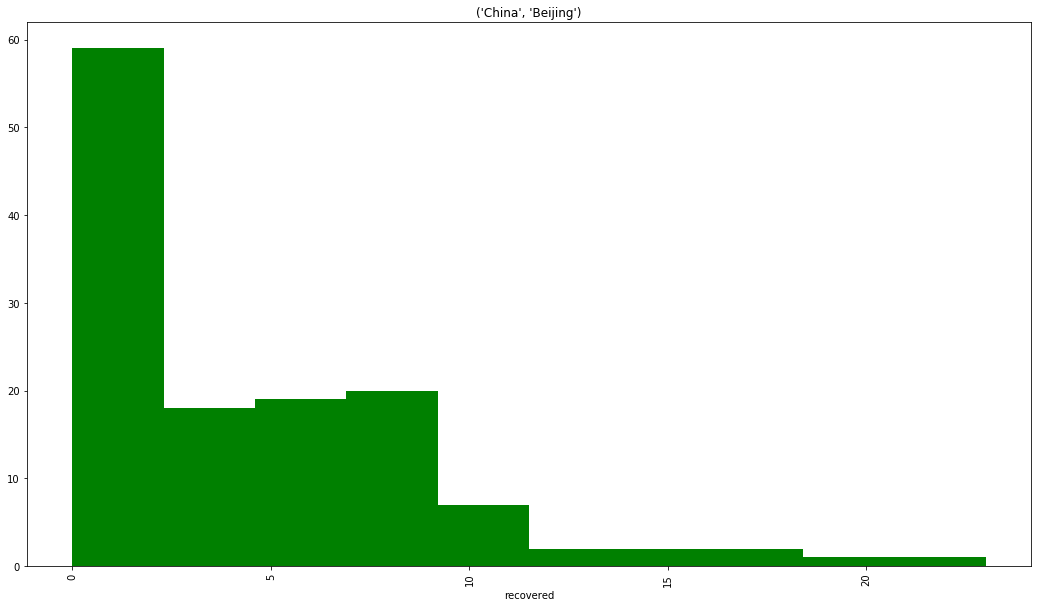

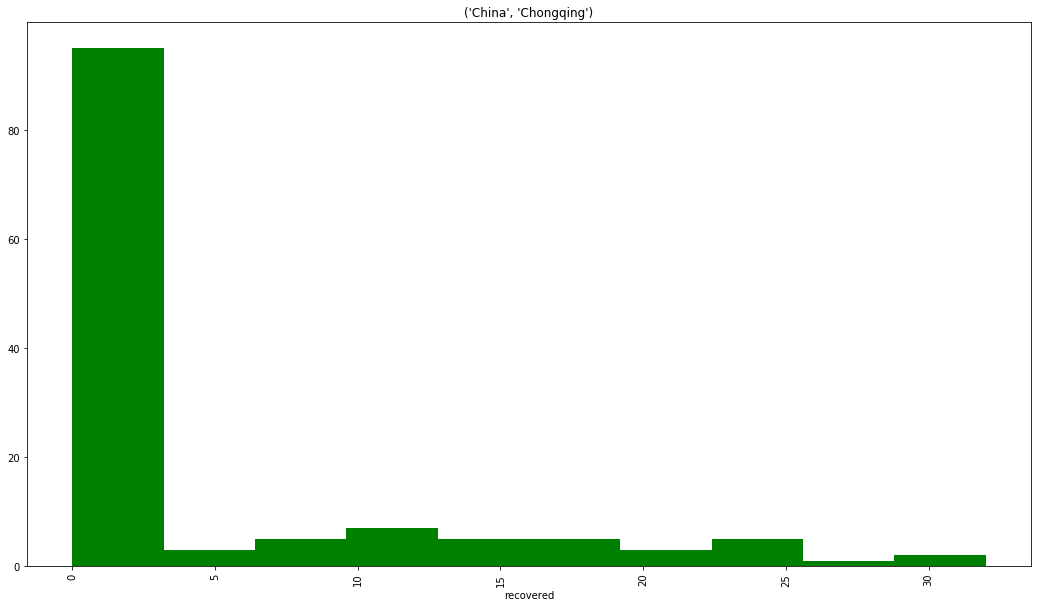

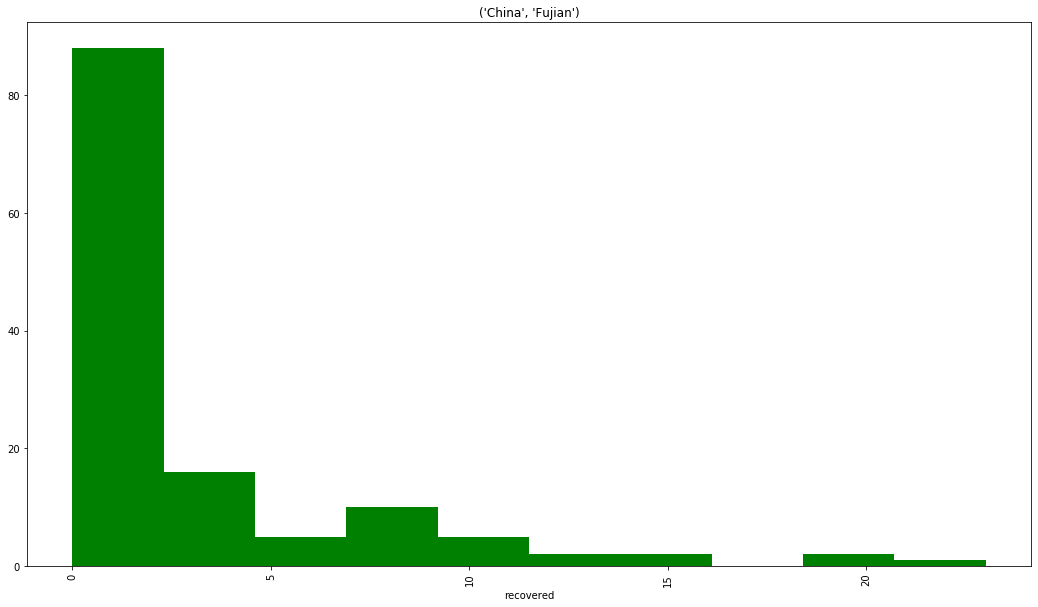

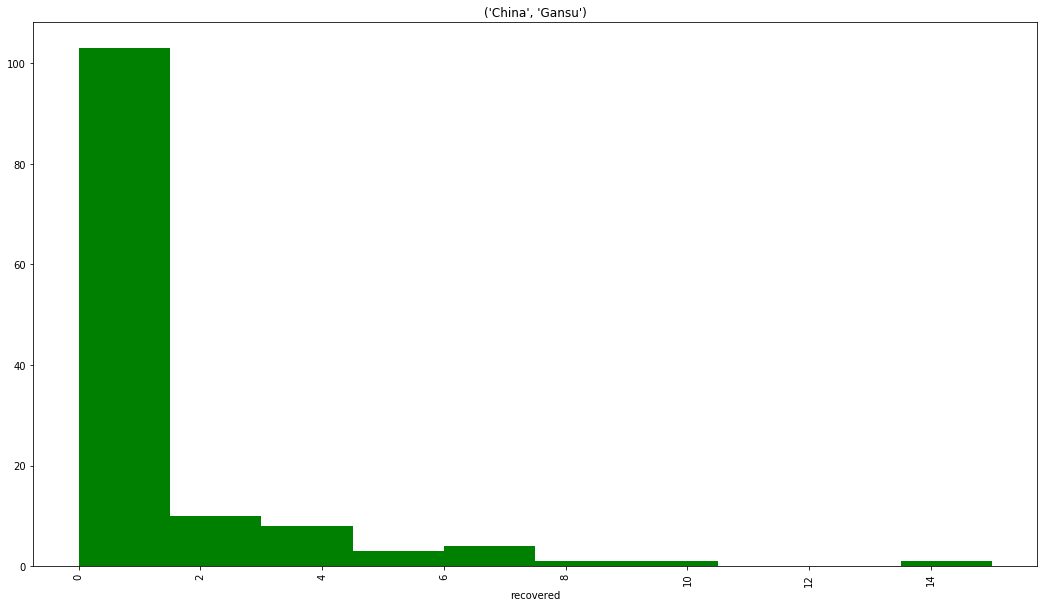

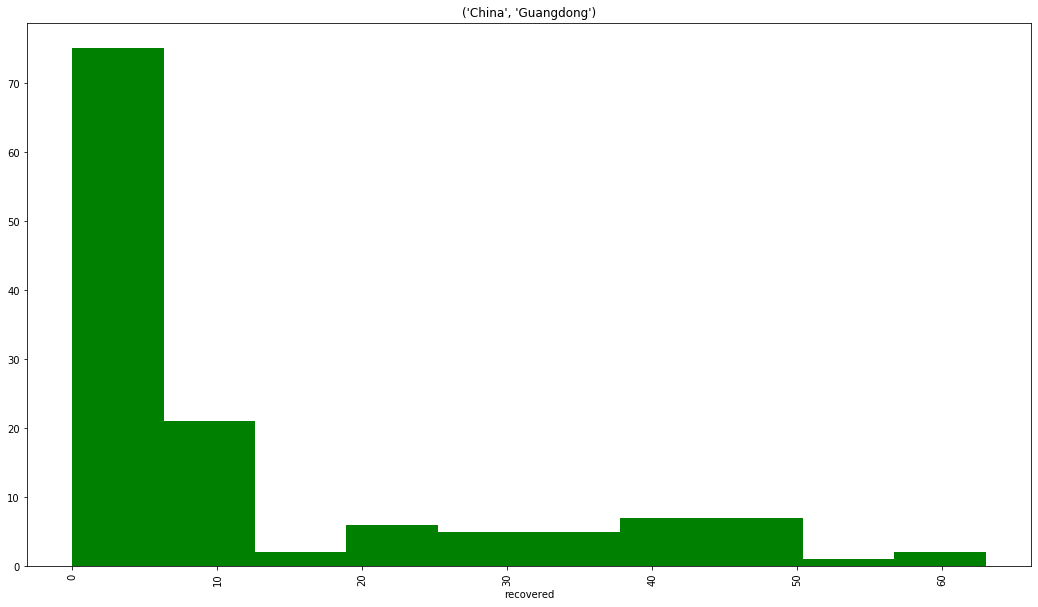

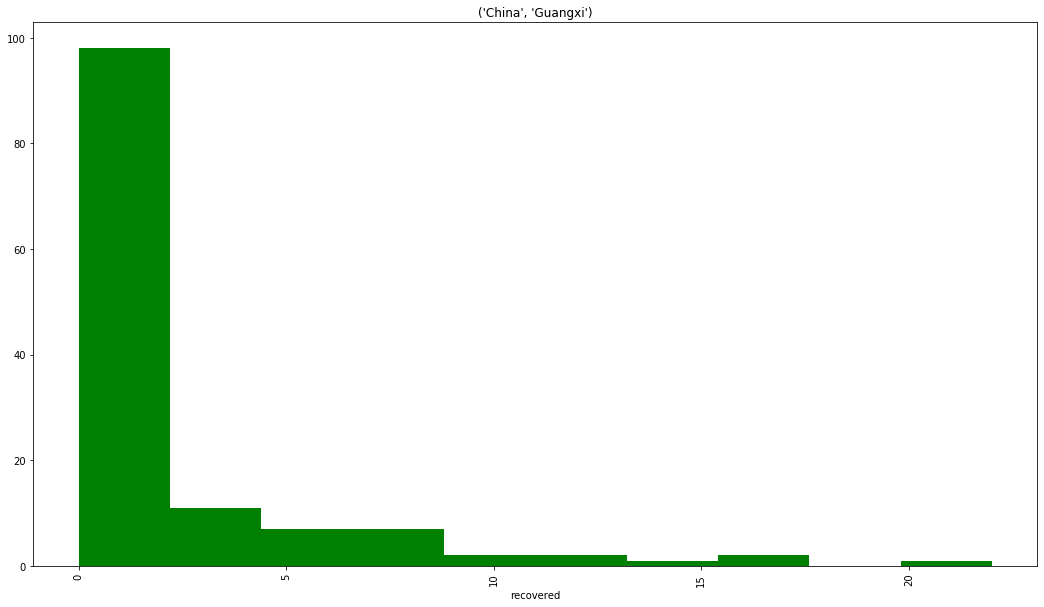

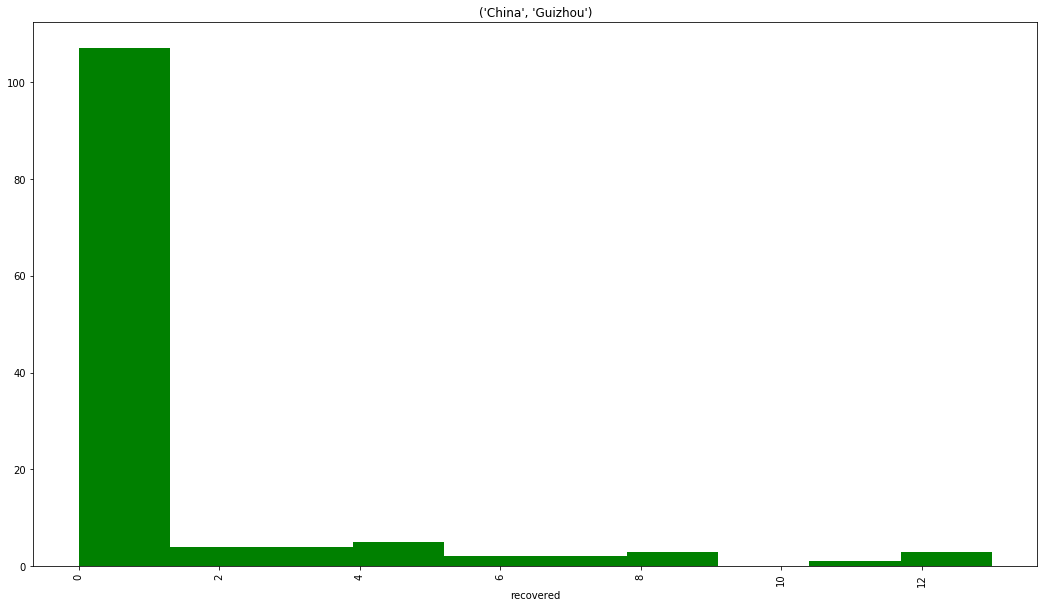

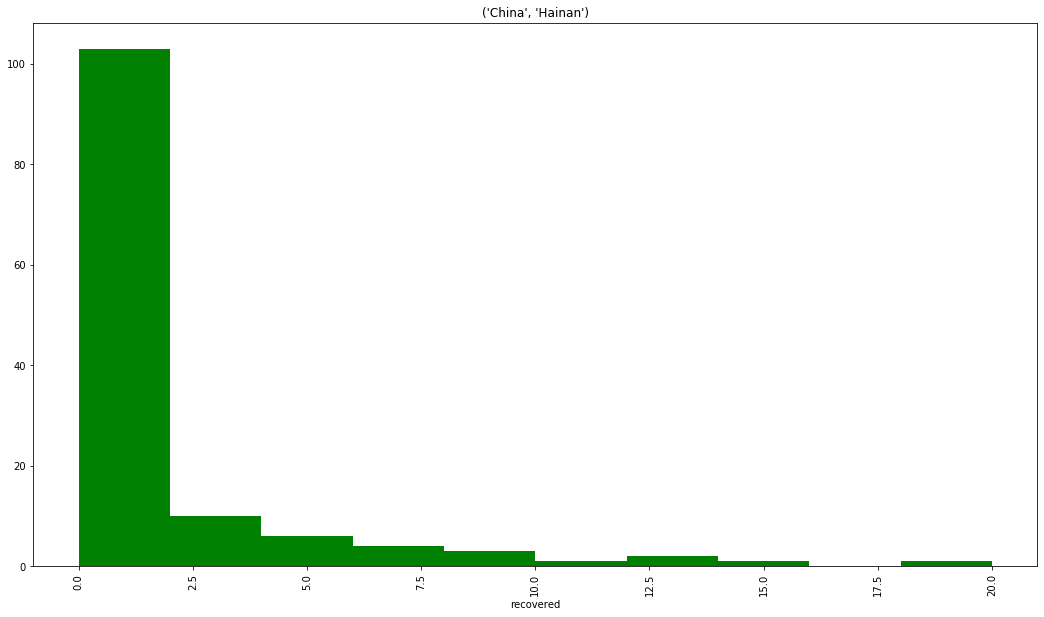

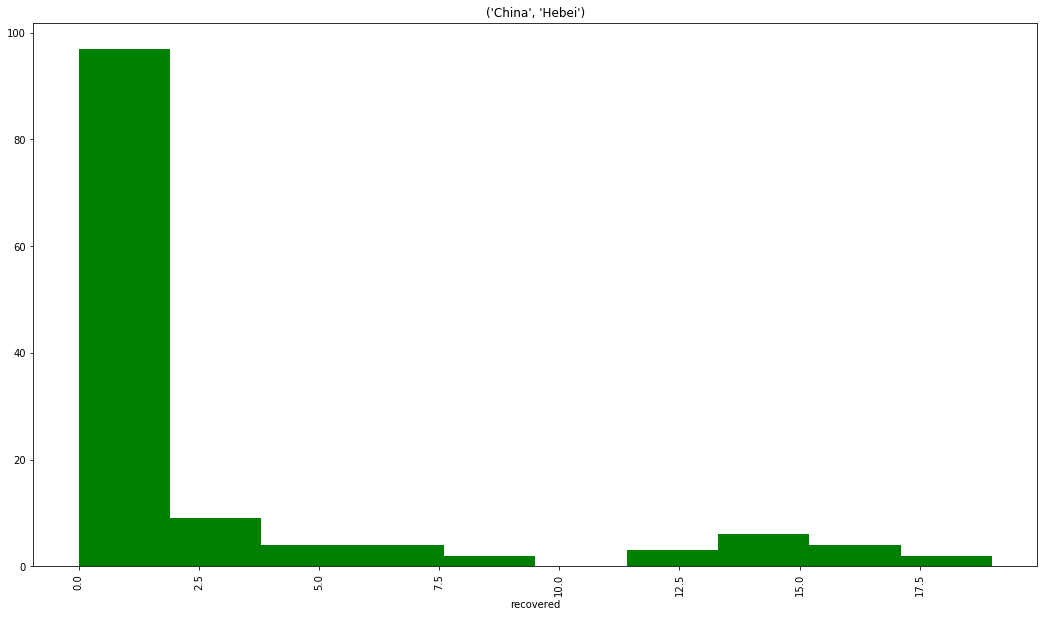

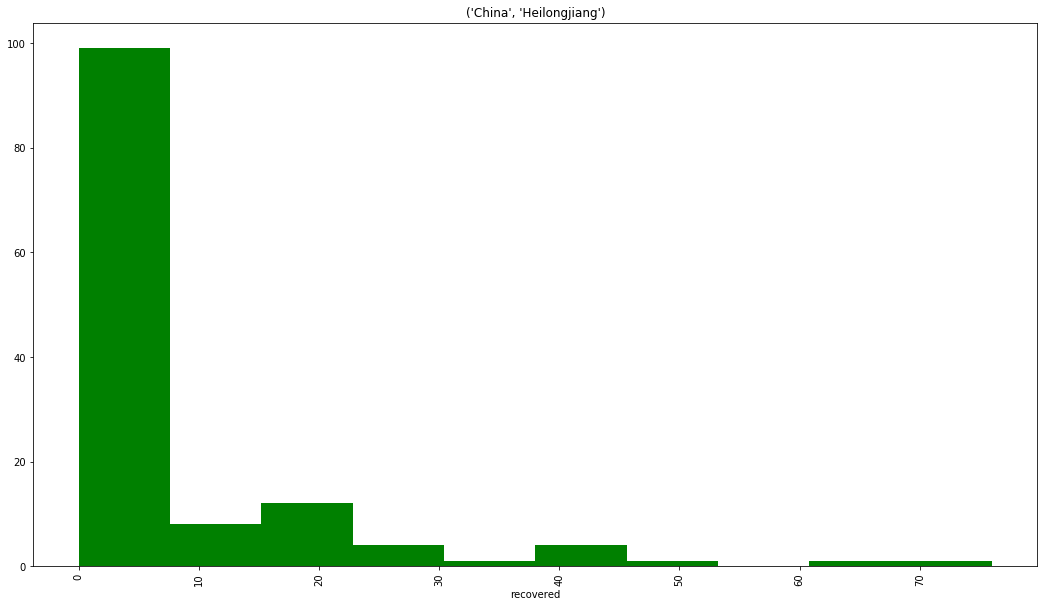

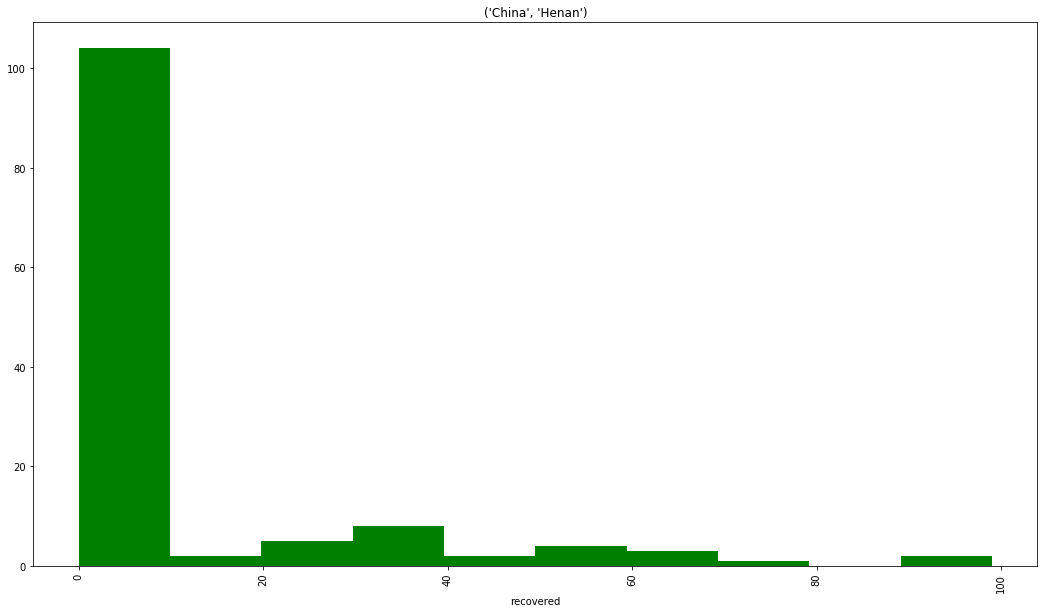

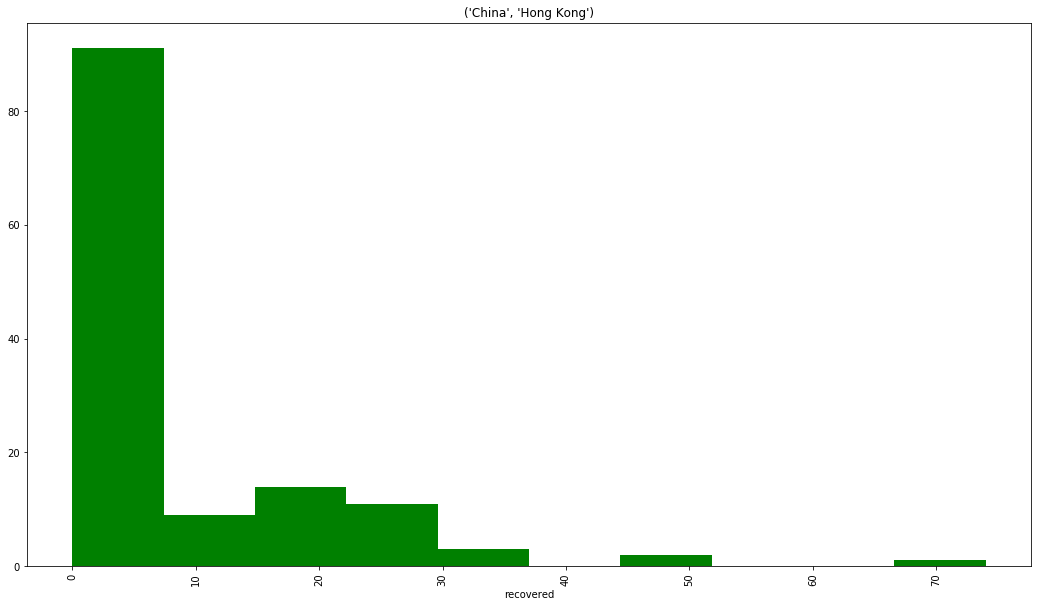

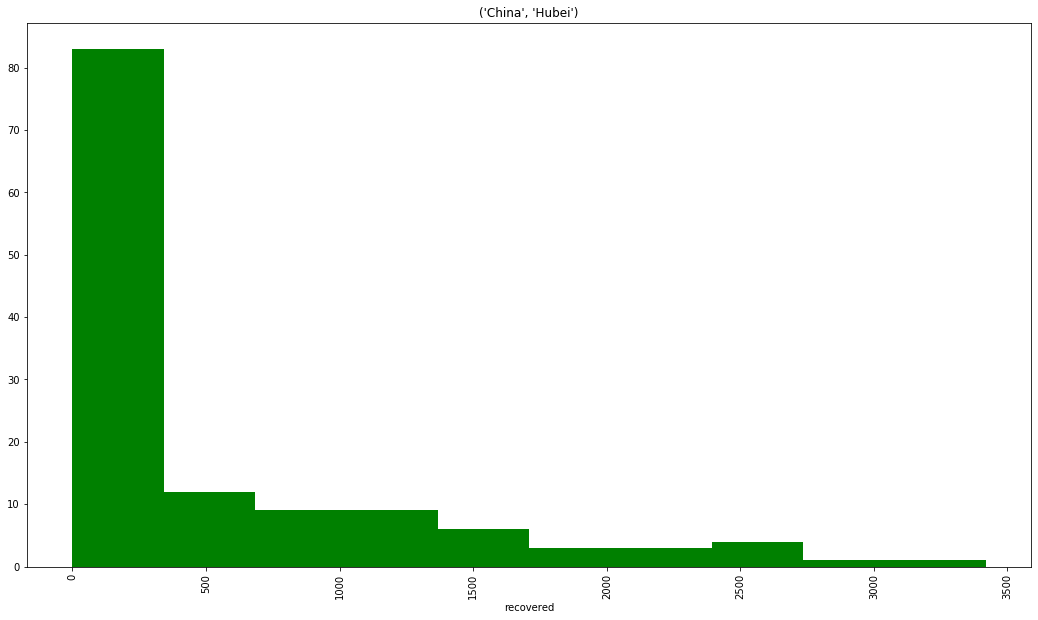

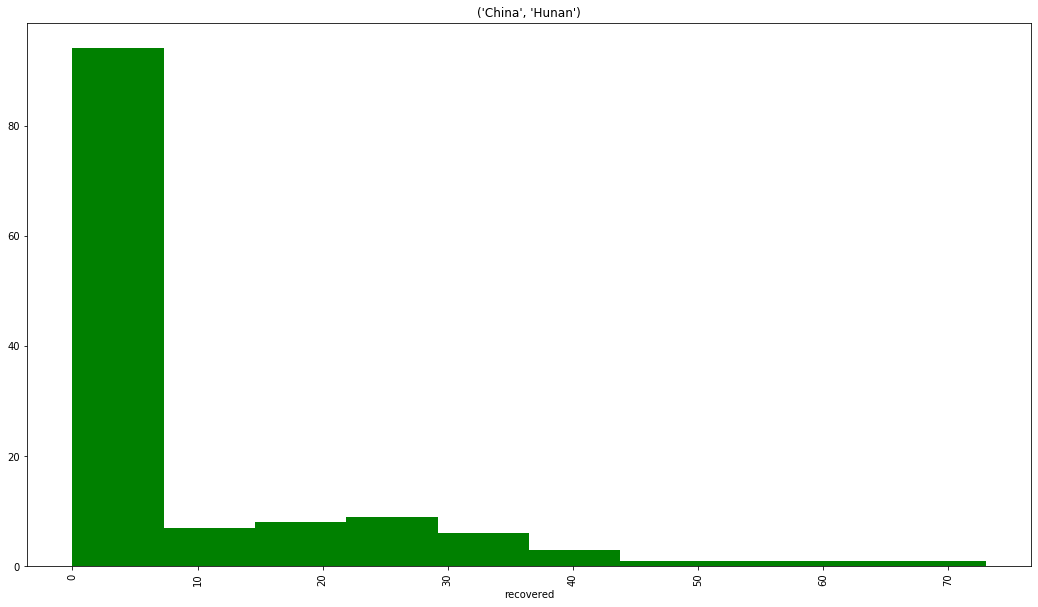

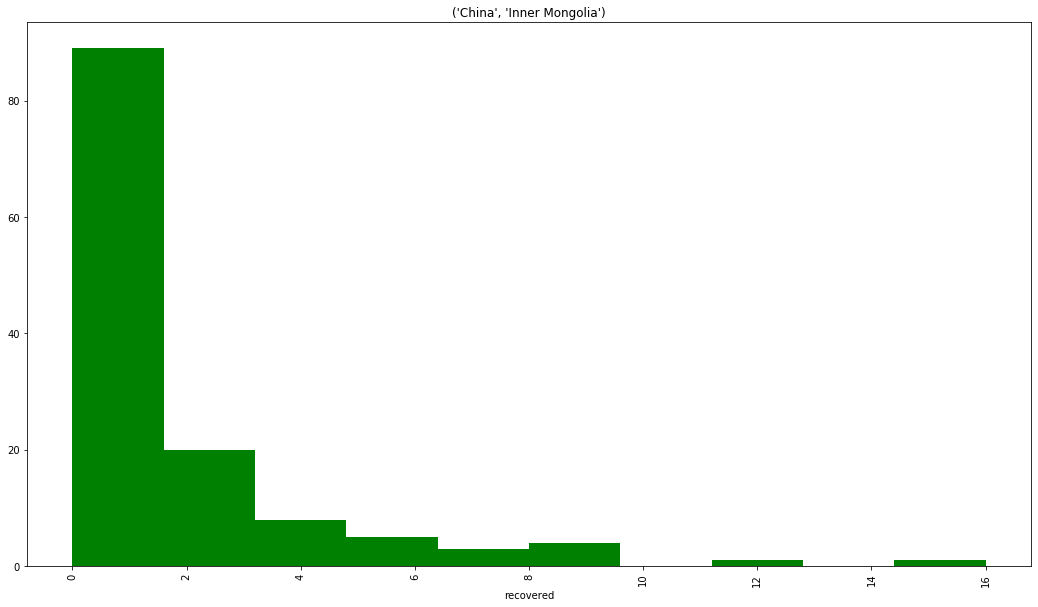

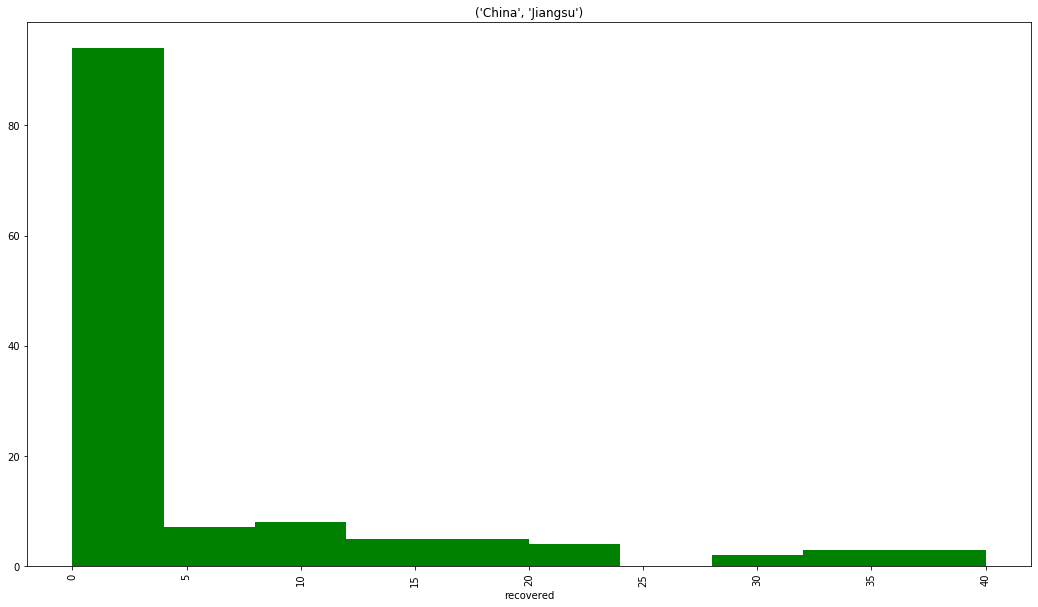

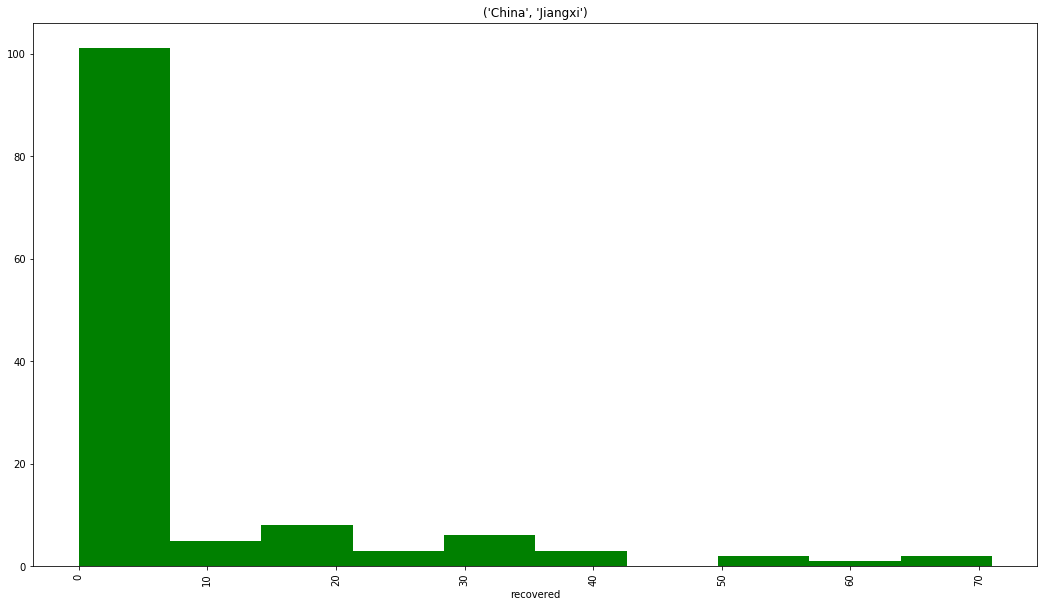

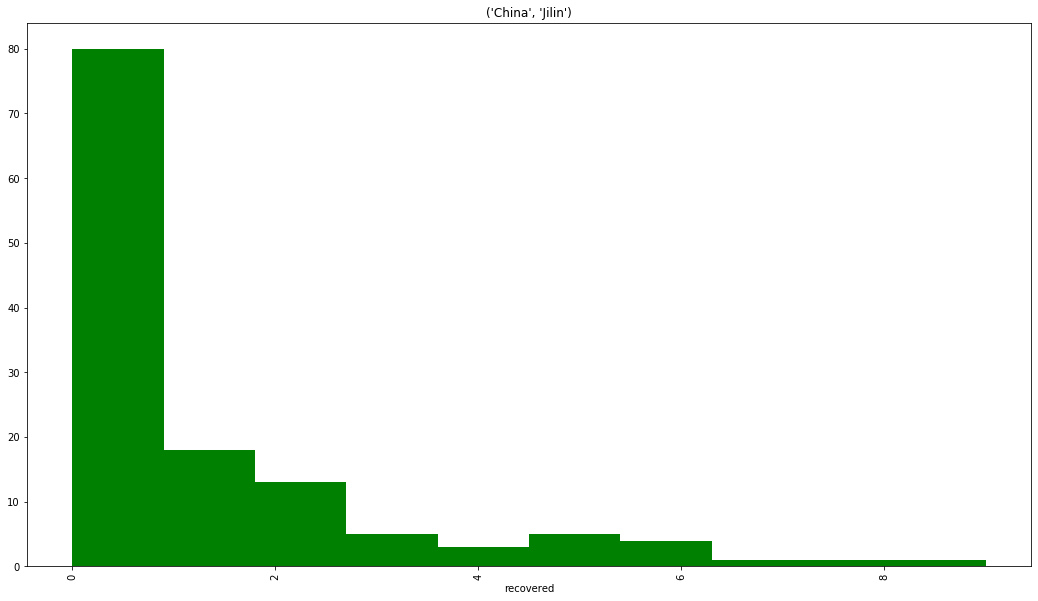

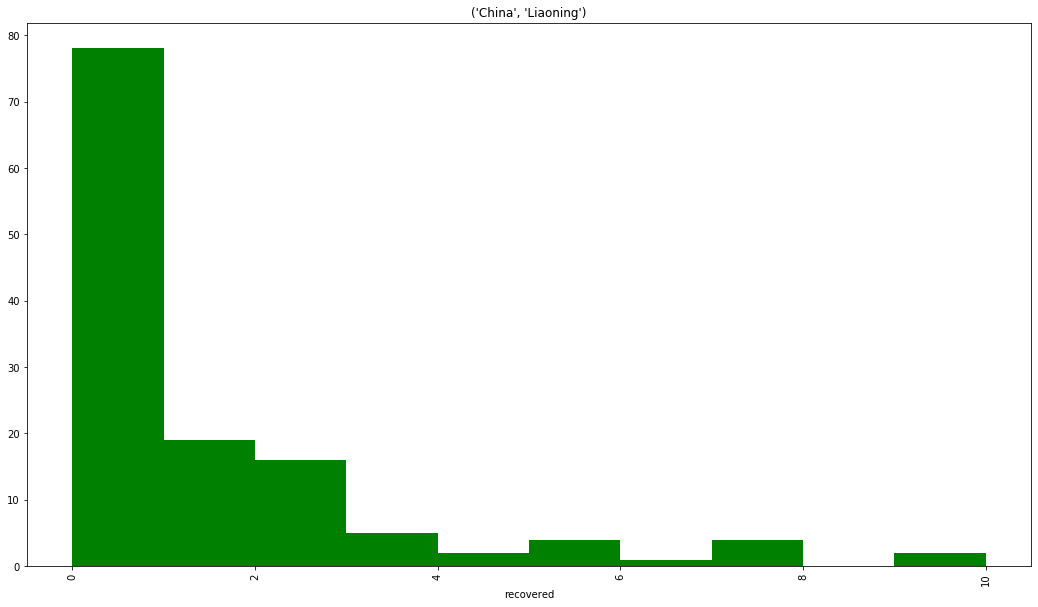

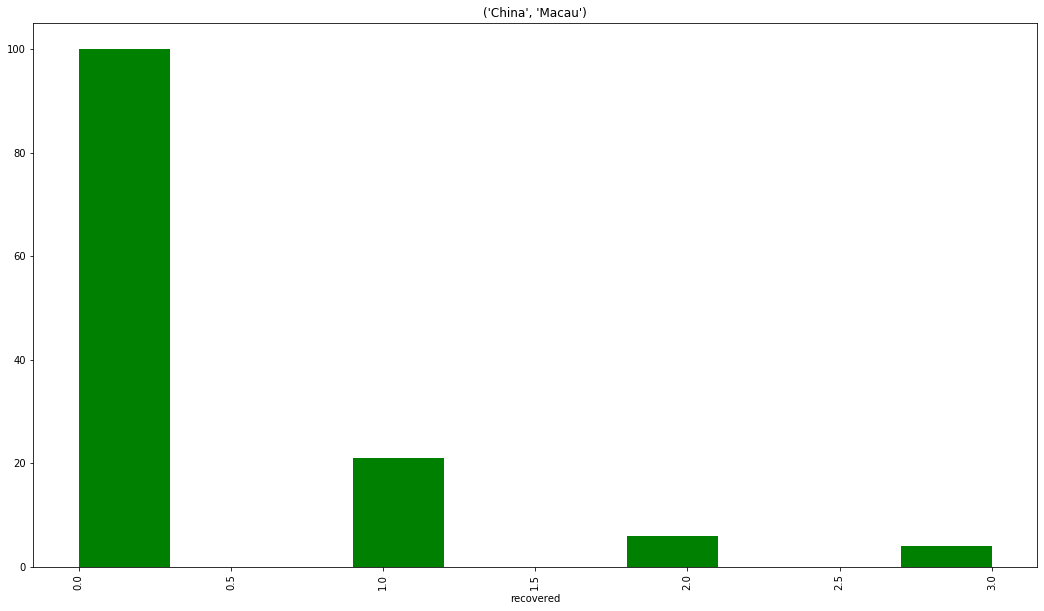

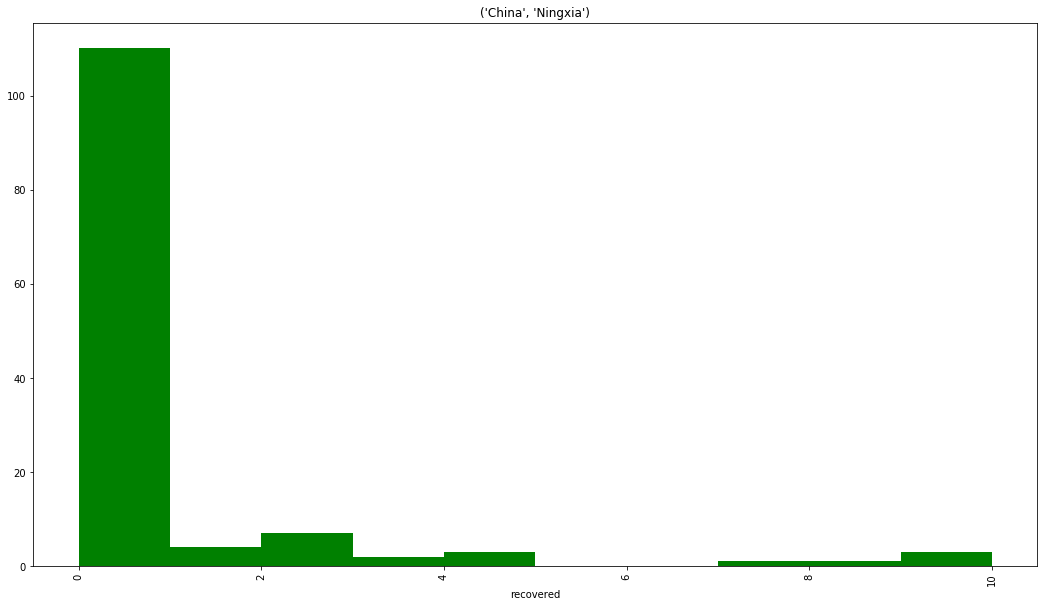

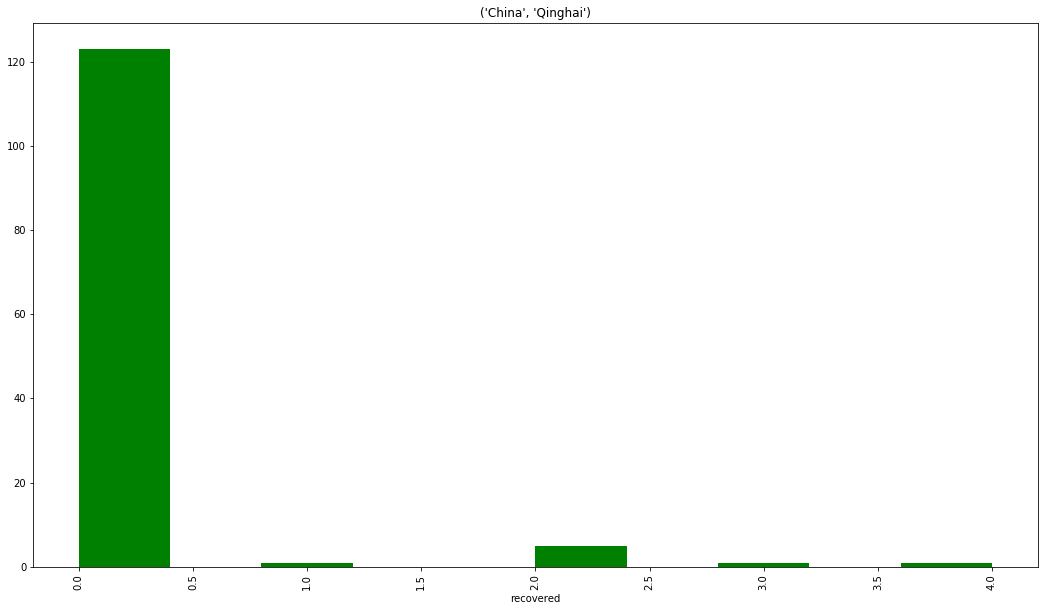

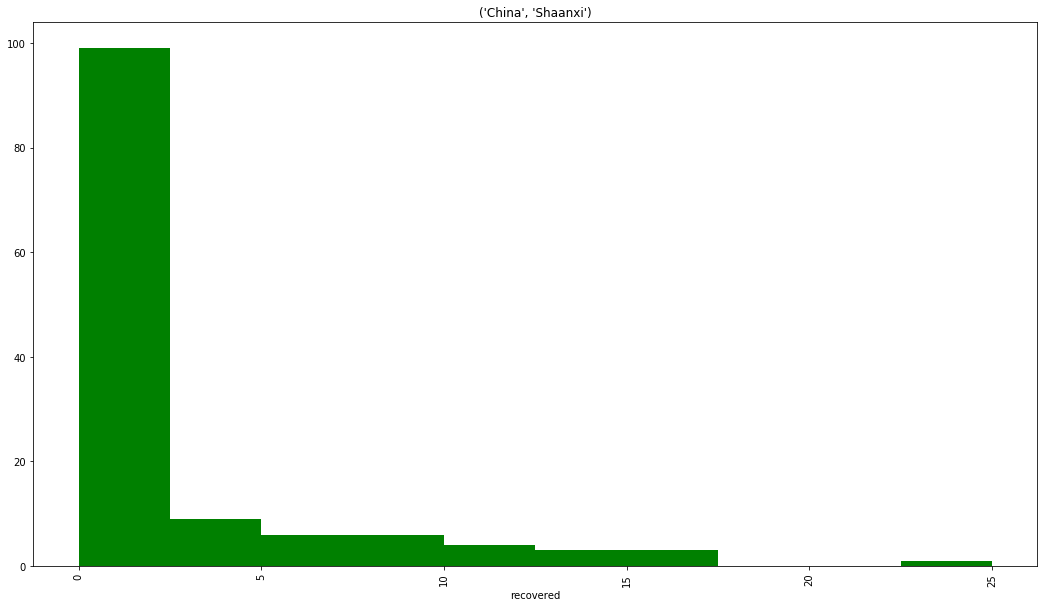

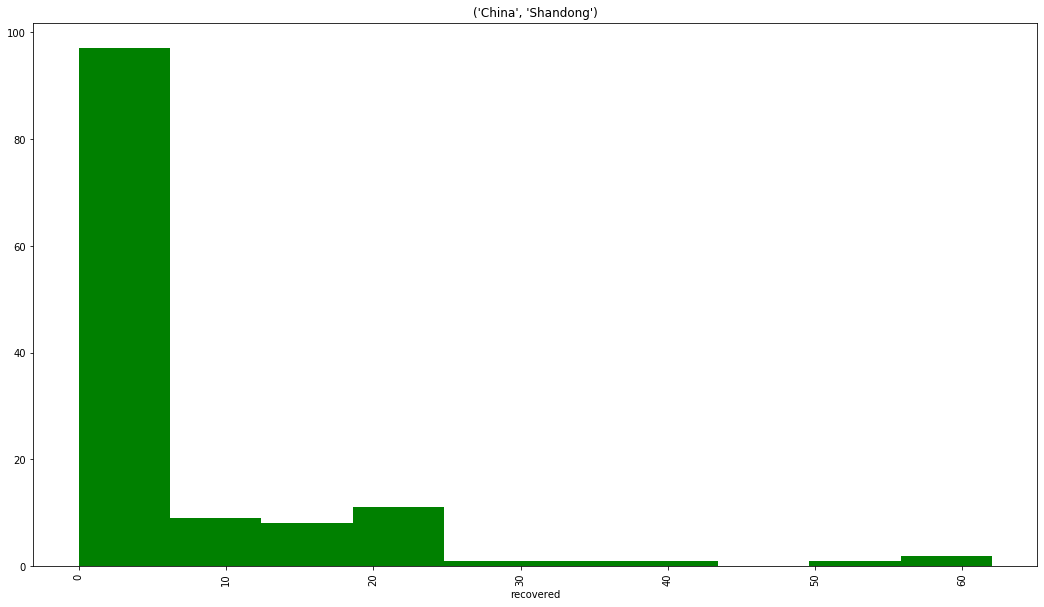

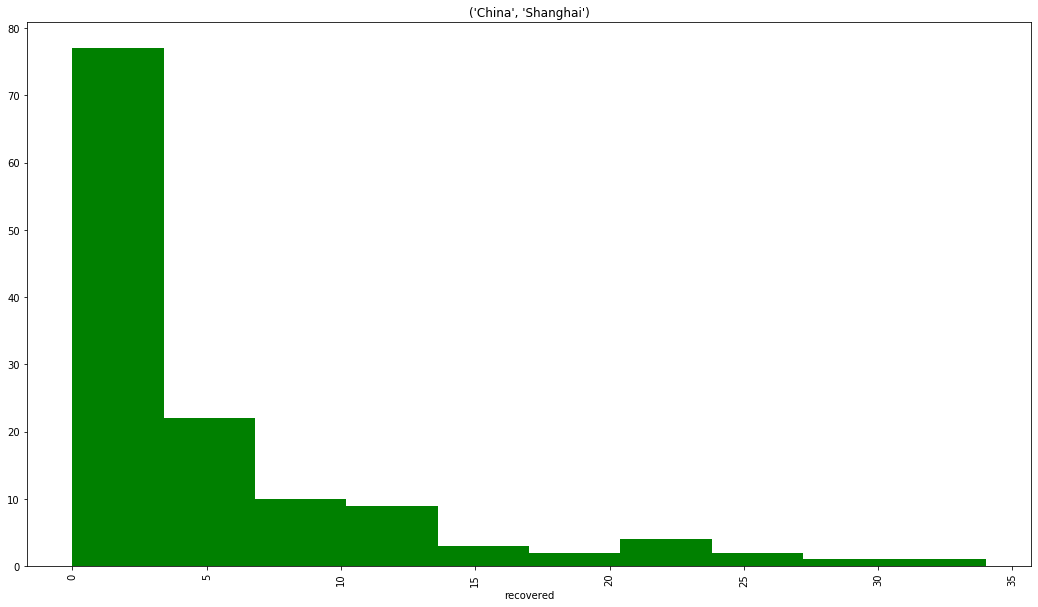

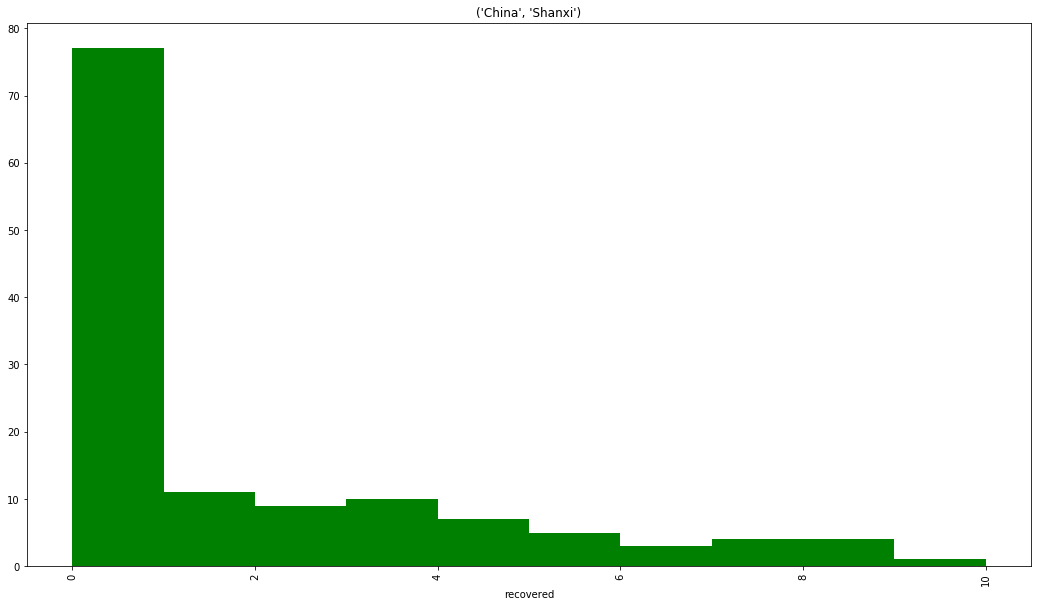

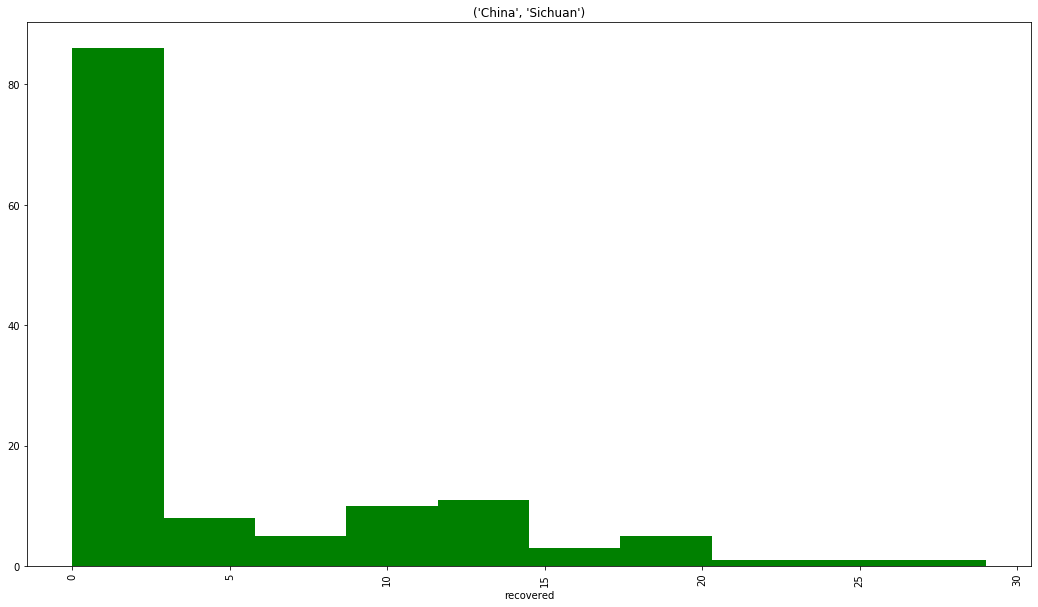

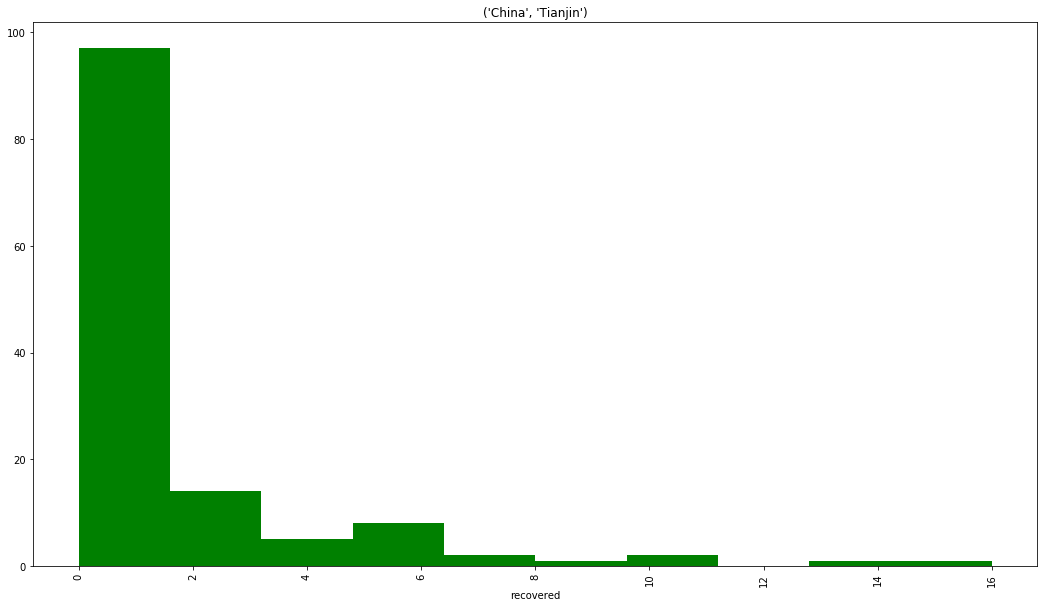

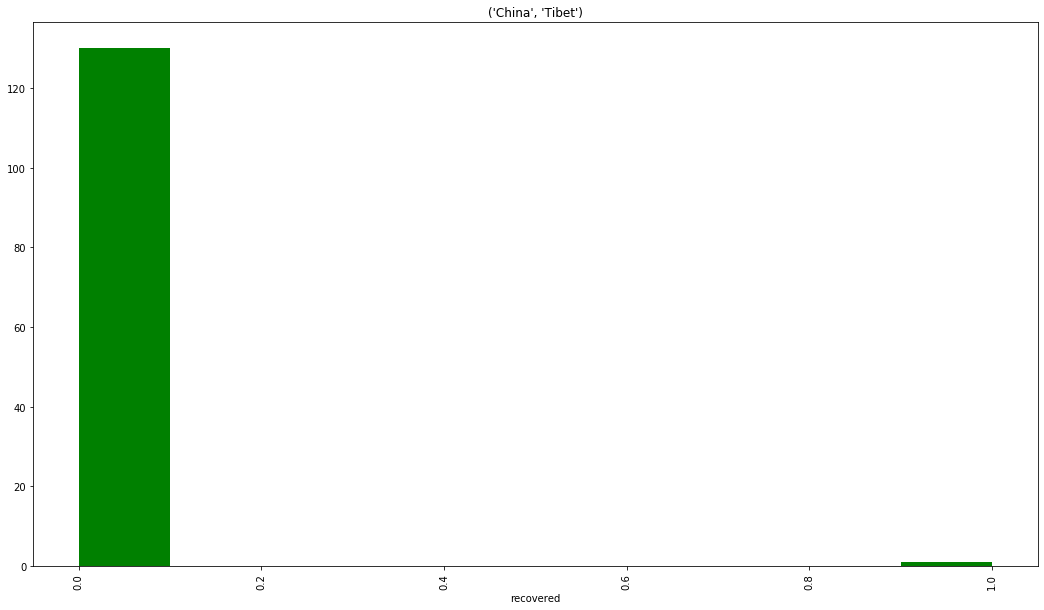

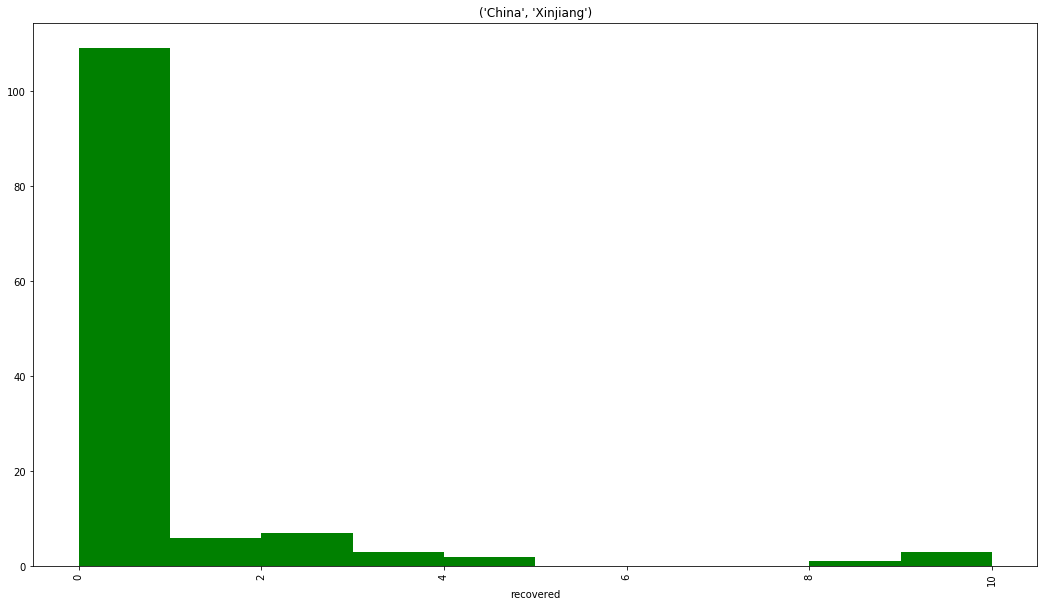

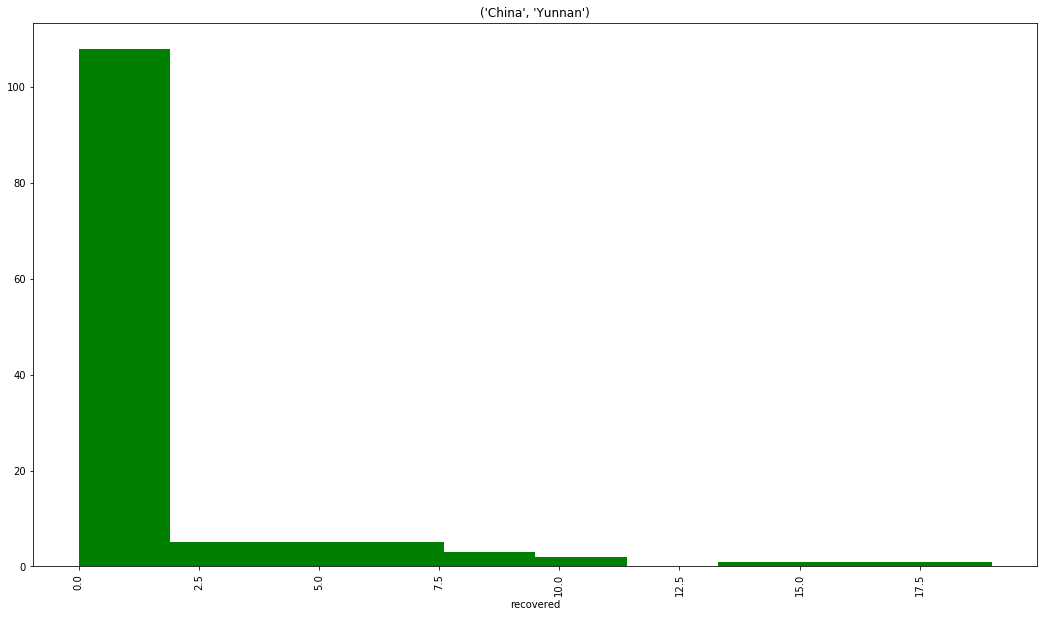

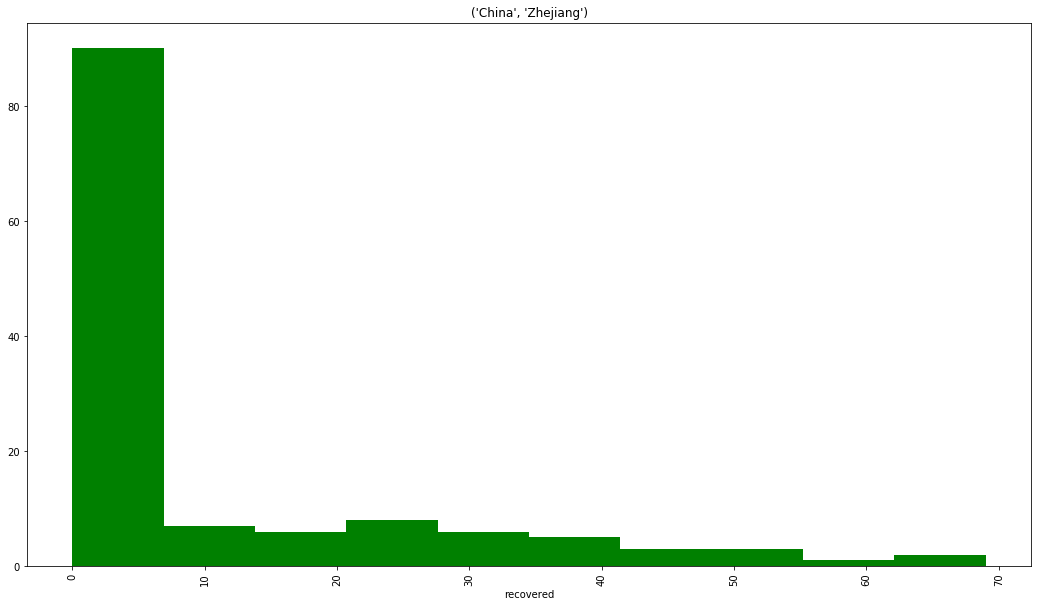

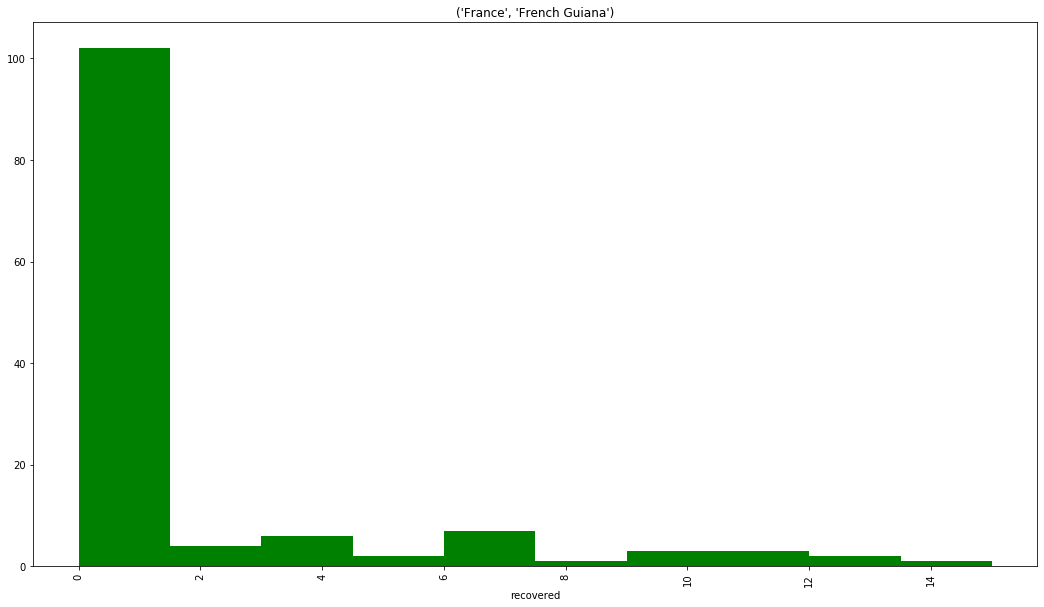

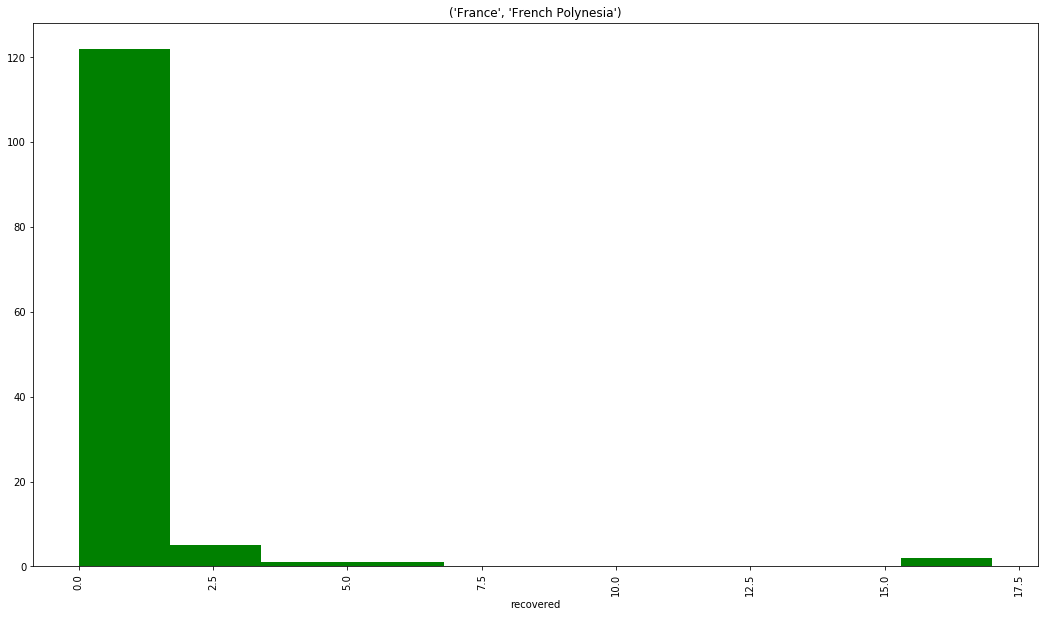

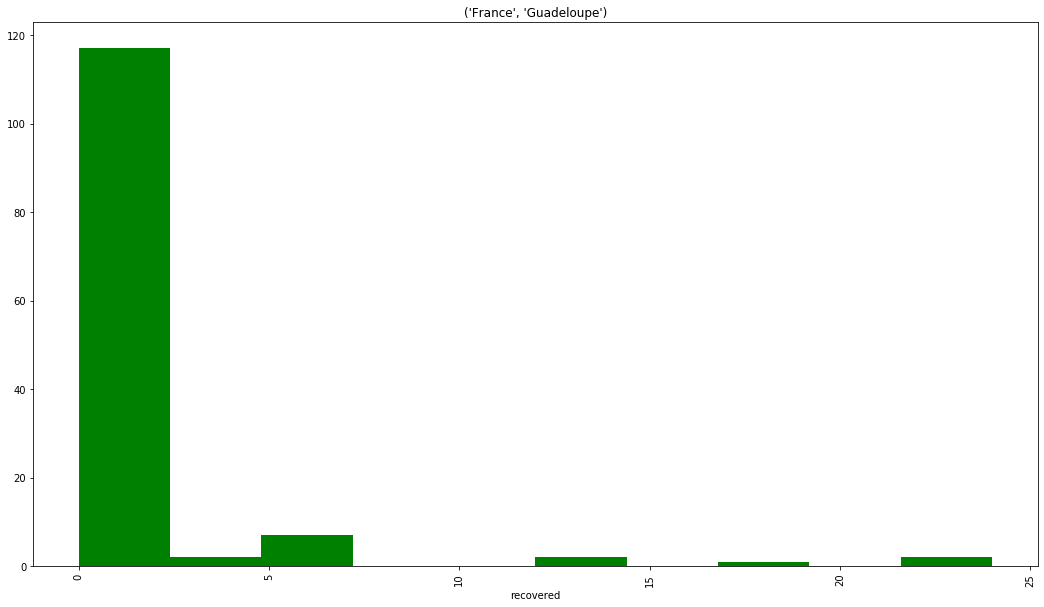

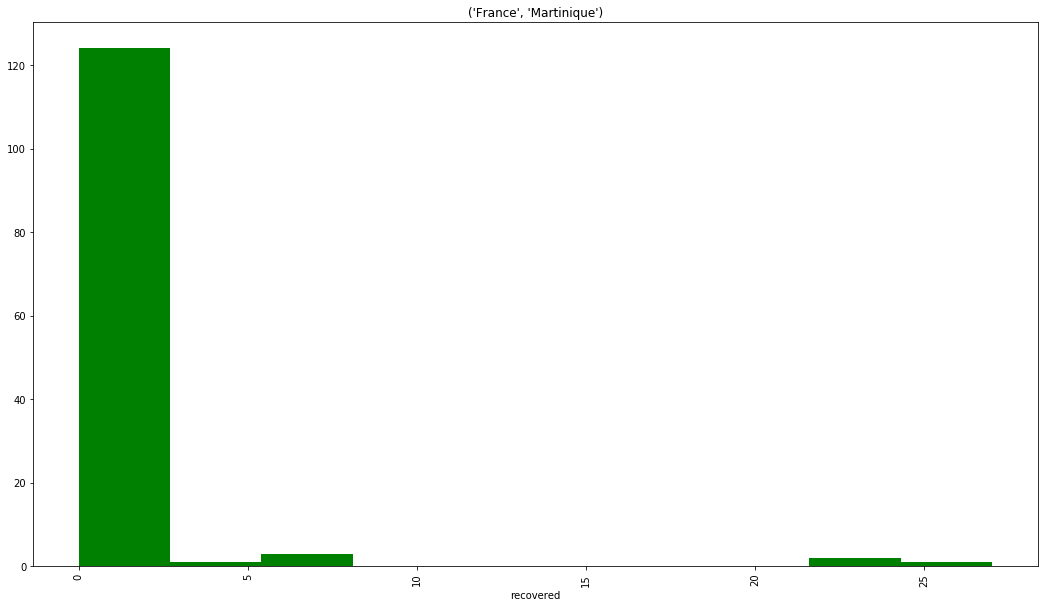

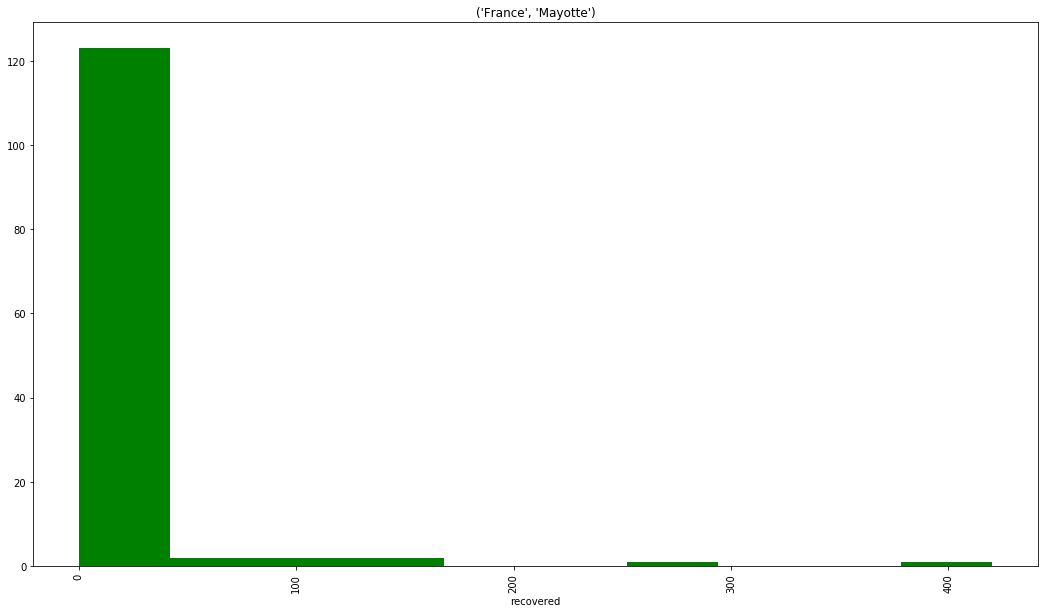

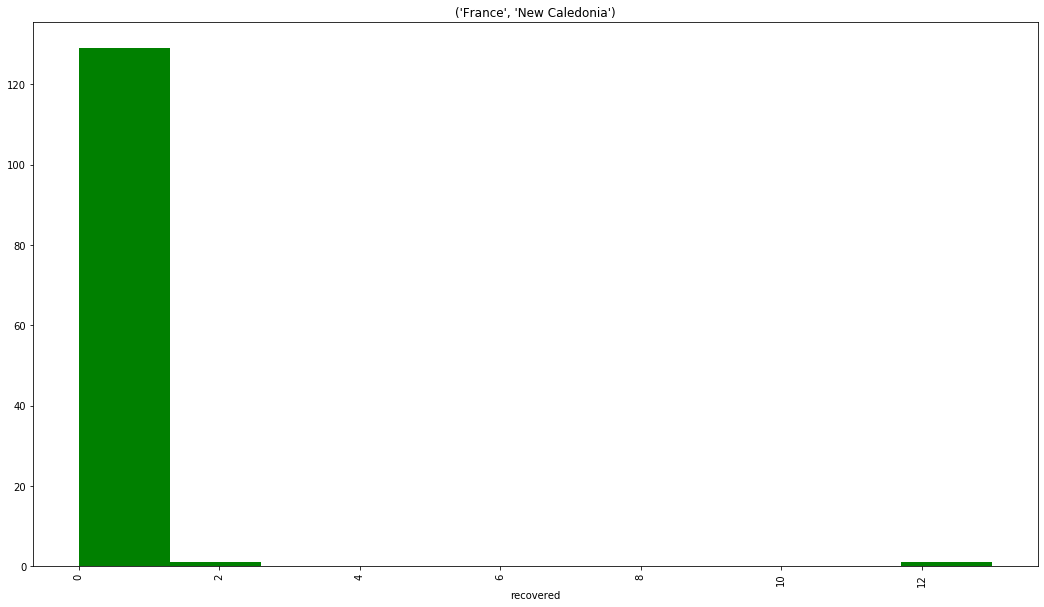

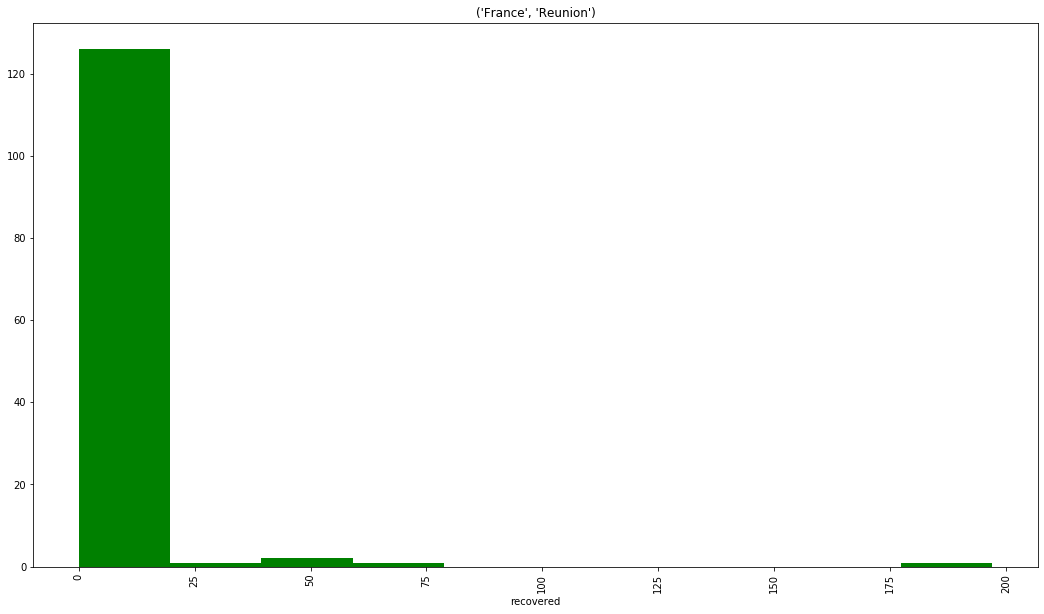

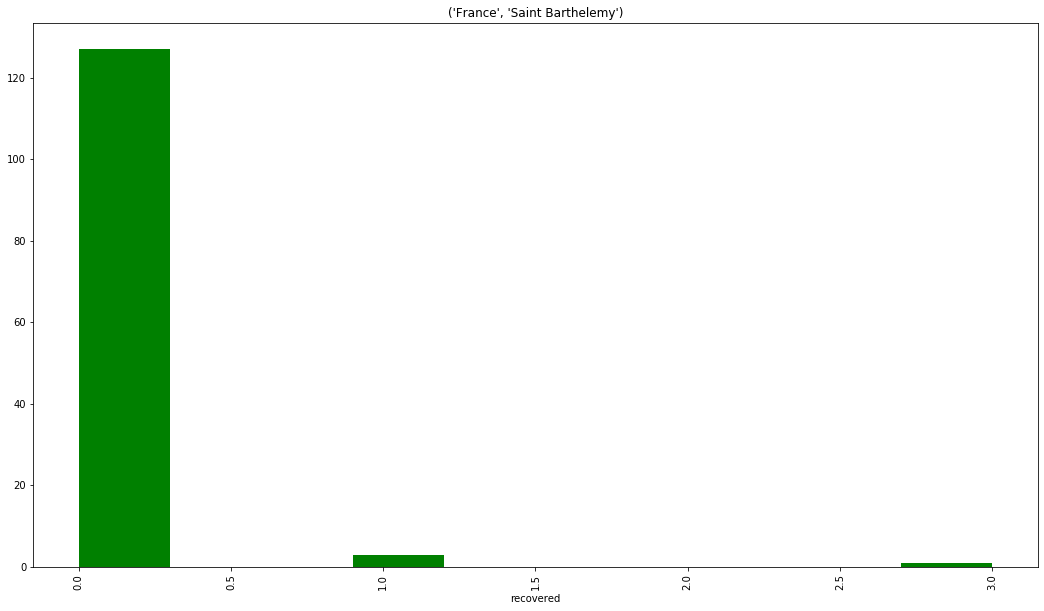

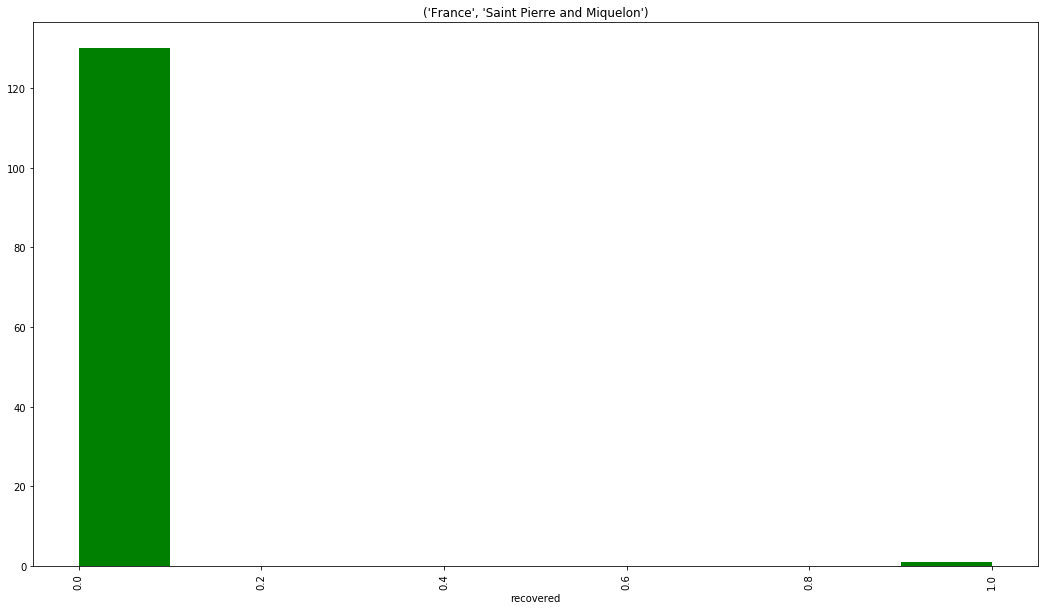

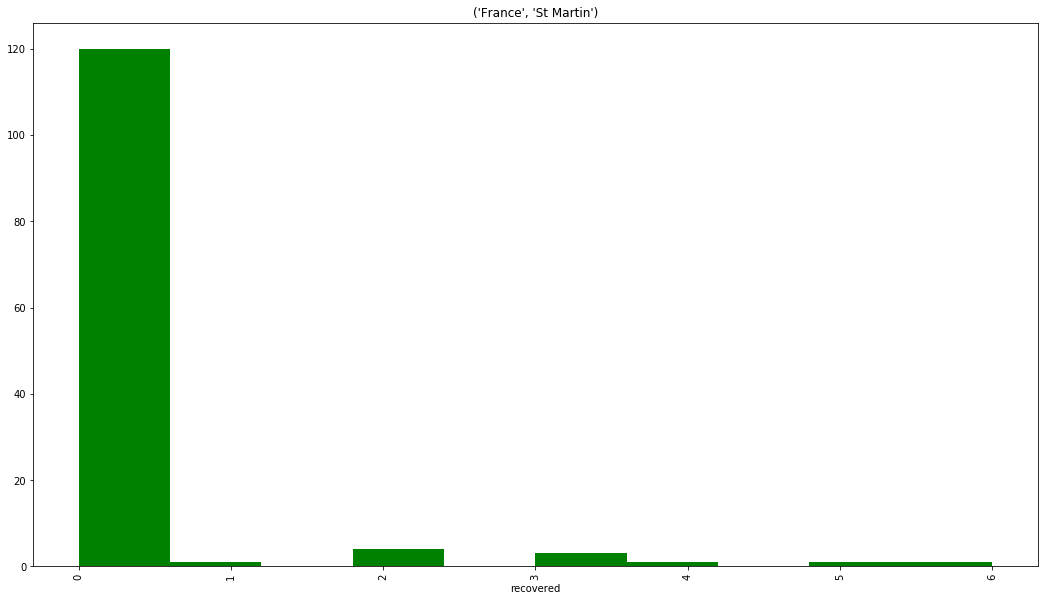

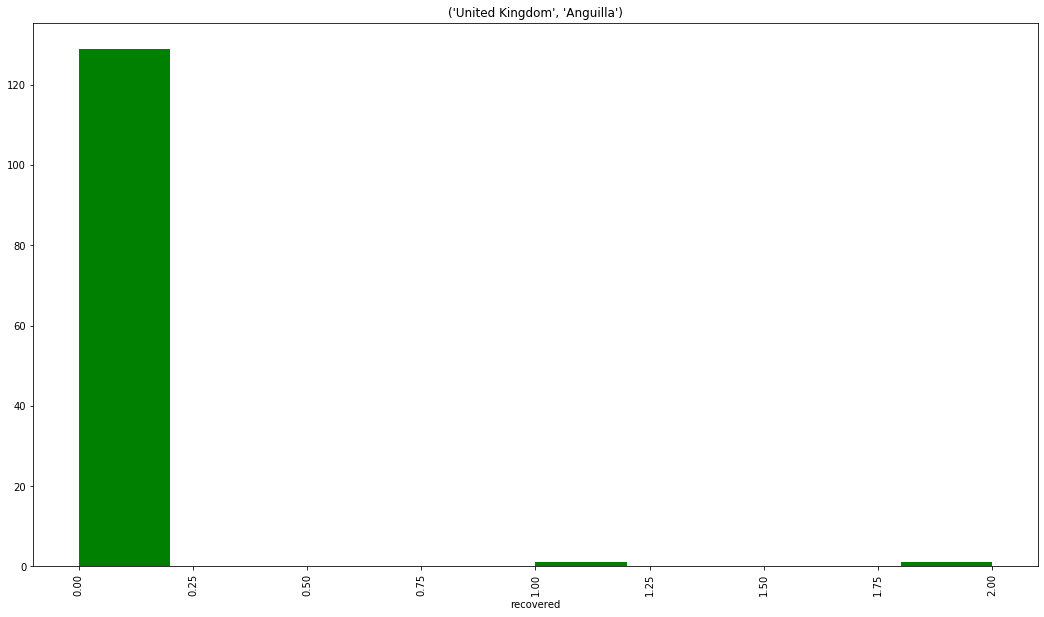

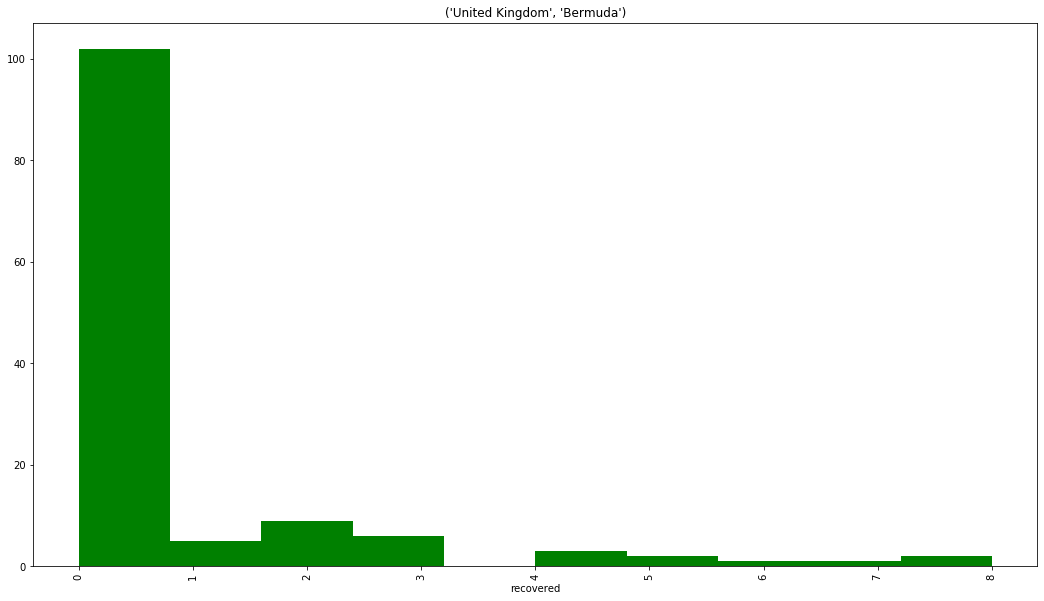

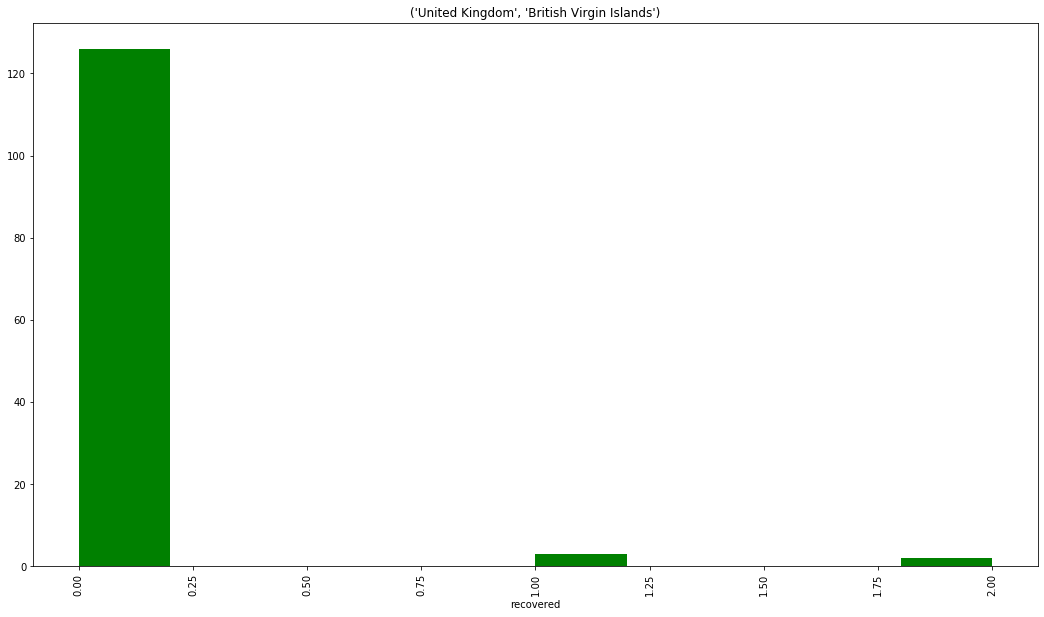

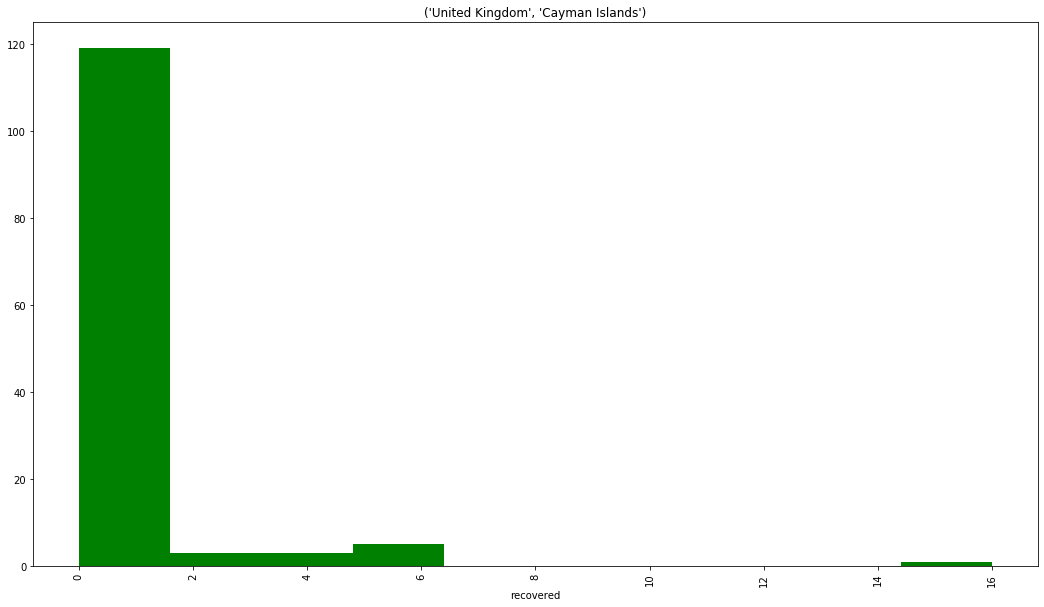

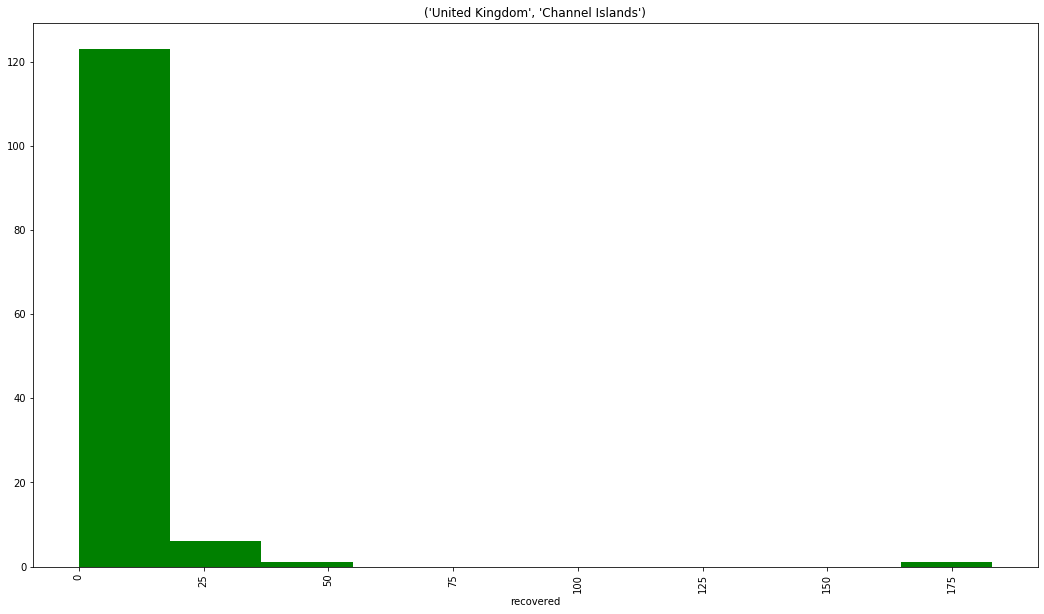

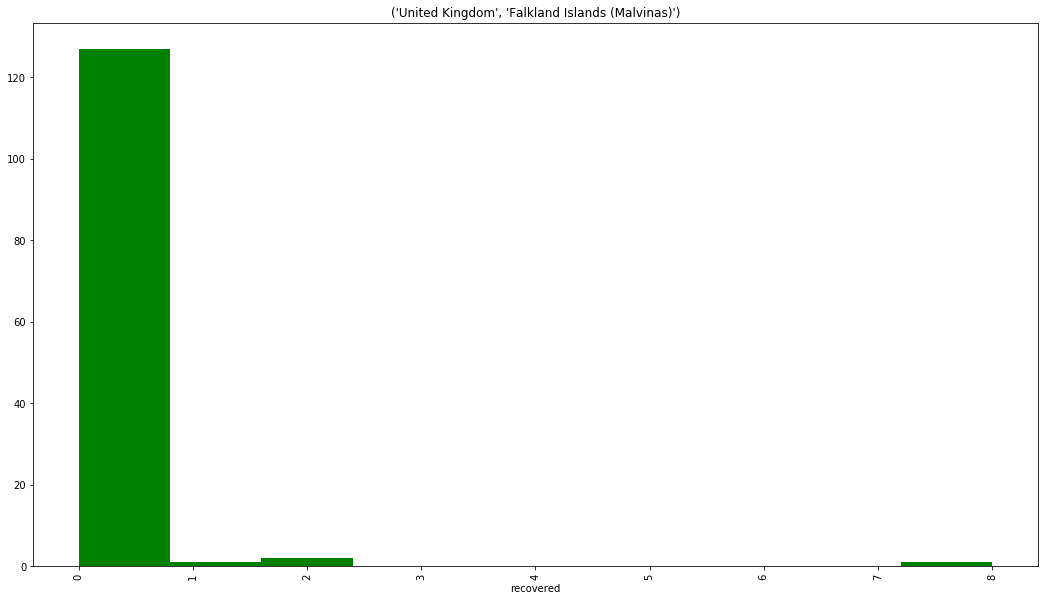

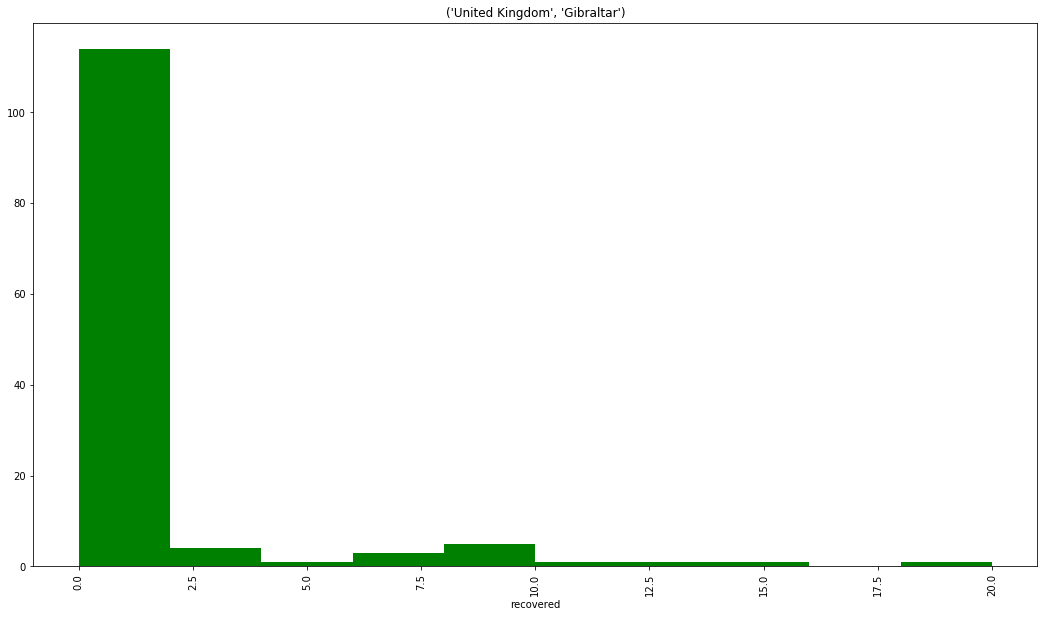

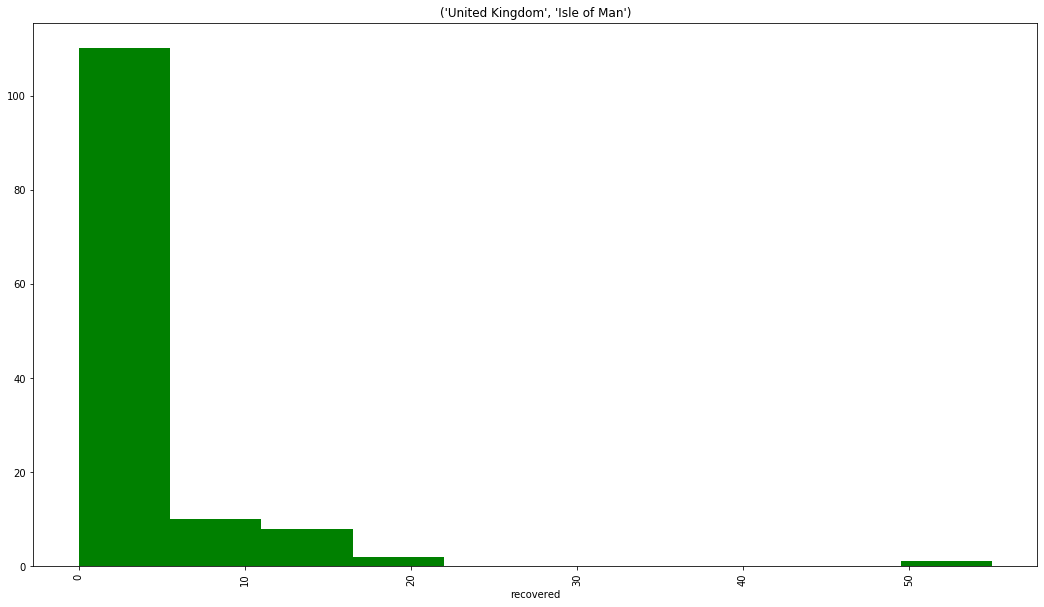

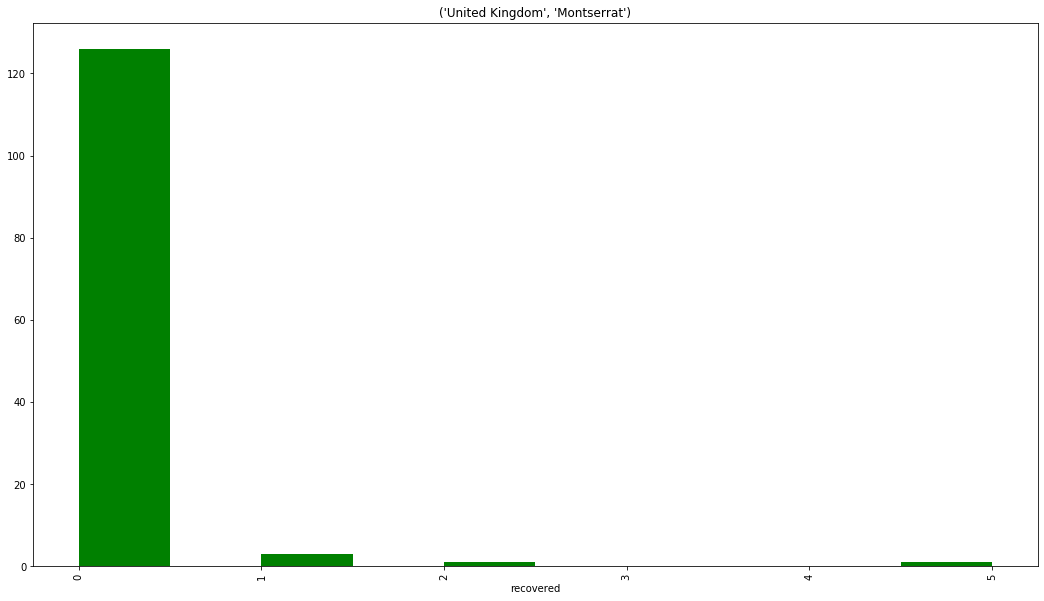

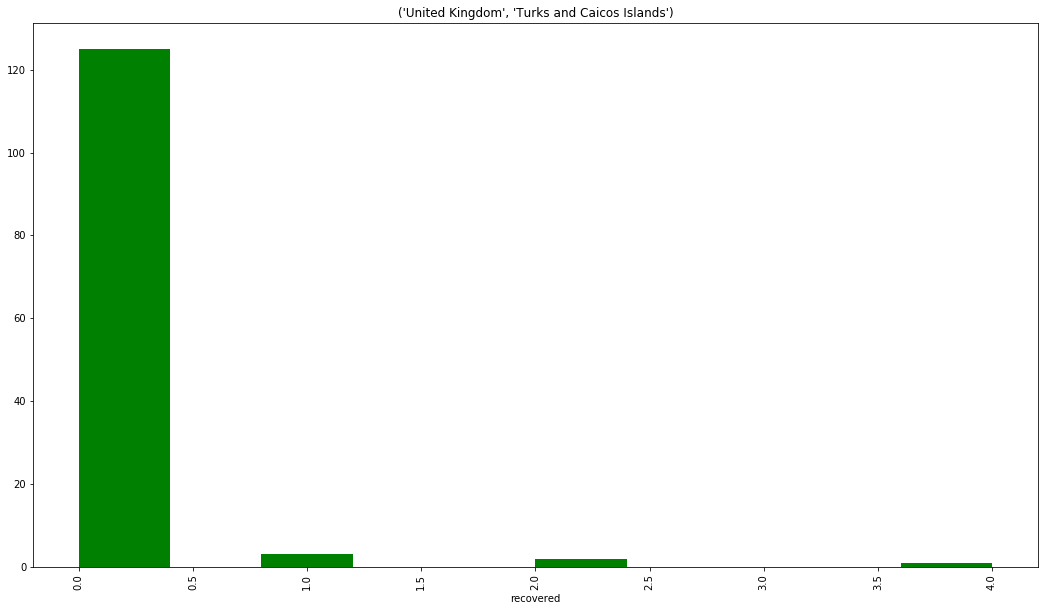

In [23]:
for i in idx:
    plt.figure(figsize=(18,10))
    plt.hist(main_recoveredt.loc[:,i][2:],color = 'green')
    plt.xticks(rotation=90);
    plt.xlabel('recovered')
    plt.title(i);

In [24]:
zc = main_confirmed.groupby(['Country/Region']).sum()
zr = main_recovered.groupby(['Country/Region']).sum()
zd = main_deaths.groupby(['Country/Region']).sum()
main_confirmedt = zc.transpose()
main_recoveredt = zr.transpose()
main_deathst = zd.transpose()
idx = main_confirmedt.columns.tolist()

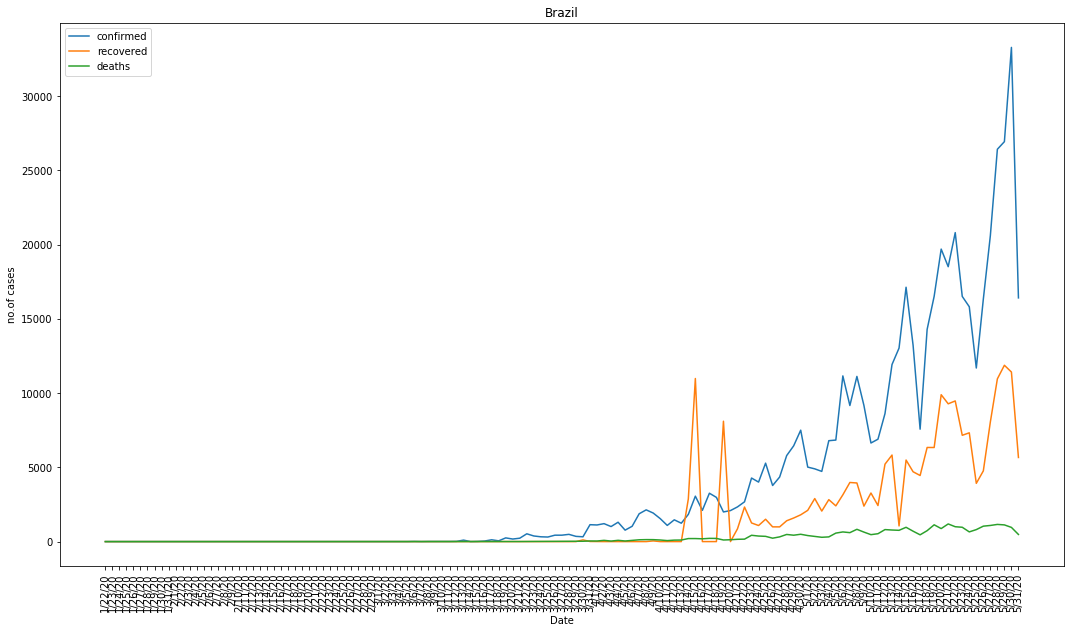

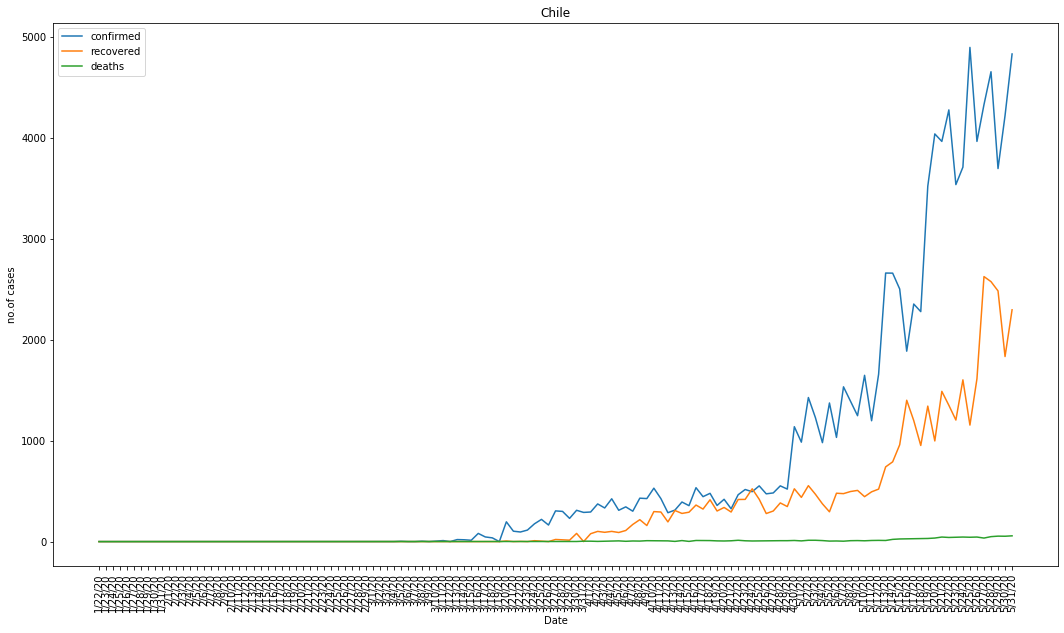

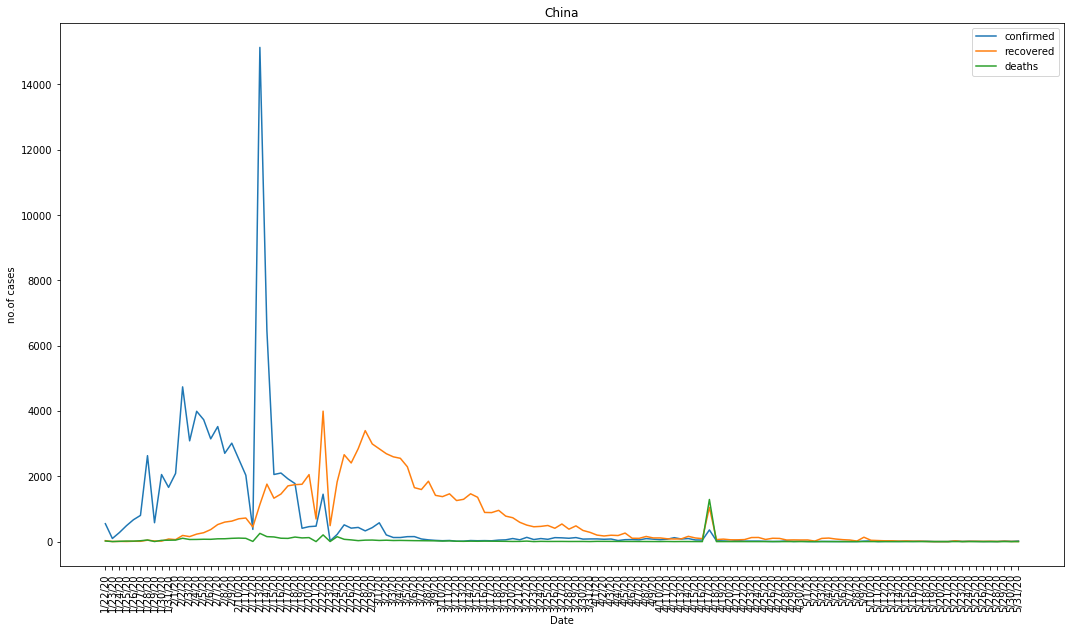

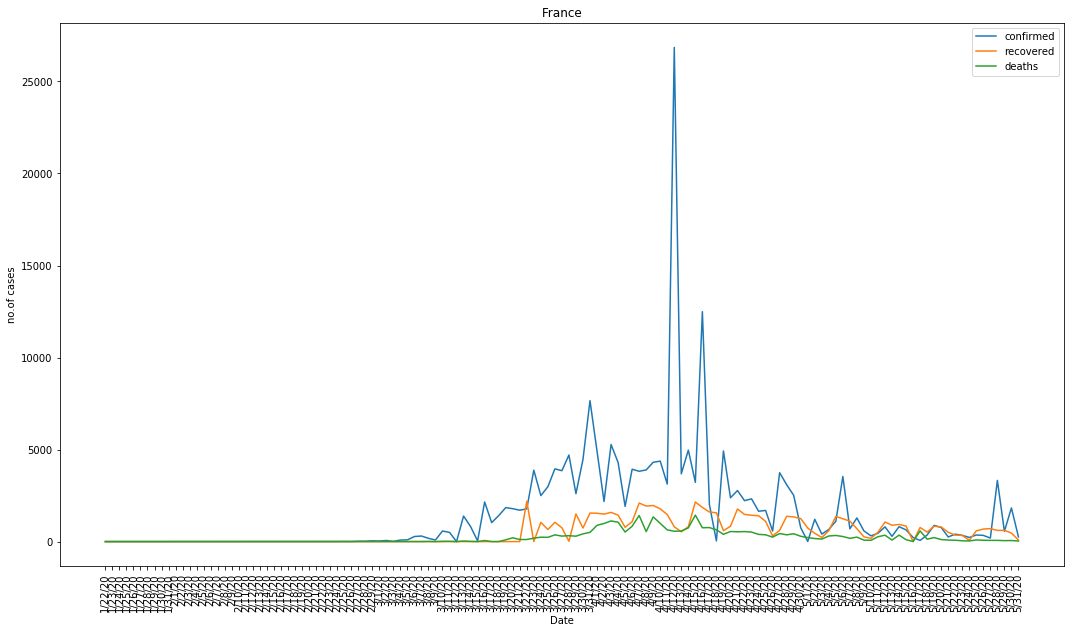

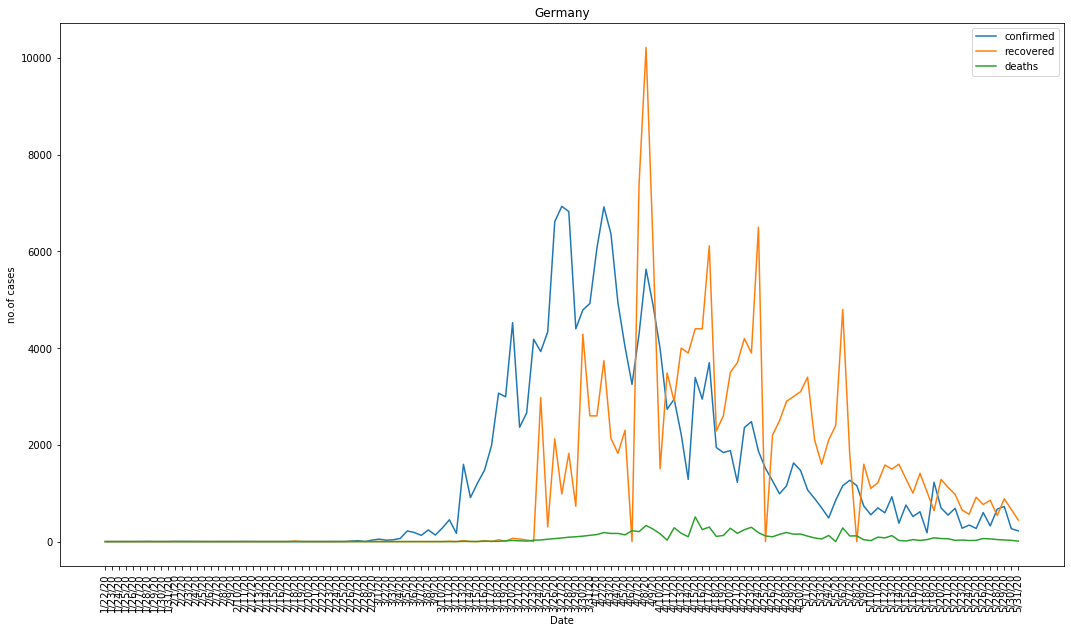

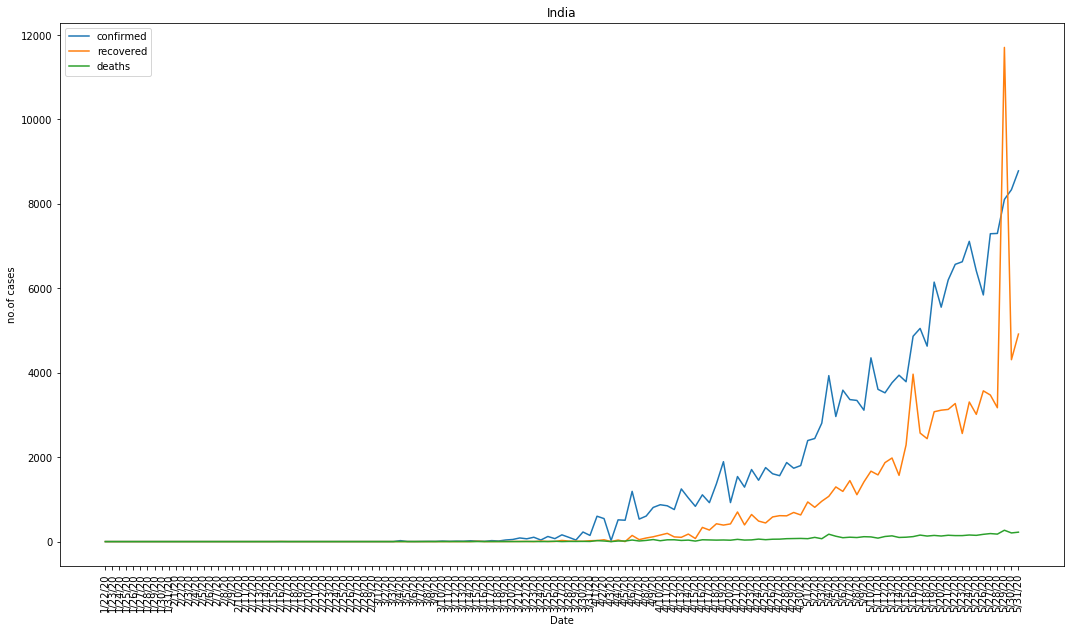

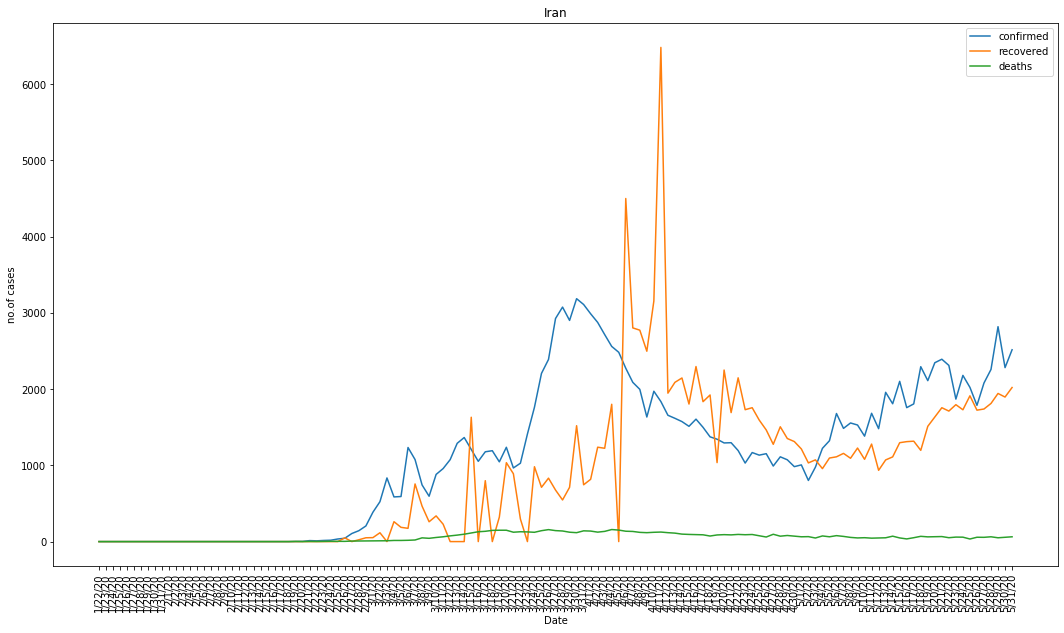

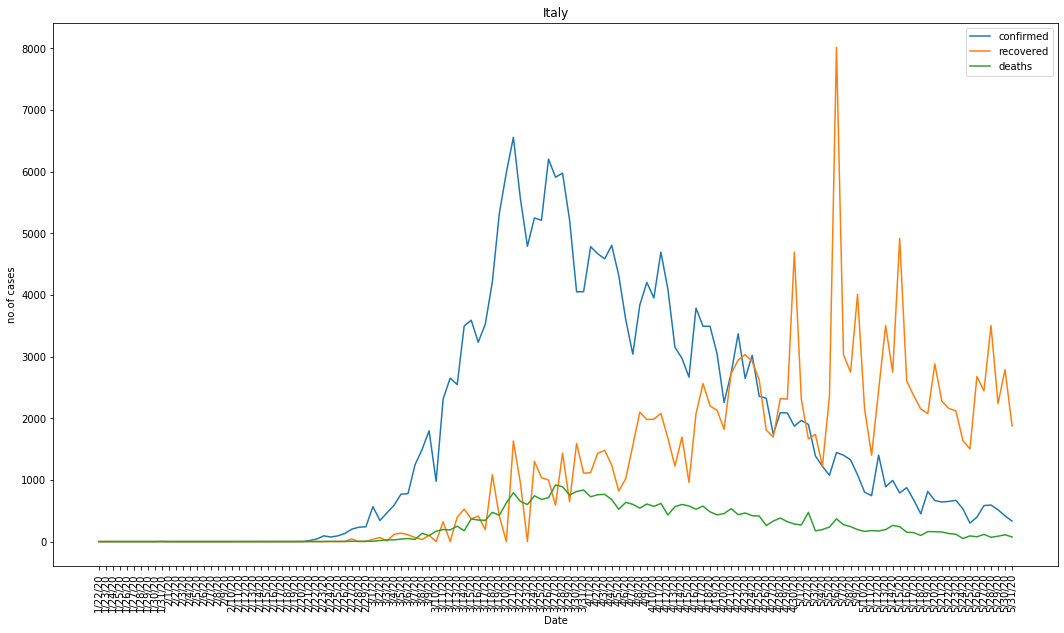

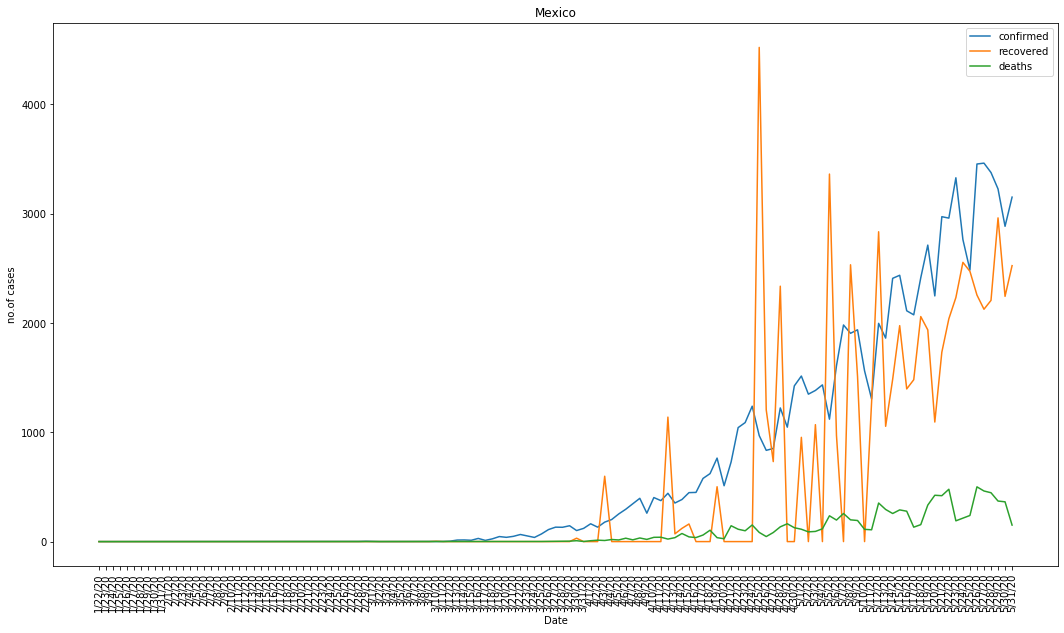

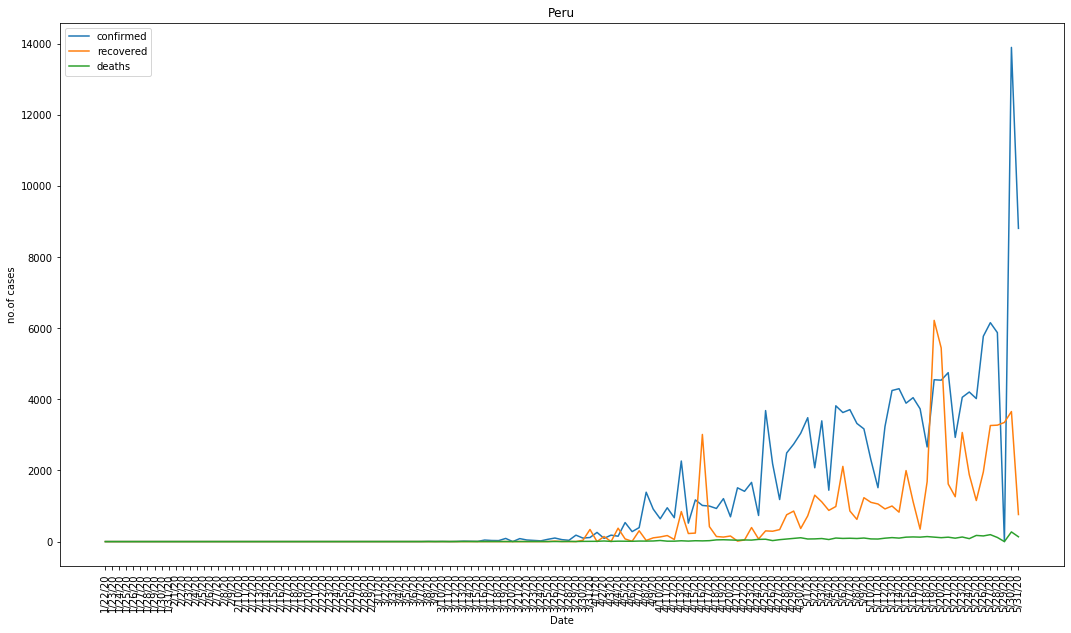

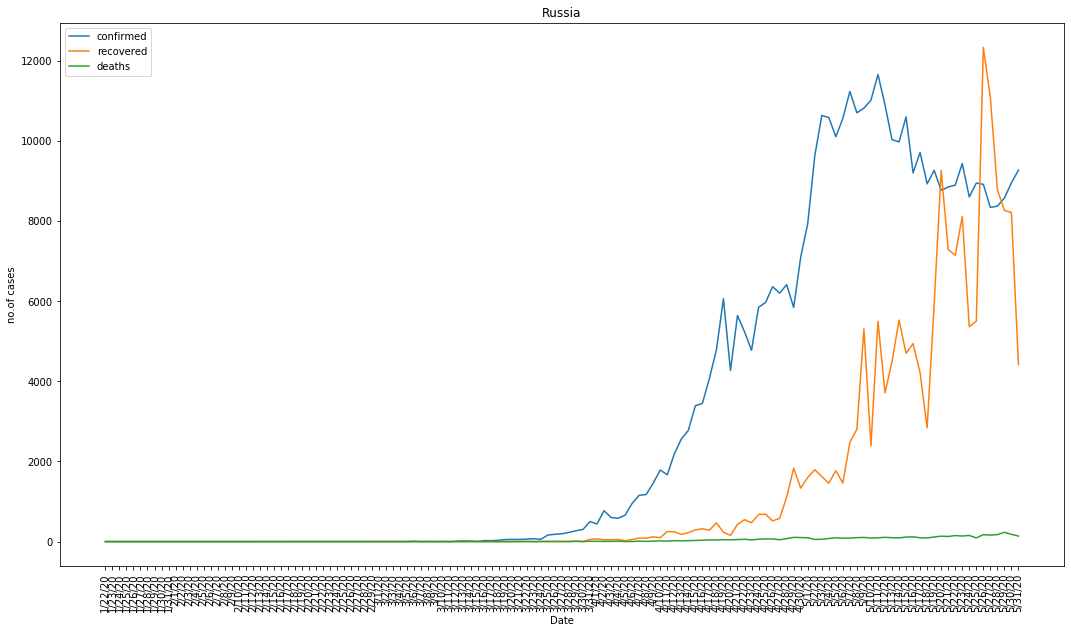

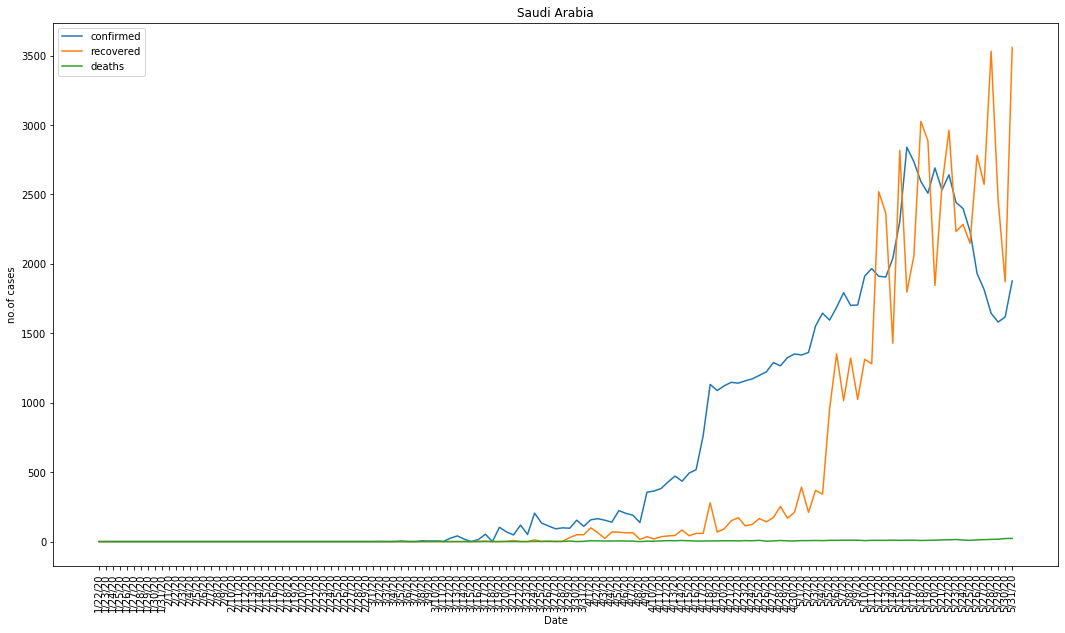

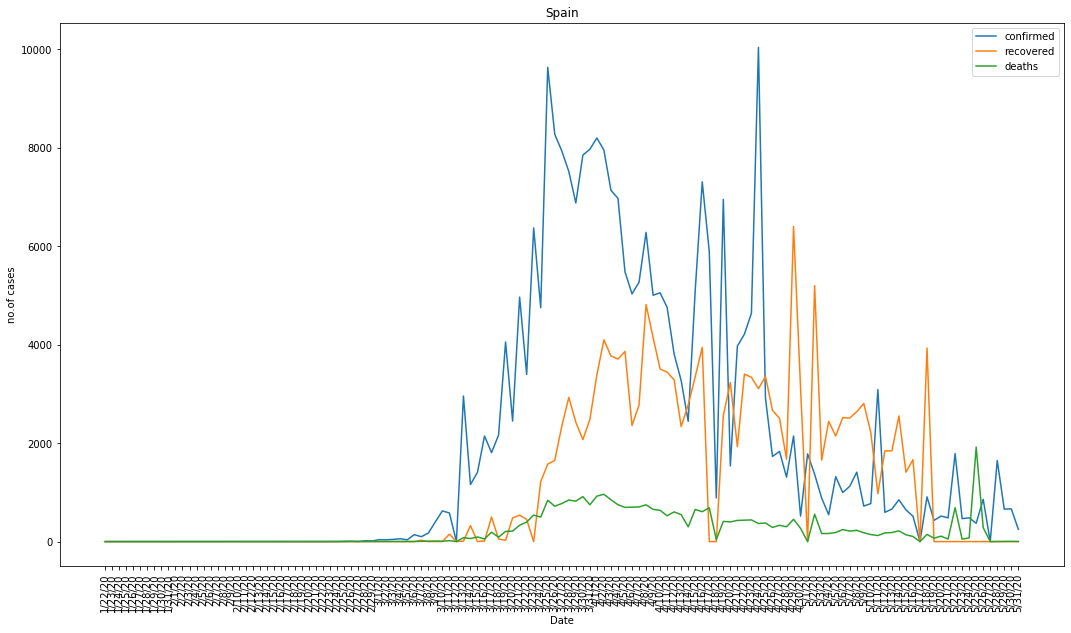

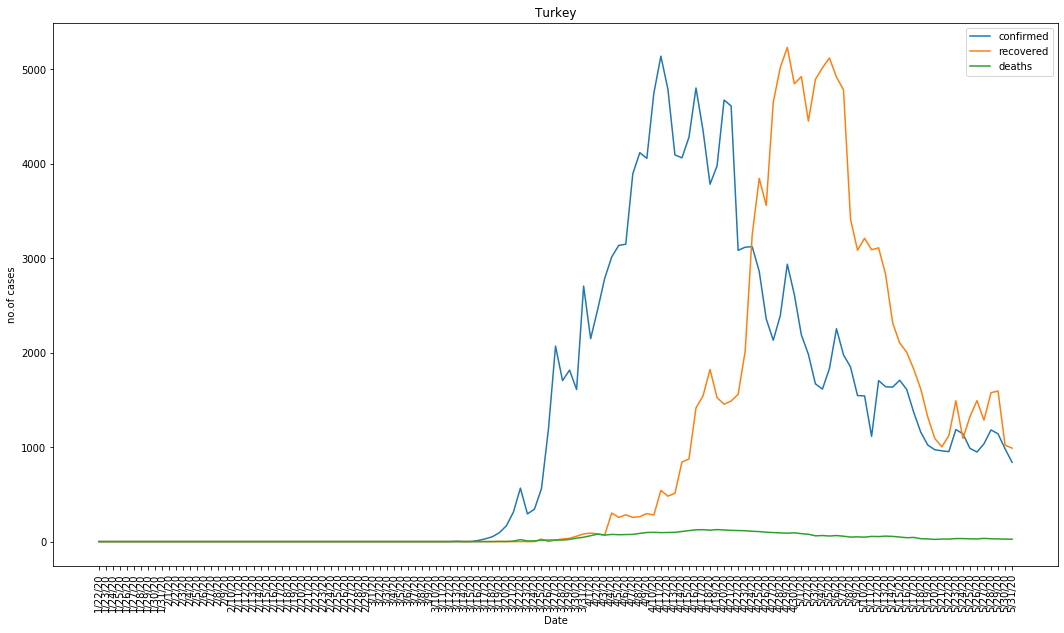

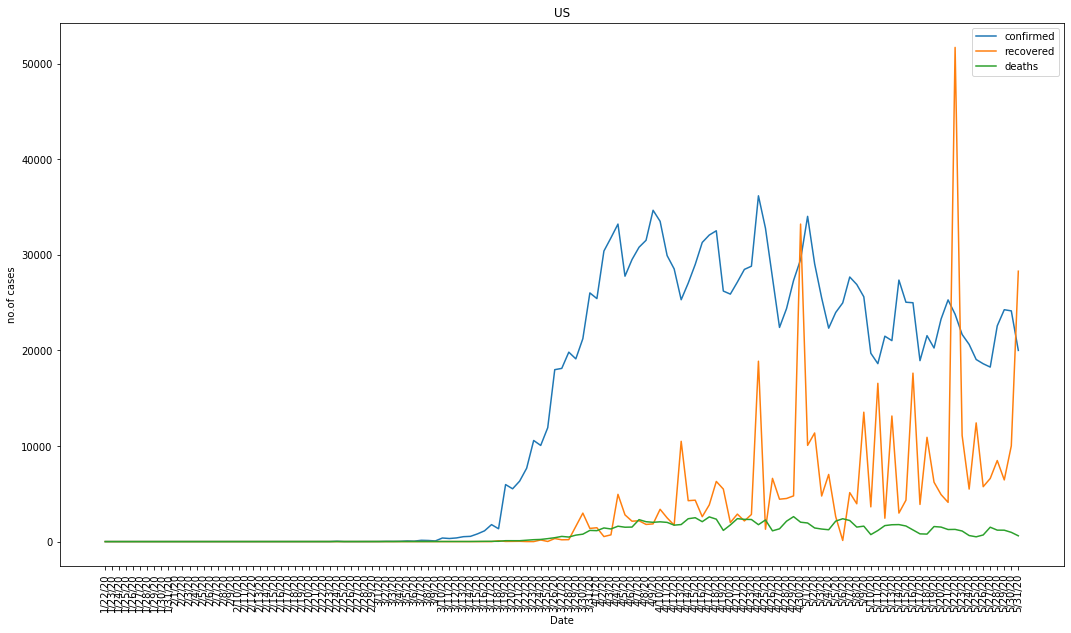

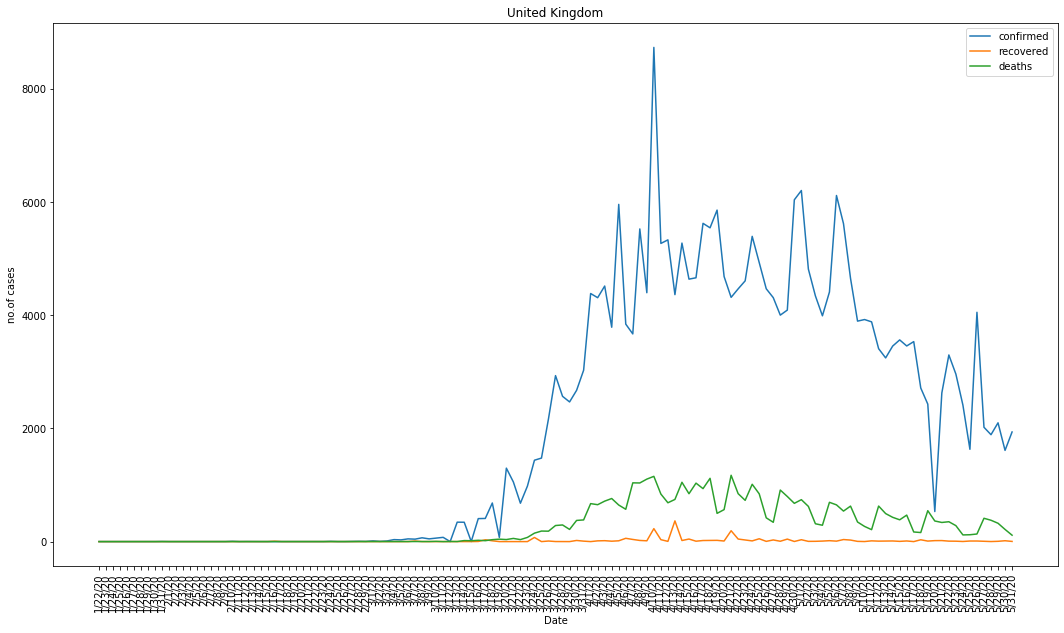

In [25]:
for i in idx:
    plt.figure(figsize=(18,10))
    plt.plot(dates,main_confirmedt.loc[:,i][2:])
    plt.plot(dates,main_recoveredt.loc[:,i][2:])
    plt.plot(dates,main_deathst.loc[:,i][2:])
    plt.xticks(rotation=90);
    plt.legend(['confirmed','recovered','deaths'])
    plt.xlabel('Date')
    plt.ylabel('no.of cases')
    plt.title(i);

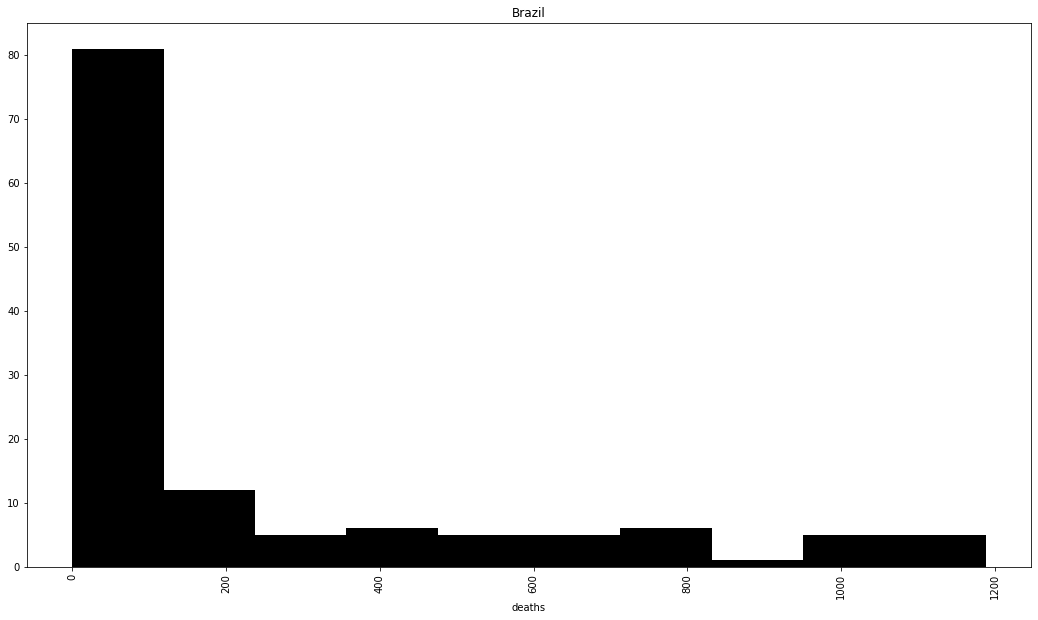

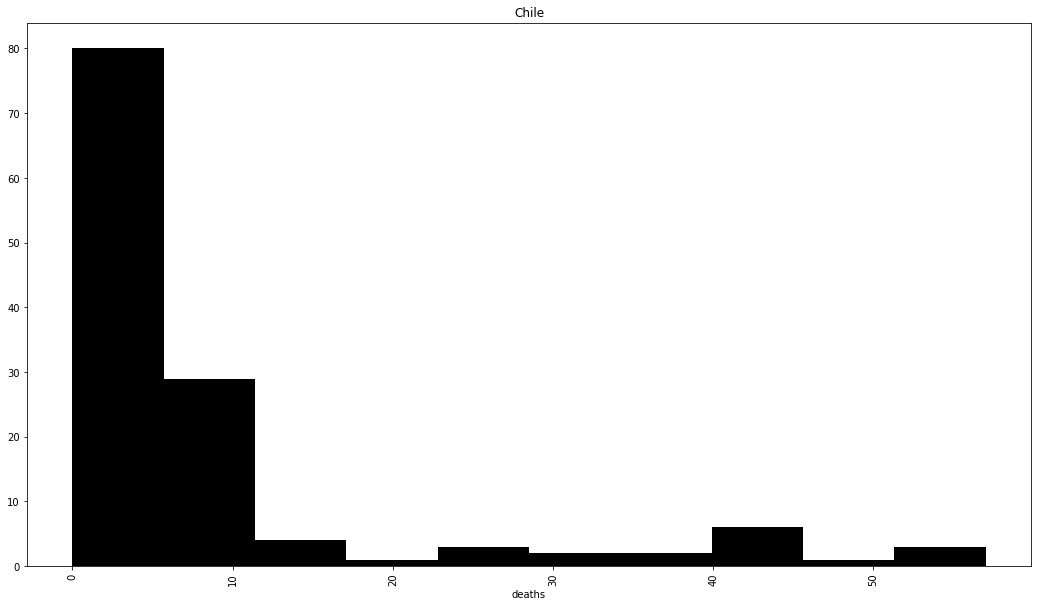

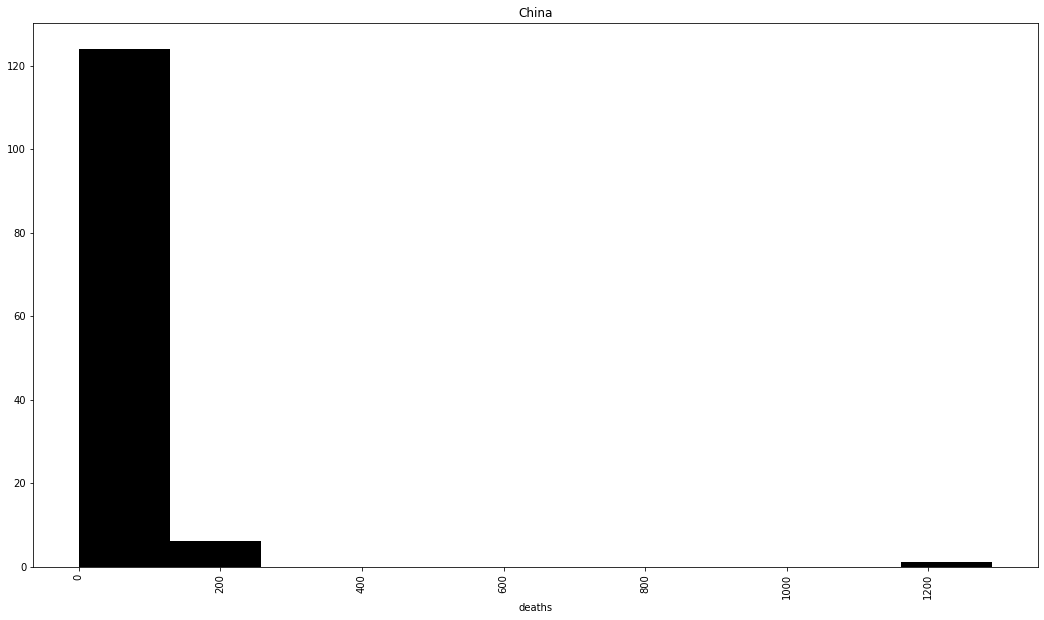

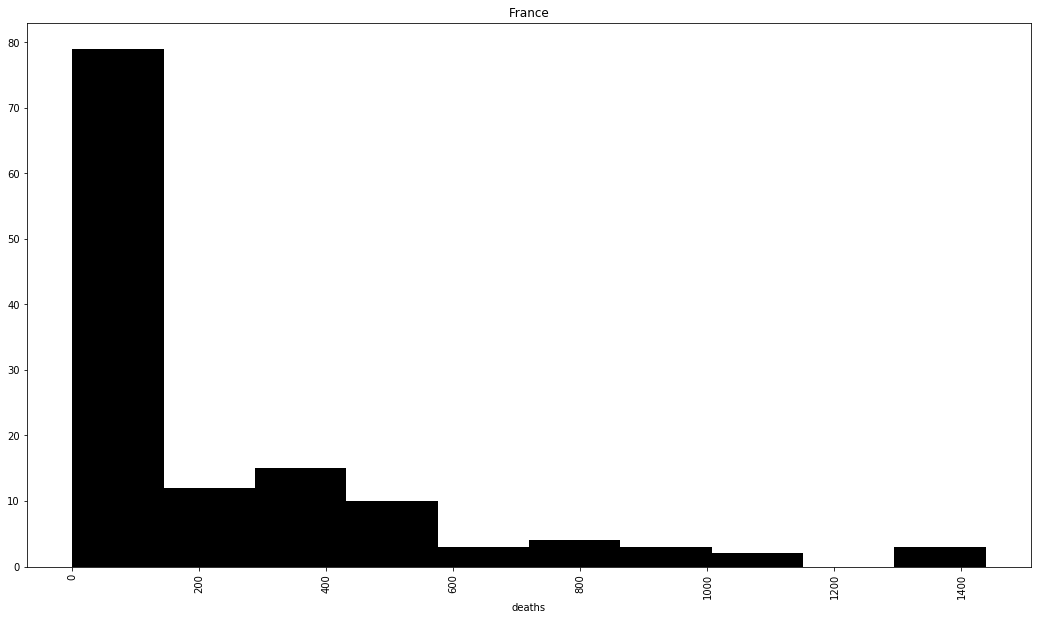

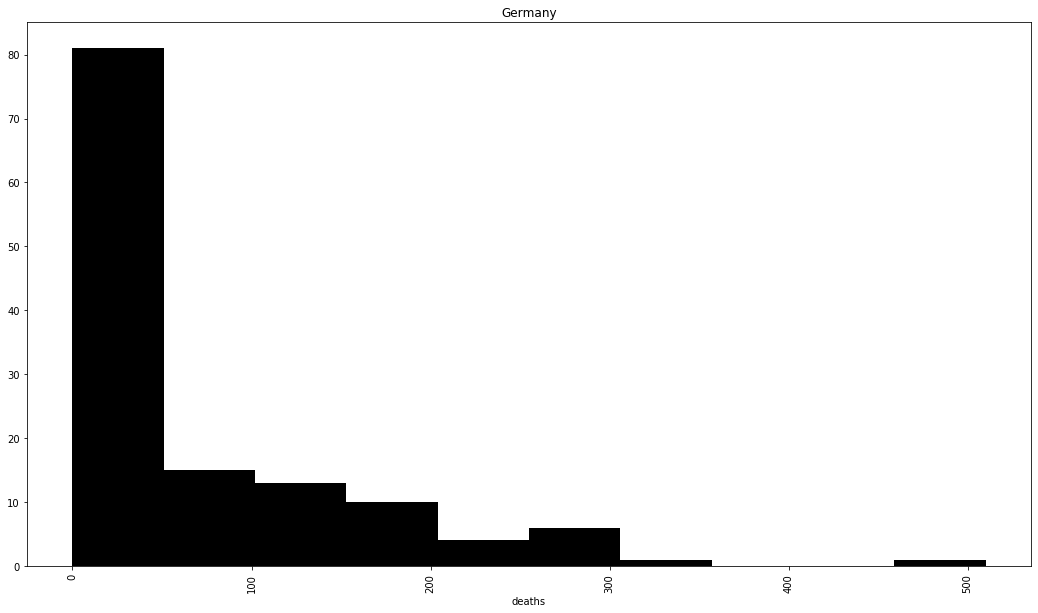

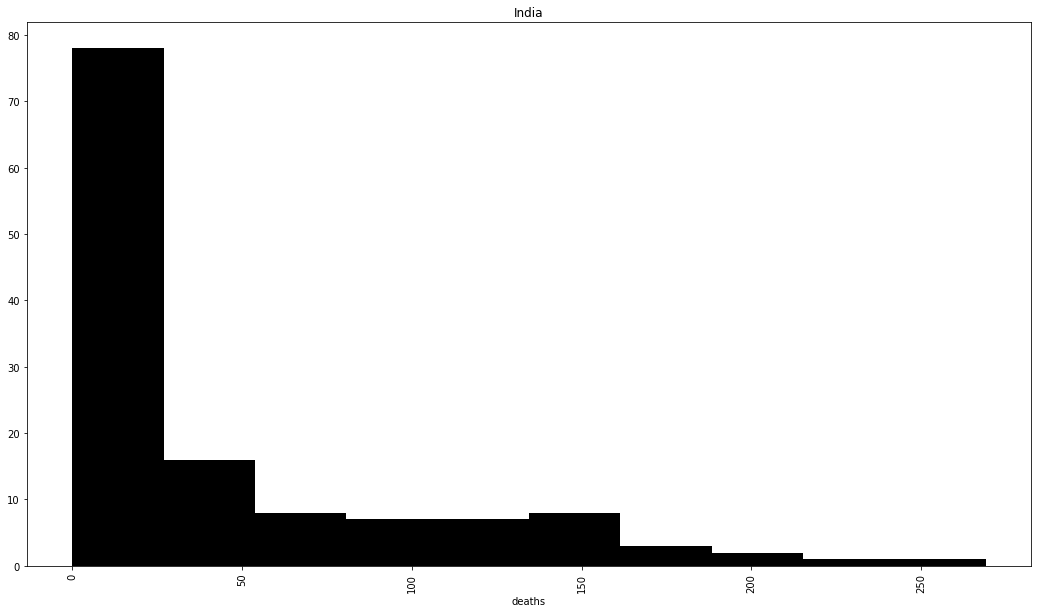

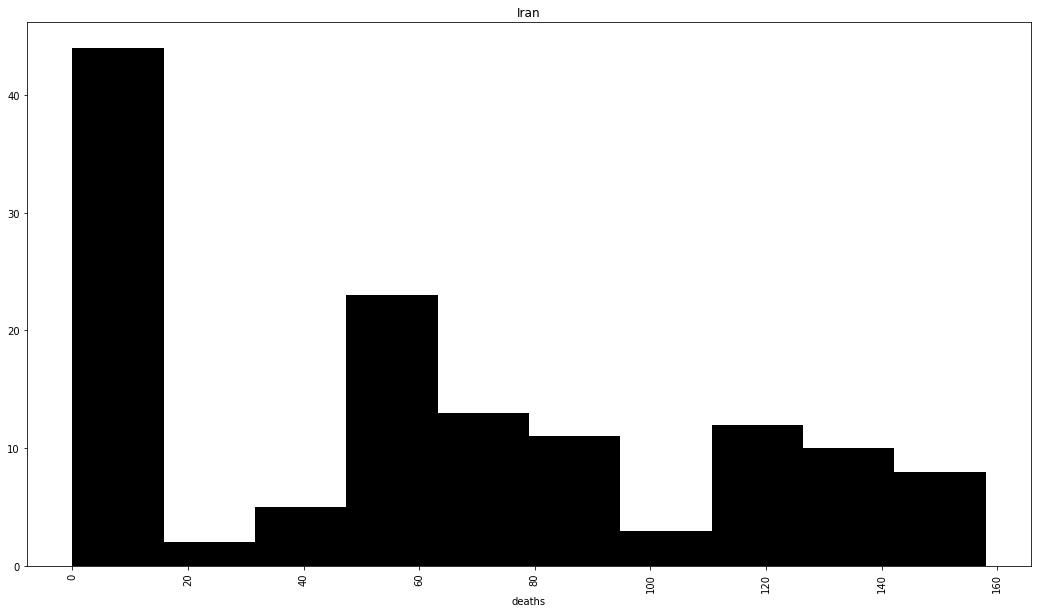

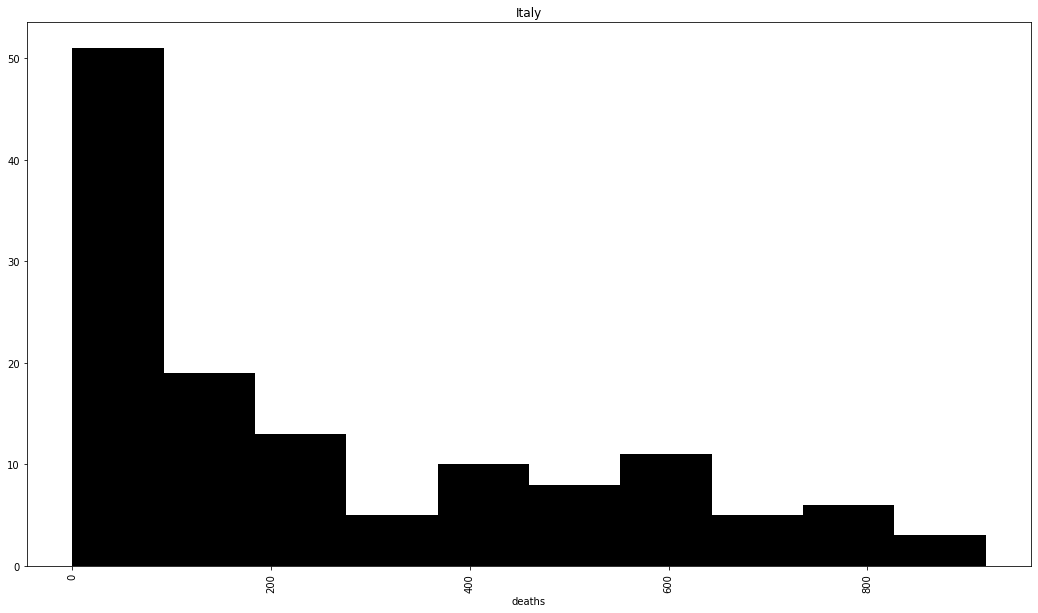

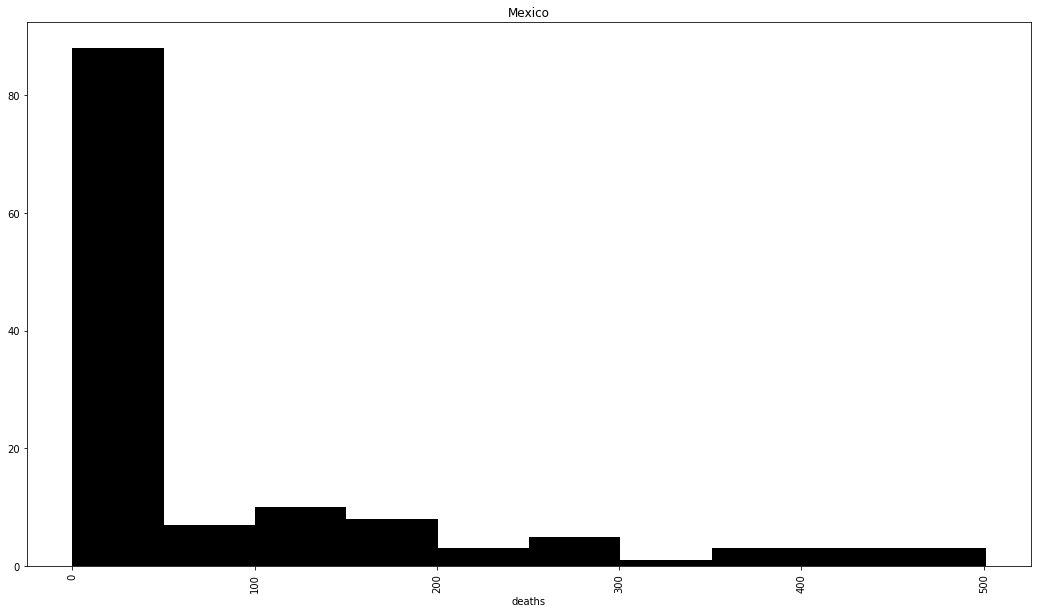

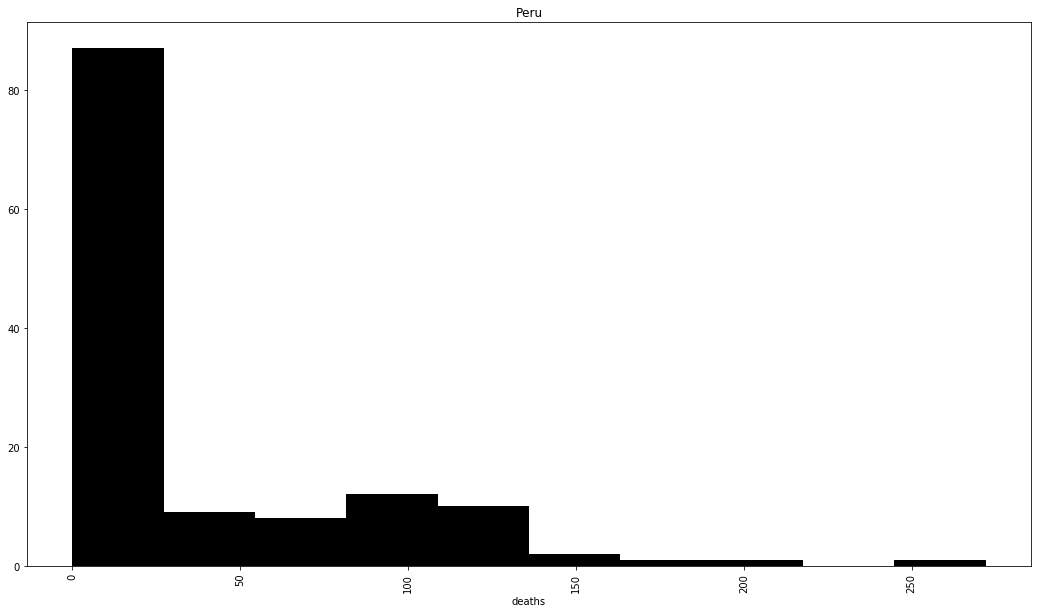

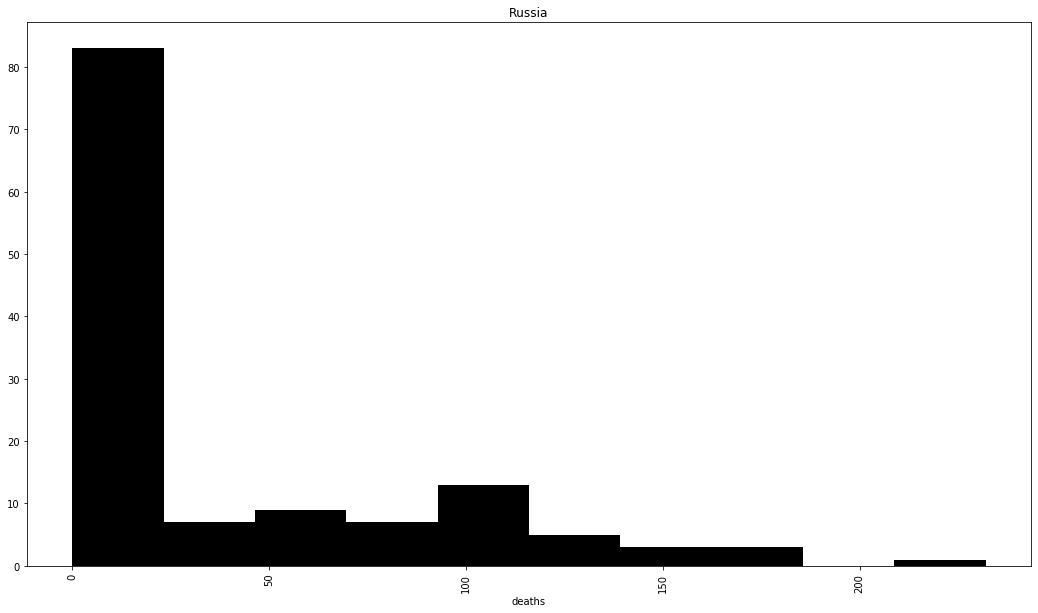

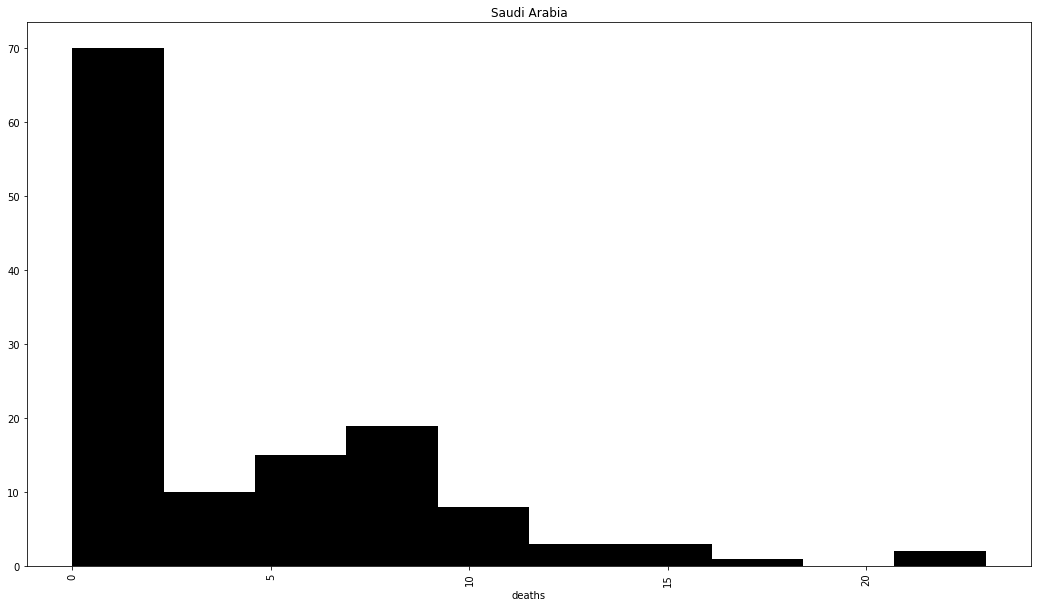

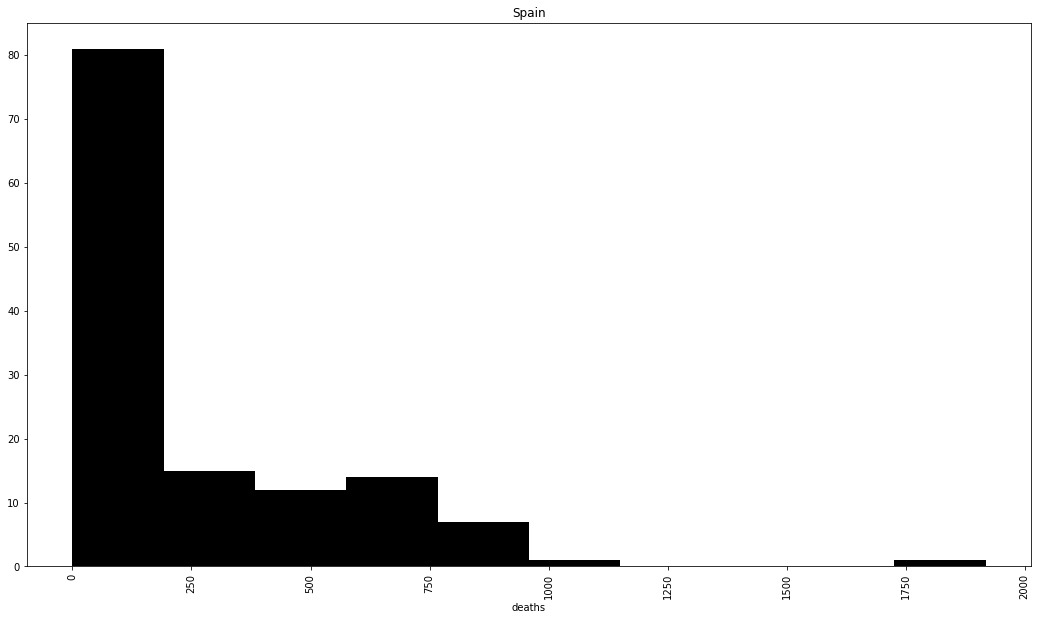

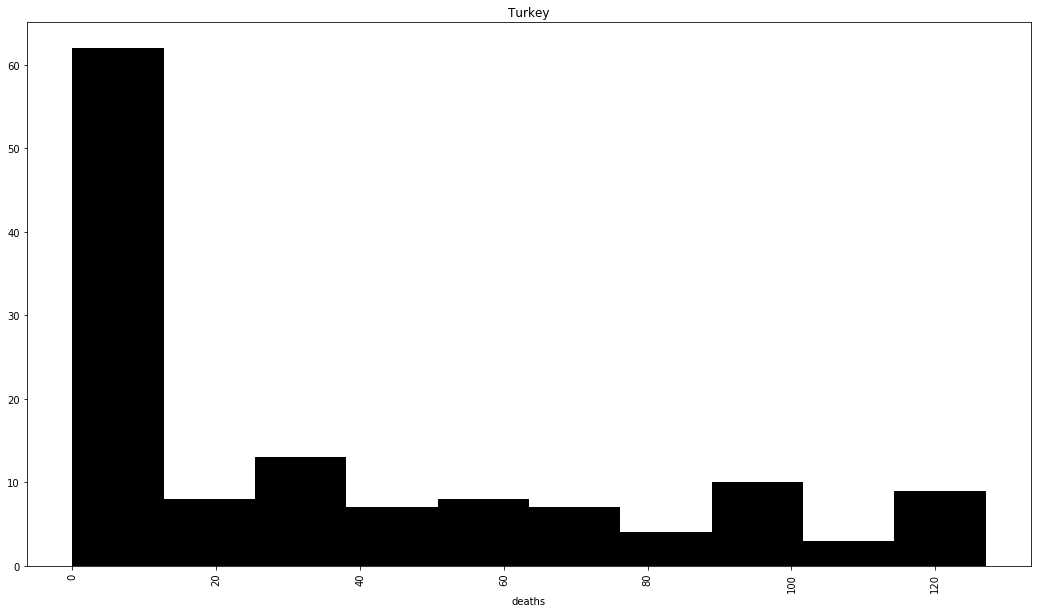

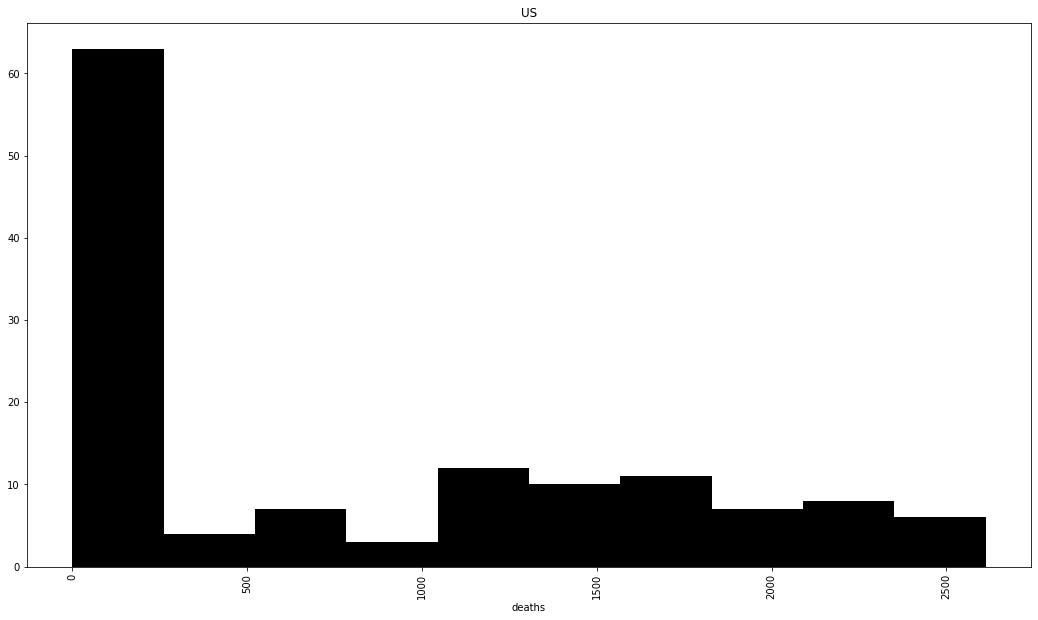

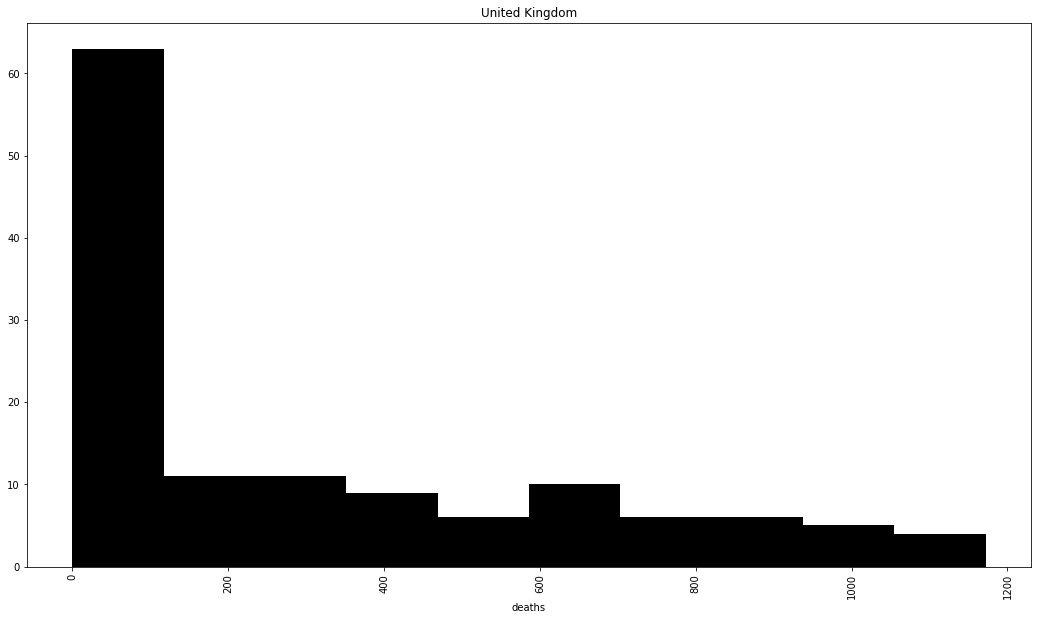

In [26]:
for i in idx:
    plt.figure(figsize=(18,10))
    plt.hist(main_deathst.loc[:,i][2:],color = 'black')
    plt.xticks(rotation=90);
    plt.xlabel('deaths')
    plt.title(i);

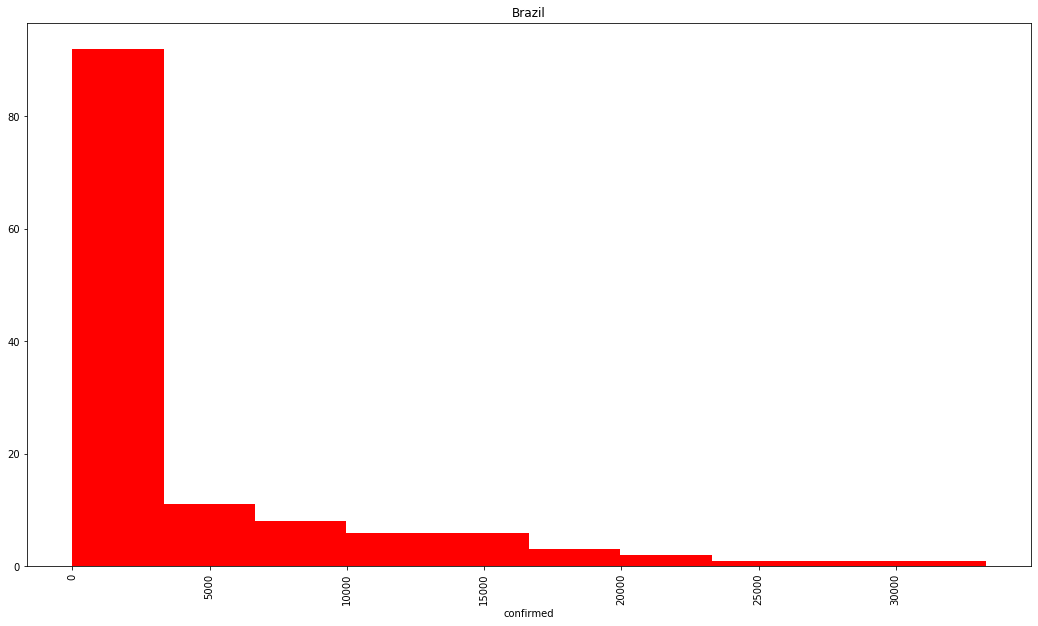

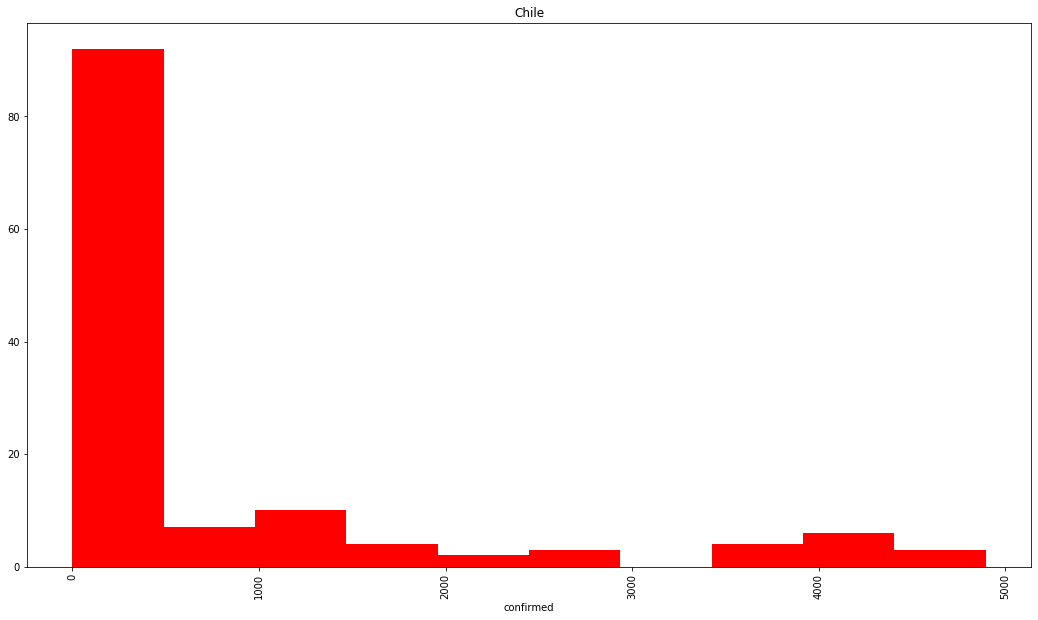

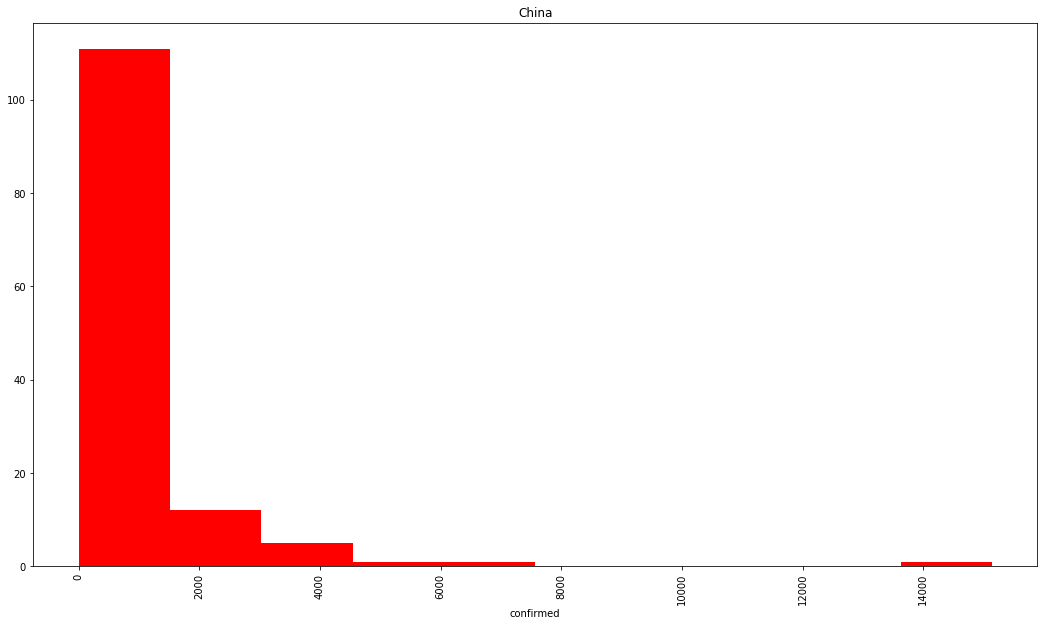

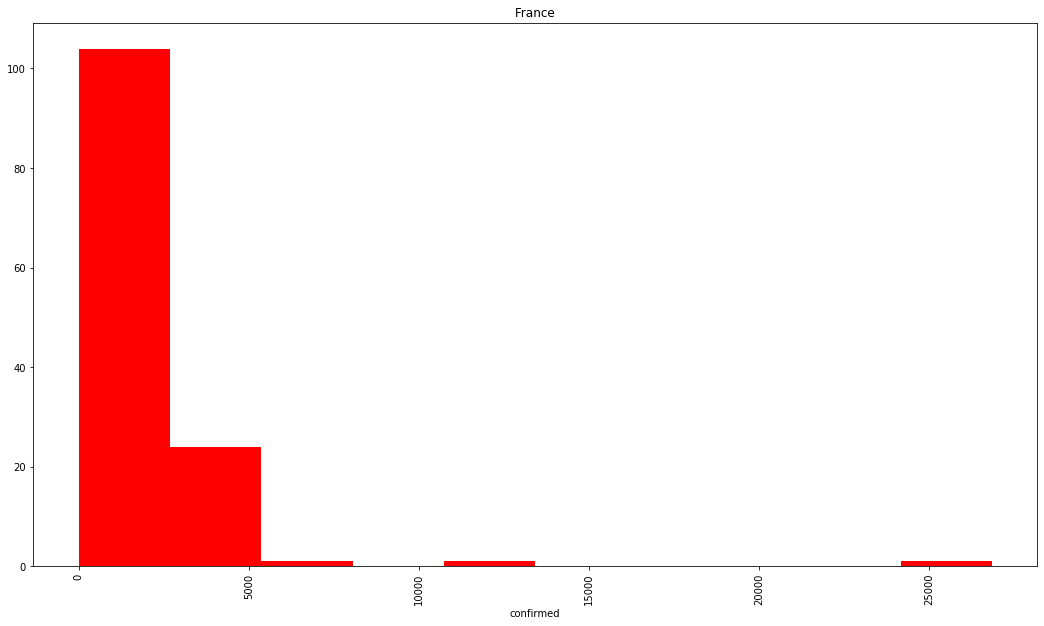

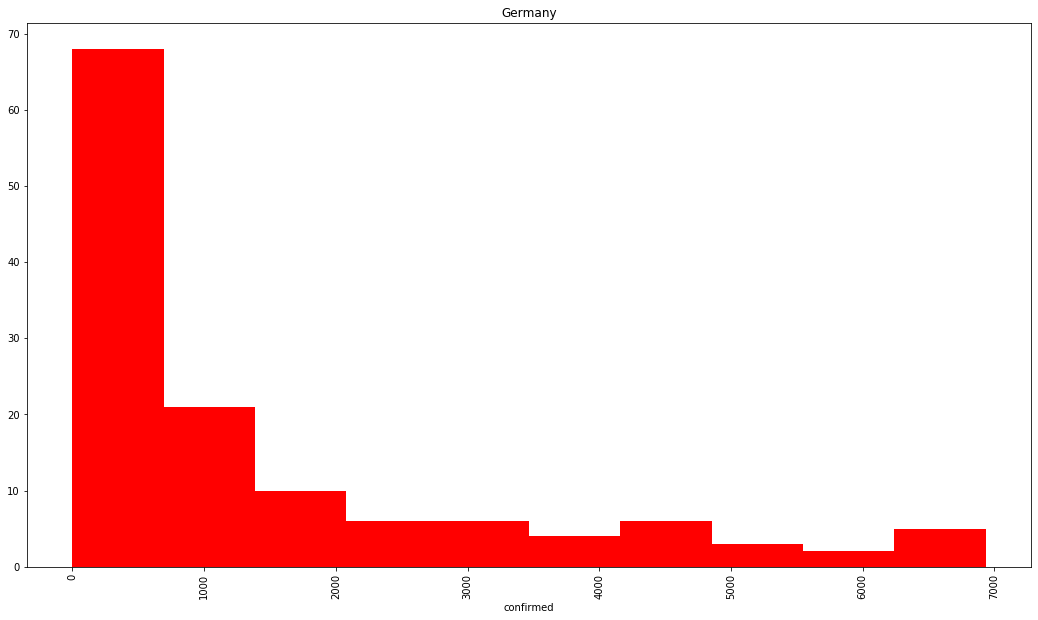

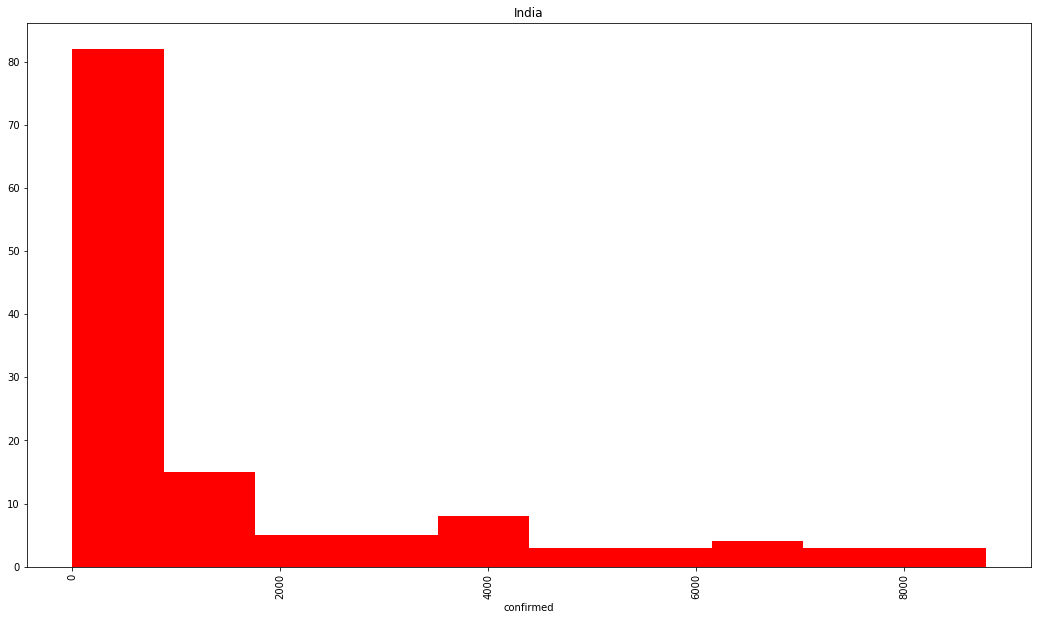

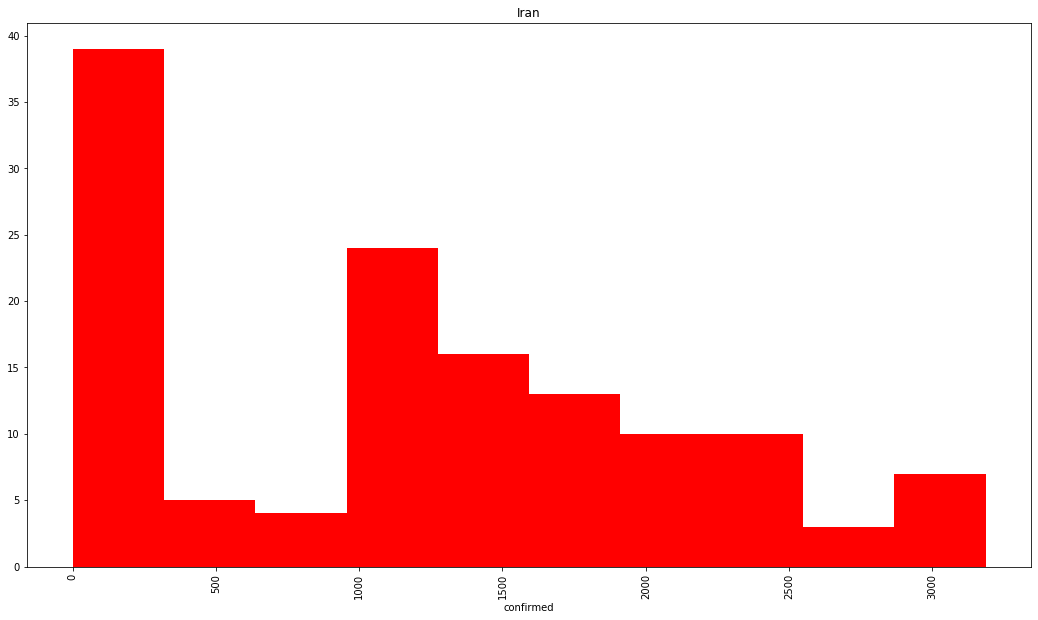

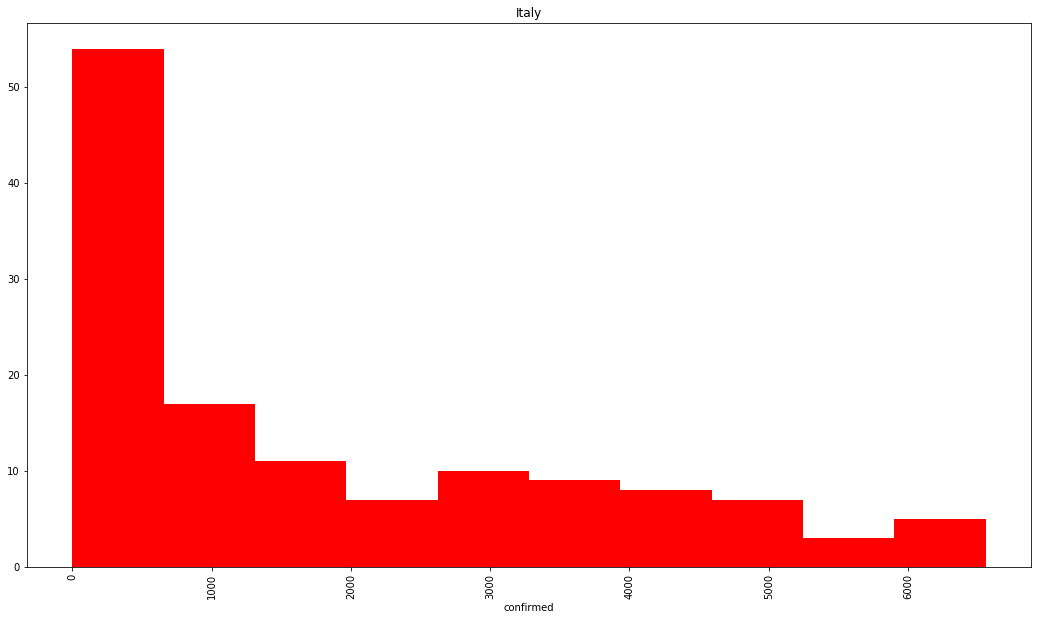

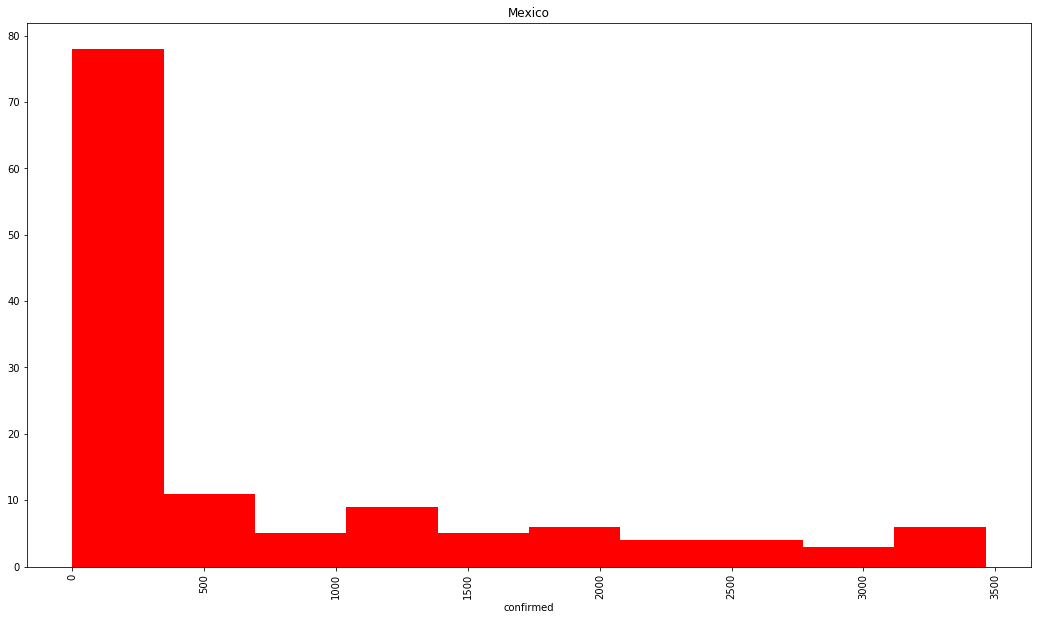

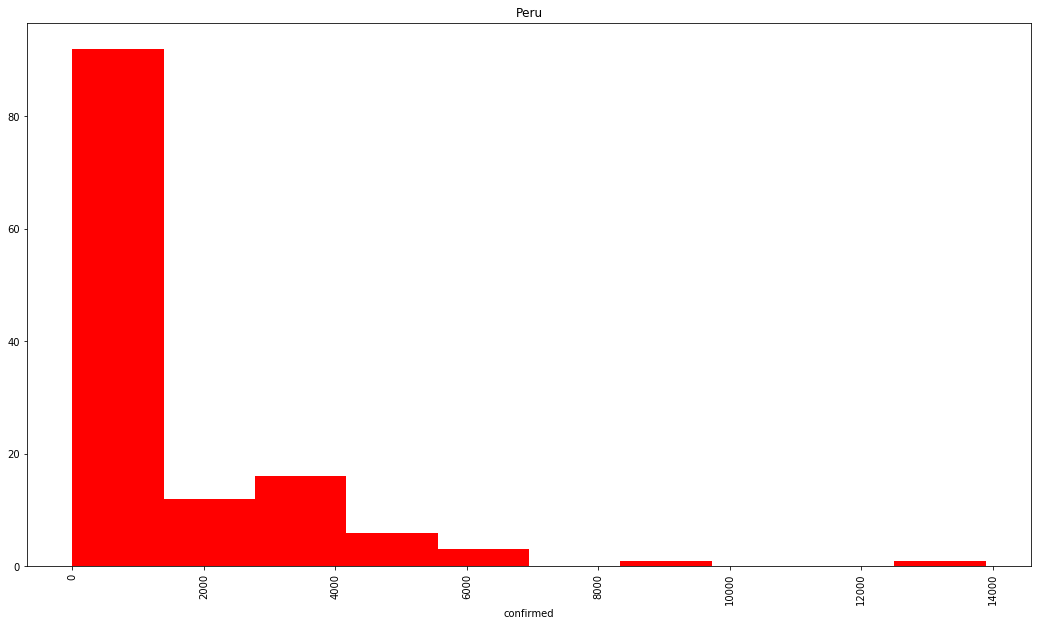

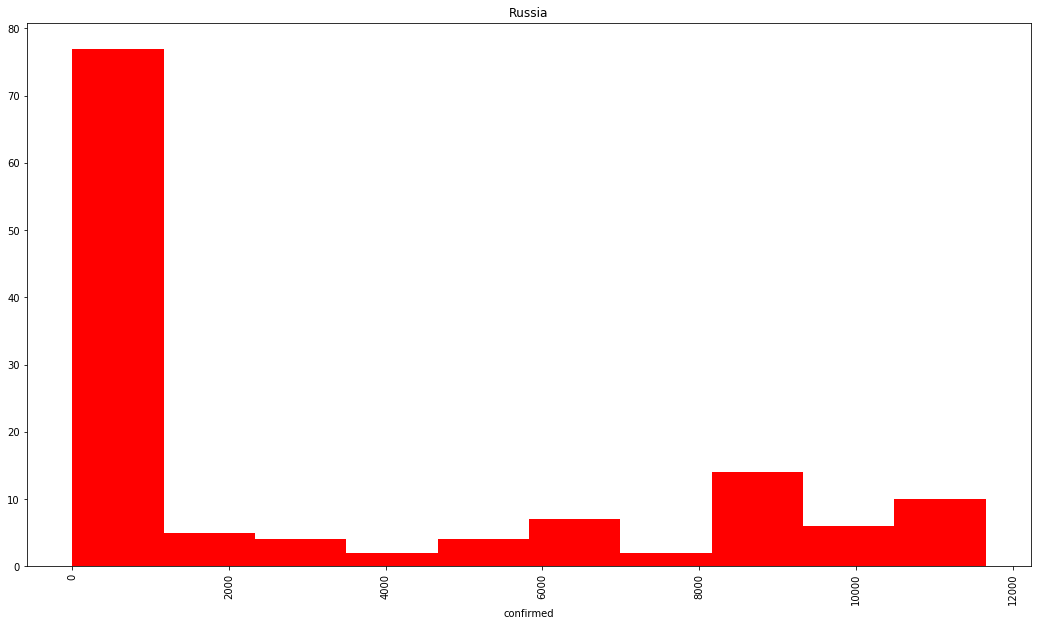

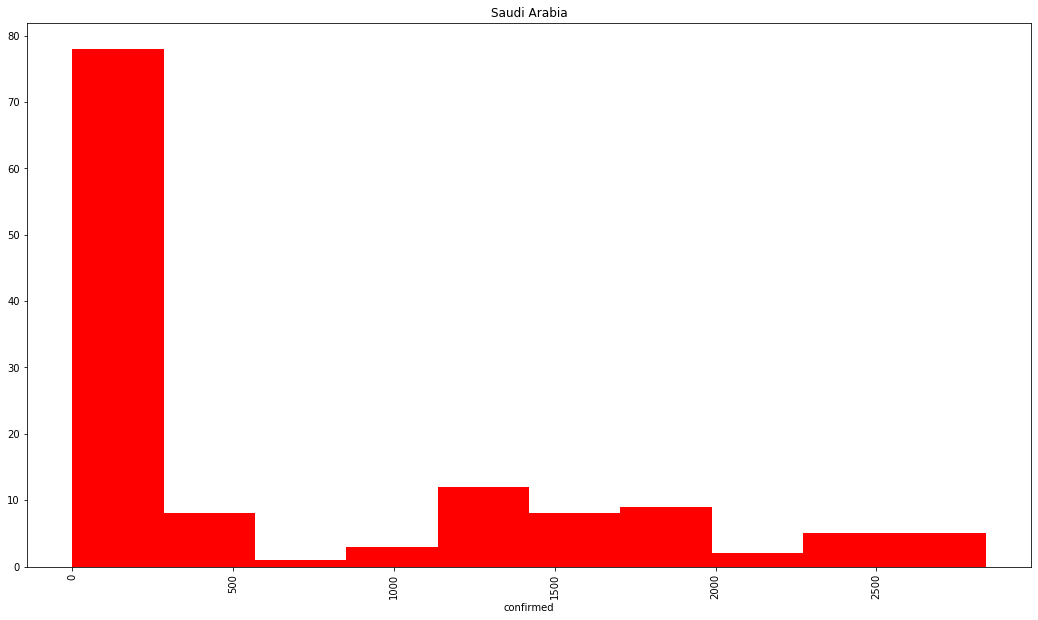

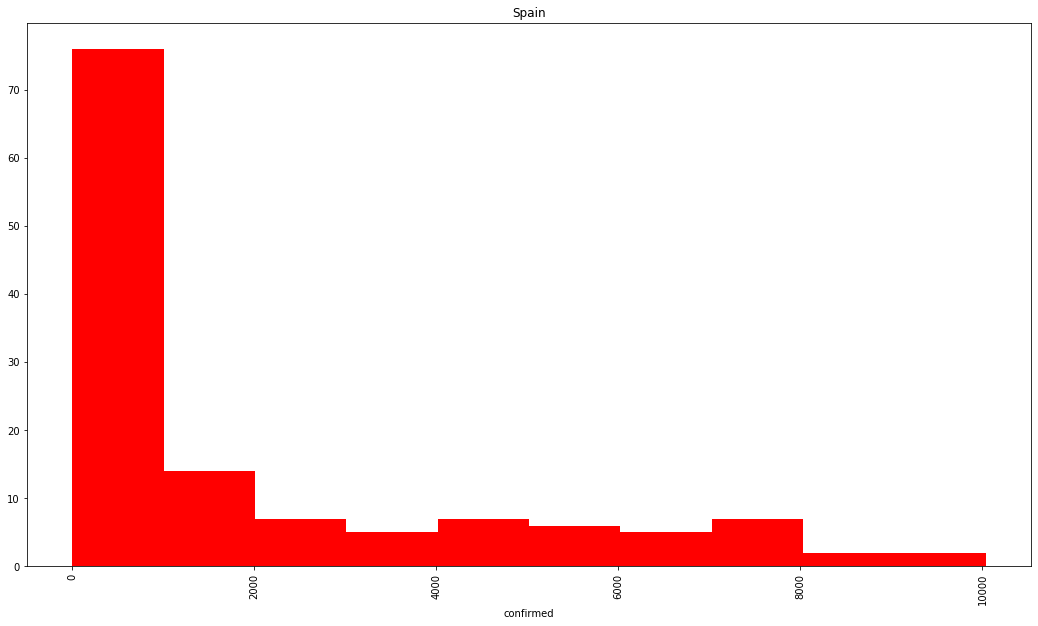

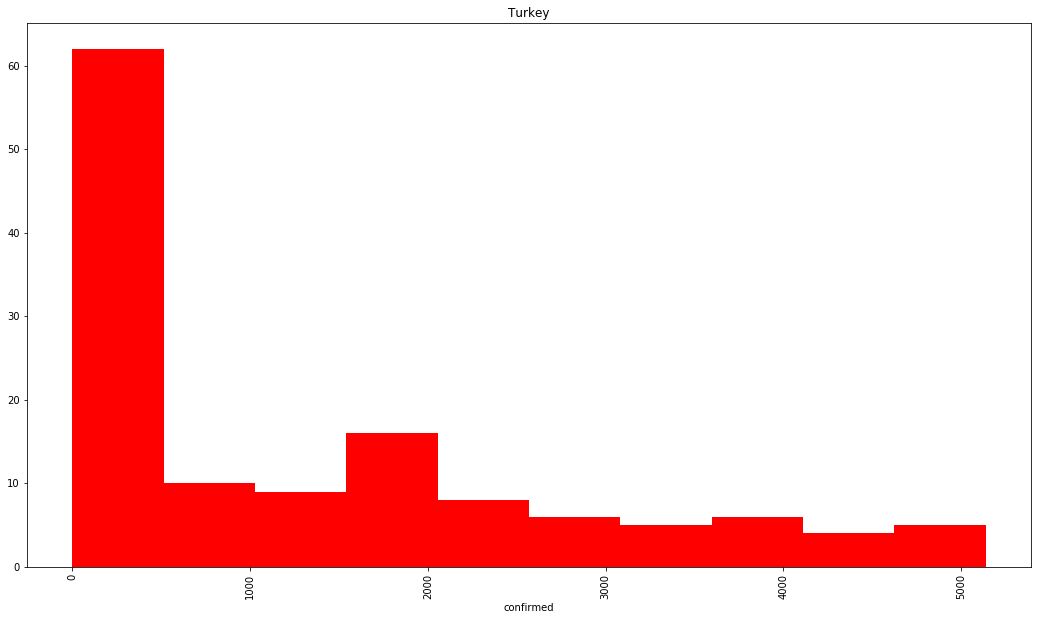

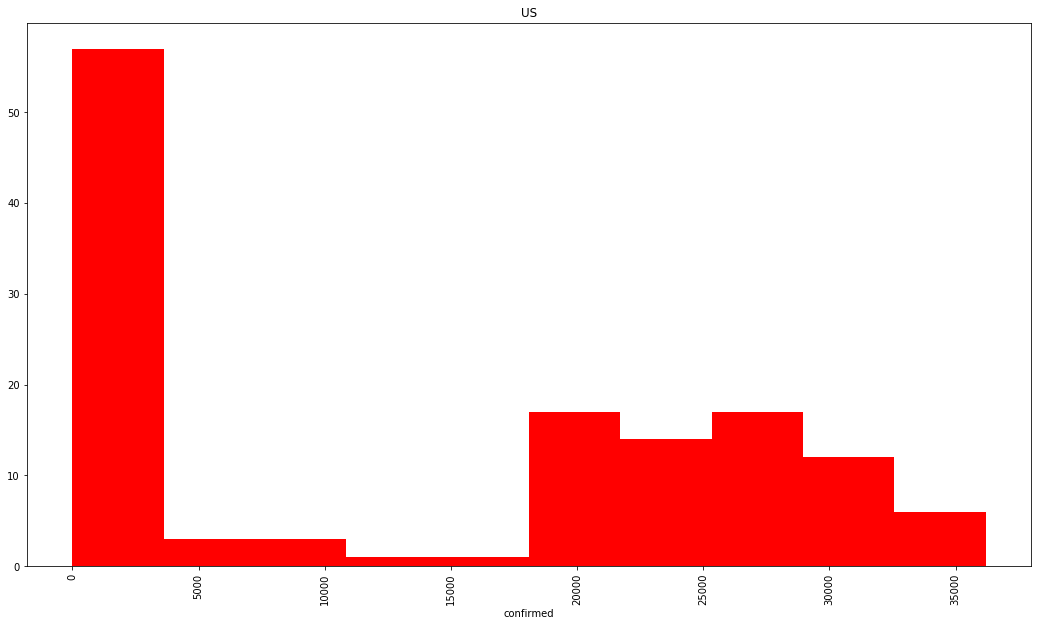

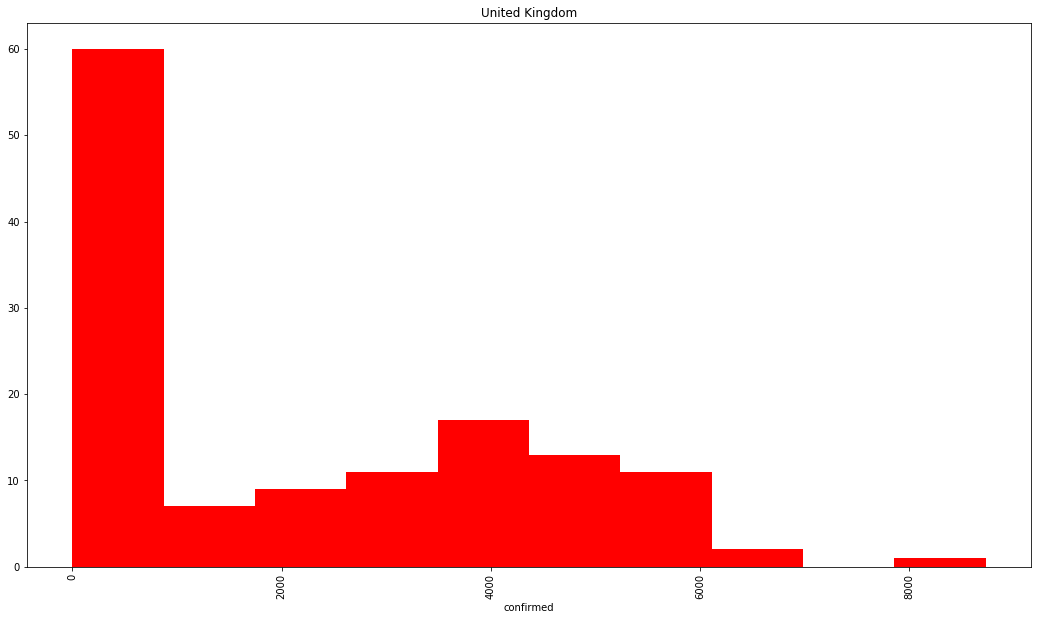

In [27]:
for i in idx:
    plt.figure(figsize=(18,10))
    plt.hist(main_confirmedt.loc[:,i][2:],color = 'red')
    plt.xticks(rotation=90);
    plt.xlabel('confirmed')
    plt.title(i);

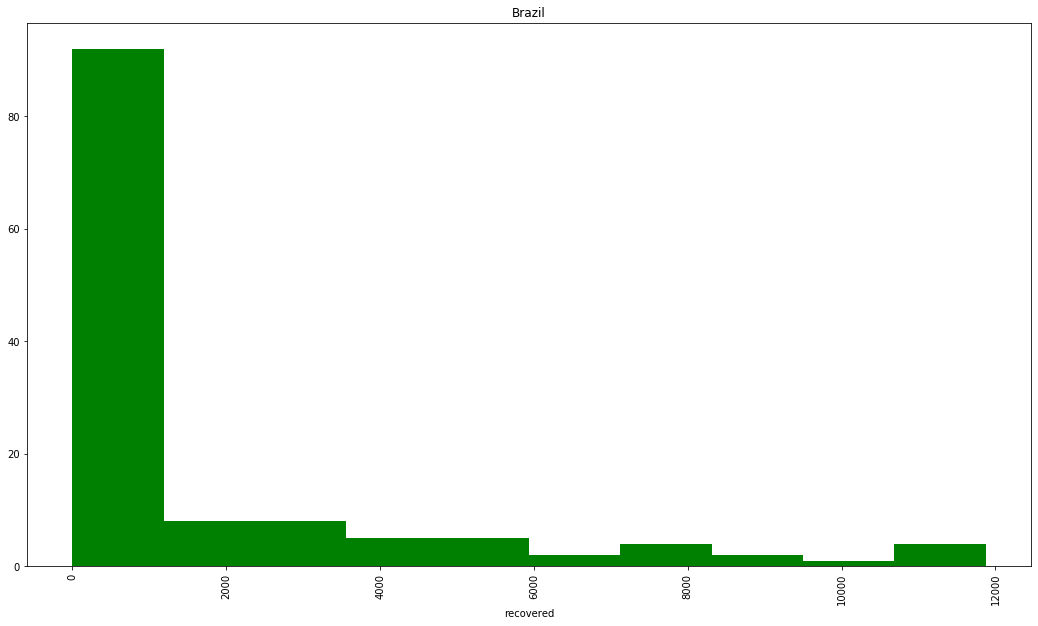

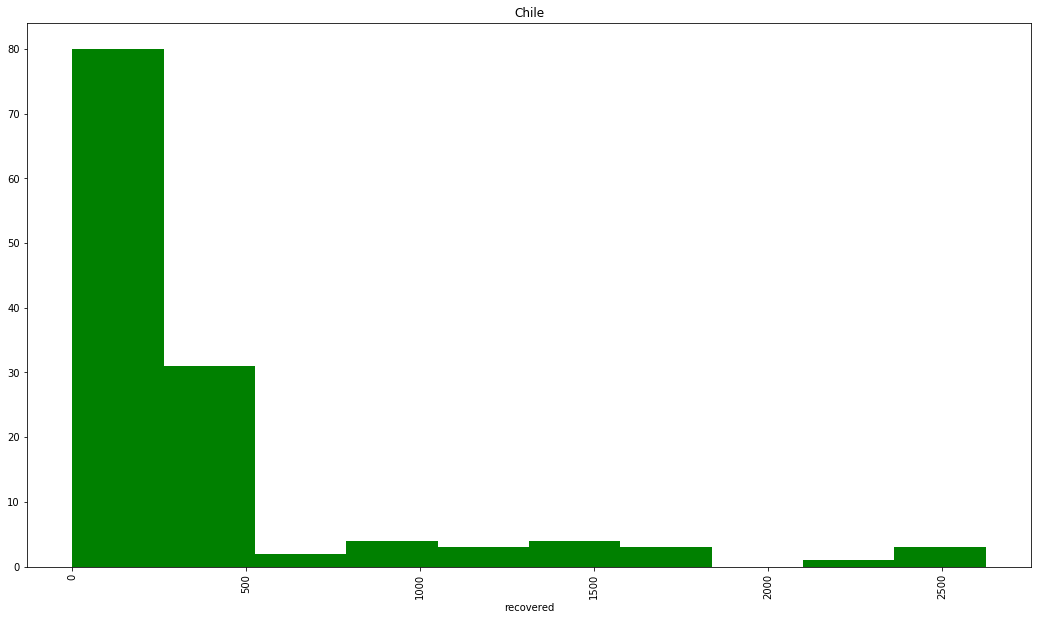

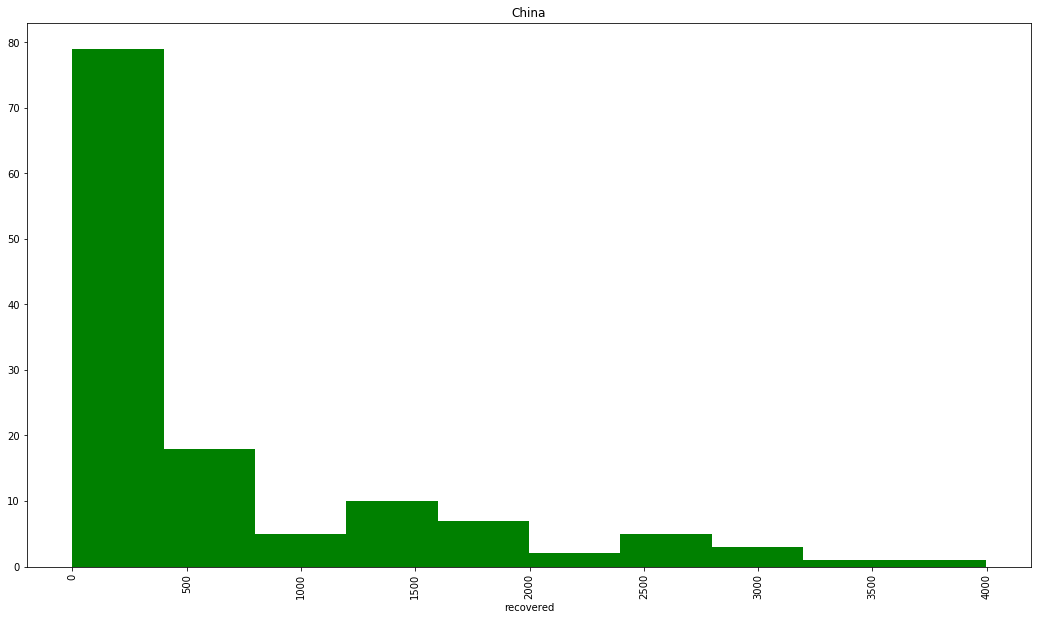

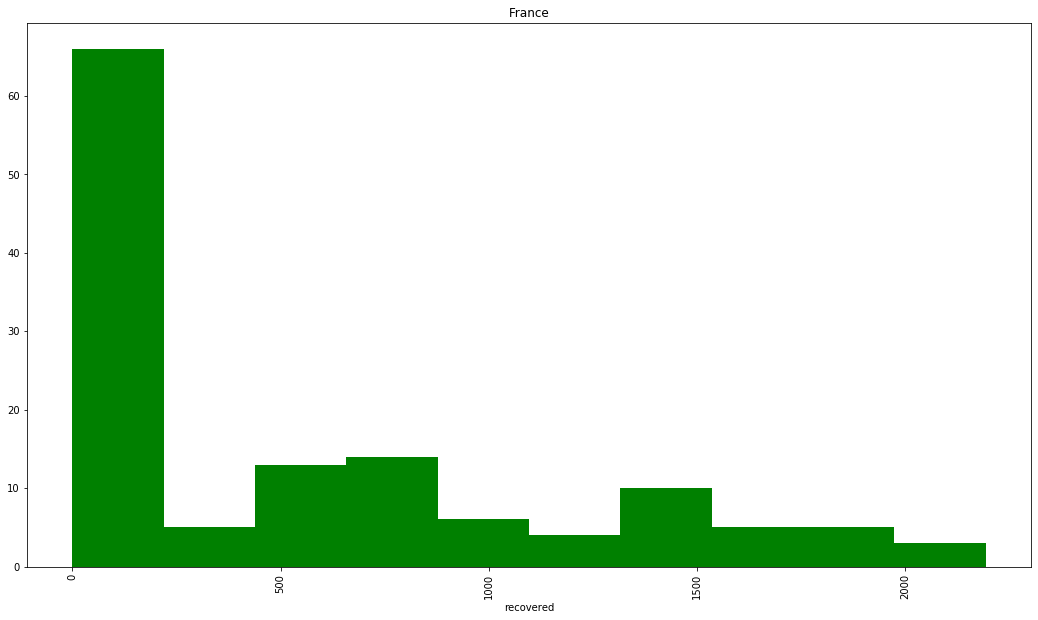

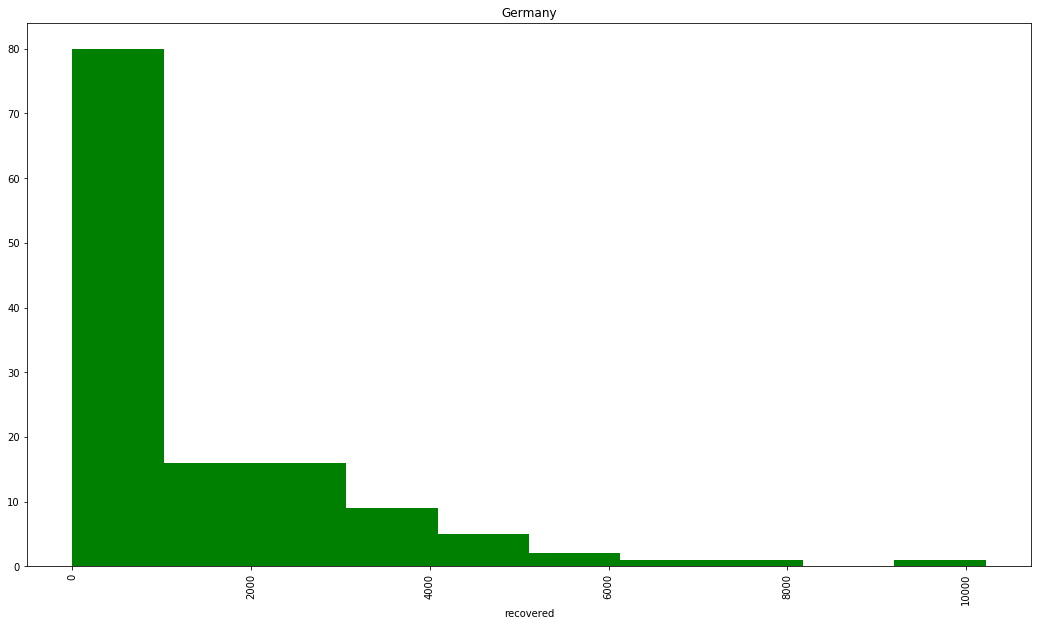

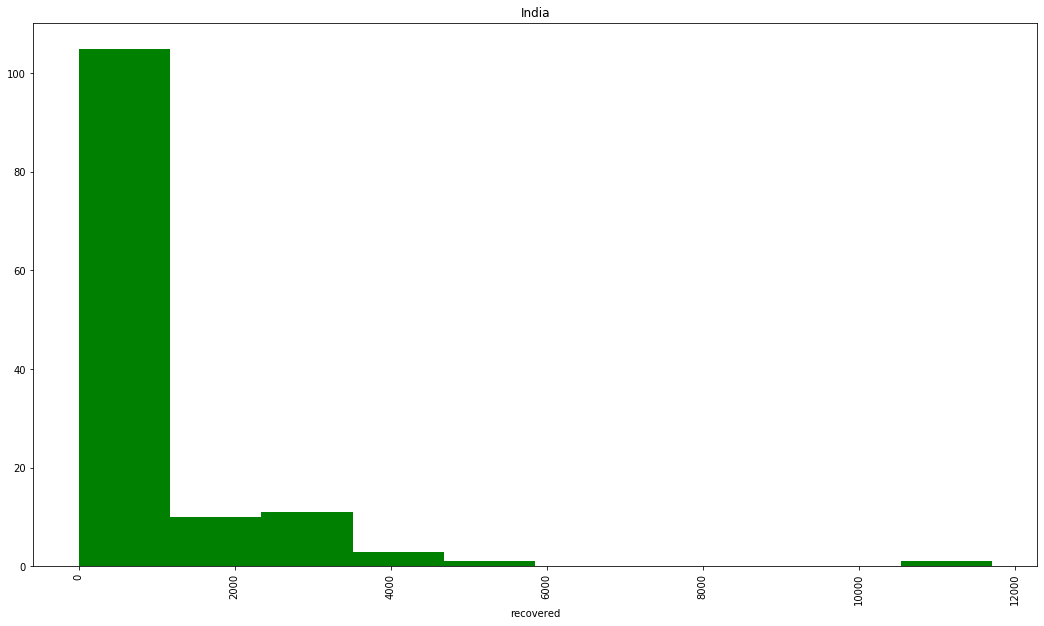

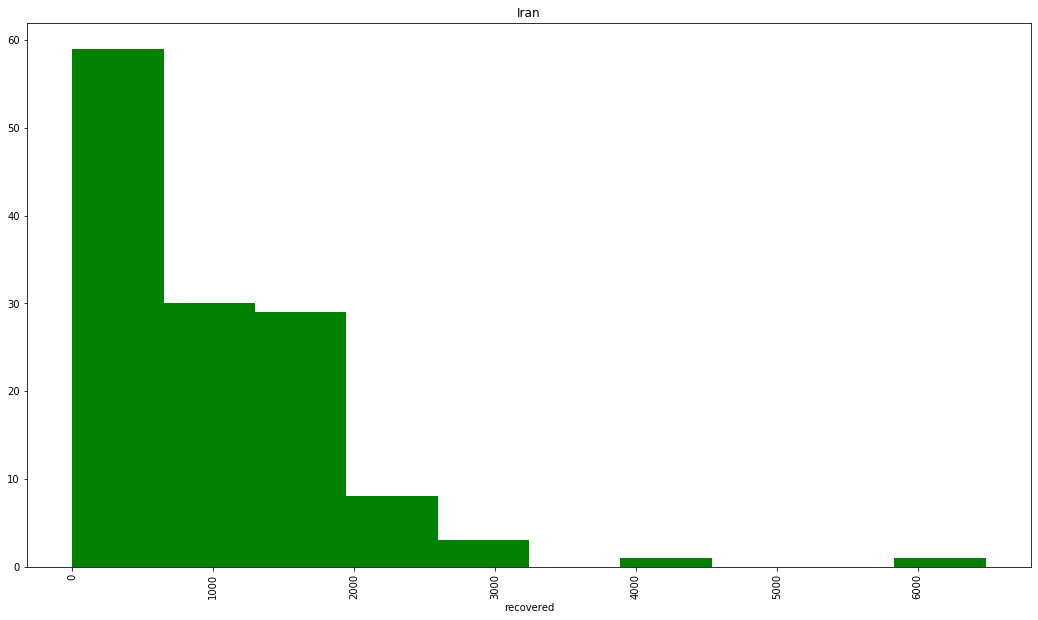

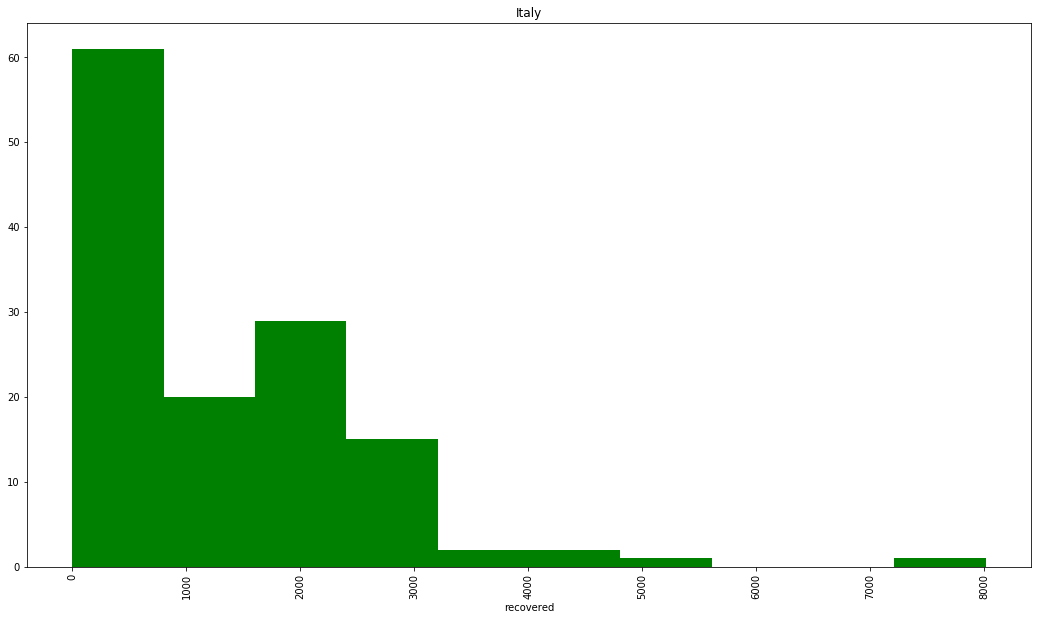

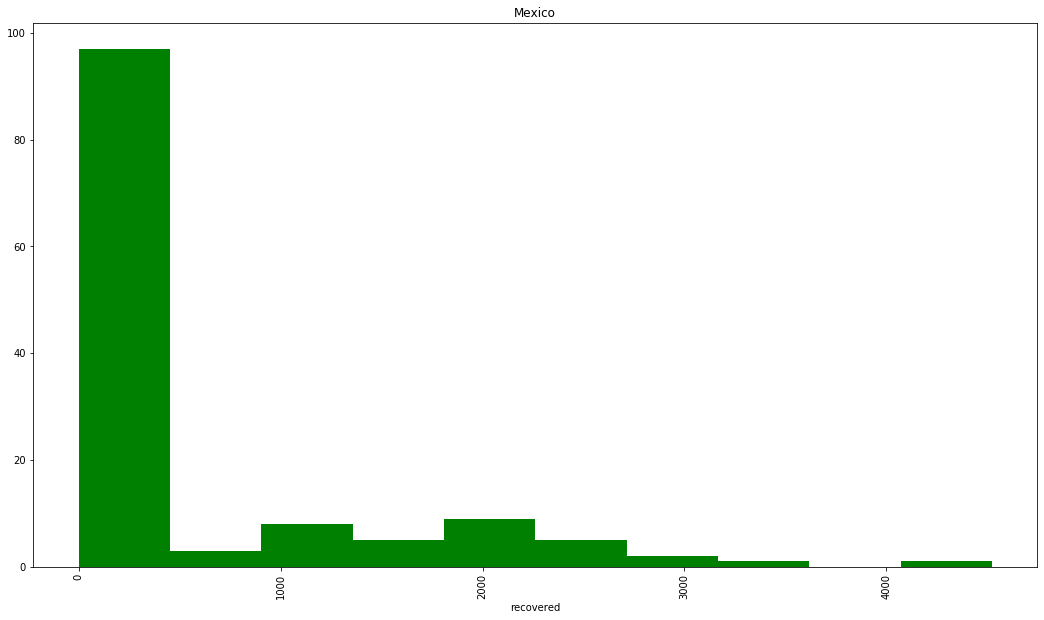

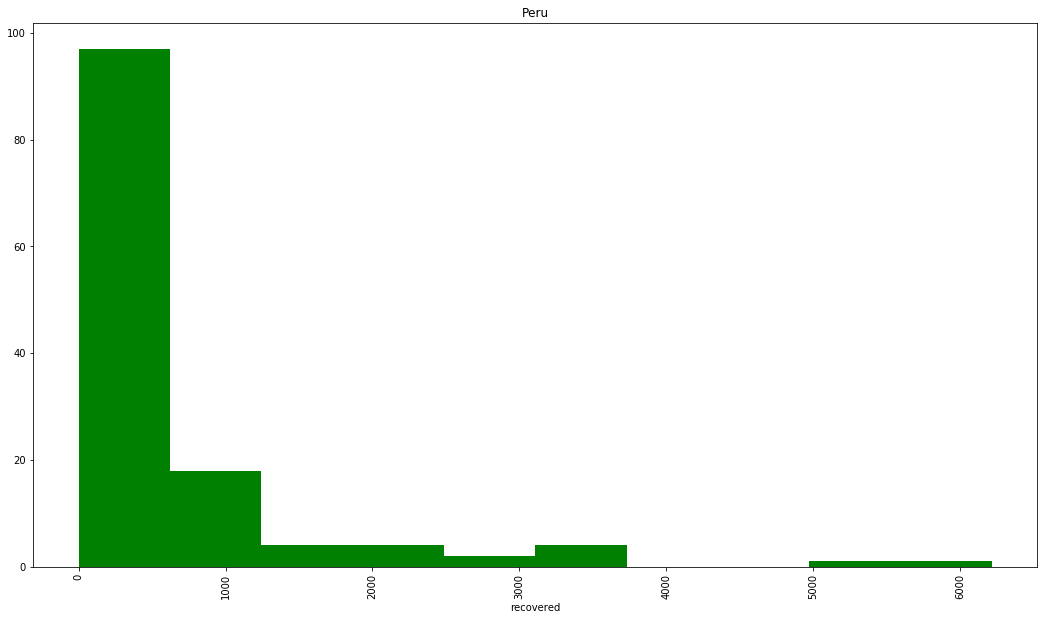

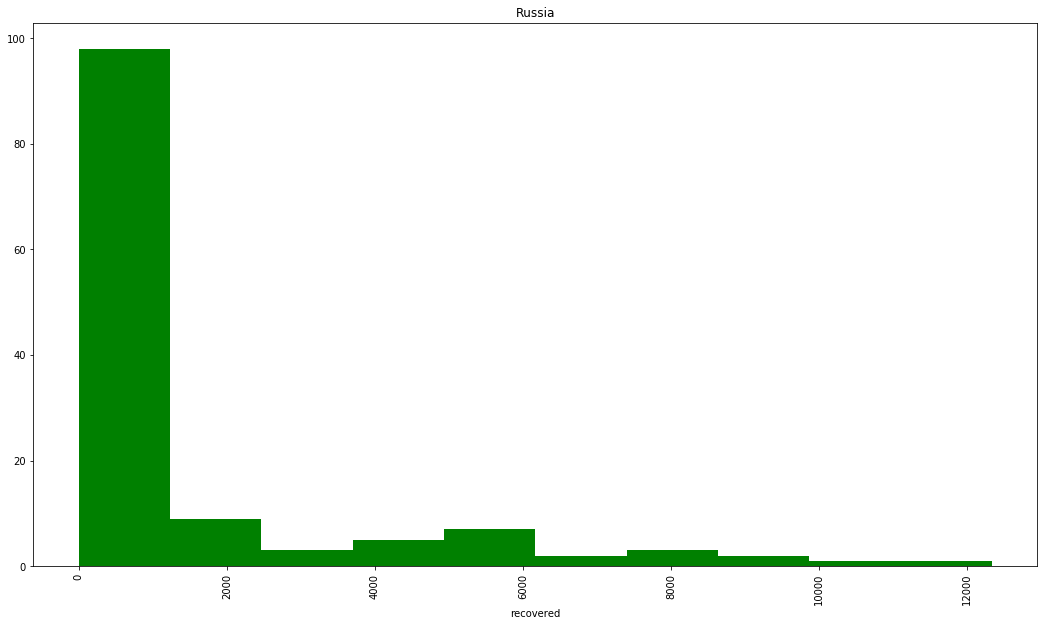

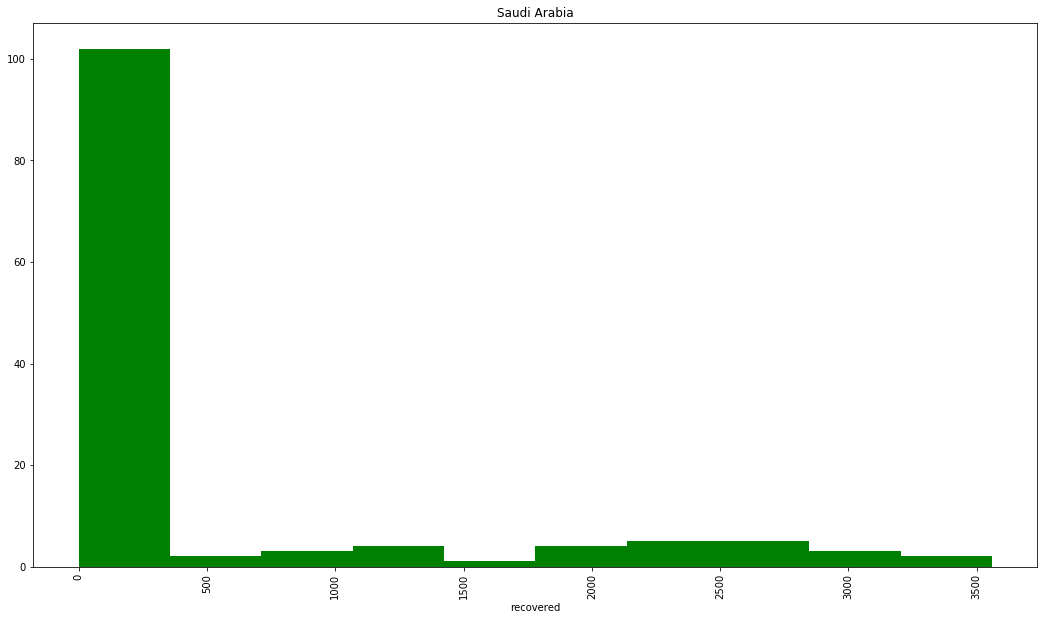

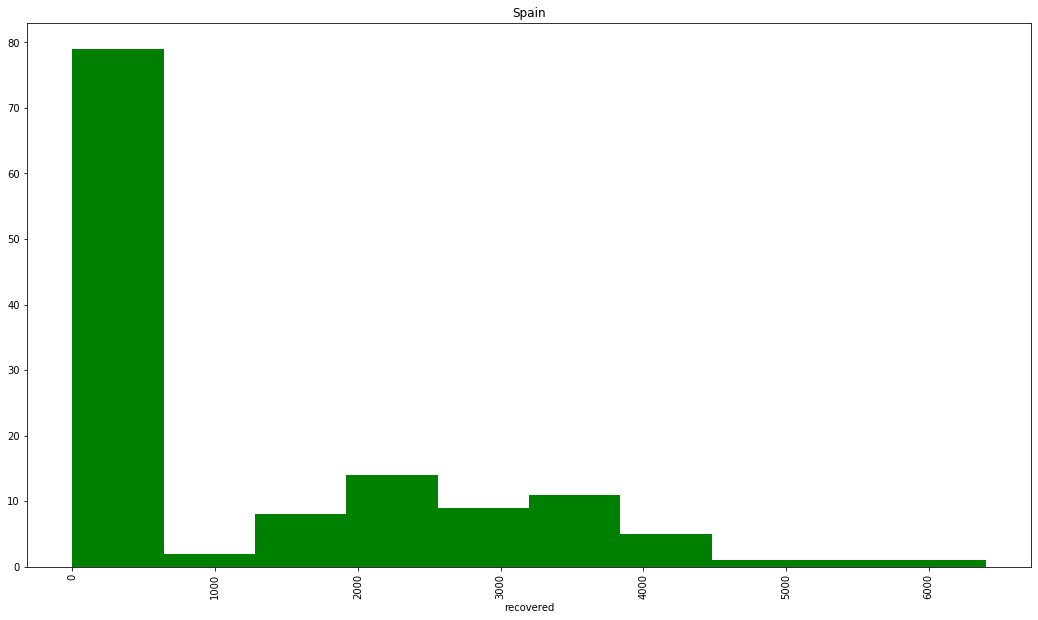

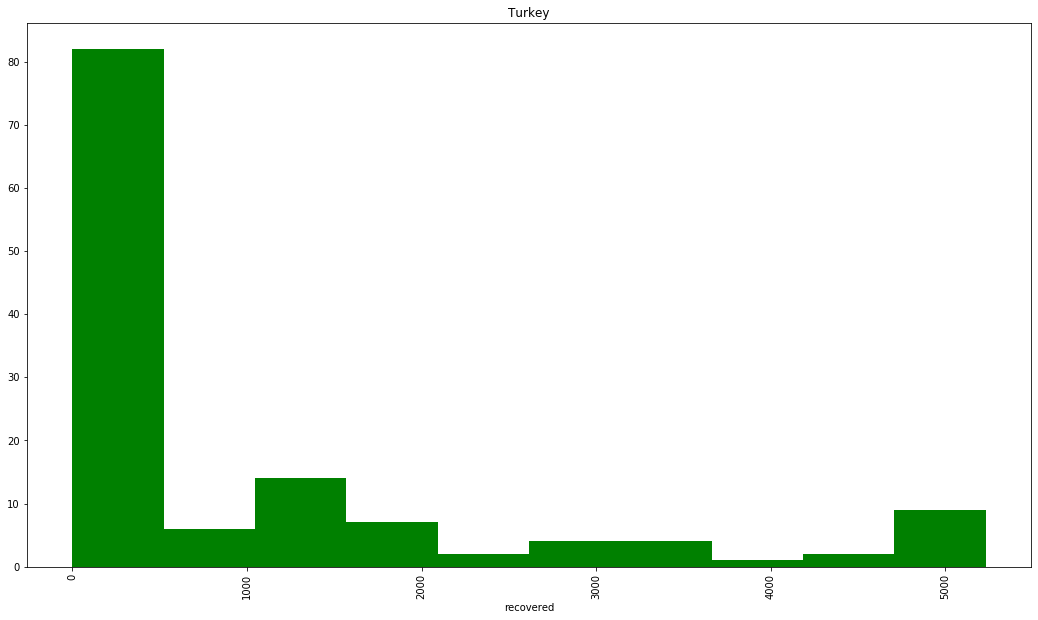

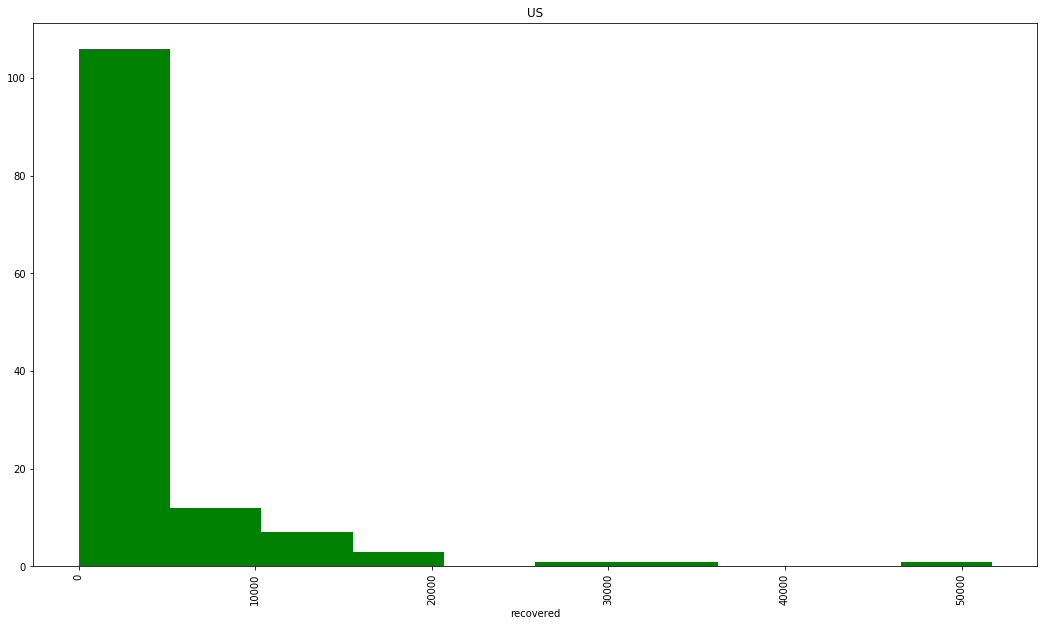

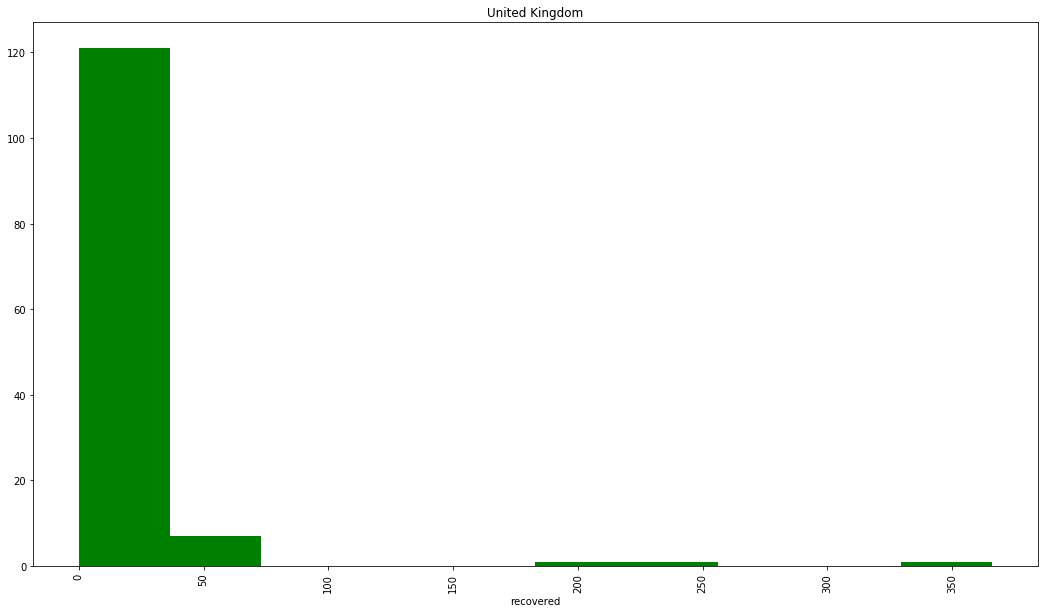

In [28]:
for i in idx:
    plt.figure(figsize=(18,10))
    plt.hist(main_recoveredt.loc[:,i][2:],color = 'green')
    plt.xticks(rotation=90);
    plt.xlabel('recovered')
    plt.title(i);

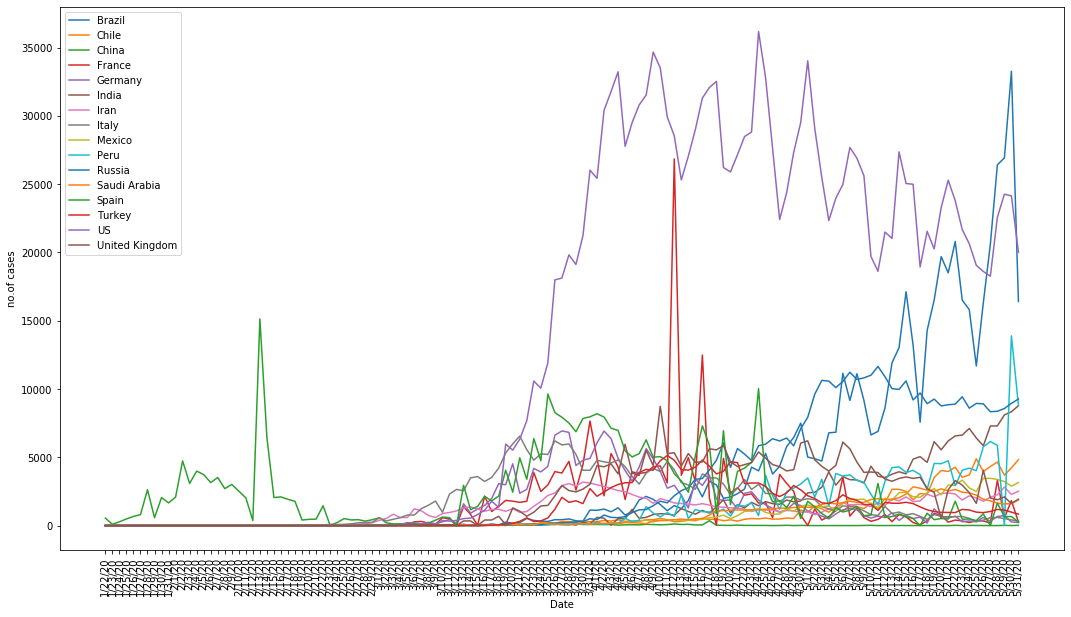

In [30]:
plt.figure(figsize=(18,10))
for i in main_countries:
    
    plt.plot(dates,main_confirmedt.loc[:,i][2:])
plt.xticks(rotation=90);
plt.legend(main_countries)
plt.xlabel('Date')
plt.ylabel('no.of cases');

In [60]:
US_confirmed

Province/State Country/Region        Lat       Long_  1/22/20  \
0               American Samoa             US -14.271000 -170.132000        0   
1                         Guam             US  13.444300  144.793700        0   
2     Northern Mariana Islands             US  15.097900  145.673900        0   
3                  Puerto Rico             US  18.220800  -66.590100        0   
4               Virgin Islands             US  18.335800  -64.896300        0   
...                        ...            ...        ...         ...      ...   
3256                      Utah             US  39.372319 -111.575868        0   
3257                      Utah             US  38.996171 -110.701396        0   
3258                      Utah             US  37.854472 -111.441876        0   
3259                      Utah             US  40.124915 -109.517442        0   
3260                      Utah             US  41.271160 -111.914512        0   

      1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/22/20  5/23/20  \
0           0        0        0        0        0  ...        0        0   
1           0        0        0        0        0  ...      165      165   
2           0        0        0        0        0  ...       22       22   
3           0        0        0        0        0  ...     3030     3100   
4           0        0        0        0        0  ...       69       69   
...       ...      ...      ...      ...      ...  ...      ...      ...   
3256        0        0        0        0        0  ...       34       33   
3257        0        0        0        0        0  ...       18       18   
3258        0        0        0        0        0  ...      281      294   
3259        0        0        0        0        0  ...       21       20   
3260        0        0        0        0        0  ...      252      256   

      5/24/20  5/25/20  5/26/20  5/27/20  5/28/20  5/29/20  5/30/20  5/31/20  
0           0        0        0        0        0        0        0        0  
1         166      166      167      170      171      172      172      172  
2          22       22       22       22       22       22       22       22  
3        3189     3260     3324     3397     3486     3647     3718     3776  
4          69       69       69       69       69       69       69       69  
...       ...      ...      ...      ...      ...      ...      ...      ...  
3256       33       33       33       33       34       38       38       38  
3257       20       21       21       23       23       23       24       24  
3258      305      324      330      335      360      386      423      440  
3259       20       20       20       20       20       18       20       21  
3260      260      268      272      273      276      288      293      298  

[3261 rows x 135 columns]

In [3]:
pd.read_csv('https://api.covid19india.org/csv/latest/state_wise.csv')

State  Confirmed  Recovered  Deaths  \
0                                      Total     199343      95808    5610   
1                                Maharashtra      70013      30108    2362   
2                                 Tamil Nadu      23495      13170     187   
3                                      Delhi      20834       8746     523   
4                                    Gujarat      17217      10780    1063   
5                                  Rajasthan       9271       6267     201   
6                             Madhya Pradesh       8283       5003     358   
7                              Uttar Pradesh       8361       5030     222   
8                                West Bengal       5772       2306     325   
9                           State Unassigned       6414          0       0   
10                                     Bihar       3945       1741      23   
11                            Andhra Pradesh       3676       2374      64   
12                                 Karnataka       3408       1328      52   
13                                 Telangana       2792       1491      88   
14                         Jammu and Kashmir       2601        946      31   
15                                   Haryana       2356       1055      21   
16                                    Punjab       2301       2000      44   
17                                    Odisha       2104       1245       9   
18                                     Assam       1486        285       4   
19                                    Kerala       1327        608      11   
20                               Uttarakhand        959        222       5   
21                                 Jharkhand        661        296       5   
22                              Chhattisgarh        548        121       1   
23                          Himachal Pradesh        340        118       6   
24                                   Tripura        423        173       0   
25                                Chandigarh        297        214       4   
26                                   Manipur         83         11       0   
27                                    Ladakh         77         47       0   
28                                       Goa         73         50       0   
29                                Puducherry         79         25       0   
30                                  Nagaland         49          0       0   
31               Andaman and Nicobar Islands         33         33       0   
32                                 Meghalaya         28         12       1   
33                         Arunachal Pradesh         20          1       0   
34  Dadra and Nagar Haveli and Daman and Diu          3          1       0   
35                                   Mizoram         13          1       0   
36                                    Sikkim          1          0       0   
37                               Lakshadweep          0          0       0   

    Active    Last_Updated_Time  Migrated_Other State_code  Delta_Confirmed  \
0    97914  02/06/2020 11:14:03             NaN         TT              973   
1    37543  01/06/2020 21:47:24             NaN         MH                0   
2    10138  01/06/2020 19:46:07             NaN         TN                0   
3    11565  01/06/2020 20:45:06             NaN         DL                0   
4     5374  01/06/2020 22:14:05             NaN         GJ                0   
5     2803  02/06/2020 11:14:05             NaN         RJ              171   
6     2922  01/06/2020 20:23:21             NaN         MP                0   
7     3109  01/06/2020 23:04:07             NaN         UP                0   
8     3141  01/06/2020 19:46:09             NaN         WB                0   
9     6414  02/06/2020 09:26:05             NaN         UN              784   
10    2181  01/06/2020 23:26:05             NaN         BR                0   
11    1238  01/06/2020 14:35:06             NaN 

In [4]:
pd.read_json('api.covid19india.org/raw_data5.json')

ValueError: Expected object or value